# Local Group member galaxy characteristics including new HI mass limits

Starting with information from McConnachie 2012, characteristics of Local Group galaxy members are compiled from a variety of sources in the literature. New HI mass limits are calculated from GALFA-HI and HIPASS data and added. 

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from astropy.table import Table
import astropy.coordinates as coord
import astropy.units as u
from astropy.coordinates import SkyCoord
from mpl_toolkits.mplot3d import axes3d

In [2]:
#Names only thing changed
NearbyGalaxies_master = pd.read_csv("./NearbyGalaxies_full_clean.dat", delim_whitespace=True ,header=(0))

In [3]:
NearbyGalaxies_trim = pd.read_csv("./NearbyGalaxiese_trim_clean.dat", delim_whitespace=True ,header=(0))

In [4]:
#We'll take these from master and eliminate duplicates
NearbyGalaxies_trim.drop(columns = ['RA1','RA2','RA3','Dec1','Dec2','Dec3','vh(km/s)','Data','MHI','mystery1','mystery2','mystery3','mystery4'],inplace = True)

In [5]:
#Just some cleaning up and clarifying names
NearbyGalaxies_master.rename(columns={'RA':'RA_hr','e1':'RA_min','e2':'RA_sec','Dec':'Dec_deg','e3':'Dec_arcmin','e4':'Dec_arcsec','(m-M)o':'m-M','e5':'m-M_err_pos','e6':'m-M_err_neg','e7':'Vmag_err_pos','e8':'Vmag_err_neg','e9':'rh_err_pos','e10':'rh_err_neg','e11':'vsig_err_pos','e12':'vsig_err_neg','e13':'vrot_s_err_pos','e14':'vrot_s_err_neg','e15':'vsig_g_err_pos','e16':'vsig_g_err_neg'},inplace = True)

In [6]:
#Combine to be comprehensive
NearbyGalaxies = pd.merge(NearbyGalaxies_master, NearbyGalaxies_trim, how='left', on='GalaxyName')

In [7]:
NearbyGalaxies

GalaxyName  RA_hr  RA_min  RA_sec  Dec_deg  Dec_arcmin  Dec_arcsec  \
0         #TheGalaxy     17      45    40.0      -29           0          28   
1       #*CanisMajor      7      12    35.0      -27          40           0   
2    SagittariusdSph     18      55    19.5      -30          32          43   
3          TucanaIII     23      56    36.0      -59          36           0   
4            DracoII     15      52    47.6       64          33          55   
5           Segue(I)     10       7     4.0       16           4          55   
6         Reticulum2      3      35    42.1      -54           2          57   
7            CetusII      1      17    52.8      -17          25          12   
8       TriangulumII      2      13    17.4       36          10          42   
9        UrsaMajorII      8      51    30.0       63           7          48   
10          BootesII     13      58     0.0       12          51           0   
11           SegueII      2      19    16.0       20          10          31   
12          Willman1     10      49    21.0       51           3           0   
13     ComaBerenices     12      26    59.0       23          54          15   
14          TucanaIV      0       2    55.2      -60          51           0   
15         BootesIII     13      57    12.0       26          48           0   
16            GrusII     22       4     4.8      -46          26          24   
17               LMC      5      23    34.5      -69          45          22   
18           TucanaV     23      37    24.0      -63          16          12   
19           Tucana2     22      51    55.1      -58          34           8   
20     SagittariusII     19      52    40.5      -22           4           5   
21               SMC      0      52    44.8      -72          49          43   
22         Bootes(I)     14       0     6.0       14          30           0   
23             Draco     17      20    12.4       57          54          55   
24         UrsaMinor     15       9     8.5       67          13          21   
25      HorologiumII      3      16    32.1      -50           1           5   
26       Horologium1      2      55    31.7      -54           7           8   
27         Eridanus3      2      22    45.5      -52          17           1   
28          Phoenix2     23      39    59.4      -54          24          22   
29          Sculptor      1       0     9.4      -33          42          33   
..               ...    ...     ...     ...      ...         ...         ...   
103          NGC3109     10       3     6.9      -26           9          35   
104         SextansB     10       0     0.1        5          19          56   
105           Antlia     10       4     4.1      -27          19          52   
106         SextansA     10      11     0.8       -4          41          34   
107        HIZSS3(A)      7       0    29.3       -4          12          30   
108          HIZSS3B      7       0    29.3       -4          12          30   
109             LeoP     10      21    45.1       18           5          17   
110      ESO410-G005      0      15    31.6      -32          10          48   
111            KKR25     16      13    48.0       54          22          16   
112            NGC55      0      14    53.6      -39          11          48   
113      ESO294-G010      0      26    33.4      -41          51          19   
114           NGC300      0      54    53.5      -37          41           4   
115           IC5152     22       2    41.5      -51          17          47   
116            KKH98     23      45    34.0       38          43           4   
117      UKS2323-326     23      26    27.5      -32          23          20   
118            KK258     22      40    43.9      -30          47          59   
119             KKR3     14       7    10.5       35           3          37   
120             KKs3      2      24    44.4      -73          30          51   
121       

In [8]:
NearbyGalaxies.columns

Index(['GalaxyName', 'RA_hr', 'RA_min', 'RA_sec', 'Dec_deg', 'Dec_arcmin',
       'Dec_arcsec', 'EB-V', 'm-M', 'm-M_err_pos', 'm-M_err_neg', 'vh(km/s)',
       'Vmag', 'Vmag_err_pos', 'Vmag_err_neg', 'PA', 'e=1-b/a', 'muVo',
       'rh(')', 'rh_err_pos', 'rh_err_neg', 'vsig_s', 'vsig_err_pos',
       'vsig_err_neg', 'vrot_s', 'vrot_s_err_pos', 'vrot_s_err_neg', 'MHI',
       'Data', 'Key', 'vsig_g', 'vsig_g_err_pos', 'vsig_g_err_neg', 'vrot_g',
       'notes', 'M-m', 'Notes'],
      dtype='object')

In [9]:
#add in newly discovered Dwarfs
new_dwarfs = pd.read_csv('./newdwarfs.txt', delim_whitespace=True ,header=(0),comment='#')

In [10]:
#Just some cleaning up and clarifying names
new_dwarfs.rename(columns={'ra1':'RA_hr','ra2':'RA_min','ra3':'RA_sec','dec1':'Dec_deg','dec2':'Dec_arcmin','dec3':'Dec_arcsec','(m-M)o':'m-M','e5':'m-M_err_pos','e6':'m-M_err_neg'},inplace = True)

In [11]:
new_dwarfs

GalaxyName  RA_hr  RA_min  RA_sec  Dec_deg  Dec_arcmin  Dec_arcsec  \
0       CetusIII    2.0     5.0    19.4     -4.0        16.0        12.0   
1  DESJ0225+0304    2.0    25.0    42.4      3.0         4.0        10.0   
2       PictorII    6.0    44.0    43.2    -59.0        53.0        49.0   
3         VirgoI   12.0     0.0     9.6      0.0        40.0        48.0   
4        HydrusI    2.0    29.0    33.3    -79.0        18.0        32.0   
5       CarinaII    NaN     NaN     NaN      NaN         NaN         NaN   
6      CarinaIII    NaN     NaN     NaN      NaN         NaN         NaN   
7       CraterII    NaN     NaN     NaN      NaN         NaN         NaN   
8     AquariusII    NaN     NaN     NaN      NaN         NaN         NaN   

         ra      dec   EB-V    m-M  m-M_err_pos  m-M_err_neg  vh(km/s)  \
0   31.3292  -4.2700    NaN  22.00         0.20         0.10       NaN   
1   36.4250   3.0694    NaN  16.88         0.06         0.05       NaN   
2  101.1792 -59.8969  0.107  18.30         0.12         0.15       NaN   
3  180.0417  -0.6800    NaN  19.70         0.30         0.20       NaN   
4   -0.6800 -79.3089    NaN  17.20         0.04         0.04      80.4   
5  114.1066 -57.9991    NaN  17.79         0.05         0.05     477.2   
6  114.6298 -57.8997    NaN  17.22         0.10         0.10     284.6   
7  177.3100 -18.4130    NaN  20.35         0.02         0.02      87.5   
8  338.4813  -9.3274    NaN  20.16         0.07         0.07     -71.1   

                                               Notes  
0  http://adsabs.harvard.edu/abs/2018PASJ...70S..18H  
1  http://adsabs.harvard.edu/abs/2017MNRAS.468...97L  
2  http://adsabs.harvard.edu/abs/2016ApJ...833L...5D  
3  http://adsabs.harvard.edu/abs/2016ApJ...832...21H  
4  http://adsabs.harvard.edu/abs/2018MNRAS.479.5343K  
5  http://adsabs.harvard.edu/abs/2018MNRAS.475.5085T  
6  http://adsabs.harvard.edu/abs/2018MNRAS.475.5085T  
7  http://adsabs.harvard.edu/abs/2016MNRAS.459.2370T  
8  http://adsabs.harvard.edu/abs/2016MNRAS.463..712T

In [12]:
NearbyGalaxies.rename(columns={'notes':'note'},inplace = True)

In [13]:
#merge new dwarfs into gals_merged df
frames = [NearbyGalaxies, new_dwarfs]
gals_merged = pd.concat(frames, sort=False)
gals_merged.reset_index(drop=True, inplace=True)
gals_merged

GalaxyName  RA_hr  RA_min  RA_sec  Dec_deg  Dec_arcmin  Dec_arcsec  \
0         #TheGalaxy   17.0    45.0    40.0    -29.0         0.0        28.0   
1       #*CanisMajor    7.0    12.0    35.0    -27.0        40.0         0.0   
2    SagittariusdSph   18.0    55.0    19.5    -30.0        32.0        43.0   
3          TucanaIII   23.0    56.0    36.0    -59.0        36.0         0.0   
4            DracoII   15.0    52.0    47.6     64.0        33.0        55.0   
5           Segue(I)   10.0     7.0     4.0     16.0         4.0        55.0   
6         Reticulum2    3.0    35.0    42.1    -54.0         2.0        57.0   
7            CetusII    1.0    17.0    52.8    -17.0        25.0        12.0   
8       TriangulumII    2.0    13.0    17.4     36.0        10.0        42.0   
9        UrsaMajorII    8.0    51.0    30.0     63.0         7.0        48.0   
10          BootesII   13.0    58.0     0.0     12.0        51.0         0.0   
11           SegueII    2.0    19.0    16.0     20.0        10.0        31.0   
12          Willman1   10.0    49.0    21.0     51.0         3.0         0.0   
13     ComaBerenices   12.0    26.0    59.0     23.0        54.0        15.0   
14          TucanaIV    0.0     2.0    55.2    -60.0        51.0         0.0   
15         BootesIII   13.0    57.0    12.0     26.0        48.0         0.0   
16            GrusII   22.0     4.0     4.8    -46.0        26.0        24.0   
17               LMC    5.0    23.0    34.5    -69.0        45.0        22.0   
18           TucanaV   23.0    37.0    24.0    -63.0        16.0        12.0   
19           Tucana2   22.0    51.0    55.1    -58.0        34.0         8.0   
20     SagittariusII   19.0    52.0    40.5    -22.0         4.0         5.0   
21               SMC    0.0    52.0    44.8    -72.0        49.0        43.0   
22         Bootes(I)   14.0     0.0     6.0     14.0        30.0         0.0   
23             Draco   17.0    20.0    12.4     57.0        54.0        55.0   
24         UrsaMinor   15.0     9.0     8.5     67.0        13.0        21.0   
25      HorologiumII    3.0    16.0    32.1    -50.0         1.0         5.0   
26       Horologium1    2.0    55.0    31.7    -54.0         7.0         8.0   
27         Eridanus3    2.0    22.0    45.5    -52.0        17.0         1.0   
28          Phoenix2   23.0    39.0    59.4    -54.0        24.0        22.0   
29          Sculptor    1.0     0.0     9.4    -33.0        42.0        33.0   
..               ...    ...     ...     ...      ...         ...         ...   
112            NGC55    0.0    14.0    53.6    -39.0        11.0        48.0   
113      ESO294-G010    0.0    26.0    33.4    -41.0        51.0        19.0   
114           NGC300    0.0    54.0    53.5    -37.0        41.0         4.0   
115           IC5152   22.0     2.0    41.5    -51.0        17.0        47.0   
116            KKH98   23.0    45.0    34.0     38.0        43.0         4.0   
117      UKS2323-326   23.0    26.0    27.5    -32.0        23.0        20.0   
118            KK258   22.0    40.0    43.9    -30.0        47.0        59.0   
119             KKR3   14.0     7.0    10.5     35.0         3.0        37.0   
120             KKs3    2.0    24.0    44.4    -73.0        30.0        51.0   
121              GR8   12.0    58.0    40.4     14.0        13.0         3.0   
122          UGC9128   14.0    15.0    56.5     23.0         3.0        19.0   
123          UGC8508   13.0    30.0    44.4     54.0        54.0        36.0   
124           IC3104   12.0    18.0    46.0    -79.0        43.0        34.0   
125           DDO125   12.0    27.0    40.9     43.0        29.0        44.0   
126           UGCA86    3.0    59.0    48.3     67.0         8.0        19.0   
127            DDO99   11.0    50.0    53.0     38.0        52.0        49.0   
128           IC4662   17.0    47.0     8.8    -64.0        38.0        30.0   
129           DDO190   14.0    24.0    43.4     44.0        31.0        33.0   
130       

# Dispersions and rotation for gas and stars

In [14]:
#Adding values for 
gals_merged['vsig_s_upper_limit'] = np.nan

gals_merged.loc[gals_merged['GalaxyName'] == 'TriangulumII', 'vsig_s_upper_limit'] = 3.4
gals_merged.loc[gals_merged['GalaxyName'] == 'HydraII', 'vsig_s_upper_limit'] = 3.6
gals_merged.loc[gals_merged['GalaxyName'] == 'GrusI', 'vsig_s'] = 2.9
gals_merged.loc[gals_merged['GalaxyName'] == 'Pegasus3', 'vsig_s'] = 5.4
gals_merged.loc[gals_merged['GalaxyName'] == 'Pegasus3', 'vh(km/s)'] = -223
gals_merged.loc[gals_merged['GalaxyName'] == 'Phoenix', 'vsig_s'] = 9.3
gals_merged.loc[gals_merged['GalaxyName'] == 'Eridanus2', 'vh(km/s)'] = 75.6
gals_merged.loc[gals_merged['GalaxyName'] == 'AntliaB', 'vsig_g'] = 7.2
gals_merged.loc[gals_merged['GalaxyName'] == 'HIZSS3(A)', 'vsig_g'] = 23
gals_merged.loc[gals_merged['GalaxyName'] == 'HIZSS3B', 'vsig_g'] = 11.9
gals_merged.loc[gals_merged['GalaxyName'] == 'LeoP', 'vrot_g'] = 15
gals_merged.loc[gals_merged['GalaxyName'] == 'LeoP', 'vsig_g'] = 8.4
gals_merged.loc[gals_merged['GalaxyName'] == 'IC5152', 'vrot_g'] = 58
gals_merged.loc[gals_merged['GalaxyName'] == 'IC5152', 'vsig_g'] = 36

# Orbital Parameters

In [15]:
#Initialize columns
gals_merged["orb_pericenter"] = np.nan
gals_merged["orb_apocenter"] = np.nan
gals_merged["orb_eccentricity"] = np.nan
gals_merged["orb_period"] = np.nan
gals_merged["orb_period_type"] = np.nan

In [16]:
#Ultrafaints, from Simon 2018 (GAIA)
gals_merged.loc[gals_merged['GalaxyName'] == 'TriangulumII', 'orb_pericenter'] = 20
gals_merged.loc[gals_merged['GalaxyName'] == 'Segue2', 'orb_pericenter'] = 32
gals_merged.loc[gals_merged['GalaxyName'] == 'HydrusI', 'orb_pericenter'] = 26
gals_merged.loc[gals_merged['GalaxyName'] == 'HorologiumI', 'orb_pericenter'] = 87
gals_merged.loc[gals_merged['GalaxyName'] == 'ReticulumII', 'orb_pericenter'] = 29
gals_merged.loc[gals_merged['GalaxyName'] == 'CarinaII', 'orb_pericenter'] = 28
gals_merged.loc[gals_merged['GalaxyName'] == 'CarinaIII', 'orb_pericenter'] = 29
gals_merged.loc[gals_merged['GalaxyName'] == 'UrsaMajorII', 'orb_pericenter'] = 39
gals_merged.loc[gals_merged['GalaxyName'] == 'Segue1', 'orb_pericenter'] = 20
gals_merged.loc[gals_merged['GalaxyName'] == 'UrsaMajorI', 'orb_pericenter'] = 102
gals_merged.loc[gals_merged['GalaxyName'] == 'Willman1', 'orb_pericenter'] = 44
gals_merged.loc[gals_merged['GalaxyName'] == 'ComaBerenices', 'orb_pericenter'] = 43
gals_merged.loc[gals_merged['GalaxyName'] == 'BootesII', 'orb_pericenter'] = 39
gals_merged.loc[gals_merged['GalaxyName'] == 'BootesI', 'orb_pericenter'] = 45
gals_merged.loc[gals_merged['GalaxyName'] == 'DracoII', 'orb_pericenter'] = 20
gals_merged.loc[gals_merged['GalaxyName'] == 'TucanaII', 'orb_pericenter'] = 39
gals_merged.loc[gals_merged['GalaxyName'] == 'TucanaIII', 'orb_pericenter'] = 3


gals_merged.loc[gals_merged['GalaxyName'] == 'TriangulumII', 'orb_apocenter'] = 541
gals_merged.loc[gals_merged['GalaxyName'] == 'Segue2', 'orb_apocenter'] = 54
gals_merged.loc[gals_merged['GalaxyName'] == 'HydrusI', 'orb_apocenter'] = 1029
gals_merged.loc[gals_merged['GalaxyName'] == 'HorologiumI', 'orb_apocenter'] = 741
gals_merged.loc[gals_merged['GalaxyName'] == 'ReticulumII', 'orb_apocenter'] = 91
gals_merged.loc[gals_merged['GalaxyName'] == 'CarinaII', 'orb_apocenter'] = 1521
gals_merged.loc[gals_merged['GalaxyName'] == 'CarinaIII', 'orb_apocenter'] = 1478
gals_merged.loc[gals_merged['GalaxyName'] == 'UrsaMajorII', 'orb_apocenter'] = 201
gals_merged.loc[gals_merged['GalaxyName'] == 'Segue1', 'orb_apocenter'] = 61
gals_merged.loc[gals_merged['GalaxyName'] == 'UrsaMajorI', 'orb_apocenter'] = 896
gals_merged.loc[gals_merged['GalaxyName'] == 'Willman1', 'orb_apocenter'] = 53
gals_merged.loc[gals_merged['GalaxyName'] == 'ComaBerenices', 'orb_apocenter'] = 242
gals_merged.loc[gals_merged['GalaxyName'] == 'BootesII', 'orb_apocenter'] = 1746
gals_merged.loc[gals_merged['GalaxyName'] == 'BootesI', 'orb_apocenter'] = 116
gals_merged.loc[gals_merged['GalaxyName'] == 'DracoII', 'orb_apocenter'] = 223
gals_merged.loc[gals_merged['GalaxyName'] == 'TucanaII', 'orb_apocenter'] = 626
gals_merged.loc[gals_merged['GalaxyName'] == 'TucanaIII', 'orb_apocenter'] = 49

gals_merged.loc[gals_merged['GalaxyName'] == 'TriangulumII', 'orb_eccentricity'] = 0.93
gals_merged.loc[gals_merged['GalaxyName'] == 'Segue2', 'orb_eccentricity'] = 0.32
gals_merged.loc[gals_merged['GalaxyName'] == 'HydrusI', 'orb_eccentricity'] = 0.95
gals_merged.loc[gals_merged['GalaxyName'] == 'HorologiumI', 'orb_eccentricity'] = 0.79
gals_merged.loc[gals_merged['GalaxyName'] == 'ReticulumII', 'orb_eccentricity'] = 0.51
gals_merged.loc[gals_merged['GalaxyName'] == 'CarinaII', 'orb_eccentricity'] = 0.96
gals_merged.loc[gals_merged['GalaxyName'] == 'CarinaIII', 'orb_eccentricity'] = 0.96
gals_merged.loc[gals_merged['GalaxyName'] == 'UrsaMajorII', 'orb_eccentricity'] = 0.67
gals_merged.loc[gals_merged['GalaxyName'] == 'Segue1', 'orb_eccentricity'] = 0.52
gals_merged.loc[gals_merged['GalaxyName'] == 'UrsaMajorI', 'orb_eccentricity'] = 0.79
gals_merged.loc[gals_merged['GalaxyName'] == 'Willman1', 'orb_eccentricity'] = 0.19
gals_merged.loc[gals_merged['GalaxyName'] == 'ComaBerenices', 'orb_eccentricity'] = 0.70
gals_merged.loc[gals_merged['GalaxyName'] == 'BootesII', 'orb_eccentricity'] = 0.96
gals_merged.loc[gals_merged['GalaxyName'] == 'BootesI', 'orb_eccentricity'] = 0.44
gals_merged.loc[gals_merged['GalaxyName'] == 'DracoII', 'orb_eccentricity'] = 0.84
gals_merged.loc[gals_merged['GalaxyName'] == 'TucanaII', 'orb_eccentricity'] = 0.78
gals_merged.loc[gals_merged['GalaxyName'] == 'TucanaIII', 'orb_eccentricity'] = 0.90

gals_merged.loc[gals_merged['GalaxyName'] == 'TriangulumII', 'orb_period'] = 10
gals_merged.loc[gals_merged['GalaxyName'] == 'Segue2', 'orb_period'] = 1.1
gals_merged.loc[gals_merged['GalaxyName'] == 'HydrusI', 'orb_period'] = 10
gals_merged.loc[gals_merged['GalaxyName'] == 'ReticulumII', 'orb_period'] = 1.6
gals_merged.loc[gals_merged['GalaxyName'] == 'CarinaII', 'orb_period'] = 10
gals_merged.loc[gals_merged['GalaxyName'] == 'CarinaIII', 'orb_period'] = 10
gals_merged.loc[gals_merged['GalaxyName'] == 'UrsaMajorII', 'orb_period'] = 3.5
gals_merged.loc[gals_merged['GalaxyName'] == 'Segue1', 'orb_period'] = 1.1
gals_merged.loc[gals_merged['GalaxyName'] == 'Willman1', 'orb_period'] = 1.2
gals_merged.loc[gals_merged['GalaxyName'] == 'ComaBerenices', 'orb_period'] = 3.7
gals_merged.loc[gals_merged['GalaxyName'] == 'BootesII', 'orb_period'] = 10
gals_merged.loc[gals_merged['GalaxyName'] == 'BootesI', 'orb_period'] = 2.4
gals_merged.loc[gals_merged['GalaxyName'] == 'TucanaIII', 'orb_period'] = 0.7

gals_merged.loc[gals_merged['GalaxyName'] == 'TriangulumII', 'orb_period_type'] = "lower_limit"
gals_merged.loc[gals_merged['GalaxyName'] == 'Segue2', 'orb_period_type'] = "value"
gals_merged.loc[gals_merged['GalaxyName'] == 'HydrusI', 'orb_period_type'] = "lower_limit"
gals_merged.loc[gals_merged['GalaxyName'] == 'ReticulumII', 'orb_period_type'] = "value"
gals_merged.loc[gals_merged['GalaxyName'] == 'CarinaII', 'orb_period_type'] = "lower_limit"
gals_merged.loc[gals_merged['GalaxyName'] == 'CarinaIII', 'orb_period_type'] = "lower_limit"
gals_merged.loc[gals_merged['GalaxyName'] == 'UrsaMajorII', 'orb_period_type'] = "value"
gals_merged.loc[gals_merged['GalaxyName'] == 'Segue1', 'orb_period_type'] = "value"
gals_merged.loc[gals_merged['GalaxyName'] == 'Willman1', 'orb_period_type'] = "value"
gals_merged.loc[gals_merged['GalaxyName'] == 'ComaBerenices', 'orb_period_type'] = "value"
gals_merged.loc[gals_merged['GalaxyName'] == 'BootesII', 'orb_period_type'] = "lower_limit"
gals_merged.loc[gals_merged['GalaxyName'] == 'BootesI', 'orb_period_type'] = "value"
gals_merged.loc[gals_merged['GalaxyName'] == 'TucanaIII', 'orb_period_type'] = "value"


In [17]:
#Draco, from Subaru (Casetti-Dinescu, Dana I. 2016, conflicting values from Pryo 2015)
gals_merged.loc[gals_merged['GalaxyName'] == 'Draco', 'orb_period_type'] = "value"
gals_merged.loc[gals_merged['GalaxyName'] == 'Draco', 'orb_period'] = 1.4
gals_merged.loc[gals_merged['GalaxyName'] == 'Draco', 'orb_pericenter'] = 21
gals_merged.loc[gals_merged['GalaxyName'] == 'Draco', 'orb_apocenter'] = 97
gals_merged.loc[gals_merged['GalaxyName'] == 'Draco', 'orb_eccentricity'] = 0.66

In [18]:
#Fornax, from Piatek 2007. There was follow-up publications on Fornax but I didn't dwell
gals_merged.loc[gals_merged['GalaxyName'] == 'Fornax', 'orb_period_type'] = "value"
gals_merged.loc[gals_merged['GalaxyName'] == 'Fornax', 'orb_period'] = 3.2
gals_merged.loc[gals_merged['GalaxyName'] == 'Fornax', 'orb_pericenter'] = 118
gals_merged.loc[gals_merged['GalaxyName'] == 'Fornax', 'orb_apocenter'] = 152
gals_merged.loc[gals_merged['GalaxyName'] == 'Fornax', 'orb_eccentricity'] = 0.13

# Star formation histories

In [19]:
#Initialize
gals_merged['tau_50'] = np.nan
gals_merged['tau_90'] = np.nan

In [20]:
#Mateo 1998

In [21]:
#Dolphin 2005

In [22]:
#Weisz 2015
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaI', 'tau_90'] = 9.86
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaII', 'tau_90'] = 9.75
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaIII', 'tau_90'] = 9.72
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaV', 'tau_90'] = 10**9.87
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaVI', 'tau_90'] = 10**9.73
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXI', 'tau_90'] = 10**10.11
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXII', 'tau_90'] = 10**9.56
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXIII', 'tau_90'] = 10**10.1
gals_merged.loc[gals_merged['GalaxyName'] == 'Carina', 'tau_90'] = 10**9.46
gals_merged.loc[gals_merged['GalaxyName'] == 'CanesVeneticiI', 'tau_90'] = 10**9.92
gals_merged.loc[gals_merged['GalaxyName'] == 'CanesVeneticiII', 'tau_90'] = 10**9.92
gals_merged.loc[gals_merged['GalaxyName'] == 'DDO210', 'tau_90'] = 10**9.58
gals_merged.loc[gals_merged['GalaxyName'] == 'Draco', 'tau_90'] = 10**10.01
gals_merged.loc[gals_merged['GalaxyName'] == 'Fornax', 'tau_90'] = 10**9.38
gals_merged.loc[gals_merged['GalaxyName'] == 'Hercules', 'tau_90'] = 10**10.1
gals_merged.loc[gals_merged['GalaxyName'] == 'IC10', 'tau_90'] = 10**9.21
gals_merged.loc[gals_merged['GalaxyName'] == 'IC1613', 'tau_90'] = 10**9.3
gals_merged.loc[gals_merged['GalaxyName'] == 'LeoA', 'tau_90'] = 10**8.78
gals_merged.loc[gals_merged['GalaxyName'] == 'LeoI', 'tau_90'] = 10**9.23
gals_merged.loc[gals_merged['GalaxyName'] == 'LeoII', 'tau_90'] = 10**9.81
gals_merged.loc[gals_merged['GalaxyName'] == 'LeoIV', 'tau_90'] = 10**10.05
gals_merged.loc[gals_merged['GalaxyName'] == 'LeoT', 'tau_90'] = 10**9.23
gals_merged.loc[gals_merged['GalaxyName'] == 'LGS3', 'tau_90'] = 10**9.58
gals_merged.loc[gals_merged['GalaxyName'] == 'M32', 'tau_90'] = 10**9.23
gals_merged.loc[gals_merged['GalaxyName'] == 'NGC147', 'tau_90'] = 10**9.43
gals_merged.loc[gals_merged['GalaxyName'] == 'NGC185', 'tau_90'] = 10**9.56
gals_merged.loc[gals_merged['GalaxyName'] == 'NGC205', 'tau_90'] = 10**9.34
gals_merged.loc[gals_merged['GalaxyName'] == 'NGC6822', 'tau_90'] = 10**9.0
gals_merged.loc[gals_merged['GalaxyName'] == 'PegDIG', 'tau_90'] = 10**8.91
gals_merged.loc[gals_merged['GalaxyName'] == 'Phoenix', 'tau_90'] = 10**9.43
gals_merged.loc[gals_merged['GalaxyName'] == 'SagDIG', 'tau_90'] = 10**8.91
gals_merged.loc[gals_merged['GalaxyName'] == 'Sagittarius', 'tau_90'] = 10**9.53
gals_merged.loc[gals_merged['GalaxyName'] == 'Sculptor', 'tau_90'] = 10**10.03
gals_merged.loc[gals_merged['GalaxyName'] == 'SextansA', 'tau_90'] = 10**8.85
gals_merged.loc[gals_merged['GalaxyName'] == 'SextansB', 'tau_90'] = 10**9.26
gals_merged.loc[gals_merged['GalaxyName'] == 'Tucana', 'tau_90'] = 10**9.81
gals_merged.loc[gals_merged['GalaxyName'] == 'UrsaMinor', 'tau_90'] = 10**9.96
gals_merged.loc[gals_merged['GalaxyName'] == 'WLM', 'tau_90'] = 10**8.85

In [23]:
#Skillman 2017
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaII', 'tau_50'] = 11.5*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaII', 'tau_90'] = 6.3*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaI', 'tau_50'] = 12.6*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaI', 'tau_90'] = 7.4*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaIII', 'tau_50'] = 11.7*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaIII', 'tau_90'] = 8.7*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXXVIII', 'tau_50'] = 12.6*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXXVIII', 'tau_90'] = 7.4*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXV', 'tau_50'] = 12.9*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXV', 'tau_90'] = 9.3*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXVI', 'tau_50'] = 9.8*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXVI', 'tau_90'] = 5.9*10**9

gals_merged.loc[gals_merged['GalaxyName'] == 'IC1613', 'tau_50'] = 10**9.87
gals_merged.loc[gals_merged['GalaxyName'] == 'IC1613', 'tau_90'] = 10**9.30
#ACS
gals_merged.loc[gals_merged['GalaxyName'] == 'WLM', 'tau_50'] = 10**9.71
gals_merged.loc[gals_merged['GalaxyName'] == 'WLM', 'tau_90'] = 10**9.02
#UVIS
gals_merged.loc[gals_merged['GalaxyName'] == 'WLM', 'tau_50'] = 10**10.1
gals_merged.loc[gals_merged['GalaxyName'] == 'WLM', 'tau_90'] = 10**9.67

gals_merged.loc[gals_merged['GalaxyName'] == 'LeoA', 'tau_50'] = 10**9.61
gals_merged.loc[gals_merged['GalaxyName'] == 'LeoA', 'tau_90'] = 10**8.93
gals_merged.loc[gals_merged['GalaxyName'] == 'Cetus', 'tau_50'] = 10**10.05
gals_merged.loc[gals_merged['GalaxyName'] == 'Cetus', 'tau_90'] = 10**9.95
gals_merged.loc[gals_merged['GalaxyName'] == 'DDO210', 'tau_50'] = 10**9.85
gals_merged.loc[gals_merged['GalaxyName'] == 'DDO210', 'tau_90'] = 10**9.33
gals_merged.loc[gals_merged['GalaxyName'] == 'LGS3', 'tau_50'] = 10**10.03
gals_merged.loc[gals_merged['GalaxyName'] == 'LGS3', 'tau_90'] = 10**9.64
gals_merged.loc[gals_merged['GalaxyName'] == 'Phoenix', 'tau_50'] = 10**10.03
gals_merged.loc[gals_merged['GalaxyName'] == 'Phoenix', 'tau_90'] = 10**0.42
gals_merged.loc[gals_merged['GalaxyName'] == 'Tucana', 'tau_50'] = 10**10.11
gals_merged.loc[gals_merged['GalaxyName'] == 'Tucana', 'tau_90'] = 10**9.88

In [24]:
#Weisz 2019
gals_merged.loc[gals_merged['GalaxyName'] == 'CasseopeiaIII', 'tau_50'] = 7.9*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'CasseopeiaIII', 'tau_90'] = 4.1*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'LacertaI', 'tau_50'] = 8.1*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'LacertaI', 'tau_90'] = 4.9*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'CasseopeiaII', 'tau_50'] = 9.8*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'CasseopeiaII', 'tau_90'] = 7.2*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'PerseusI', 'tau_50'] = 7.9*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'PerseusI', 'tau_90'] = 4.1*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXXIII', 'tau_50'] = 6.8*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXXIII', 'tau_90'] = 5.1*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXXV', 'tau_50'] = 8.7*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXXV', 'tau_90'] = 5.8*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXXI', 'tau_50'] = 8.3*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXXI', 'tau_90'] = 5.8*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXVIII', 'tau_50'] = 8.5*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXVIII', 'tau_90'] = 4.6*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaIX', 'tau_50'] = 7.2*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaIX', 'tau_90'] = 5.1*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXIV', 'tau_50'] = 8.7*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXIV', 'tau_90'] = 4.8*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXXIX', 'tau_50'] = 7.6*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXXIX', 'tau_90'] = 5.2*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXVII', 'tau_50'] = 13.2*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXVII', 'tau_90'] = 10.5*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXXIV', 'tau_50'] = 12.9*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXXIV', 'tau_90'] = 5.4*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaX', 'tau_50'] = 9.5*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaX', 'tau_90'] = 6.5*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXII', 'tau_50'] = 12.9*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXII', 'tau_90'] = 3.4*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXXII', 'tau_50'] = 11.5*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXXII', 'tau_90'] = 6.5*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXX', 'tau_50'] = 10.2*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXX', 'tau_90'] = 6.9*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXIII', 'tau_50'] = 9.1*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXIII', 'tau_90'] = 6.5*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXI', 'tau_50'] = 13.2*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXI', 'tau_90'] = 7.4*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXXVI', 'tau_50'] = 12.9*10**9
gals_merged.loc[gals_merged['GalaxyName'] == 'AndromedaXXVI', 'tau_90'] = 9.1*10**9


# Distances from modulus

In [25]:
gals_merged['dist_pc'] = np.sqrt((100*100**((gals_merged['m-M']/5))))

In [26]:
gals_merged.loc[gals_merged['GalaxyName'] == '#TheGalaxy', 'dist_pc'] = 8.0

In [27]:
gals_merged['dist_kpc'] = gals_merged['dist_pc']/1000

In [28]:
gals_merged['dist_mpc'] = gals_merged['dist_pc']/1000000

In [29]:
gals_merged[['GalaxyName','Data','MHI','m-M','M-m','dist_mpc']]

GalaxyName Data      MHI    m-M    M-m  dist_mpc
0         #TheGalaxy    x    99.90  99.99    NaN  0.000008
1       #*CanisMajor    x    99.90  14.29    NaN  0.007211
2    SagittariusdSph    x     0.00  17.10  17.10  0.026303
3          TucanaIII    x    99.90  17.01  17.01  0.025235
4            DracoII    x    99.90  16.90  16.90  0.023988
5           Segue(I)   gs     1.67  16.80  16.80  0.022909
6         Reticulum2    x    99.90  17.40  17.40  0.030200
7            CetusII    x    99.90  17.38  17.38  0.029923
8       TriangulumII   gs     2.20  17.40  17.40  0.030200
9        UrsaMajorII    x     0.00  17.50  17.50  0.031623
10          BootesII   gs     2.26  18.10  18.10  0.041687
11           SegueII   gs     2.09  17.70  17.70  0.034674
12          Willman1    x     0.00  17.90  17.90  0.038019
13     ComaBerenices   gs     2.06  18.20  18.20  0.043652
14          TucanaIV    x    99.90  18.41  18.41  0.048084
15         BootesIII    x    99.90  18.35  18.35  0.046774
16            GrusII    x    99.90  18.62  18.62  0.052966
17               LMC    x   460.00  18.52  18.52  0.050582
18           TucanaV    x    99.90  18.71  18.71  0.055208
19           Tucana2    x    99.90  18.80  18.80  0.057544
20     SagittariusII    x    99.90  19.13  19.13  0.066988
21               SMC    x   460.00  19.03  19.03  0.063973
22         Bootes(I)   gs     2.76  19.11  19.11  0.066374
23             Draco    x     0.00  19.40  19.40  0.075858
24         UrsaMinor    x     0.00  19.40  19.40  0.075858
25      HorologiumII    x    99.90  19.46  19.46  0.077983
26       Horologium1    x    99.90  19.50  19.50  0.079433
27         Eridanus3    x    99.90  19.70  19.70  0.087096
28          Phoenix2    x    99.90  19.60  19.60  0.083176
29          Sculptor    x     0.22  19.67  19.67  0.085901
..               ...  ...      ...    ...    ...       ...
112            NGC55    x  1300.00  26.43    NaN  1.931968
113      ESO294-G010    x     0.34  26.54  26.54  2.032357
114           NGC300    x  1800.00  26.59    NaN  2.079697
115           IC5152    x    87.00  26.45  26.45  1.949845
116            KKH98    x     6.60  27.01  27.01  2.523481
117      UKS2323-326    x    17.00  26.72  26.72  2.208005
118            KK258    x    99.90  26.85  26.85  2.344229
119             KKR3    x     2.50  26.70  26.70  2.187762
120             KKs3    x    99.90  26.63  26.63  2.118361
121              GR8    x    11.00  26.69  26.69  2.177710
122          UGC9128    x    18.00  26.80  26.80  2.290868
123          UGC8508    x    29.00  27.06  27.06  2.582260
124           IC3104    x    13.00  26.78  26.78  2.269865
125           DDO125    x    35.00  27.06  27.06  2.582260
126           UGCA86    x   860.00  27.36  27.36  2.964831
127            DDO99    x    52.00  27.07  27.07  2.594179
128           IC4662    x   180.00  26.94  26.94  2.443431
129           DDO190    x    43.00  27.23  27.23  2.792544
130            KKH86    x     0.88  27.06  27.06  2.582260
131          NGC4163    x     7.90  27.28  27.28  2.857591
132           DDO113    x    48.00  27.35  27.35  2.951209
133         CetusIII  NaN      NaN  22.00    NaN  0.251189
134    DESJ0225+0304  NaN      NaN  16.88    NaN  0.023768
135         PictorII  NaN      NaN  18.30    NaN  0.045709
136           VirgoI  NaN      NaN  19.70    NaN  0.087096
137          HydrusI  NaN      NaN  17.20    NaN  0.027542
138         CarinaII  NaN      NaN  17.79    NaN  0.036141
139        CarinaIII  NaN      NaN  17.22    NaN  0.027797
140         CraterII  NaN      NaN  20.35    NaN  0.117490
141       AquariusII  NaN      NaN  20.16    NaN  0.107647

[142 rows x 6 columns]

# HI Mass Limits

## Load contents of table files for each data source/case combination

In [30]:
galfa_unresolved_undetected = pd.read_csv('./tables/galfa_unresolved_undetected_clean.txt', delim_whitespace=True ,header=(0),comment='#')
galfa_unresolved_undetected

GalaxyName     rh   MHI  std30_med_g  std30_med_h        MHI_g  \
0         BootesIII  99.99  99.9     0.037923          NaN     17.09138   
1   CanesVenaticiII   1.60   0.0     0.078217     0.013089    519.00588   
2          PiscesII   1.10  99.9     0.037429          NaN    321.42495   
3          Pegasus3   1.30  99.9     0.057000          NaN          NaN   
4       AndromedaXI   0.71   0.0     0.069377     0.012132   9707.05599   
5       AndromedaXX   0.53  99.9     0.075920     0.017230  10819.92472   
6     AndromedaXIII   0.78   0.0     0.076044     0.018760  13897.46464   
7      AndromedaXIV   1.70   0.0     0.029043     0.016321   4752.33774   
8      AndromedaXII   1.20   0.0     0.070827     0.016336  15851.40892   
9     AndromedaXXIX   1.70  99.9     0.036159          NaN   5012.81372   
10    AndromedaXXII   0.94  99.9     0.035758     0.020519   7856.74475   
11     AndromedaXVI   0.89   0.0     0.068957     0.024443   4059.26808   
12  AndromedaXXVIII   1.11  99.9     0.031426          NaN   3557.63267   
13             LeoV   2.60   0.0     0.079255     0.020725    649.97527   
14            LeoII   2.60   0.0     0.085035     0.011590   1200.79881   
15     AndromedaIII   2.20   0.0     0.086061     0.016450  12493.33254   
16      AndromedaVI   2.30   0.0     0.030336          NaN   4828.73438   

          MHI_h  
0           NaN  
1     474.21009  
2           NaN  
3           NaN  
4    9268.51441  
5   13407.35803  
6   18719.38047  
7   14581.57512  
8   19962.45423  
9           NaN  
10  24616.69434  
11   7856.35933  
12          NaN  
13     28.00471  
14    893.58639  
15  13038.68684  
16          NaN

In [31]:
galfa_resolved_undetected = pd.read_csv('./tables/galfa_resolved_undetected_table_clean.txt', delim_whitespace=True ,header=(0),comment='#')
galfa_resolved_undetected

GalaxyName   med_std      v_-5      v_-4      v_-3      v_-2  \
0           Segue(I)  0.017123  0.020954  0.020997  0.019659  0.018380   
1       TriangulumII  0.033360  0.032310  0.035480  0.041173  0.044659   
2           BootesII  0.020185  0.026547  0.024216  0.020185  0.016058   
3      ComaBerenices  0.011513  0.017993  0.018037  0.017272  0.016089   
4          Bootes(I)  0.024946  0.020448  0.019055  0.019703  0.021678   
5           Hercules  0.028245  0.027603  0.028245  0.029470  0.030828   
6              LeoIV  0.018579  0.023945  0.019971  0.017264  0.017018   
7   CanesVenaticu(I)  0.016252  0.024369  0.021633  0.018487  0.016273   
8               LeoI  0.031631  0.029137  0.030867  0.033413  0.036775   
9       AndromedaXIX  0.038535  0.039503  0.039608  0.039136  0.038333   
10       AndromedaII  0.020109  0.029312  0.026191  0.022482  0.018270   
11           SegueII  0.043100       NaN       NaN       NaN       NaN   

        v_-1       v_0      v_+1      v_+2      v_+3      v_+4      v_+5  \
0   0.017681  0.017123  0.016192  0.014794  0.013582  0.012936  0.012643   
1   0.043152  0.037963  0.033360  0.031326  0.029874  0.027878  0.025896   
2   0.013231  0.013089  0.015978  0.019443  0.021502  0.022890  0.023712   
3   0.014207  0.011513  0.009089  0.007597  0.006588  0.006316  0.006658   
4   0.023773  0.025247  0.025994  0.026299  0.026131  0.025314  0.024946   
5   0.031628  0.031415  0.029572  0.026164  0.023573  0.024793  0.027962   
6   0.018579  0.019500  0.019310  0.018564  0.018563  0.019044  0.018400   
7   0.015959  0.016252  0.016039  0.015467  0.015233  0.015825  0.016702   
8   0.037608  0.034692  0.030318  0.027769  0.028897  0.031631  0.032785   
9   0.038535  0.039022  0.037862  0.035554  0.034288  0.035590  0.039367   
10  0.015435  0.016636  0.020109  0.022511  0.022071  0.019459  0.017692   
11       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

      MHI_limit  
0       9.33124  
1      31.59340  
2      36.42430  
3      22.78040  
4     114.12000  
5     509.70000  
6     458.54800  
7     800.34100  
8    2110.97000  
9   26928.90000  
10   8866.38000  
11          NaN

In [32]:
hi4pi_resolved_undetected = pd.read_csv('./tables/hi4pi_resolved_undetected_table_clean.txt', delim_whitespace=True ,header=(0),comment='#')
hi4pi_resolved_undetected

GalaxyName  med_std     v_-5     v_-4     v_-3     v_-2     v_-1  \
0   UrsaMajorII  0.33041  0.29192  0.29070  0.29266  0.39312  0.52351   
1       Tucana2  0.11744  0.13279  0.13210  0.09946  0.07456  0.08875   
2         Draco  0.21153  0.12404  0.10974  0.13890  0.15178  0.21153   
3    Sextans(I)  0.57736  0.42631  0.48201  0.57736  0.65398  0.65606   
4  UrsaMajor(I)  1.12877  0.75418  0.87294  0.96666  1.03453  1.08105   
5      CraterII  4.58920      NaN      NaN      NaN      NaN      NaN   

       v_0     v_+1     v_+2     v_+3     v_+4     v_+5  
0  0.51525  0.36989  0.29312  0.32788  0.34514  0.33041  
1  0.11781  0.13724  0.12786  0.10454  0.10228  0.11744  
2  0.28788  0.29272  0.25904  0.24986  0.21300  0.14644  
3  0.67766  0.70233  0.59833  0.49953  0.56530  0.52435  
4  1.12877  1.20459  1.30527  1.38664  1.41153  1.41080  
5      NaN      NaN      NaN      NaN      NaN      NaN

In [33]:
hi4pi_unresolved_undetected = pd.read_csv('./tables/hi4pi_unresolved_undetected_clean.txt', delim_whitespace=True ,header=(0),comment='#')
hi4pi_unresolved_undetected

GalaxyName     rh    MHI  std30_med              Notes
0          TucanaIII   6.00  99.90   0.020382                NaN
1            DracoII   2.70  99.90   0.017329                NaN
2         Reticulum2   3.64  99.90   0.020559                NaN
3            CetusII   1.90  99.90        NaN               no v
4           TucanaIV   9.10  99.90        NaN               no v
5             GrusII   6.00  99.90        NaN               no v
6            TucanaV   1.00  99.90        NaN               no v
7      SagittariusII   2.00  99.90        NaN               no v
8       HorologiumII   2.09  99.90        NaN               no v
9        Horologium1   1.31  99.90   0.017110                NaN
10         Eridanus3   0.54  99.90        NaN               no v
11          Phoenix2   1.09  99.90        NaN               no v
12      ReticulumIII   2.40  99.90        NaN  no v, no pa, no e
13            Indus1   1.26  99.90        NaN  no v, no pa, no e
14             Grus1   1.77  99.90   0.021164                NaN
15         Pictoris1   0.88  99.90        NaN               no v
16           HydraII   1.70  99.90   0.020043                NaN
17          ColumbaI   1.90  99.90        NaN               no v
18           IndusI?   2.90  99.90        NaN  no v, no pa, no e
19               M32   0.47   0.00   0.038478                NaN
20       AndromedaIX   2.50   0.00   0.013334        no pa, no e
21        AndromedaI   3.10   0.00   0.019225                NaN
22     AndromedaXVII   1.24   0.00   0.011145                NaN
23    AndromedaXXVII   1.80  99.90   0.018759                NaN
24      AndromedaXXV   3.00  99.90   0.022327                NaN
25     AndromedaXXVI   1.00  99.90   0.012171                NaN
26        AndromedaV   1.40   0.00   0.019035                NaN
27    AndromedaXXIII   4.60  99.90   0.019569                NaN
28        AndromedaX   1.30   0.00   0.010807                NaN
29      AndromedaXXI   3.50  99.90   0.014204                NaN
30          AndXXXII   6.50  99.90        NaN               no v
31            NGC147   3.17   0.00   0.020790                NaN
32      AndromedaXXX   1.35  99.90   0.012189                NaN
33       AndromedaXV   1.21   0.00   0.014789                NaN
34     AndromedaXXIV   2.10  99.90   0.015543                NaN
35      AndromedaVII   3.50   0.00   0.015943                NaN
36           AndXXXI   4.20  99.90        NaN      no v\t\t-372?
37         AndXXXIII   1.70  99.90        NaN               no v
38         Eridanus2   1.53  99.90   0.019000          now has v
39             Cetus   3.20   0.00   0.023562                NaN
40    AndromedaXVIII   0.92  99.90   0.021439                NaN
41            Tucana   1.10   0.00   0.015325                NaN
42             KKR25   0.47  99.90   0.023138                NaN
43              KKs3   0.57  99.90   0.018302                NaN
44         UrsaMinor   8.20   0.00   0.014692        added later
45            Carina   8.20   0.00   0.014395                NaN
46             KK258   9.99  99.90   0.022336                NaN
47          Sculptor  11.30   0.22   0.061560        added later
48            Fornax  16.60   0.17   0.024862                NaN
49     ComaBerenices   6.00   0.00   0.012545        added later
50          Hercules   8.60   0.00   0.012441        added later
51  CanesVenatici(I)   8.90   0.00   0.015302        added later
52      AndromedaXIX   6.20  99.90   0.036023        added later
53       AndromedaII   6.20   0.00   0.021649        added later
54   SagittariusdSph    NaN    NaN   0.025000                NaN

In [34]:
hi4pi_novelocity = pd.read_csv('./tables/hi4pi_novelocity_clean.txt', delim_whitespace=True ,header=(0),comment='#')
hi4pi_novelocity

GalaxyName    med
0           CetusII  0.020
1          TucanaIV  0.010
2            GrusII  0.020
3           TucanaV  0.018
4     SagittariusII  0.020
5      HorologiumII  0.018
6         Eridanus3  0.020
7          Phoenix2  0.017
8      ReticulumIII  0.017
9            Indus1  0.020
10        Pictoris1  0.020
11         ColumbaI  0.022
12          IndusI?  0.019
13   AndromedaXXXII  0.014
14    AndromedaXXXI  0.020
15  AndromedaXXXIII  0.015

In [35]:
galfa_novelocity = pd.read_csv('./tables/galfa_novelocity_clean.txt', delim_whitespace=True ,header=(0),comment='#')
galfa_novelocity

Empty DataFrame
Columns: [GalaxyName, med]
Index: []

In [36]:
add_unresolved = pd.read_csv('./tables/unresolved_undetected_result.txt', delim_whitespace=True,comment='#')
add_unresolved

GalaxyName  med_std_30arcmin(K)
0        CetusIII               0.0189
1   DESJ0225+0304               0.0967
2        PictorII               0.0193
3          VirgoI               0.0825
4        CarinaII               0.0238
5       CarinaIII               0.0185
6      AquariusII               0.0212
7         HydrusI               0.0231
8    AndromedaXXV               0.0619
9        Willman1               0.3600
10        Phoenix               0.1280

These are the ones added later by Yong

In [37]:
add_hi4pi = pd.read_csv('./tables/check_hi4pi_limits_result.txt', delim_whitespace=True ,header=(0),comment='#')
add_hi4pi

GalaxyName  med_std_30arcmin(K)  med_std_1deg(K)  \
0  TriangulumII               0.0188           0.0203   
1          LeoI               0.0224           0.0246   
2  AndromedaXIX               0.0360           0.0762   
3  AndromedaXVI               0.0244           0.0284   

                                 Note  
0  TriangulumII_HasVelTable_hi4pi.npy  
1          LeoI_HasVelTable_hi4pi.npy  
2  AndromedaXIX_HasVelTable_hi4pi.npy  
3  AndromedaXVI_HasVelTable_hi4pi.npy

In [38]:
add_resolved = pd.read_csv('./tables/resolved_undetected_hi4pi.txt', delim_whitespace=True ,header=(0),comment='#')
add_resolved

GalaxyName           RA        DEC     PA  e=1-b/a  rh(arcmins)  \
0   UrsaMajorII   8h51m30.0s   63d7m48s   98.0     0.63        16.00   
1       Tucana2  22h51m55.1s  -58d34m8s  107.0     0.39         9.83   
2         Draco  17h20m12.4s  57d54m55s   89.0     0.31        10.00   
3    Sextans(I)   10h13m3.0s  -1d36m53s   56.0     0.35        27.80   
4  UrsaMajor(I)  10h34m52.8s  51d55m12s   71.0     0.80        11.30   
5      CraterII          NaN        NaN    NaN      NaN          NaN   

    vh(m/s)    HI4PI  npix  
0 -116500.0  CAR_H07    25  
1 -129000.0  CAR_B18    13  
2 -291000.0  CAR_H13    17  
3  224200.0  CAR_E08    77  
4  -55300.0  CAR_H08    11  
5       NaN      NaN   149

In [39]:
#just to check a specific galaxy
gals_merged[gals_merged['GalaxyName'] == "CraterII"]

GalaxyName  RA_hr  RA_min  RA_sec  Dec_deg  Dec_arcmin  Dec_arcsec  EB-V  \
140   CraterII    NaN     NaN     NaN      NaN         NaN         NaN   NaN   

       m-M  m-M_err_pos  ...  orb_pericenter  orb_apocenter  orb_eccentricity  \
140  20.35         0.02  ...             NaN            NaN               NaN   

     orb_period  orb_period_type  tau_50  tau_90        dist_pc    dist_kpc  \
140         NaN              NaN     NaN     NaN  117489.755494  117.489755   

     dist_mpc  
140   0.11749  

[1 rows x 50 columns]

In [40]:
#make some blank columns
gals_merged['MHI_computed'] = np.nan
gals_merged['MHI_source'] = np.nan
gals_merged['MHI_type'] = np.nan
#gals_merged['type_color'] = np. nan
#gals_merged['source_color'] = np. nan
gals_merged['1sigma'] = np.nan
gals_merged['rh_subtable'] = np.nan
gals_merged['MHI_method'] = np.nan
#galfa, galfa_smoothed, hi4pi, hi4pi_resolved, literature
gals_merged['npix'] = np.nan
gals_merged['GUU'] = np.nan
gals_merged['GRU'] = np.nan
gals_merged['HUU'] = np.nan
gals_merged['HRU'] = np.nan
gals_merged['GNV'] = np.nan
gals_merged['HNV'] = np.nan
gals_merged['LIT'] = np.nan
gals_merged['1sigma_GUU'] = np.nan
gals_merged['1sigma_GRU'] = np.nan
gals_merged['1sigma_HUU'] = np.nan
gals_merged['1sigma_HRU'] = np.nan
gals_merged['1sigma_GNV'] = np.nan
gals_merged['1sigma_HNV'] = np.nan

In [41]:
#Add npix where relevant
for i, row in add_resolved.iterrows():
    gals_merged.loc[gals_merged['GalaxyName'] == add_resolved['GalaxyName'][i], 'npix'] = add_resolved['npix'][i]

In [42]:
#Calculate mass limits for any possible cases
for i, row in gals_merged.iterrows():
    print('Now calculating all possibilities for: ',gals_merged['GalaxyName'][i])

    for j, row in galfa_unresolved_undetected.iterrows():
        if (galfa_unresolved_undetected['GalaxyName'][j] == gals_merged['GalaxyName'][i]):
            gals_merged['rh_subtable'][i] = galfa_unresolved_undetected['rh'][j]
            galfa_limit = np.nan
            galfa_limit = galfa_unresolved_undetected['std30_med_g'][j]*5*(1/9.1)*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
            hi4pi_limit = galfa_unresolved_undetected['std30_med_h'][j]*5*0.6*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
            if ((np.isnan(hi4pi_limit)) | (galfa_limit < hi4pi_limit)): 
                gals_merged.loc[gals_merged['GalaxyName'] == galfa_unresolved_undetected['GalaxyName'][j], '1sigma_GUU'] = galfa_unresolved_undetected['std30_med_g'][j]
                gals_merged.loc[gals_merged['GalaxyName'] == galfa_unresolved_undetected['GalaxyName'][j], 'GUU'] = galfa_unresolved_undetected['std30_med_g'][j]*5*(1/9.1)*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
                print('galfa limit is lower')
            elif((np.isnan(galfa_limit)) | (galfa_limit > hi4pi_limit)):
                gals_merged.loc[gals_merged['GalaxyName'] == galfa_unresolved_undetected['GalaxyName'][j], '1sigma_HUU'] = galfa_unresolved_undetected['std30_med_h'][j]
                gals_merged.loc[gals_merged['GalaxyName'] == galfa_unresolved_undetected['GalaxyName'][j], 'HUU'] = galfa_unresolved_undetected['std30_med_h'][j]*5*0.6*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
                print('hi4pi limit is lower')
            else:
                print('Houston, we have a problem')
            print("GUU",galfa_unresolved_undetected['GalaxyName'][j],gals_merged['GalaxyName'][i],gals_merged['GUU'][i])
    
    for k, row in galfa_resolved_undetected.iterrows():
        if (galfa_resolved_undetected['GalaxyName'][k] == gals_merged['GalaxyName'][i]):
            gals_merged.loc[gals_merged['GalaxyName'] == galfa_resolved_undetected['GalaxyName'][k], '1sigma_GRU'] = galfa_resolved_undetected['med_std'][k]
            gals_merged.loc[gals_merged['GalaxyName'] == galfa_resolved_undetected['GalaxyName'][k], 'GRU'] = galfa_resolved_undetected['med_std'][k]*5*(0.44)*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
            print("GRU",galfa_resolved_undetected['GalaxyName'][k],gals_merged['GalaxyName'][i],gals_merged['GRU'][i])
    
    for l, row in hi4pi_resolved_undetected.iterrows():
        if (hi4pi_resolved_undetected['GalaxyName'][l] == gals_merged['GalaxyName'][i]):
            gals_merged.loc[gals_merged['GalaxyName'] == hi4pi_resolved_undetected['GalaxyName'][l], 'rh_subtable'] = hi4pi_unresolved_undetected['rh'][l]
            gals_merged.loc[gals_merged['GalaxyName'] == hi4pi_resolved_undetected['GalaxyName'][l], '1sigma_HRU'] = hi4pi_resolved_undetected['med_std'][l]
            gals_merged.loc[gals_merged['GalaxyName'] == hi4pi_resolved_undetected['GalaxyName'][l], 'HRU'] = (hi4pi_resolved_undetected['med_std'][l]*5*0.6*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i]))/gals_merged['npix'][i]
            print("HRU",hi4pi_resolved_undetected['GalaxyName'][l],gals_merged['GalaxyName'][i],gals_merged['HRU'][i])
    
    for m, row in hi4pi_unresolved_undetected.iterrows():
        if (hi4pi_unresolved_undetected['GalaxyName'][m] == gals_merged['GalaxyName'][i]):
            gals_merged.loc[gals_merged['GalaxyName'] == hi4pi_unresolved_undetected['GalaxyName'][m], 'rh_subtable'] = hi4pi_unresolved_undetected['rh'][m]
            gals_merged.loc[gals_merged['GalaxyName'] == hi4pi_unresolved_undetected['GalaxyName'][m], '1sigma_HUU'] = hi4pi_unresolved_undetected['std30_med'][m]
            gals_merged.loc[gals_merged['GalaxyName'] == hi4pi_unresolved_undetected['GalaxyName'][m], 'HUU'] = hi4pi_unresolved_undetected['std30_med'][m]*5*0.6*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
            print("HUU",hi4pi_unresolved_undetected['GalaxyName'][m],gals_merged['GalaxyName'][i],gals_merged['HUU'][i])
    
    for n, row in galfa_novelocity.iterrows():
        if (galfa_novelocity['GalaxyName'][n] == gals_merged['GalaxyName'][i]):
            gals_merged.loc[gals_merged['GalaxyName'] == galfa_novelocity['GalaxyName'][n], '1sigma_GNV'] = galfa_novelocity['med'][n]
            gals_merged.loc[gals_merged['GalaxyName'] == galfa_novelocity['GalaxyName'][n], 'GNV'] = galfa_novelocity['med'][n]*5*(1/9.1)*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
            print("GNV",galfa_novelocity['GalaxyName'][n],gals_merged['GalaxyName'][i],gals_merged['GNV'][i])
                  
    for o, row in hi4pi_novelocity.iterrows():
        if (hi4pi_novelocity['GalaxyName'][o] == gals_merged['GalaxyName'][i]):
            gals_merged.loc[gals_merged['GalaxyName'] == hi4pi_novelocity['GalaxyName'][o], '1sigma_HNV'] = hi4pi_novelocity['med'][o]
            gals_merged.loc[gals_merged['GalaxyName'] == hi4pi_novelocity['GalaxyName'][o], 'HNV'] = hi4pi_novelocity['med'][o]*5*0.6*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
            print("HNV",hi4pi_novelocity['GalaxyName'][o],gals_merged['GalaxyName'][i],gals_merged['HNV'][i])

    for p, row in add_unresolved.iterrows():
        if (add_unresolved['GalaxyName'][p] == gals_merged['GalaxyName'][i]):
            gals_merged.loc[gals_merged['GalaxyName'] == add_unresolved['GalaxyName'][p], '1sigma'] = add_unresolved['med_std_30arcmin(K)'][p]
            if(add_unresolved['GalaxyName'][p] in ['DESJ0225+0304','VirgoI']):
                gals_merged.loc[gals_merged['GalaxyName'] == add_unresolved['GalaxyName'][p], 'GUU'] = add_unresolved['med_std_30arcmin(K)'][p]*5.0*(1.0/9.1)*10.0*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
                gals_merged.loc[gals_merged['GalaxyName'] == add_unresolved['GalaxyName'][p], '1sigma_GUU'] = add_unresolved['med_std_30arcmin(K)'][p]
                print("GUU_ADD",add_unresolved['GalaxyName'][p],gals_merged['GalaxyName'][i],gals_merged['GUU'][i])
            else:
                gals_merged.loc[gals_merged['GalaxyName'] == add_unresolved['GalaxyName'][p], 'HUU'] = add_unresolved['med_std_30arcmin(K)'][p]*5.0*0.6*10.0*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
                gals_merged.loc[gals_merged['GalaxyName'] == add_unresolved['GalaxyName'][p], '1sigma_HUU'] = add_unresolved['med_std_30arcmin(K)'][p]
                print("HUU_ADD",add_unresolved['GalaxyName'][p],gals_merged['GalaxyName'][i],gals_merged['HUU'][i])

    for q, row in add_hi4pi.iterrows():
        if (add_hi4pi['GalaxyName'][q] == gals_merged['GalaxyName'][i]):
            #if ((add_hi4pi['med_std_30arcmin(K)'][q]*5*0.6*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])) < gals_merged['MHI_computed'][i]):
            gals_merged.loc[gals_merged['GalaxyName'] == add_hi4pi['GalaxyName'][q], '1sigma_HUU'] = add_hi4pi['med_std_30arcmin(K)'][q]
            gals_merged.loc[gals_merged['GalaxyName'] == add_hi4pi['GalaxyName'][q], 'HUU'] = add_hi4pi['med_std_30arcmin(K)'][q]*5*0.6*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
            print("HUU_ADD",add_hi4pi['GalaxyName'][q],gals_merged['GalaxyName'][i],gals_merged['HUU'][i])
                      
    if((gals_merged['MHI'][i] != 99.90) & (gals_merged['MHI'][i] != 0) & (gals_merged['MHI'][i] != np.nan) & (gals_merged['Data'][i] == 'x') & (gals_merged['GalaxyName'][i] not in ['Sculptor','Fornax'])):
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'LIT'] = (gals_merged['MHI'][i])*1000000
        print("LIT",gals_merged['GalaxyName'][i],gals_merged['MHI'][i],gals_merged['LIT'][i])

Now calculating all possibilities for:  #TheGalaxy
Now calculating all possibilities for:  #*CanisMajor
Now calculating all possibilities for:  SagittariusdSph
HUU SagittariusdSph SagittariusdSph 122.45408185265198
Now calculating all possibilities for:  TucanaIII
HUU TucanaIII TucanaIII 91.89114490090122
Now calculating all possibilities for:  DracoII
HUU DracoII DracoII 70.60196425864088
Now calculating all possibilities for:  Segue(I)
GRU Segue(I) Segue(I) 46.65675611252086
Now calculating all possibilities for:  Reticulum2
HUU Reticulum2 Reticulum2 132.74892698458365
Now calculating all possibilities for:  CetusII
HUU CetusII CetusII nan
HNV CetusII CetusII 126.78365080182249
Now calculating all possibilities for:  TriangulumII
GRU TriangulumII TriangulumII 157.96494687194073
HUU_ADD TriangulumII TriangulumII 121.39229076162876
Now calculating all possibilities for:  UrsaMajorII
HRU UrsaMajorII UrsaMajorII 93.57211199999998
Now calculating all possibilities for:  BootesII
GRU Boote

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


HNV GrusII GrusII 397.24940313396297
Now calculating all possibilities for:  LMC
LIT LMC 460.0 460000000.0
Now calculating all possibilities for:  TucanaV
HUU TucanaV TucanaV nan
HNV TucanaV TucanaV 388.42373747819016
Now calculating all possibilities for:  Tucana2
HRU Tucana2 Tucana2 211.79024266227847
Now calculating all possibilities for:  SagittariusII
HUU SagittariusII SagittariusII nan
HNV SagittariusII SagittariusII 635.4234721453141
Now calculating all possibilities for:  SMC
LIT SMC 460.0 460000000.0
Now calculating all possibilities for:  Bootes(I)
GRU Bootes(I) Bootes(I) 570.6050379717902
Now calculating all possibilities for:  Draco
HRU Draco Draco 506.9397025941739
Now calculating all possibilities for:  UrsaMinor
HUU UrsaMinor UrsaMinor 598.5852364615366
Now calculating all possibilities for:  HorologiumII
HUU HorologiumII HorologiumII nan
HNV HorologiumII HorologiumII 775.0072456295995
Now calculating all possibilities for:  Horologium1
HUU Horologium1 Horologium1 764.32

LIT LeoP 0.94 940000.0
Now calculating all possibilities for:  ESO410-G005
LIT ESO410-G005 0.73 730000.0
Now calculating all possibilities for:  KKR25
HUU KKR25 KKR25 605836.340434887
Now calculating all possibilities for:  NGC55
LIT NGC55 1300.0 1300000000.0
Now calculating all possibilities for:  ESO294-G010
LIT ESO294-G010 0.34 340000.0
Now calculating all possibilities for:  NGC300
LIT NGC300 1800.0 1800000000.0
Now calculating all possibilities for:  IC5152
LIT IC5152 87.0 87000000.0
Now calculating all possibilities for:  KKH98
LIT KKH98 6.6 6600000.0
Now calculating all possibilities for:  UKS2323-326
LIT UKS2323-326 17.0 17000000.0
Now calculating all possibilities for:  KK258
HUU KK258 KK258 869026.1108125001
Now calculating all possibilities for:  KKR3
LIT KKR3 2.5 2500000.0
Now calculating all possibilities for:  KKs3
HUU KKs3 KKs3 581479.1964775379
Now calculating all possibilities for:  GR8
LIT GR8 11.0 11000000.0
Now calculating all possibilities for:  UGC9128
LIT UGC9128

In [43]:
#Compare limits and chose lowest, assign MHI_Computed, 1sigma, etc
for i, row in gals_merged.iterrows():
    print('Now calculating for: ',gals_merged['GalaxyName'][i])
    if((gals_merged['MHI'][i] != 99.90) & (gals_merged['MHI'][i] != 0) & (gals_merged['MHI'][i] != np.nan) & (gals_merged['Data'][i] == 'x') & (gals_merged['GalaxyName'][i] not in ['Sculptor','Fornax','Phoenix'])):
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_computed'] = gals_merged['LIT'][i]
    else:
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_computed'] = np.nanmin([gals_merged['GUU'][i],gals_merged['GRU'][i],gals_merged['HUU'][i],gals_merged['HRU'][i],gals_merged['GNV'][i],gals_merged['HNV'][i]])
    
    print(gals_merged['MHI_computed'][i],gals_merged['GUU'][i],gals_merged['GRU'][i],gals_merged['HUU'][i],gals_merged['HRU'][i],gals_merged['GNV'][i],gals_merged['HNV'][i],gals_merged['LIT'][i])
    if(np.isnan(gals_merged['MHI_computed'][i])):
        print('WARNING: ' + gals_merged['GalaxyName'][i] + ' HAS NO MHI COMPUTED VALUE')
    
    if(gals_merged['MHI_computed'][i] == gals_merged['GUU'][i]):
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_method'] = 'galfa_unresolved_undetected'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_source'] = 'GALFA-HI'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_type'] = 'upper_limit'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], '1sigma'] = gals_merged['1sigma_GUU'][i]
        print(gals_merged['GalaxyName'][i],'GUU')

    if(gals_merged['MHI_computed'][i] == gals_merged['GRU'][i]):
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_method'] = 'galfa_resolved_undetected'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_source'] = 'GALFA-HI'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_type'] = 'upper_limit'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], '1sigma'] = gals_merged['1sigma_GRU'][i]
        print(gals_merged['GalaxyName'][i],'GRU')

    if(gals_merged['MHI_computed'][i] == gals_merged['HUU'][i]):
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_method'] = 'hi4pi_unresolved_undetected'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_source'] = 'HI4PI'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_type'] = 'upper_limit'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], '1sigma'] = gals_merged['1sigma_HUU'][i]
        print(gals_merged['GalaxyName'][i],'HUU')

    if(gals_merged['MHI_computed'][i] == gals_merged['HRU'][i]):
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_method'] = 'hi4pi_resolved_undetected'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_source'] = 'HI4PI'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_type'] = 'upper_limit'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], '1sigma'] = gals_merged['1sigma_HRU'][i]
        print(gals_merged['GalaxyName'][i],'HRU')

    if(gals_merged['MHI_computed'][i] == gals_merged['GNV'][i]):
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_method'] = 'galfa_no_velocity'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_source'] = 'GALFA-HI'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_type'] = 'upper_limit'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], '1sigma'] = gals_merged['1sigma_GNV'][i]
        print(gals_merged['GalaxyName'][i],'GNV')
        
    if(gals_merged['MHI_computed'][i] == gals_merged['HNV'][i]):
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_method'] = 'hi4pi_no_velocity'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_source'] = 'HI4PI'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_type'] = 'upper_limit'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], '1sigma'] = gals_merged['1sigma_HNV'][i]
        print(gals_merged['GalaxyName'][i],'HNV')

    
    if((gals_merged['MHI'][i] != 99.90) & (gals_merged['MHI'][i] != 0) & (gals_merged['MHI'][i] != np.nan) & (gals_merged['Data'][i] == 'x') & (gals_merged['GalaxyName'][i] not in ['Sculptor','Fornax'])):
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_computed'] = (gals_merged['MHI'][i])*1000000
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_source'] = 'Literature'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_type'] = 'detected_mass'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_method'] = 'literature'
        gals_merged.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'LIT'] = (gals_merged['MHI'][i])*1000000   
        print(gals_merged['GalaxyName'][i],'LIT')
     

Now calculating for:  #TheGalaxy
nan nan nan nan nan nan nan nan
Now calculating for:  #*CanisMajor
nan nan nan nan nan nan nan nan
Now calculating for:  SagittariusdSph
122.45408185265198 nan nan 122.45408185265198 nan nan nan nan
SagittariusdSph HUU
Now calculating for:  TucanaIII
91.89114490090122 nan nan 91.89114490090122 nan nan nan nan
TucanaIII HUU
Now calculating for:  DracoII
70.60196425864088 nan nan 70.60196425864088 nan nan nan nan
DracoII HUU
Now calculating for:  Segue(I)
46.65675611252086 nan 46.65675611252086 nan nan nan nan nan
Segue(I) GRU
Now calculating for:  Reticulum2
132.74892698458365 nan nan 132.74892698458365 nan nan nan nan
Reticulum2 HUU
Now calculating for:  CetusII
126.78365080182249 nan nan nan nan nan 126.78365080182249 nan
CetusII HNV
Now calculating for:  TriangulumII
121.39229076162876 nan 157.96494687194073 121.39229076162876 nan nan nan nan
TriangulumII HUU
Now calculating for:  UrsaMajorII
93.57211199999998 nan nan nan 93.57211199999998 nan nan nan

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: All-NaN axis encountered
  import sys


388.42373747819016 nan nan nan nan nan 388.42373747819016 nan
TucanaV HNV
Now calculating for:  Tucana2
211.79024266227847 nan nan nan 211.79024266227847 nan nan nan
Tucana2 HRU
Now calculating for:  SagittariusII
635.4234721453141 nan nan nan nan nan 635.4234721453141 nan
SagittariusII HNV
Now calculating for:  SMC
460000000.0 nan nan nan nan nan nan 460000000.0
SMC LIT
Now calculating for:  Bootes(I)
570.6050379717902 nan 570.6050379717902 nan nan nan nan nan
Bootes(I) GRU
Now calculating for:  Draco
506.9397025941739 nan nan nan 506.9397025941739 nan nan nan
Draco HRU
Now calculating for:  UrsaMinor
598.5852364615366 nan nan 598.5852364615366 nan nan nan nan
UrsaMinor HUU
Now calculating for:  HorologiumII
775.0072456295995 nan nan nan nan nan 775.0072456295995 nan
HorologiumII HNV
Now calculating for:  Horologium1
764.3207540811753 nan nan 764.3207540811753 nan nan nan nan
Horologium1 HUU
Now calculating for:  Eridanus3
1074.145846241324 nan nan nan nan nan 1074.145846241324 nan
Er

HIZSS3B LIT
Now calculating for:  LeoP
940000.0 nan nan nan nan nan nan 940000.0
LeoP LIT
Now calculating for:  ESO410-G005
730000.0 nan nan nan nan nan nan 730000.0
ESO410-G005 LIT
Now calculating for:  KKR25
605836.340434887 nan nan 605836.340434887 nan nan nan nan
KKR25 HUU
Now calculating for:  NGC55
1300000000.0 nan nan nan nan nan nan 1300000000.0
NGC55 LIT
Now calculating for:  ESO294-G010
340000.0 nan nan nan nan nan nan 340000.0
ESO294-G010 LIT
Now calculating for:  NGC300
1800000000.0 nan nan nan nan nan nan 1800000000.0
NGC300 LIT
Now calculating for:  IC5152
87000000.0 nan nan nan nan nan nan 87000000.0
IC5152 LIT
Now calculating for:  KKH98
6600000.0 nan nan nan nan nan nan 6600000.0
KKH98 LIT
Now calculating for:  UKS2323-326
17000000.0 nan nan nan nan nan nan 17000000.0
UKS2323-326 LIT
Now calculating for:  KK258
869026.1108125001 nan nan 869026.1108125001 nan nan nan nan
KK258 HUU
Now calculating for:  KKR3
2500000.0 nan nan nan nan nan nan 2500000.0
KKR3 LIT
Now calcul

In [44]:
gals_merged

GalaxyName  RA_hr  RA_min  RA_sec  Dec_deg  Dec_arcmin  Dec_arcsec  \
0         #TheGalaxy   17.0    45.0    40.0    -29.0         0.0        28.0   
1       #*CanisMajor    7.0    12.0    35.0    -27.0        40.0         0.0   
2    SagittariusdSph   18.0    55.0    19.5    -30.0        32.0        43.0   
3          TucanaIII   23.0    56.0    36.0    -59.0        36.0         0.0   
4            DracoII   15.0    52.0    47.6     64.0        33.0        55.0   
5           Segue(I)   10.0     7.0     4.0     16.0         4.0        55.0   
6         Reticulum2    3.0    35.0    42.1    -54.0         2.0        57.0   
7            CetusII    1.0    17.0    52.8    -17.0        25.0        12.0   
8       TriangulumII    2.0    13.0    17.4     36.0        10.0        42.0   
9        UrsaMajorII    8.0    51.0    30.0     63.0         7.0        48.0   
10          BootesII   13.0    58.0     0.0     12.0        51.0         0.0   
11           SegueII    2.0    19.0    16.0     20.0        10.0        31.0   
12          Willman1   10.0    49.0    21.0     51.0         3.0         0.0   
13     ComaBerenices   12.0    26.0    59.0     23.0        54.0        15.0   
14          TucanaIV    0.0     2.0    55.2    -60.0        51.0         0.0   
15         BootesIII   13.0    57.0    12.0     26.0        48.0         0.0   
16            GrusII   22.0     4.0     4.8    -46.0        26.0        24.0   
17               LMC    5.0    23.0    34.5    -69.0        45.0        22.0   
18           TucanaV   23.0    37.0    24.0    -63.0        16.0        12.0   
19           Tucana2   22.0    51.0    55.1    -58.0        34.0         8.0   
20     SagittariusII   19.0    52.0    40.5    -22.0         4.0         5.0   
21               SMC    0.0    52.0    44.8    -72.0        49.0        43.0   
22         Bootes(I)   14.0     0.0     6.0     14.0        30.0         0.0   
23             Draco   17.0    20.0    12.4     57.0        54.0        55.0   
24         UrsaMinor   15.0     9.0     8.5     67.0        13.0        21.0   
25      HorologiumII    3.0    16.0    32.1    -50.0         1.0         5.0   
26       Horologium1    2.0    55.0    31.7    -54.0         7.0         8.0   
27         Eridanus3    2.0    22.0    45.5    -52.0        17.0         1.0   
28          Phoenix2   23.0    39.0    59.4    -54.0        24.0        22.0   
29          Sculptor    1.0     0.0     9.4    -33.0        42.0        33.0   
..               ...    ...     ...     ...      ...         ...         ...   
112            NGC55    0.0    14.0    53.6    -39.0        11.0        48.0   
113      ESO294-G010    0.0    26.0    33.4    -41.0        51.0        19.0   
114           NGC300    0.0    54.0    53.5    -37.0        41.0         4.0   
115           IC5152   22.0     2.0    41.5    -51.0        17.0        47.0   
116            KKH98   23.0    45.0    34.0     38.0        43.0         4.0   
117      UKS2323-326   23.0    26.0    27.5    -32.0        23.0        20.0   
118            KK258   22.0    40.0    43.9    -30.0        47.0        59.0   
119             KKR3   14.0     7.0    10.5     35.0         3.0        37.0   
120             KKs3    2.0    24.0    44.4    -73.0        30.0        51.0   
121              GR8   12.0    58.0    40.4     14.0        13.0         3.0   
122          UGC9128   14.0    15.0    56.5     23.0         3.0        19.0   
123          UGC8508   13.0    30.0    44.4     54.0        54.0        36.0   
124           IC3104   12.0    18.0    46.0    -79.0        43.0        34.0   
125           DDO125   12.0    27.0    40.9     43.0        29.0        44.0   
126           UGCA86    3.0    59.0    48.3     67.0         8.0        19.0   
127            DDO99   11.0    50.0    53.0     38.0        52.0        49.0   
128           IC4662   17.0    47.0     8.8    -64.0        38.0        30.0   
129           DDO190   14.0    24.0    43.4     44.0        31.0        33.0   
130       

# Add values from McConnachie Table that were not in the starting master table

In [45]:
#This is the table brought in from the McConnachie 2012 latex table
mcconnachie = Table.read('./tables/mcconnachie_clean.tex')
mcconnachie = Table.to_pandas(mcconnachie)

In [46]:
mcconnachie

GalaxyName   M_star        sigma_star_kms sigma_star_kms_err  \
0         CanisMajor       49                  20.0                3.0   
1    SagittariusdSph       21                  11.4                0.7   
2           Segue(I)  0.00034  3.9\tablenotemark{c}                0.8   
3        UrsaMajorII   0.0041                   6.7                1.4   
4           BootesII   0.0010                  10.5                7.4   
5            SegueII  0.00086                   3.4   $^{+2.5}_{-1.2}$   
6           Willman1   0.0010                   4.3   $^{+2.3}_{-1.3}$   
7      ComaBerenices   0.0037                   4.6                0.8   
8          BootesIII    0.017                  14.0                3.2   
9                LMC     1500                  20.2                0.5   
10               SMC      460                  27.6                0.5   
11         Bootes(I)    0.029                   2.4   $^{+0.9}_{-0.5}$   
12             Draco     0.29                   9.1                1.2   
13        Ursa Minor     0.29                   9.5                1.2   
14          Sculptor      2.3                   9.2                1.4   
15        Sextans(I)     0.44                   7.9                1.3   
16      UrsaMajor(I)    0.014                   7.6                1.0   
17            Carina     0.38                   6.6                1.2   
18          Hercules    0.037                   3.7                0.9   
19            Fornax       20                  11.7                0.9   
20             LeoIV    0.019                   3.3                1.7   
21   CanesVenaticiII   0.0079                   4.6                1.0   
22              LeoV    0.011                   3.7   $^{+2.3}_{-1.4}$   
23          PiscesII   0.0086                   ---                ---   
24  CanesVenatici(I)     0.23                   7.6                0.4   
25             LeoII     0.74                   6.6                0.7   
26              LeoI      5.5                   9.2                1.4   
27               M32      320                  92.0                5.0   
28       AndromedaIX     0.15                   4.5                3.6   
29            NGC205      330                  35.0                5.0   
..               ...      ...                   ...                ...   
70            Tucana     0.56                  15.8   $^{+4.1}_{-3.1}$   
71   SagittariusdIrr      3.5                   ---                ---   
72           UGC4879      8.3                   ---                ---   
73           NGC3109       76                   ---                ---   
74          SextansB       52                   ---                ---   
75            Antlia      1.3                   ---                ---   
76          SextansA       44                   ---                ---   
77         HIZSS3(A)      ---                   ---                ---   
78           HIZSS3B      ---                   ---                ---   
79             KKR25      1.4                   ---                ---   
80       ESO410-G005      3.5                   ---                ---   
81             NGC55     2200                   ---                ---   
82       ESO294-G010      2.7                   ---                ---   
83            NGC300     2100                   ---                ---   
84            IC5152      270                   ---                ---   
85             KKH98      4.5                   ---                ---   
86       UKS2323-326       17                   ---                ---   
87              KKR3     0.54                   ---                ---   
88               GR8      6.4                   ---                ---   
89           UGC9128      7.8                   ---                ---   
90           UGC8508       19                   ---                ---   
91            IC3104       62                   ---                ---   
92            

In [47]:
#Merge M_star, M_dyn_r_h, from Mcconnachie to main df
gals_merged = pd.merge(gals_merged, mcconnachie[['GalaxyName','M_star','M_dyn_r_h']], how='left', on='GalaxyName')

In [48]:
gals_merged.columns

Index(['GalaxyName', 'RA_hr', 'RA_min', 'RA_sec', 'Dec_deg', 'Dec_arcmin',
       'Dec_arcsec', 'EB-V', 'm-M', 'm-M_err_pos', 'm-M_err_neg', 'vh(km/s)',
       'Vmag', 'Vmag_err_pos', 'Vmag_err_neg', 'PA', 'e=1-b/a', 'muVo',
       'rh(')', 'rh_err_pos', 'rh_err_neg', 'vsig_s', 'vsig_err_pos',
       'vsig_err_neg', 'vrot_s', 'vrot_s_err_pos', 'vrot_s_err_neg', 'MHI',
       'Data', 'Key', 'vsig_g', 'vsig_g_err_pos', 'vsig_g_err_neg', 'vrot_g',
       'note', 'M-m', 'Notes', 'ra', 'dec', 'vsig_s_upper_limit',
       'orb_pericenter', 'orb_apocenter', 'orb_eccentricity', 'orb_period',
       'orb_period_type', 'tau_50', 'tau_90', 'dist_pc', 'dist_kpc',
       'dist_mpc', 'MHI_computed', 'MHI_source', 'MHI_type', '1sigma',
       'rh_subtable', 'MHI_method', 'npix', 'GUU', 'GRU', 'HUU', 'HRU', 'GNV',
       'HNV', 'LIT', '1sigma_GUU', '1sigma_GRU', '1sigma_HUU', '1sigma_HRU',
       '1sigma_GNV', '1sigma_HNV', 'M_star', 'M_dyn_r_h'],
      dtype='object')

# Merge in missing values (e.g. coordinates) that Mary added for new dwarfs

In [49]:
gals_merged

GalaxyName  RA_hr  RA_min  RA_sec  Dec_deg  Dec_arcmin  Dec_arcsec  \
0         #TheGalaxy   17.0    45.0    40.0    -29.0         0.0        28.0   
1       #*CanisMajor    7.0    12.0    35.0    -27.0        40.0         0.0   
2    SagittariusdSph   18.0    55.0    19.5    -30.0        32.0        43.0   
3          TucanaIII   23.0    56.0    36.0    -59.0        36.0         0.0   
4            DracoII   15.0    52.0    47.6     64.0        33.0        55.0   
5           Segue(I)   10.0     7.0     4.0     16.0         4.0        55.0   
6         Reticulum2    3.0    35.0    42.1    -54.0         2.0        57.0   
7            CetusII    1.0    17.0    52.8    -17.0        25.0        12.0   
8       TriangulumII    2.0    13.0    17.4     36.0        10.0        42.0   
9        UrsaMajorII    8.0    51.0    30.0     63.0         7.0        48.0   
10          BootesII   13.0    58.0     0.0     12.0        51.0         0.0   
11           SegueII    2.0    19.0    16.0     20.0        10.0        31.0   
12          Willman1   10.0    49.0    21.0     51.0         3.0         0.0   
13     ComaBerenices   12.0    26.0    59.0     23.0        54.0        15.0   
14          TucanaIV    0.0     2.0    55.2    -60.0        51.0         0.0   
15         BootesIII   13.0    57.0    12.0     26.0        48.0         0.0   
16            GrusII   22.0     4.0     4.8    -46.0        26.0        24.0   
17               LMC    5.0    23.0    34.5    -69.0        45.0        22.0   
18           TucanaV   23.0    37.0    24.0    -63.0        16.0        12.0   
19           Tucana2   22.0    51.0    55.1    -58.0        34.0         8.0   
20     SagittariusII   19.0    52.0    40.5    -22.0         4.0         5.0   
21               SMC    0.0    52.0    44.8    -72.0        49.0        43.0   
22         Bootes(I)   14.0     0.0     6.0     14.0        30.0         0.0   
23             Draco   17.0    20.0    12.4     57.0        54.0        55.0   
24         UrsaMinor   15.0     9.0     8.5     67.0        13.0        21.0   
25      HorologiumII    3.0    16.0    32.1    -50.0         1.0         5.0   
26       Horologium1    2.0    55.0    31.7    -54.0         7.0         8.0   
27         Eridanus3    2.0    22.0    45.5    -52.0        17.0         1.0   
28          Phoenix2   23.0    39.0    59.4    -54.0        24.0        22.0   
29          Sculptor    1.0     0.0     9.4    -33.0        42.0        33.0   
..               ...    ...     ...     ...      ...         ...         ...   
112            NGC55    0.0    14.0    53.6    -39.0        11.0        48.0   
113      ESO294-G010    0.0    26.0    33.4    -41.0        51.0        19.0   
114           NGC300    0.0    54.0    53.5    -37.0        41.0         4.0   
115           IC5152   22.0     2.0    41.5    -51.0        17.0        47.0   
116            KKH98   23.0    45.0    34.0     38.0        43.0         4.0   
117      UKS2323-326   23.0    26.0    27.5    -32.0        23.0        20.0   
118            KK258   22.0    40.0    43.9    -30.0        47.0        59.0   
119             KKR3   14.0     7.0    10.5     35.0         3.0        37.0   
120             KKs3    2.0    24.0    44.4    -73.0        30.0        51.0   
121              GR8   12.0    58.0    40.4     14.0        13.0         3.0   
122          UGC9128   14.0    15.0    56.5     23.0         3.0        19.0   
123          UGC8508   13.0    30.0    44.4     54.0        54.0        36.0   
124           IC3104   12.0    18.0    46.0    -79.0        43.0        34.0   
125           DDO125   12.0    27.0    40.9     43.0        29.0        44.0   
126           UGCA86    3.0    59.0    48.3     67.0         8.0        19.0   
127            DDO99   11.0    50.0    53.0     38.0        52.0        49.0   
128           IC4662   17.0    47.0     8.8    -64.0        38.0        30.0   
129           DDO190   14.0    24.0    43.4     44.0        31.0        33.0   
130       

In [50]:
new_dwarf_values = pd.read_csv('./tables/new_dwarf_added_values.csv',header=(0),comment='#')
new_dwarf_values

GalaxyName  RA_hr  RA_min  RA_sec  Dec_deg  Dec_arcmin  Dec_arcsec  \
0       CetusIII      2       5    19.4       -4          16          12   
1  DESJ0225+0304      2      25    42.4        3           4          10   
2       PictorII      6      44    43.2      -59          53          49   
3         VirgoI     12       0     9.6        0          40          48   
4        HydrusI      2      29    33.3      -79          18          32   
5       CarinaII      7      36    25.5      -57          59          57   
6      CarinaIII      7      38    31.1      -57          53          59   
7       CraterII     11      49    14.4      -18          24          47   
8     AquariusII     22      33    55.5       -9          19          39   

     EB-V    m-M  m-M_err  ...  vsig_g  vsig_g_err  vrot_g  \
0     NaN  22.00     0.20  ...     NaN         NaN     NaN   
1     NaN  16.88     0.06  ...     NaN         NaN     NaN   
2   0.107  18.30     0.12  ...     NaN         NaN     NaN   
3  19.700  19.70     0.30  ...     NaN         NaN     NaN   
4     NaN  17.20     0.04  ...     NaN         NaN     NaN   
5     NaN  17.79     0.05  ...     NaN         NaN     NaN   
6     NaN  17.22     0.10  ...     NaN         NaN     NaN   
7     NaN  20.35     0.02  ...     NaN         NaN     NaN   
8     NaN  20.16     0.07  ...     NaN         NaN     NaN   

                                               Notes dist_kpc  MHI_computed  \
0  http://adsabs.harvard.edu/abs/2018PASJ...70S..18H      NaN           NaN   
1  http://adsabs.harvard.edu/abs/2017MNRAS.468...97L      NaN           NaN   
2  http://adsabs.harvard.edu/abs/2016ApJ...833L...5D      NaN           NaN   
3  http://adsabs.harvard.edu/abs/2016ApJ...832...21H      NaN           NaN   
4  http://adsabs.harvard.edu/abs/2018MNRAS.479.5343K      NaN           NaN   
5  http://adsabs.harvard.edu/abs/2018MNRAS.475.5085T      NaN           NaN   
6  http://adsabs.harvard.edu/abs/2018MNRAS.475.5085T      NaN           NaN   
7  http://adsabs.harvard.edu/abs/2016MNRAS.459.2370T      NaN           NaN   
8  http://adsabs.harvard.edu/abs/2016MNRAS.463..712T      NaN           NaN   

   MHI_source  MHI_type  1sigma               notes/image/limit  
0         NaN       NaN     NaN                             NaN  
1         NaN       NaN     NaN                             NaN  
2         NaN       NaN     NaN                             NaN  
3         NaN       NaN     NaN                             NaN  
4         NaN       NaN     NaN                             NaN  
5         NaN       NaN     NaN  ok, peak in Yong's other plot?  
6         NaN       NaN     NaN                              ok  
7         NaN       NaN     NaN                              ok  
8         NaN       NaN     NaN                  ok, near edge   

[9 rows x 36 columns]

In [51]:
test1 = gals_merged

In [52]:
#iteratively fill list

for i, row in test1.iterrows():
    for j, row in new_dwarf_values.iterrows():
        if (new_dwarf_values['GalaxyName'][j] == test1['GalaxyName'][i]):
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'RA_hr'] = new_dwarf_values['RA_hr'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'RA_min'] = new_dwarf_values['RA_min'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'RA_sec'] = new_dwarf_values['RA_sec'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'Dec_deg'] = new_dwarf_values['Dec_deg'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'Dec_arcmin'] = new_dwarf_values['Dec_arcmin'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'Dec_arcsec'] = new_dwarf_values['Dec_arcsec'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'EB-V'] = new_dwarf_values['EB-V'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'm-M'] = new_dwarf_values['m-M'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'm-M_err'] = new_dwarf_values['m-M_err'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'vh(km/s)'] = new_dwarf_values['vh(km/s)'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'Vmag'] = new_dwarf_values['Vmag'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'Vmag_err'] = new_dwarf_values['Vmag_err'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'PA'] = new_dwarf_values['PA'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'e=1-b/a'] = new_dwarf_values['e=1-b/a'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'rh(\')'] = new_dwarf_values['rh(\')'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'rh_err_pos'] = new_dwarf_values['rh_err_pos'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'rh_err_neg'] = new_dwarf_values['rh_err_neg'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'vsig_s'] = new_dwarf_values['vsig_s'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'vsig_err'] = new_dwarf_values['vsig_err'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'vrot_s'] = new_dwarf_values['vrot_s'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'MHI_mcconnachie'] = new_dwarf_values['MHI_mcconnachie'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'Data'] = new_dwarf_values['Data'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'Key'] = new_dwarf_values['Key'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'vsig_g'] = new_dwarf_values['vsig_g'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'vsig_g_err'] = new_dwarf_values['vsig_g_err'][j]

In [53]:
test1.RA_hr.fillna(new_dwarf_values.RA_hr, inplace=True)

In [54]:
test1.loc[test1['RA_hr'].isnull()]

Empty DataFrame
Columns: [GalaxyName, RA_hr, RA_min, RA_sec, Dec_deg, Dec_arcmin, Dec_arcsec, EB-V, m-M, m-M_err_pos, m-M_err_neg, vh(km/s), Vmag, Vmag_err_pos, Vmag_err_neg, PA, e=1-b/a, muVo, rh('), rh_err_pos, rh_err_neg, vsig_s, vsig_err_pos, vsig_err_neg, vrot_s, vrot_s_err_pos, vrot_s_err_neg, MHI, Data, Key, vsig_g, vsig_g_err_pos, vsig_g_err_neg, vrot_g, note, M-m, Notes, ra, dec, vsig_s_upper_limit, orb_pericenter, orb_apocenter, orb_eccentricity, orb_period, orb_period_type, tau_50, tau_90, dist_pc, dist_kpc, dist_mpc, MHI_computed, MHI_source, MHI_type, 1sigma, rh_subtable, MHI_method, npix, GUU, GRU, HUU, HRU, GNV, HNV, LIT, 1sigma_GUU, 1sigma_GRU, 1sigma_HUU, 1sigma_HRU, 1sigma_GNV, 1sigma_HNV, M_star, M_dyn_r_h, m-M_err, Vmag_err, vsig_err, MHI_mcconnachie, vsig_g_err]
Index: []

[0 rows x 77 columns]

In [55]:
gals_merged = test1

In [56]:
gals_merged

GalaxyName  RA_hr  RA_min  RA_sec  Dec_deg  Dec_arcmin  Dec_arcsec  \
0         #TheGalaxy   17.0    45.0    40.0    -29.0         0.0        28.0   
1       #*CanisMajor    7.0    12.0    35.0    -27.0        40.0         0.0   
2    SagittariusdSph   18.0    55.0    19.5    -30.0        32.0        43.0   
3          TucanaIII   23.0    56.0    36.0    -59.0        36.0         0.0   
4            DracoII   15.0    52.0    47.6     64.0        33.0        55.0   
5           Segue(I)   10.0     7.0     4.0     16.0         4.0        55.0   
6         Reticulum2    3.0    35.0    42.1    -54.0         2.0        57.0   
7            CetusII    1.0    17.0    52.8    -17.0        25.0        12.0   
8       TriangulumII    2.0    13.0    17.4     36.0        10.0        42.0   
9        UrsaMajorII    8.0    51.0    30.0     63.0         7.0        48.0   
10          BootesII   13.0    58.0     0.0     12.0        51.0         0.0   
11           SegueII    2.0    19.0    16.0     20.0        10.0        31.0   
12          Willman1   10.0    49.0    21.0     51.0         3.0         0.0   
13     ComaBerenices   12.0    26.0    59.0     23.0        54.0        15.0   
14          TucanaIV    0.0     2.0    55.2    -60.0        51.0         0.0   
15         BootesIII   13.0    57.0    12.0     26.0        48.0         0.0   
16            GrusII   22.0     4.0     4.8    -46.0        26.0        24.0   
17               LMC    5.0    23.0    34.5    -69.0        45.0        22.0   
18           TucanaV   23.0    37.0    24.0    -63.0        16.0        12.0   
19           Tucana2   22.0    51.0    55.1    -58.0        34.0         8.0   
20     SagittariusII   19.0    52.0    40.5    -22.0         4.0         5.0   
21               SMC    0.0    52.0    44.8    -72.0        49.0        43.0   
22         Bootes(I)   14.0     0.0     6.0     14.0        30.0         0.0   
23             Draco   17.0    20.0    12.4     57.0        54.0        55.0   
24         UrsaMinor   15.0     9.0     8.5     67.0        13.0        21.0   
25      HorologiumII    3.0    16.0    32.1    -50.0         1.0         5.0   
26       Horologium1    2.0    55.0    31.7    -54.0         7.0         8.0   
27         Eridanus3    2.0    22.0    45.5    -52.0        17.0         1.0   
28          Phoenix2   23.0    39.0    59.4    -54.0        24.0        22.0   
29          Sculptor    1.0     0.0     9.4    -33.0        42.0        33.0   
..               ...    ...     ...     ...      ...         ...         ...   
112            NGC55    0.0    14.0    53.6    -39.0        11.0        48.0   
113      ESO294-G010    0.0    26.0    33.4    -41.0        51.0        19.0   
114           NGC300    0.0    54.0    53.5    -37.0        41.0         4.0   
115           IC5152   22.0     2.0    41.5    -51.0        17.0        47.0   
116            KKH98   23.0    45.0    34.0     38.0        43.0         4.0   
117      UKS2323-326   23.0    26.0    27.5    -32.0        23.0        20.0   
118            KK258   22.0    40.0    43.9    -30.0        47.0        59.0   
119             KKR3   14.0     7.0    10.5     35.0         3.0        37.0   
120             KKs3    2.0    24.0    44.4    -73.0        30.0        51.0   
121              GR8   12.0    58.0    40.4     14.0        13.0         3.0   
122          UGC9128   14.0    15.0    56.5     23.0         3.0        19.0   
123          UGC8508   13.0    30.0    44.4     54.0        54.0        36.0   
124           IC3104   12.0    18.0    46.0    -79.0        43.0        34.0   
125           DDO125   12.0    27.0    40.9     43.0        29.0        44.0   
126           UGCA86    3.0    59.0    48.3     67.0         8.0        19.0   
127            DDO99   11.0    50.0    53.0     38.0        52.0        49.0   
128           IC4662   17.0    47.0     8.8    -64.0        38.0        30.0   
129           DDO190   14.0    24.0    43.4     44.0        31.0        33.0   
130       

# Add Dolphin SFHs

In [57]:
#This is the table brought in from the Dolphin 2005 paper latex table
dolphin = Table.read('./tables/dolphin_sfh.tex')
dolphin = Table.to_pandas(dolphin)

In [58]:
dolphin

GalaxyName GalaxyType    m-M  m-M_err    A_V  b_100M  b_1G  f_10G  \
0            WLM        Irr  24.85     0.12  0.123     0.5   1.2   0.68   
1           IC10        Irr  24.53     0.13  2.38$     0.6   0.3   0.56   
2          Cetus       dSph  24.44     0.11  0.095     0.0   0.2   0.29   
3         NGC147        dE5  24.28     0.13  0.574     0.0   0.1   0.64   
4   AndromedaIII       dSph  24.29     0.15  0.187     0.0   0.0   0.40   
5         NGC185       dE3p  23.94     0.12  0.605     0.0   0.1   0.49   
6           M110        E5p  24.45     0.14  0.206     0.0   0.1   0.54   
7            M32         E2  24.47     0.15  0.206     0.0   0.6   0.50   
8     AndromedaI       dSph  24.42     0.16  0.180     0.0   0.0   0.42   
9            SMC        Irr  18.91     0.11  0.123     1.7   1.3   0.69   
10      Sculptor       dSph  19.47     0.17  0.059     0.0   0.0   0.05   
11          LGS3  dIrr/dSph  23.92     0.15  0.136     0.0   0.2   0.36   
12        IC1613        Irr  24.36     0.12  0.083     0.6   1.0   0.69   
13    AndromedaV       dSph  24.46     0.15  0.413     0.0   0.0   0.35   
14   AndromedaII       dSph  24.06     0.16  0.207     0.0   0.0   0.60   
15           M33         Sc  24.73     0.12  0.139     0.7   1.3   0.52   
16       Phoenix  dIrr/dSph  23.07     0.15  0.052     0.0   0.4   0.42   
17        Fornax       dSph  20.66     0.15  0.067     0.0   0.0   0.73   
18           LMC        Irr  18.52     0.09  0.249     1.1   1.5   0.82   
19        Carina       dSph  20.09     0.12  0.208     0.0   0.0   0.80   
20          LeoA       dIrr  24.49     0.14  0.068     1.7   2.1   0.61   
21      SextansB       dIrr  25.70     0.12  0.105     0.9   0.8   0.62   
22       NGC3109        Irr  25.62     0.14  0.221     1.4   0.8   0.61   
23        Antlia  dIrr/dSph  25.47     0.14  0.263     0.4   0.6   0.43   
24          LeoI       dSph  22.03     0.14  0.120     0.0   0.3   0.75   
25      SextansA       dIrr  25.63     0.12  0.145     5.3   3.0   0.50   
26       Sextans       dSph  19.67     0.15  0.165     0.0   0.0   0.00   
27         LeoII       dSph  21.48     0.16  0.055     0.0   0.0   0.56   
28     UrsaMinor       dSph  19.41     0.12  0.105     0.0   0.0   0.00   
29         Draco       dSph  19.84     0.14  0.091     0.0   0.0   0.06   
30   Sagittarius       dSph  17.10     0.15  0.508     0.0   0.0   0.84   
31        SagDIG       dIrr  25.24     0.17  0.401     2.9   1.4   0.64   
32       NGC6822        Irr  23.60     0.12  0.784     1.3   1.1   0.69   
33        DDO210       dIrr  24.86     0.14  0.170     0.8   0.9   0.62   
34        IC5152        Irr  26.39     0.19  0.082     1.3   0.7   0.61   
35        Tucana       dSph  24.66     0.13  0.105     0.0   0.1   0.22   
36    Cassiopeia       dSph  24.54     0.13  0.644     0.0   0.1   0.28   
37       Pegasus  dIrr/dSph  24.88     0.17  0.218     0.2   0.8   0.46   
38   AndromedaVI       dSph  24.60     0.15  0.212     0.0   0.0   0.22   

    mean_logz  
0        -1.0  
1        -0.8  
2        -1.4  
3        -0.9  
4        -1.3  
5        -0.9  
6        -0.6  
7        -0.3  
8        -1.1  
9        -1.1  
10       -1.8  
11       -1.3  
12       -1.1  
13       -1.4  
14       -1.2  
15       -0.7  
16       -1.3  
17       -1.0  
18       -0.7  
19       -2.0  
20       -1.4  
21       -1.2  
22       -1.1  
23       -1.0  
24       -1.2  
25       -1.4  
26       -2.1  
27       -1.3  
28       -1.9  
29       -1.8  
30       -1.2  
31       -1.3  
32       -1.0  
33       -1.7  
34       -0.8  
35       -1.6  
36       -1.1  
37       -0.9  
38       -0.9

In [59]:
test1 = gals_merged

In [60]:
test1['GalaxyType'] = np.nan
test1['A_V'] = np.nan
test1['b_100M'] = np.nan
test1['b_1G'] = np.nan
test1['f_10G'] = np.nan
test1['mean_logz'] = np.nan

for i, row in test1.iterrows():
    for j, row in dolphin.iterrows():
        if (dolphin['GalaxyName'][j] == test1['GalaxyName'][i]):
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'GalaxyType'] = dolphin['GalaxyType'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'A_V'] = dolphin['A_V'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'b_100M'] = dolphin['b_100M'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'b_1G'] = dolphin['b_1G'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'f_10G'] = dolphin['f_10G'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'mean_logz'] = dolphin['mean_logz'][j]


In [61]:
test1[['GalaxyName','A_V','b_100M']]

GalaxyName    A_V  b_100M
0         #TheGalaxy    NaN     NaN
1       #*CanisMajor    NaN     NaN
2    SagittariusdSph    NaN     NaN
3          TucanaIII    NaN     NaN
4            DracoII    NaN     NaN
5           Segue(I)    NaN     NaN
6         Reticulum2    NaN     NaN
7            CetusII    NaN     NaN
8       TriangulumII    NaN     NaN
9        UrsaMajorII    NaN     NaN
10          BootesII    NaN     NaN
11           SegueII    NaN     NaN
12          Willman1    NaN     NaN
13     ComaBerenices    NaN     NaN
14          TucanaIV    NaN     NaN
15         BootesIII    NaN     NaN
16            GrusII    NaN     NaN
17               LMC  0.249     1.1
18           TucanaV    NaN     NaN
19           Tucana2    NaN     NaN
20     SagittariusII    NaN     NaN
21               SMC  0.123     1.7
22         Bootes(I)    NaN     NaN
23             Draco  0.091     0.0
24         UrsaMinor  0.105     0.0
25      HorologiumII    NaN     NaN
26       Horologium1    NaN     NaN
27         Eridanus3    NaN     NaN
28          Phoenix2    NaN     NaN
29          Sculptor  0.059     0.0
..               ...    ...     ...
112            NGC55    NaN     NaN
113      ESO294-G010    NaN     NaN
114           NGC300    NaN     NaN
115           IC5152  0.082     1.3
116            KKH98    NaN     NaN
117      UKS2323-326    NaN     NaN
118            KK258    NaN     NaN
119             KKR3    NaN     NaN
120             KKs3    NaN     NaN
121              GR8    NaN     NaN
122          UGC9128    NaN     NaN
123          UGC8508    NaN     NaN
124           IC3104    NaN     NaN
125           DDO125    NaN     NaN
126           UGCA86    NaN     NaN
127            DDO99    NaN     NaN
128           IC4662    NaN     NaN
129           DDO190    NaN     NaN
130            KKH86    NaN     NaN
131          NGC4163    NaN     NaN
132           DDO113    NaN     NaN
133         CetusIII    NaN     NaN
134    DESJ0225+0304    NaN     NaN
135         PictorII    NaN     NaN
136           VirgoI    NaN     NaN
137          HydrusI    NaN     NaN
138         CarinaII    NaN     NaN
139        CarinaIII    NaN     NaN
140         CraterII    NaN     NaN
141       AquariusII    NaN     NaN

[142 rows x 3 columns]

In [62]:
gals_merged = test1

# Add Weisz 2011 tables

In [63]:
#This is the table brought in from the Weisz 2011 table
weisz1 = Table.read('./tables/weisz_2011.tex')
weisz1 = Table.to_pandas(weisz1)

In [64]:
weisz1

GalaxyName Disturber    M_B     D   A_V GalaxyType  Theta
0      UrsaMinor        MW  -7.13  0.08  0.11       dSph    3.3
1           LGS3       M31  -7.96  0.61  0.14     dTrans    1.7
2     AndromedaV       M31  -8.41  0.78  0.41       dSph    2.8
3          Draco        MW  -8.74  0.09  0.09       dSph    3.0
4         Carina        MW  -8.97  0.10  0.21       dSph    2.7
5          LeoII        MW  -9.23  0.20  0.06       dSph    1.7
6   AndromedaIII       M31  -9.30  0.72  0.19       dSph    3.5
7    AndromedaII       M31  -9.33  0.65  0.21       dSph    2.4
8         Antlia       M31  -9.38  1.30  0.24     dTrans   -0.1
9       Sculptor        MW  -9.77  0.08  0.06       dSph    2.8
10         Cetus       M31 -10.18  0.77  0.10       dSph    0.5
11       Phoenix        MW -10.22  0.41  0.05     dTrans    0.8
12   AndromedaVI       M31 -10.80  0.83  0.21       dSph    1.7
13    AndromedaI       M31 -10.87  0.76  0.18       dSph    3.7
14          LeoI        MW -10.97  0.25  0.12       dSph    1.5
15        DDO210       M31 -11.09  0.94  0.17     dTrans    1.6
16       Pegasus       M31 -11.47  0.95  0.22         dI    1.2
17        SagDIG        MW -11.49  1.11  0.40         dI   -0.3
18        Fornax        MW -11.50  0.14  0.07       dSph    2.3
19  AndromedaVII       M31 -11.67  0.94  0.64       dSph    2.0
20          LeoA        MW -11.70  0.79  0.07         dI    0.1
21   Sagittarius        MW -12.80  0.03  0.40       dSph    4.0
22        Tucana        MW -12.94  0.86  0.11       dSph   -0.1
23      SextansA        MW -13.71  1.30  0.14         dI   -0.6
24      SextansB        MW -13.88  1.40  0.10         dI   -0.7
25           WLM       M31 -13.95  0.93  0.12         dI    0.3
26          N185       M31 -14.76  0.61  0.61    dSph/dE    3.5
27          N147       M31 -14.79  0.72  0.58    dSph/dE    3.0
28        IC1613       M31 -15.57  0.74  0.08         dI    0.9
29         KK230       M31  -8.49  1.30  0.04     dTrans   -1.0
..           ...       ...    ...   ...   ...        ...    ...
47        DDO113     N4214 -11.61  2.90  0.06         dI    1.6
48         KDG63       M81 -11.71  3.50  0.30    dSph/dE    1.8
49         DDO44     N2403 -11.89  3.20  0.13       dSph    1.7
50           GR8       M31 -12.00  2.10  0.08         dI   -1.2
51       E269-37     N4945 -12.02  3.50  0.44       dSph    1.6
52         DDO78       M81 -12.04  3.70  0.07       dSph    1.8
53          F8D1       M81 -12.20  3.80  0.33    dSph/dE    3.8
54         U8833     N4736 -12.31  3.10  0.04         dI   -1.4
55      E321-014     N5128 -12.31  3.20  0.29         dI   -0.3
56         KDG64       M81 -12.32  3.70  0.17    dSph/dE    2.5
57          DDO6      N253 -12.40  3.30  0.05     dTrans    0.5
58        DDO187       M31 -12.43  2.30  0.07         dI   -1.3
59         KDG61       M81 -12.54  3.60  0.23    dSph/dE    3.9
60         U4483       M81 -12.58  3.20  0.11         dI    0.5
61         UA438       N55 -12.85  2.20  0.05     dTrans   -0.7
62        DDO181       M81 -12.94  3.00  0.02         dI   -1.3
63         U8508       M81 -12.95  2.60  0.05         dI   -1.0
64         N3741       M81 -13.01  3.00  0.07         dI   -0.8
65        DDO183     N4736 -13.08  3.20  0.05         dI   -0.8
66         DDO53       M81 -13.23  3.50  0.12         dI    0.7
67         DDO99     N4214 -13.37  2.60  0.08         dI   -0.5
68         N4163     N4190 -13.76  3.00  0.06         dI    0.1
69        DDO125     N4214 -14.04  2.50  0.06         dI   -0.9
70       E325-11     N5128 -14.05  3.40  0.29         dI    1.1
71        DDO190       M81 -14.14  2.80  0.04         dI   -1.3
72           HoI       M81 -14.26  3.80  0.15         dI    1.5
73        DDO165     N4236 -15.09  4.60  0.08         dI    0.0
74        IC5152       M31 -15.67  1.90  0.08         dI   -1.1
75         N2366     N2403 -15.85  3.20  0.11         dI    1.0
76          HoII       M81 -16.57  3.40  0.10         dI    0.6

[77 rows x 7 columns]

In [65]:
test1 = gals_merged

In [66]:
test1['Disturber'] = np.nan
test1['D'] = np.nan
test1['Theta'] = np.nan

for i, row in test1.iterrows():
    for j, row in weisz1.iterrows():
        if (weisz1['GalaxyName'][j] == test1['GalaxyName'][i]):
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'GalaxyType'] = weisz1['GalaxyType'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'A_V'] = weisz1['A_V'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'Disturber'] = weisz1['Disturber'][j]
            #test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'D'] = weisz1['D'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'Theta'] = weisz1['Theta'][j]


In [67]:
gals_merged = test1

# Mateo 1998 Review tables

In [68]:
#This is a table brought in from Mateo 1998 latex table1
mateo1 = Table.read('./tables/mateo_1998_1.tex')
mateo1 = Table.to_pandas(mateo1)

In [69]:
mateo1

GalaxyName    OtherName        RA       Dec      l     b  GalaxyType  \
0            WLM       DDO221  00 01 58  -15 27.8   75.9 -73.6     IrrIV-V   
1          NGC55          NaN  00 15 08  -39 13.2  332.7 -75.7       IrrIV   
2           IC10       UGC192  00 20 25  +59 17.5  119.0  -3.3        dIrr   
3         NGC147         DDO3  00 33 12  +48 30.5  119.8 -14.3    dSph/dE5   
4   AndromedaIII          NaN  00 35 17  +36 30.5  119.3 -26.2        dSph   
5         NGC185       UGC396  00 38 58  +48 20.2  120.8 -14.5   dSph/dE3p   
6         NGC205         M110  00 40 22  +41 41.4  120.7 -21.1  E5p/dSph-N   
7            M32       NGC221  00 42 42  +40 51.9  121.2 -22.0          E2   
8     #Andromeda       NGC224  00 42 44  +41 16.1  121.2 -21.6      SbI-II   
9           AndI          NaN  00 45 43  +38 00.4  121.7 -24.9        dSph   
10           SMC       NGC292  00 52 44  -72 49.7  302.8 -44.3     IrrIV-V   
11      Sculptor          NaN  01 00 09  -33 42.5  287.5 -83.2        dSph   
12          LGS3       Pisces  01 03 53  +21 53.1  126.8 -40.9   dIrr/dSph   
13        IC1613         DDO8  01 04 54  +02 08.0  129.8 -60.6        IrrV   
14   AndromedaII          NaN  01 16 27  +33 25.7  128.9 -29.2        dSph   
15           M33       NGC598  01 33 51  +30 39.6  133.6 -31.3    ScII-III   
16       Phoenix          NaN  01 51 06  -44 26.7  272.2 -68.9   dIrr/dSph   
17        Fornax          NaN  02 39 59  -34 27.0  237.1 -65.7        dSph   
18        UGCA86          NaN  03 59 51  +67 08.6  139.8  10.7        dIrr   
19    EGB0427+63       UGCA92  04 32 01  +63 36.4  144.7  10.5        dIrr   
20           LMC          NaN  05 23 34  -69 45.4  280.5 -32.9   IrrIII-IV   
21        Carina          NaN  06 41 37  -50 58.0  260.1 -22.2        dSph   
22          LeoA        DDO69  09 59 24  +30 44.7  196.9  52.4        dIrr   
23      SextansB        DDO70  10 00 00  +05 19.7  233.2  43.8        dIrr   
24       NGC3109       DDO236  10 03 07  -26 09.5  262.1  23.1     IrrIV-V   
25        Antlia          NaN  10 04 04  -27 19.8  263.1  22.3   dIrr/dSph   
26          LeoI        DDO74  10 08 27  +12 18.5  226.0  49.1        dSph   
27      SextansA        DDO75  10 11 06  -04 42.5  246.2  39.9        dIrr   
28       Sextans          NaN  10 13 03  -01 36.9  243.5  42.3        dSph   
29         LeoII        DDO93  11 13 29  +22 09.2  220.2  67.2        dSph   
30           GR8       DDO155  12 58 40  +14 13.0  310.7  77.0        dIrr   
31     UrsaMinor       DDO199  15 09 11  +67 12.9  105.0  44.8        dSph   
32         Draco       DDO208  17 20 19  +57 54.8   86.4  34.7        dSph   
33    #TheGalaxy          NaN  17 45 40  -29 00.5    0.0   0.0         Sbc   
34   Sagittarius          NaN  18 55 03  -30 28.7    5.6 -14.1      dSph-N   
35        SagDIG  UKS1927-177  19 29 59  -17 40.7   21.1 -16.3        dIrr   
36       NGC6822       DDO209  19 44 56  -14 48.1   25.3 -18.4     IrrIV-V   
37        DDO210     Aquarius  20 46 46  -12 51.0   34.0 -31.3   dIrr/dSph   
38        IC5152          NaN  22 02 42  -51 17.7  343.9 -50.2        dIrr   
39        Tucana          NaN  22 41 50  -64 25.2  322.9 -47.4        dSph   
40   UKS2323-326      UGCA438  23 26 27  -32 23.3   11.9 -70.9        dIrr   
41       Pegasus       DDO216  23 28 34  +14 44.8   94.8 -43.5   dIrr/dSph   

    Subgroup    Images Notes  
0        LGC         1   NaN  
1        LGC    3,4,51   NaN  
2        M31       5,6   NaN  
3        M31      7,51   NaN  
4        M31         8   NaN  
5        M31      7,51   NaN  
6        M31      7,51     E  
7        M31   9,10,51   NaN  
8        M31  10,50,51   NaN  
9        M31         8   NaN  
10        MW  11,12,51   NaN  
11        MW     13,49   NaN  
12       M31        14   NaN  
13   M31/LGC     15-17   NaN  
14       M31         8     A  
15       M31  17,18,51   NaN  
16    MW/LGC     19,20   NaN  
17        MW        21   NaN  
18       ---        22   NaN  
19       M31        23   NaN  


In [70]:
test1 = gals_merged

In [71]:
test1['RA'] = np.nan
test1['Dec'] = np.nan
test1['OtherName'] = np.nan
test1['Subgroup'] = np.nan
test1['mateo_1'] = np.nan
test1['mateo_b'] = np.nan

for i, row in test1.iterrows():
    for j, row in mateo1.iterrows():
        if (mateo1['GalaxyName'][j] == test1['GalaxyName'][i]):
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'RA'] = mateo1['RA'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'Dec'] = mateo1['Dec'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'OtherName'] = mateo1['OtherName'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'Subgroup'] = mateo1['Subgroup'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'mateo_l'] = mateo1['l'][j]
            test1.loc[gals_merged['GalaxyName'] == gals_merged['GalaxyName'][i], 'mateo_b'] = mateo1['b'][j]

In [72]:
gals_merged = test1

In [73]:
#This is a table brought in from Mateo 1998 latex table1
mateo6 = Table.read('./tables/mateo_1998_6.tex')
mateo6 = Table.to_pandas(mateo6)

InconsistentTableError: Number of header columns (11) inconsistent with data columns (10) at data line 8
Header values: ['Galaxy', '[Fe/H]', '[Fe/H]_err', 'sigma_[Fe/H]', 'Ref', '12 + log(O/H)', 'log(O/H)_err', '[N/O]', '[N/O]_err', 'Ref', 'Notes']
Data values: ['AndromedaI', '-1.5', '0.2', '0.3', '0.1', '17,71', 'np.nan', 'np.nan', 'np.nan', 'np.nan']

# Dynamical Mass

The dynamical mass estimates available in M12 within the half light radius (r$_{\rm h}$).  These are calculated using the measured stellar velocity dispersions and r$_{\rm h}$ values and the equation from \cite{walker09}, $M_{dyn} (\le r_h) = 580 r_h \sigma_\star^2$.  In several cases values of r$_{\rm h}$ and $\sigma_\star$ were not in M12 and are now available and we used this equation to calculate the dynamical mass.   Many of the dwarf galaxies with gas do not have a measured stellar dispersion, but do have rotation velocities and dispersion measurements from the HI observations.   We calculated the total mass within r$_{\rm h}$ using $M_{dyn} (\le r_h) = r_h v_{gas}^2 / G$ and $M_{dyn} (\le r_h) = 3 r_h \sigma_{gas}^2 / G$ and adopted the greater mass of these two values.  This is a clear underestimate of the true total mass in all cases using $r_h$, but we stick with using this radius for consistency.

In [75]:
#l, b, vlsr, vgsr, vlgsr
gals_merged['l'] = np.nan
gals_merged['b'] = np.nan
gals_merged['V_LSR'] = np.nan
gals_merged['V_GSR'] = np.nan
gals_merged['V_LGSR'] = np.nan
gals_merged['X'] = np.nan
gals_merged['Y'] = np.nan
gals_merged['Z'] = np.nan


for i, row in gals_merged.iterrows():
    ra_hr = gals_merged['RA_hr'][i]
    ra_min = gals_merged['RA_min'][i]
    ra_sec = gals_merged['RA_sec'][i]
    dec_deg = gals_merged['Dec_deg'][i]
    dec_arcmin = gals_merged['Dec_arcmin'][i]
    dec_arcsec = gals_merged['Dec_arcsec'][i]
    dist_kpc = gals_merged['dist_kpc'][i]

    c_icrs = SkyCoord(ra=(ra_hr+(ra_min/60)+(ra_sec/60/60))*u.hr, dec=(dec_deg+(dec_arcmin/60)+(dec_arcsec/60/60))*u.degree,distance=dist_kpc*u.kpc, frame='icrs')
    
    gals_merged['l'][i] = c_icrs.galactic.l.degree
    gals_merged['b'][i] = c_icrs.galactic.b.degree
    #technically we should use BSR not vhelio, but usually small
    gals_merged['V_LSR'][i]= gals_merged['vh(km/s)'][i] + (9*np.cos(c_icrs.galactic.l.radian)*np.cos(c_icrs.galactic.b.radian)) + (12*np.sin(c_icrs.galactic.l.radian)*np.cos(c_icrs.galactic.b.radian)) + (7*np.sin(c_icrs.galactic.b.radian))
    gals_merged['V_GSR'][i] = gals_merged['V_LSR'][i] + (220*np.sin(c_icrs.galactic.l.radian)*np.cos(c_icrs.galactic.b.radian))
    gals_merged['V_LGSR'][i] = gals_merged['V_GSR'][i] - (62*np.cos(c_icrs.galactic.l.radian)*np.cos(c_icrs.galactic.b.radian)) + (40*np.sin(c_icrs.galactic.l.radian)*np.cos(c_icrs.galactic.b.radian)) - (35*np.sin(c_icrs.galactic.b.radian))
    gals_merged['X'][i] = c_icrs.cartesian.x
    gals_merged['Y'][i] = c_icrs.cartesian.y
    gals_merged['Z'][i] = c_icrs.cartesian.z

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykerne

In [76]:
gals_merged['M_dyn'] = np.nan
gals_merged['M_dyn_calculated'] = np.nan
gals_merged['M_dyn_method'] = np.nan

G = 4.032*10**(-3.0) #(pc/solar mass)*(km/s)^2

for i, row in gals_merged.iterrows():
    if(gals_merged['M_dyn_r_h'][i] == '---'):
        gals_merged['M_dyn_r_h'][i] = np.nan
    if((gals_merged['rh(\')'][i] == 99.99) | (gals_merged['rh(\')'][i] == 0)):
        gals_merged['rh(\')'][i] = np.nan
    if((gals_merged['muVo'][i] == 99.9) | (gals_merged['muVo'][i] == 0)):
        gals_merged['muVo'][i] = np.nan
    if((gals_merged['vsig_s'][i] == 99.9) | (gals_merged['vsig_s'][i] == 0)):
        gals_merged['vsig_s'][i] = np.nan
    if((gals_merged['vsig_g'][i] == 999.9) | (gals_merged['vsig_g'][i] == 99.9) | (gals_merged['vsig_g'][i] == 0)):
        gals_merged['vsig_g'][i] = np.nan
    if((gals_merged['vrot_g'][i] == 999.9) | (gals_merged['vrot_g'][i] == 99.9) | (gals_merged['vrot_g'][i] == 0)):
        gals_merged['vrot_g'][i] = np.nan
    if((gals_merged['vrot_s'][i] == 999.9) | (gals_merged['vrot_s'][i] == 99.9) | (gals_merged['vrot_s'][i] == 0)):
        gals_merged['vrot_s'][i] = np.nan
    if((gals_merged['vh(km/s)'][i] == 999.9) | (gals_merged['vh(km/s)'][i] == 99.9) | (gals_merged['vh(km/s)'][i] == 0)):
        gals_merged['vh(km/s)'][i] = np.nan
        
        
    if((gals_merged['rh(\')'][i] != np.nan)):
        rh_pc = (gals_merged['rh(\')'][i]*60.0*gals_merged['dist_pc'][i])/206265.0
            
        M_dyn_sig_g = np.nan
        M_dyn_vrot_g = np.nan
            
        if(gals_merged['vsig_s'][i]):
            gals_merged['M_dyn_calculated'][i] = 580.0*rh_pc*(gals_merged['vsig_s'][i]**2)
            gals_merged['M_dyn_method'][i] = 'M_dyn_calc_sig_s'
        elif(gals_merged['vsig_g'][i]):
            M_dyn_sig_g = (3*rh_pc*(gals_merged['vsig_g'][i]**2))/G
            gals_merged['M_dyn_method'][i] = 'M_dyn_calc_vsig_g'
            gals_merged['M_dyn_calculated'][i] = M_dyn_sig_g
        elif((gals_merged['vrot_g'][i] != np.nan)):
            M_dyn_vrot_g = (rh_pc*(gals_merged['vrot_g'][i]**2))/G
            if(M_dyn_vrot_g > M_dyn_sig_g):
                gals_merged['M_dyn_method'][i] = 'M_dyn_calc_vrot_g'
                gals_merged['M_dyn_calculated'][i] = M_dyn_vrot_g
        else:
            print(gals_merged['GalaxyName'],'No way to calculate dynamical Mass')
                    
    if ((float(gals_merged['M_dyn_r_h'][i]) > 0)):
        print(gals_merged['M_dyn_r_h'][i])
        gals_merged['M_dyn_method'][i] = 'literature'
        gals_merged['M_dyn'][i] = float(gals_merged['M_dyn_r_h'][i])*(10**6)
    else:
        gals_merged['M_dyn'][i] = gals_merged['M_dyn_calculated'][i]

            
    print(gals_merged['GalaxyName'][i],gals_merged['M_dyn_method'][i],gals_merged['M_dyn_calculated'][i],float(gals_merged['M_dyn_r_h'][i])*(10**6))

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#TheGalaxy M_dyn_calc_sig_s nan nan
#*CanisMajor M_dyn_calc_sig_s nan nan
190
SagittariusdSph literature 197237510.1594154 190000000.0


/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


TucanaIII M_dyn_calc_sig_s 255.44943897119933 nan
DracoII M_dyn_calc_sig_s 91899.56649977986 nan
0.26
Segue(I) literature 258663.7642074663 260000.0
Reticulum2 M_dyn_calc_sig_s 214394.14487273115 nan
CetusII M_dyn_calc_sig_s nan nan
TriangulumII M_dyn_calc_sig_s nan nan
3.9
UrsaMajorII literature 3831980.5042566075 3900000.0
3.3
BootesII literature 3256728.7746125963 3300000.0
0.23
SegueII literature 229927.25470752837 230000.0
0.27
Willman1 literature 272783.7214820218 270000.0
0.94
ComaBerenices literature 935019.3887136243 940000.0
TucanaIV M_dyn_calc_sig_s nan nan


/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


BootesIII M_dyn_calc_sig_s nan nan
GrusII M_dyn_calc_sig_s nan nan
LMC M_dyn_calc_sig_s nan nan
TucanaV M_dyn_calc_sig_s nan nan
Tucana2 M_dyn_calc_sig_s 6895171.491339871 nan
SagittariusII M_dyn_calc_sig_s nan nan
SMC M_dyn_calc_sig_s nan nan
0.81
Bootes(I) literature 812730.82408388 810000.0
11
Draco literature 10598306.803326793 11000000.0
UrsaMinor M_dyn_calc_sig_s 9471412.812223151 nan
HorologiumII M_dyn_calc_sig_s nan nan
Horologium1 M_dyn_calc_sig_s 438899.42021926335 nan
Eridanus3 M_dyn_calc_sig_s nan nan
Phoenix2 M_dyn_calc_sig_s nan nan
14
Sculptor literature 13861422.495302461 14000000.0
25
Sextans(I) literature 25145060.293366164 25000000.0
ReticulumIII M_dyn_calc_sig_s nan nan
Indus1 M_dyn_calc_sig_s nan nan
11
UrsaMajor(I) literature 10662507.038601303 11000000.0
Grus1 M_dyn_calc_sig_s nan nan
Pictoris1 M_dyn_calc_sig_s nan nan
6.3
Carina literature 6339506.132444349 6300000.0
2.6
Hercules literature 2618518.2324827593 2600000.0
HydraII M_dyn_calc_sig_s nan nan
56
Fornax 

In [77]:
gals_merged['M_dyn'].isnull().value_counts()

False    78
True     64
Name: M_dyn, dtype: int64

# Normalized value columns

In [78]:
#create HI mass norm by M_star column
gals_merged['MHI/M_star'] = np.nan
for i, row in gals_merged.iterrows():
    if(gals_merged['M_star'][i] == '---'):
        gals_merged['M_star'][i] = np.nan
    gals_merged['MHI/M_star'][i] = gals_merged['MHI_computed'][i]/(pd.to_numeric(gals_merged['M_star'][i])*1000000)

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [79]:
#create HI mass norm by M_dyn column
gals_merged['MHI/M_dyn'] = np.nan
for i, row in gals_merged.iterrows():
    if(gals_merged['M_dyn_r_h'][i] == '---'):
        gals_merged['M_dyn_r_h'][i] = np.nan
    gals_merged['MHI/M_dyn'][i] = gals_merged['MHI_computed'][i]/(pd.to_numeric(gals_merged['M_dyn'][i]))

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [80]:
#create M_v
gals_merged['M_V'] = np.nan
gals_merged['MHI/M_V'] = np.nan

for i, row in gals_merged.iterrows():
    if((gals_merged['m-M'][i] == '---')&(gals_merged['Vmag'][i] == 99.9)):
        gals_merged['M_V'][i] = np.nan
    gals_merged['M_V'][i] = gals_merged['Vmag'][i] - gals_merged['m-M'][i]
    gals_merged['MHI/M_V'][i] = gals_merged['MHI_computed'][i]/(pd.to_numeric(gals_merged['M_V'][i]))

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [81]:
#create L_v
gals_merged['L_V'] = np.nan
gals_merged['MHI/L_V'] = np.nan
for i, row in gals_merged.iterrows():
    gals_merged['L_V'][i] = 10**((4.83-gals_merged['M_V'][i])/(2.5))
    gals_merged['MHI/L_V'][i] = gals_merged['MHI_computed'][i]/(pd.to_numeric(gals_merged['L_V'][i]))

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [82]:
#Some renaming
gals_merged.loc[gals_merged['GalaxyName'] == 'IndusI?', 'GalaxyName'] = 'IndusII'
gals_merged.loc[gals_merged['GalaxyName'] == 'Indus1', 'GalaxyName'] = 'IndusI'
gals_merged.loc[gals_merged['GalaxyName'] == 'IndusII', 'OtherName'] = 'IndusI?'
gals_merged.loc[gals_merged['GalaxyName'] == 'IndusI', 'OtherName'] = 'Indus1'

In [83]:
gals_merged = gals_merged.reset_index(drop=True)

# Save out Complete List

In [84]:
gals_merged.to_csv('/Users/janagrc/repos/dwarfs/HIdwarflimits/dwarfs.csv')

# Clean list for plotting

In [85]:
#These guys we don't want to include, so I'm just nuking them here
gals_merged = gals_merged[gals_merged.GalaxyName != 'NGC300']
gals_merged = gals_merged[gals_merged.GalaxyName != 'NGC55']
gals_merged = gals_merged.reset_index(drop=True)

# Local Group surface distance plots (N=135)

In [86]:
#THIS CELL FOR NEW MW MODEL FROM ADRIAN
#merge values into master df
dwarfs_ell = pd.read_csv("./dwarfs_ell_new.csv" ,header=(0))
gals_merged = pd.merge(gals_merged, dwarfs_ell[['GalaxyName','r_ell', 'ell_surf_dist','mw_dist', 'm31_dist']], how='left', on='GalaxyName')

In [87]:
#This cell fixes a messed up merge, only need if you merged already
#gals_merged['mw_dist'] = gals_merged['mw_dist_y'] 
#gals_merged['m31_dist'] = gals_merged['m31_dist_y'] 
#gals_merged['r_ell'] = gals_merged['r_ell_y'] 
#gals_merged['ell_surf_dist'] = gals_merged['ell_surf_dist_y'] 

In [88]:
gals_merged.columns

Index(['GalaxyName', 'RA_hr', 'RA_min', 'RA_sec', 'Dec_deg', 'Dec_arcmin',
       'Dec_arcsec', 'EB-V', 'm-M', 'm-M_err_pos',
       ...
       'MHI/M_star', 'MHI/M_dyn', 'M_V', 'MHI/M_V', 'L_V', 'MHI/L_V', 'r_ell',
       'ell_surf_dist', 'mw_dist', 'm31_dist'],
      dtype='object', length=114)

In [89]:
#add column which is min mw dist or m31 dist
gals_merged['min_dist_mw_or_m31'] = np.nan
gals_merged['Closer_MW_M31'] = np.nan
for i in range(len(gals_merged)):
    print(gals_merged['GalaxyName'][i],min(gals_merged['mw_dist'][i],gals_merged['m31_dist'][i]),gals_merged['mw_dist'][i],gals_merged['m31_dist'][i])
    gals_merged['min_dist_mw_or_m31'][i] = min(gals_merged['mw_dist'][i],gals_merged['m31_dist'][i])
    if(gals_merged['mw_dist'][i] < gals_merged['m31_dist'][i]):
        gals_merged['Closer_MW_M31'][i] = 'MW'
    elif(gals_merged['mw_dist'][i] > gals_merged['m31_dist'][i]):
        gals_merged['Closer_MW_M31'][i] = 'M31'

#TheGalaxy nan nan nan
#*CanisMajor nan nan nan
SagittariusdSph 18.422410659855245 18.422410659855245 786.9893232008902


/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


TucanaIII 23.286454074572283 23.286454074572283 783.8326858955157
DracoII 26.199691455978176 26.199691455978176 770.2616026885111
Segue(I) 27.892321264551317 27.892321264551317 787.9720949392586
Reticulum2 31.663735894087907 31.663735894087907 785.9287546746663
CetusII 32.540763174908435 32.540763174908435 763.7548925235492
TriangulumII 36.562203409408525 36.562203409408525 750.3912269210847
UrsaMajorII 37.92701153489963 37.92701153489963 766.6608801849446
BootesII 39.48105872953528 39.48105872953528 802.559758356636
SegueII 40.75497781339583 40.75497781339583 748.9807761554376
Willman1 42.8508965203957 42.8508965203957 776.2304984992603
ComaBerenices 44.859187695166796 44.859187695166796 798.2429702735473
TucanaIV 45.56770474070074 45.56770474070074 789.3892806591396
BootesIII 45.788988891523935 45.788988891523935 796.0456457642613
GrusII 48.36965635432141 48.36965635432141 784.2695078691785
LMC 50.21223151562807 50.21223151562807 806.377038985792
TucanaV 52.05265391508568 52.05265391

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


NGC205 45.9339962761451 828.1245265842053 45.9339962761451
AndromedaI 55.41448211268954 748.7238656759273 55.41448211268954
AndromedaXVII 66.45885781302664 731.7798431158176 66.45885781302664
AndromedaXXVII 76.85764106523405 831.9765970253278 76.85764106523405
AndromedaIII 73.03775990457883 751.8574558346219 73.03775990457883
AndromedaXXV 90.1905370433817 816.7524348119017 90.1905370433817
AndromedaXXVI 101.57666854836708 765.9014617762692 101.57666854836708
AndromedaV 108.84272467512163 777.4449073893646 108.84272467512163
AndromedaXI 108.50015720712128 738.3651040097203 108.50015720712128
AndromedaXIX 115.21287642163914 823.569939373222 115.21287642163914
AndromedaXXIII 125.60122790382326 774.1494641014351 125.60122790382326
AndromedaXX 128.09612729926886 744.2285037912893 128.09612729926886
AndromedaXIII 133.7475840660747 843.415112582617 133.7475840660747
AndromedaX 129.98827643628394 674.5323961197914 129.98827643628394
AndromedaXXI 135.16916048461684 830.9044466302299 135.1691604

In [90]:
gals_merged[gals_merged['Closer_MW_M31'] == 'M31']

GalaxyName  RA_hr  RA_min  RA_sec  Dec_deg  Dec_arcmin  Dec_arcsec  \
50        #Andromeda    0.0    42.0    44.3     41.0        16.0         9.0   
51               M32    0.0    42.0    41.8     40.0        51.0        55.0   
52       AndromedaIX    0.0    52.0    53.0     43.0        11.0        45.0   
53            NGC205    0.0    40.0    22.1     41.0        41.0         7.0   
54        AndromedaI    0.0    45.0    39.8     38.0         2.0        28.0   
55     AndromedaXVII    0.0    37.0     7.0     44.0        19.0        20.0   
56    AndromedaXXVII    0.0    37.0    27.1     45.0        23.0        13.0   
57      AndromedaIII    0.0    35.0    33.8     36.0        29.0        52.0   
58      AndromedaXXV    0.0    30.0     8.9     46.0        51.0         7.0   
59     AndromedaXXVI    0.0    23.0    45.6     47.0        54.0        58.0   
60        AndromedaV    1.0    10.0    17.1     47.0        37.0        41.0   
61       AndromedaXI    0.0    46.0    20.0     33.0        48.0         5.0   
62      AndromedaXIX    0.0    19.0    32.1     35.0         2.0        37.0   
63    AndromedaXXIII    1.0    29.0    21.8     38.0        43.0         8.0   
64       AndromedaXX    0.0     7.0    30.7     35.0         7.0        56.0   
65     AndromedaXIII    0.0    51.0    51.0     33.0         0.0        16.0   
66        AndromedaX    1.0     6.0    33.7     44.0        48.0        16.0   
67      AndromedaXXI   23.0    54.0    47.7     42.0        28.0        15.0   
68    AndromedaXXXII    0.0    35.0    59.4     51.0        33.0        35.0   
69            NGC147    0.0    33.0    12.1     48.0        30.0        32.0   
70      AndromedaXXX    0.0    36.0    34.9     49.0        38.0        48.0   
71      AndromedaXIV    0.0    51.0    35.0     29.0        41.0        49.0   
72      AndromedaXII    0.0    47.0    27.0     34.0        22.0        29.0   
73       AndromedaXV    1.0    14.0    18.7     38.0         7.0         3.0   
74       AndromedaII    1.0    16.0    29.8     33.0        25.0         9.0   
75            NGC185    0.0    38.0    58.0     48.0        20.0        15.0   
76     AndromedaXXIX   23.0    58.0    55.6     30.0        45.0        20.0   
77        Triangulum    1.0    33.0    50.9     30.0        39.0        37.0   
78     AndromedaXXIV    1.0    18.0    30.0     46.0        21.0        58.0   
79      AndromedaVII   23.0    26.0    31.7     50.0        40.0        33.0   
80              IC10    0.0    20.0    17.3     59.0        18.0        14.0   
81     AndromedaXXXI   22.0    58.0    16.3     41.0        17.0        28.0   
82              LGS3    1.0     3.0    55.0     21.0        53.0         6.0   
83       AndromedaVI   23.0    51.0    46.3     24.0        34.0        57.0   
84     AndromedaXXII    1.0    27.0    40.0     28.0         5.0        25.0   
85      AndromedaXVI    0.0    59.0    29.8     32.0        22.0        36.0   
86   AndromedaXXVIII   22.0    32.0    41.2     31.0        12.0        58.0   
87   AndromedaXXXIII    3.0     1.0    23.6     40.0        59.0        18.0   
88            IC1613    1.0     4.0    47.8      2.0         7.0         4.0   
92             Cetus    0.0    26.0    11.0    -11.0         2.0        40.0   
93       PegasusdIrr   23.0    28.0    36.3     14.0        44.0        35.0   
95               WLM    0.0     1.0    58.2    -15.0        27.0        39.0   
96    AndromedaXVIII    0.0     2.0    14.5     45.0         5.0        20.0   
110      ESO410-G005    0.0    15.0    31.6    -32.0        10.0        48.0   
111            KKR25   16.0    13.0    48.0     54.0        22.0        16.0   
114            KKH98   23.0    45.0    34.0     38.0        43.0         4.0   
115      UKS2323-326   23.0    26.0    27.5    -32.0        23.0        20.0   
116            KK258   22.0    40.0    43.9    -30.0        47.0        59.0   
124           UGCA86    3.0    59.0    48.3     67.0         8.0        19.0   

      EB-

In [91]:
import re
txt = 'AndromedaXXIV'
print(txt.split('Andromeda'))


['', 'XXIV']


/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


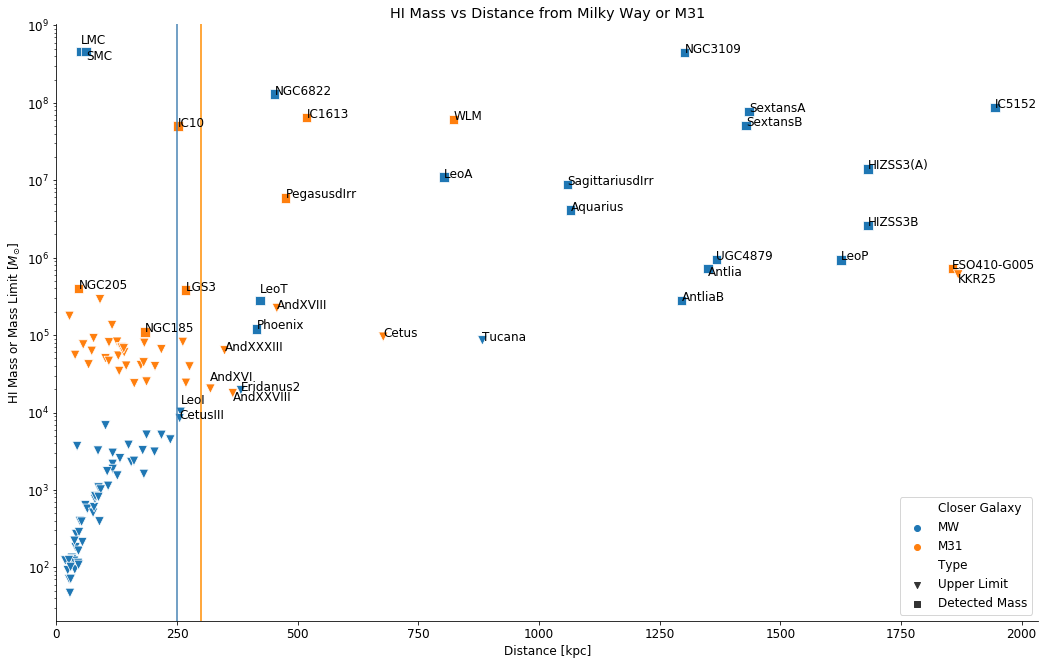

In [92]:
#Full range of D, MHI_computed vs min dist to m31 or mw, whichever is closer

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

plot_df = gals_merged[gals_merged['mw_dist'] < 2000]
plot_df.reset_index(drop=True, inplace=True)
label=[]


plot_df.rename(columns = {'Closer_MW_M31':'Closer Galaxy'}, inplace = True)
plot_df.rename(columns = {'MHI_type':'Type'}, inplace = True)

plot_df.replace({'detected_mass': 'Detected Mass', 'upper_limit': 'Upper Limit'},inplace=True)

fg = sb.FacetGrid(data=plot_df, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")

#fg.map(plt.scatter, 'min_dist_mw_or_m31', 'MHI_computed').add_legend()
fg = sb.scatterplot(x=plot_df['min_dist_mw_or_m31'], y=plot_df['MHI_computed'],hue=plot_df['Closer Galaxy'],style=plot_df['Type'],markers={"Detected Mass": "s", "Upper Limit": "v"},s=90)
#print(gals_merged.count())
count = 0
for i, txt in enumerate(plot_df.GalaxyName):
    if((((plot_df['Closer Galaxy'][i] == 'M31') & (plot_df['min_dist_mw_or_m31'][i] > 300)) | ((plot_df['Closer Galaxy'][i] == 'MW') & (plot_df['min_dist_mw_or_m31'][i] > 250)) | (plot_df['Type'][i] == 'Detected Mass') | (plot_df['MHI_computed'][i] > 1000000))):
        if ('Andromeda' in txt):
            roman = txt.split('Andromeda')
            roman = ''.join(roman)
            label = "And" + roman
        else:
            label = txt
        if (txt in ['AndromedaXXVIII','SMC','Antlia','KKR25']):
            label_x = plot_df['min_dist_mw_or_m31'].iat[i]
            label_y = plot_df['MHI_computed'].iat[i] - (plot_df['MHI_computed'].iat[i]*.2)
        elif (txt in ['LMC','LeoT','LeoI','AndromedaXVI']):
            label_x = plot_df['min_dist_mw_or_m31'].iat[i]
            label_y = plot_df['MHI_computed'].iat[i] + (plot_df['MHI_computed'].iat[i]*.27)
        else:
            label_x = plot_df['min_dist_mw_or_m31'].iat[i]
            label_y = plot_df['MHI_computed'].iat[i]
        plt.annotate(label,(label_x,label_y))

plt.xlim(0, 2035)
plt.axvline(250,color='steelblue')
plt.axvline(300,color='darkorange')

plt.title("HI Mass vs Distance from Milky Way or M31")
plt.ylabel("HI Mass or Mass Limit [$M_{\odot}$]")
plt.xlabel("Distance [kpc]")
plt.show()

In [93]:
for i, txt in enumerate(gals_merged.GalaxyName):
    if('Hyd' in txt):
        print(txt)

HydraII
HydrusI


/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


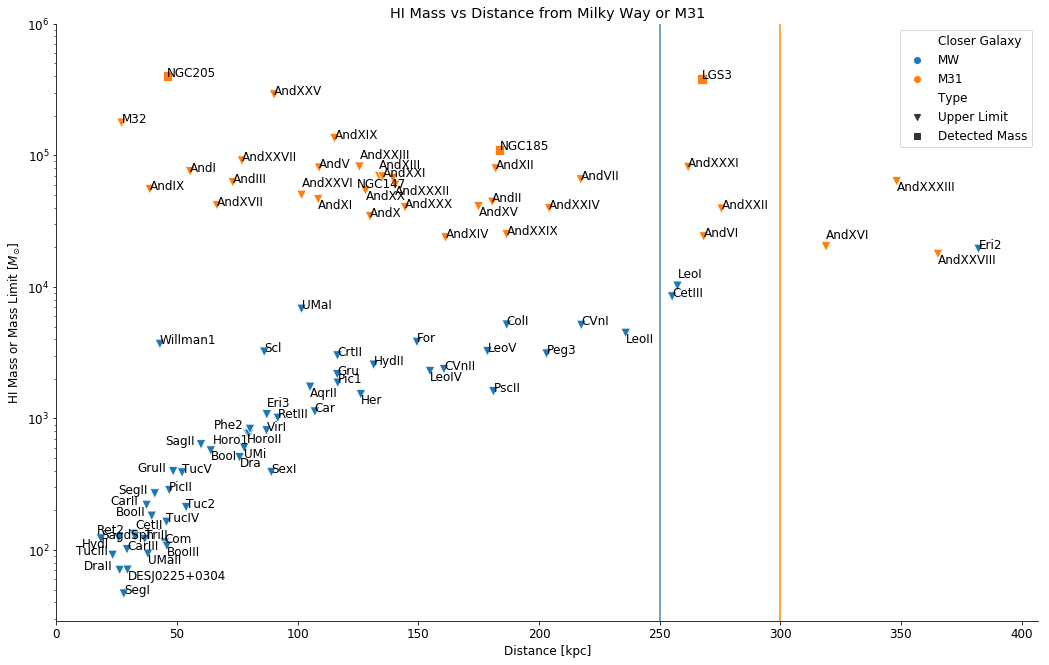

In [94]:
#Zoomed in D, MHI_computed vs min dist to m31 or mw, whichever is closer

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

plot_df = gals_merged[((gals_merged['mw_dist'] < 400) | (gals_merged['m31_dist'] < 400)) & (gals_merged['MHI_computed'] < 1000000)]
plot_df.reset_index(drop=True, inplace=True)
label=[]


plot_df.rename(columns = {'Closer_MW_M31':'Closer Galaxy'}, inplace = True)
plot_df.rename(columns = {'MHI_type':'Type'}, inplace = True)

plot_df.replace({'detected_mass': 'Detected Mass', 'upper_limit': 'Upper Limit'},inplace=True)

fg = sb.FacetGrid(data=plot_df, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")

#fg.map(plt.scatter, 'min_dist_mw_or_m31', 'MHI_computed').add_legend()
fg = sb.scatterplot(x=plot_df['min_dist_mw_or_m31'], y=plot_df['MHI_computed'],hue=plot_df['Closer Galaxy'],style=plot_df['Type'],markers={"Detected Mass": "s", "Upper Limit": "v"},s=90)
#print(gals_merged.count())
count = 0
for i, txt in enumerate(plot_df.GalaxyName):
    if ('Andromeda' in txt):
        roman = txt.split('Andromeda')
        roman = ''.join(roman)
        label = "And" + roman
    elif ('Sag' in txt):
        tag = re.findall(r"dSph",txt) + re.findall(r"II",txt) + re.findall(r"dIrr",txt)
        tag = ''.join(tag)
        label = "Sag" + tag
    elif ('Tuc' in txt):
        tag = re.findall(r"I",txt) + re.findall(r"V",txt) + re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Tuc" + tag
    elif ('Horo' in txt):
        tag = re.findall(r"I",txt) + re.findall(r"1",txt)
        tag = ''.join(tag)
        label = "Horo" + tag
    elif ('Retic' in txt):
        tag = re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Ret" + tag
    elif ('UrsaMajor' in txt):
        tag = re.findall(r"I",txt) + re.findall(r"1",txt)
        tag = ''.join(tag)
        label = "UMa" + tag
    elif ('Bootes' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)
        tag = ''.join(tag)
        label = "Boo" + tag
    elif ('Carina' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Car" + tag
    elif ('Segue' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Seg" + tag
    elif ('Hydr' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Hyd" + tag
    elif ('Cetus' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Cet" + tag
    elif ('Triangulum' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Tri" + tag
    elif ('ComaBerenices' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Com" + tag
    elif ('UrsaMinor' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "UMi" + tag
    elif ('Pisces' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Psc" + tag
    elif ('Pictor' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Pic" + tag
    elif ('Eridan' in txt):
        tag =  re.findall(r"3",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Eri" + tag
    elif ('Hercules' in txt):
        tag =  re.findall(r"3",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Her" + tag
    elif ('CanesVenatici' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "CVn" + tag
    elif ('Columba' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Col" + tag
    elif ('Pegasus' in txt):
        tag =  re.findall(r"3",txt)+re.findall(r"dIrr",txt)
        tag = ''.join(tag)
        label = "Peg" + tag
    elif ('Draco' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Dra" + tag
    elif ('Phoenix' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Phe" + tag
    elif ('Sextans' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"A",txt)+re.findall(r"B",txt)
        tag = ''.join(tag)
        label = "Sex" + tag
    elif ('Tucana' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"V",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Tuc" + tag
    elif ('Virgo' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "Vir" + tag
    elif ('Aquarius' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "Aqr" + tag
    elif ('Sculptor' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "Scl" + tag
    elif ('Crater' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "Crt" + tag
    elif ('Fornax' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "For" + tag
    elif ('Grus' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "Gru" + tag
    else:
        label = txt
    if (txt in ['AndromedaXXVIII','SMC','Antlia','KKR25','AndromedaXXXII','AndromedaXX','AndromedaXI','AndromedaXXXIII','LeoII','LeoIV','Hercules','AquariusII','DESJ0225+0304','Tucana','Draco','Bootes(I)','HorologiumII','UrsaMajorII','AndromedaXV','BootesIII','UrsaMinor']):
        label_x = plot_df['min_dist_mw_or_m31'].iat[i]
        label_y = plot_df['MHI_computed'].iat[i] - (plot_df['MHI_computed'].iat[i]*.15)
    elif (txt in ['AndromedaXIII','LMC','LeoT','LeoI','AndromedaXVI','AndromedaXXIII','AndromedaXXVI','Eridanus3','CetusII']):
        label_x = plot_df['min_dist_mw_or_m31'].iat[i]
        label_y = plot_df['MHI_computed'].iat[i] + (plot_df['MHI_computed'].iat[i]*.15)
    elif (txt in ['GrusII','SegueII','TucanaIII','SagittariusII','DracoII','CarinaII','Reticulum2','BootesII','Phoenix2','AndromedaXX',]):
        label_x = plot_df['min_dist_mw_or_m31'].iat[i]-15
        label_y = plot_df['MHI_computed'].iat[i]
    elif (txt in ['HydrusI','Horologium1','NGC147','AndromedaXX']):
        label_x = plot_df['min_dist_mw_or_m31'].iat[i]-15
        label_y = plot_df['MHI_computed'].iat[i]-(plot_df['MHI_computed'].iat[i]*.15)
    else:
        label_x = plot_df['min_dist_mw_or_m31'].iat[i]
        label_y = plot_df['MHI_computed'].iat[i]
    plt.annotate(label,(label_x,label_y))

plt.xlim(0, 407)
plt.ylim(0, 1000000)
plt.axvline(250,color='steelblue')
plt.axvline(300,color='darkorange')

plt.title("HI Mass vs Distance from Milky Way or M31")
plt.ylabel("HI Mass or Mass Limit [$M_{\odot}$]")
plt.xlabel("Distance [kpc]")
plt.show()

In [95]:
list(gals_merged.columns)

['GalaxyName',
 'RA_hr',
 'RA_min',
 'RA_sec',
 'Dec_deg',
 'Dec_arcmin',
 'Dec_arcsec',
 'EB-V',
 'm-M',
 'm-M_err_pos',
 'm-M_err_neg',
 'vh(km/s)',
 'Vmag',
 'Vmag_err_pos',
 'Vmag_err_neg',
 'PA',
 'e=1-b/a',
 'muVo',
 "rh(')",
 'rh_err_pos',
 'rh_err_neg',
 'vsig_s',
 'vsig_err_pos',
 'vsig_err_neg',
 'vrot_s',
 'vrot_s_err_pos',
 'vrot_s_err_neg',
 'MHI',
 'Data',
 'Key',
 'vsig_g',
 'vsig_g_err_pos',
 'vsig_g_err_neg',
 'vrot_g',
 'note',
 'M-m',
 'Notes',
 'ra',
 'dec',
 'vsig_s_upper_limit',
 'orb_pericenter',
 'orb_apocenter',
 'orb_eccentricity',
 'orb_period',
 'orb_period_type',
 'tau_50',
 'tau_90',
 'dist_pc',
 'dist_kpc',
 'dist_mpc',
 'MHI_computed',
 'MHI_source',
 'MHI_type',
 '1sigma',
 'rh_subtable',
 'MHI_method',
 'npix',
 'GUU',
 'GRU',
 'HUU',
 'HRU',
 'GNV',
 'HNV',
 'LIT',
 '1sigma_GUU',
 '1sigma_GRU',
 '1sigma_HUU',
 '1sigma_HRU',
 '1sigma_GNV',
 '1sigma_HNV',
 'M_star',
 'M_dyn_r_h',
 'm-M_err',
 'Vmag_err',
 'vsig_err',
 'MHI_mcconnachie',
 'vsig_g_err',
 

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


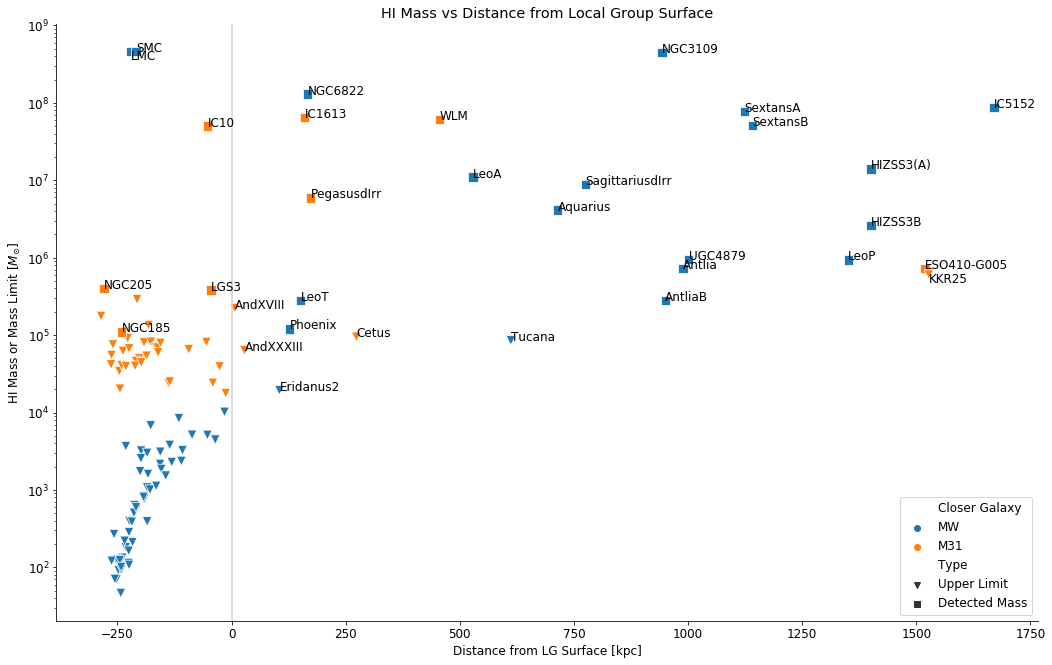

In [98]:
#MHI_computed vs Distance to LG surface

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

plot_df = gals_merged[gals_merged['mw_dist'] < 2000]
plot_df.reset_index(drop=True, inplace=True)
label=[]

LG_model = 'ell_surf_dist'

plot_df.rename(columns = {'Closer_MW_M31':'Closer Galaxy'}, inplace = True)
plot_df.rename(columns = {'MHI_type':'Type'}, inplace = True)

plot_df.replace({'detected_mass': 'Detected Mass', 'upper_limit': 'Upper Limit'},inplace=True)

fg = sb.FacetGrid(data=plot_df, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")

#fg.map(plt.scatter, 'min_dist_mw_or_m31', 'MHI_computed').add_legend()
fg = sb.scatterplot(x=plot_df[LG_model], y=plot_df['MHI_computed'],hue=plot_df['Closer Galaxy'],style=plot_df['Type'],markers={"Detected Mass": "s", "Upper Limit": "v"},s=90)
#print(gals_merged.count())
count = 0
for i, txt in enumerate(plot_df.GalaxyName):
    if((plot_df[LG_model][i] > 0) | (plot_df['Type'][i] == 'Detected Mass') | (plot_df['MHI_computed'][i] > 1000000)):
        if ('Andromeda' in txt):
            roman = txt.split('Andromeda')
            roman = ''.join(roman)
            label = "And" + roman
        else:
            label = txt
        if (txt in ['LMC','KKR25']):
            label_x = plot_df[LG_model].iat[i]
            label_y = plot_df['MHI_computed'].iat[i] - (plot_df['MHI_computed'].iat[i]*.2)
        elif (txt in []):
            label_x = plot_df[LG_model].iat[i]
            label_y = plot_df['MHI_computed'].iat[i] + (plot_df['MHI_computed'].iat[i]*.27)
        else:
            label_x = plot_df[LG_model].iat[i]
            label_y = plot_df['MHI_computed'].iat[i]
        plt.annotate(label,(label_x,label_y))

#plt.xlim(0, 2035)
#plt.axvline(250,color='steelblue')
#plt.axvline(300,color='darkorange')
plt.axvline(0,color='lightgray')

plt.title("HI Mass vs Distance from Local Group Surface")
plt.ylabel("HI Mass or Mass Limit [$M_{\odot}$]")
plt.xlabel("Distance from LG Surface [kpc]")
plt.show()

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


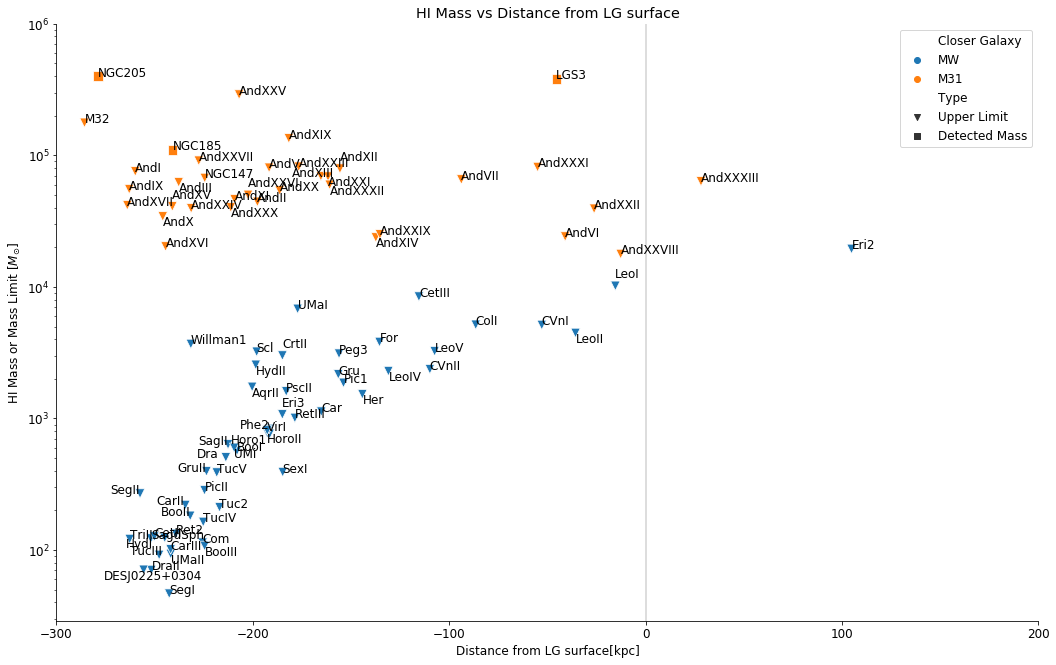

In [99]:
#Zoomed in D, MHI_computed vs min dist to m31 or mw, whichever is closer

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

#plot_df = gals_merged
plot_df = gals_merged[((gals_merged['mw_dist'] < 400) | (gals_merged['m31_dist'] < 400)) & (gals_merged['MHI_computed'] < 1000000)]
plot_df.reset_index(drop=True, inplace=True)
label=[]

LG_model = 'ell_surf_dist'


plot_df.rename(columns = {'Closer_MW_M31':'Closer Galaxy'}, inplace = True)
plot_df.rename(columns = {'MHI_type':'Type'}, inplace = True)

plot_df.replace({'detected_mass': 'Detected Mass', 'upper_limit': 'Upper Limit'},inplace=True)

fg = sb.FacetGrid(data=plot_df, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")

#fg.map(plt.scatter, 'min_dist_mw_or_m31', 'MHI_computed').add_legend()
fg = sb.scatterplot(x=plot_df[LG_model], y=plot_df['MHI_computed'],hue=plot_df['Closer Galaxy'],style=plot_df['Type'],markers={"Detected Mass": "s", "Upper Limit": "v"},s=90)
#print(gals_merged.count())
count = 0
for i, txt in enumerate(plot_df.GalaxyName):
    if ('Andromeda' in txt):
        roman = txt.split('Andromeda')
        roman = ''.join(roman)
        label = "And" + roman
    elif ('Sag' in txt):
        tag = re.findall(r"dSph",txt) + re.findall(r"II",txt) + re.findall(r"dIrr",txt)
        tag = ''.join(tag)
        label = "Sag" + tag
    elif ('Tuc' in txt):
        tag = re.findall(r"I",txt) + re.findall(r"V",txt) + re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Tuc" + tag
    elif ('Horo' in txt):
        tag = re.findall(r"I",txt) + re.findall(r"1",txt)
        tag = ''.join(tag)
        label = "Horo" + tag
    elif ('Retic' in txt):
        tag = re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Ret" + tag
    elif ('UrsaMajor' in txt):
        tag = re.findall(r"I",txt) + re.findall(r"1",txt)
        tag = ''.join(tag)
        label = "UMa" + tag
    elif ('Bootes' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)
        tag = ''.join(tag)
        label = "Boo" + tag
    elif ('Carina' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Car" + tag
    elif ('Segue' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Seg" + tag
    elif ('Hydr' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Hyd" + tag
    elif ('Cetus' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Cet" + tag
    elif ('Triangulum' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Tri" + tag
    elif ('ComaBerenices' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Com" + tag
    elif ('UrsaMinor' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "UMi" + tag
    elif ('Pisces' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Psc" + tag
    elif ('Pictor' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Pic" + tag
    elif ('Eridan' in txt):
        tag =  re.findall(r"3",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Eri" + tag
    elif ('Hercules' in txt):
        tag =  re.findall(r"3",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Her" + tag
    elif ('CanesVenatici' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "CVn" + tag
    elif ('Columba' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Col" + tag
    elif ('Pegasus' in txt):
        tag =  re.findall(r"3",txt)+re.findall(r"dIrr",txt)
        tag = ''.join(tag)
        label = "Peg" + tag
    elif ('Draco' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Dra" + tag
    elif ('Phoenix' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"1",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Phe" + tag
    elif ('Sextans' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"A",txt)+re.findall(r"B",txt)
        tag = ''.join(tag)
        label = "Sex" + tag
    elif ('Tucana' in txt):
        tag =  re.findall(r"I",txt) + re.findall(r"V",txt)+re.findall(r"2",txt)
        tag = ''.join(tag)
        label = "Tuc" + tag
    elif ('Virgo' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "Vir" + tag
    elif ('Aquarius' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "Aqr" + tag
    elif ('Sculptor' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "Scl" + tag
    elif ('Crater' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "Crt" + tag
    elif ('Fornax' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "For" + tag
    elif ('Grus' in txt):
        tag =  re.findall(r"I",txt)
        tag = ''.join(tag)
        label = "Gru" + tag
    else:
        label = txt
    if (txt in ['AndromedaXIV','AndromedaXXI','AndromedaX','AndromedaIII','AndromedaXXX','AndromedaXXXII','HydraII','SMC','Antlia','KKR25','LeoII','LeoIV','Hercules','AquariusII','Tucana','HorologiumII','UrsaMajorII','BootesIII','UrsaMinor']):
        label_x = plot_df[LG_model].iat[i]
        label_y = plot_df['MHI_computed'].iat[i] - (plot_df['MHI_computed'].iat[i]*.15)
    elif (txt in ['AndromedaXV','AndromedaXXVI','AndromedaXII','CraterII','LMC','LeoT','LeoI','Eridanus3']):
        label_x = plot_df[LG_model].iat[i]
        label_y = plot_df['MHI_computed'].iat[i] + (plot_df['MHI_computed'].iat[i]*.15)
    elif (txt in ['AndromedaXIII','Draco','GrusII','SegueII','TucanaIII','SagittariusII','CarinaII','BootesII','Phoenix2']):
        label_x = plot_df[LG_model].iat[i]-15
        label_y = plot_df['MHI_computed'].iat[i]
    elif (txt in ['HydrusI','Horologium1','DESJ0225+0304']):
        label_x = plot_df[LG_model].iat[i]-20
        label_y = plot_df['MHI_computed'].iat[i]-(plot_df['MHI_computed'].iat[i]*.15)
    else:
        label_x = plot_df[LG_model].iat[i]
        label_y = plot_df['MHI_computed'].iat[i]
    plt.annotate(label,(label_x,label_y))

plt.xlim(-300, 200)
plt.ylim(0, 1000000)
#plt.axvline(250,color='steelblue')
#plt.axvline(300,color='darkorange')
plt.axvline(0,color='lightgray')

plt.title("HI Mass vs Distance from LG surface")
plt.ylabel("HI Mass or Mass Limit [$M_{\odot}$]")
plt.xlabel("Distance from LG surface[kpc]")
plt.show()

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


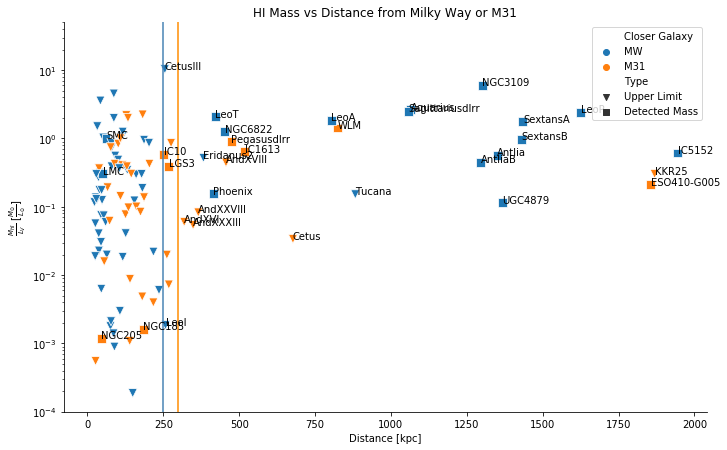

In [100]:
#Full range of D, MHI_computed normalized by L_v vs min dist to m31 or mw, whichever is closer

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 10}

plt.rc('font', **font)

plot_df = gals_merged[gals_merged['mw_dist'] < 2000]
plot_df.reset_index(drop=True, inplace=True)
label=[]

plot_df.rename(columns = {'Closer_MW_M31':'Closer Galaxy'}, inplace = True)
plot_df.rename(columns = {'MHI_type':'Type'}, inplace = True)

plot_df.replace({'detected_mass': 'Detected Mass', 'upper_limit': 'Upper Limit'},inplace=True)

fg = sb.FacetGrid(data=plot_df, hue='MHI_source', height = 6,aspect=1.61)
fg.set(xscale="linear", yscale="log")

#fg.map(plt.scatter, 'min_dist_mw_or_m31', 'MHI_computed').add_legend()
fg = sb.scatterplot(x=plot_df['min_dist_mw_or_m31'], y=plot_df['MHI/L_V'],hue=plot_df['Closer Galaxy'],style=plot_df['Type'],markers={"Detected Mass": "s", "Upper Limit": "v"},s=80)
#print(gals_merged.count())
count = 0
plot_df.reset_index(drop=True, inplace=True)

for i, txt in enumerate(plot_df.GalaxyName):
    if(((plot_df['Closer Galaxy'][i] == 'M31') & (plot_df['min_dist_mw_or_m31'][i] > 300)) | ((plot_df['Closer Galaxy'][i] == 'MW') & (plot_df['min_dist_mw_or_m31'][i] > 250)) | (plot_df['Type'][i] == 'Detected Mass')):
        if ('Andromeda' in txt):
            roman = txt.split('Andromeda')
            roman = ''.join(roman)
            label = "And" + roman
        else:
            label = txt
        
        label_x = plot_df['min_dist_mw_or_m31'].iat[i]
        label_y = plot_df['MHI/L_V'].iat[i]
        if(label_y < 50):
            plt.annotate(label,(label_x,label_y))

plt.ylim(0.0001, 50)

plt.axvline(250,color='steelblue')
plt.axvline(300,color='darkorange')

plt.title("HI Mass vs Distance from Milky Way or M31")
plt.ylabel("$\\frac{M_{HI}}{L_{V}}$ [$\\frac{M_{\odot}}{L_{\odot}}$]")
plt.xlabel("Distance [kpc]")
plt.show()

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


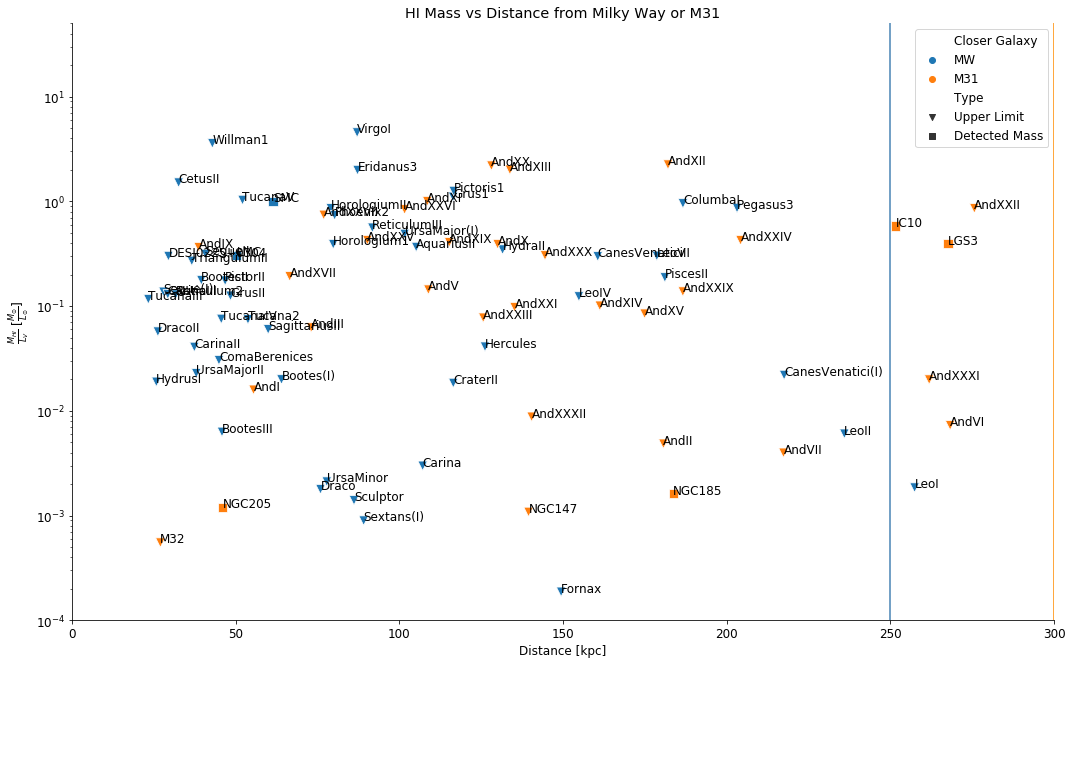

In [101]:
#Zoomed MHI_computed normalized by L_v vs min dist to m31 or mw, whichever is closer

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

plot_df = gals_merged[gals_merged['mw_dist'] < 2000]
plot_df.reset_index(drop=True, inplace=True)
label=[]

plot_df.rename(columns = {'Closer_MW_M31':'Closer Galaxy'}, inplace = True)
plot_df.rename(columns = {'MHI_type':'Type'}, inplace = True)



plot_df.replace({'detected_mass': 'Detected Mass', 'upper_limit': 'Upper Limit'},inplace=True)

xlim_up = 300
ylim_up = 10

plot_df = plot_df[(plot_df['min_dist_mw_or_m31'] < 300) & (plot_df['MHI/L_V'] < 10)]
plot_df.reset_index(drop=True, inplace=True)

fg = sb.FacetGrid(data=plot_df, hue='MHI_source', height=9, aspect = 1.61)


#fg = sb.FacetGrid(data=plot_df, hue='MHI_source', height=3, aspect=1.61)
#fg = sb.scatterplot(x=plot_df[LG_model], y=plot_df['MHI_computed'],hue=plot_df['Closer Galaxy'],style=plot_df['Type'],markers={"Detected Mass": "s", "Upper Limit": "v"},s=90)
fg.set(xscale="linear", yscale="log")

#fg.map(plt.scatter, 'min_dist_mw_or_m31', 'MHI_computed').add_legend()
fg = sb.scatterplot(x=plot_df['min_dist_mw_or_m31'], y=plot_df['MHI/L_V'],hue=plot_df['Closer Galaxy'],style=plot_df['Type'],markers={"Detected Mass": "s", "Upper Limit": "v"},s=90)
for i, txt in enumerate(plot_df.GalaxyName):
    if(((plot_df['Closer Galaxy'][i] == 'M31') & (plot_df['min_dist_mw_or_m31'][i] > 0)) | ((plot_df['Closer Galaxy'][i] == 'MW') & (plot_df['min_dist_mw_or_m31'][i] > 0)) | (plot_df['Type'][i] == 'Detected Mass')):
        if ('Andromeda' in txt):
            roman = txt.split('Andromeda')
            roman = ''.join(roman)
            label = "And" + roman
        else:
            label = txt
        
        label_x = plot_df['min_dist_mw_or_m31'].iat[i]
        label_y = plot_df['MHI/L_V'].iat[i]
        plt.annotate(label,(label_x,label_y))

plt.ylim(0.0001, 50)
plt.xlim(0,300)

plt.axvline(250,color='steelblue')
plt.axvline(300,color='darkorange')


plt.title("HI Mass vs Distance from Milky Way or M31")
plt.ylabel("$\\frac{M_{HI}}{L_{V}}$ [$\\frac{M_{\odot}}{L_{\odot}}$]")
plt.xlabel("Distance [kpc]")
plt.show()

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


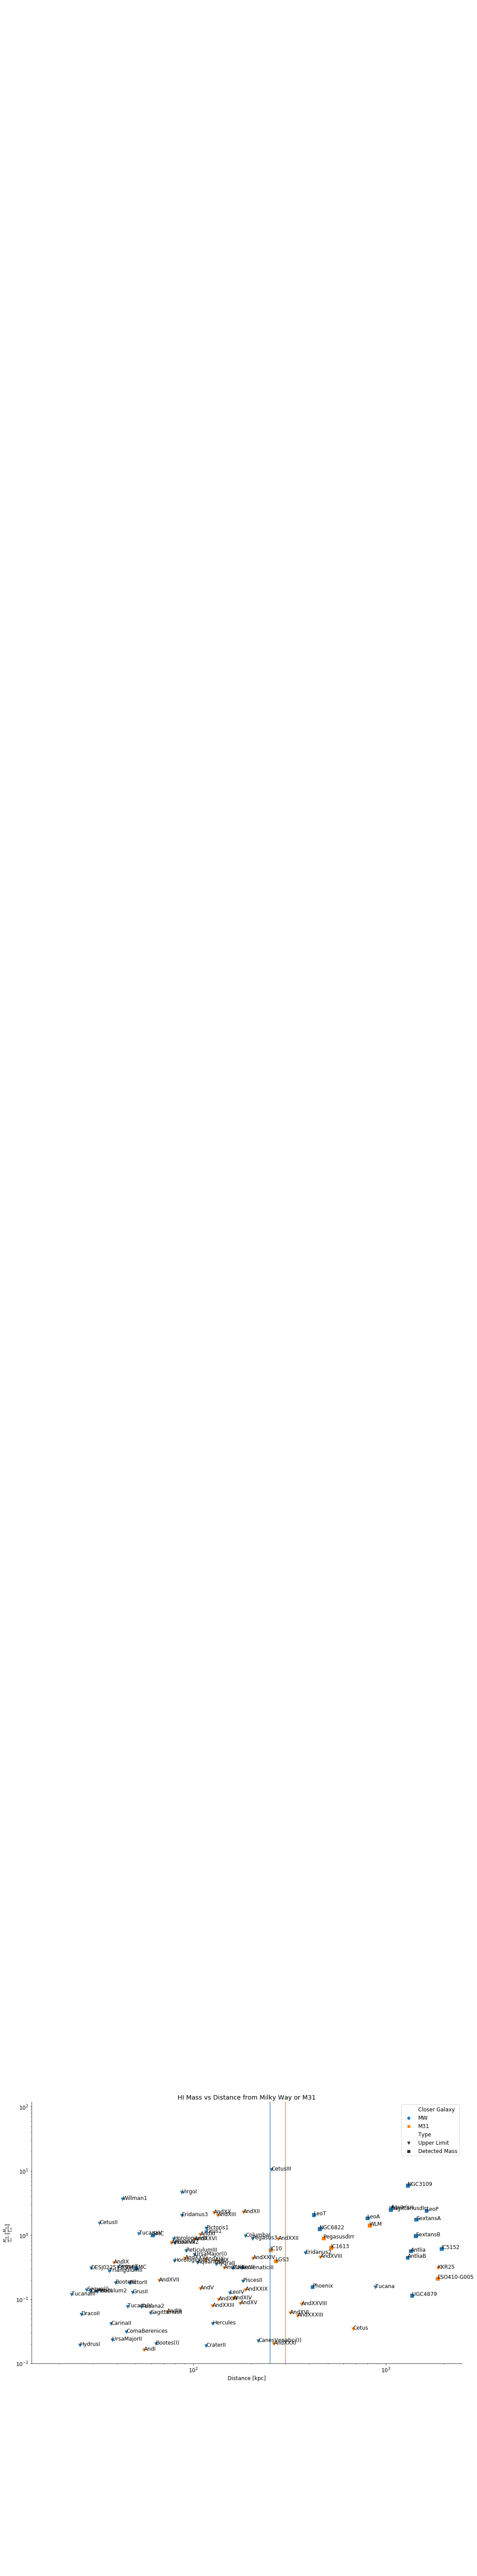

In [103]:
#Full range of D, MHI_computed normalized by L_v vs min dist to m31 or mw, whichever is closer

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

plot_df = gals_merged[gals_merged['mw_dist'] < 2000]
plot_df.reset_index(drop=True, inplace=True)
label=[]


plot_df.rename(columns = {'Closer_MW_M31':'Closer Galaxy'}, inplace = True)
plot_df.rename(columns = {'MHI_type':'Type'}, inplace = True)

plot_df.replace({'detected_mass': 'Detected Mass', 'upper_limit': 'Upper Limit'},inplace=True)

fg = sb.FacetGrid(data=plot_df, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="log", yscale="log")

#fg.map(plt.scatter, 'min_dist_mw_or_m31', 'MHI_computed').add_legend()
fg = sb.scatterplot(x=plot_df['min_dist_mw_or_m31'], y=plot_df['MHI/L_V'],hue=plot_df['Closer Galaxy'],style=plot_df['Type'],markers={"Detected Mass": "s", "Upper Limit": "v"},s=90)
#print(gals_merged.count())
count = 0
for i, txt in enumerate(plot_df.GalaxyName):
    if((plot_df['Type'][i] == 'Upper Limit')|(plot_df['Type'][i] == 'Detected Mass') ):
        if ('Andromeda' in txt):
            roman = txt.split('Andromeda')
            roman = ''.join(roman)
            label = "And" + roman
        else:
            label = txt
        if (txt in []):
            label_x = plot_df['min_dist_mw_or_m31'].iat[i]
            label_y = plot_df['MHI/L_V'].iat[i] - (plot_df['MHI/L_V'].iat[i]*.2)
        elif (txt in []):
            label_x = plot_df['min_dist_mw_or_m31'].iat[i]
            label_y = plot_df['MHI/L_V'].iat[i] + (plot_df['MHI/L_V'].iat[i]*.27)
        else:
            label_x = plot_df['min_dist_mw_or_m31'].iat[i]
            label_y = plot_df['MHI/L_V'].iat[i]
        plt.annotate(label,(label_x,label_y))

plt.ylim(0.01, 120)
plt.axvline(250,color='steelblue')
plt.axvline(300,color='darkorange')

plt.title("HI Mass vs Distance from Milky Way or M31")
plt.ylabel("$\\frac{M_{HI}}{L_{V}}$ [$\\frac{M_{\odot}}{L_{\odot}}$]")
plt.xlabel("Distance [kpc]")
plt.show()

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


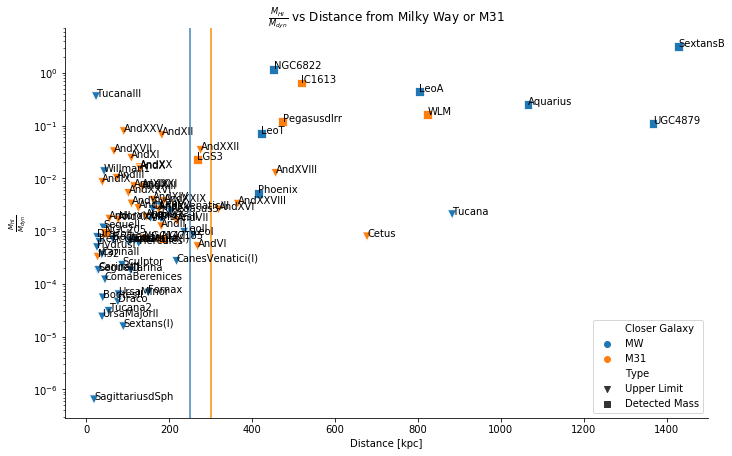

In [104]:
#Full range of D, MHI_computed normalized by M_dyn vs min dist to m31 or mw, whichever is closer

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 10}

plt.rc('font', **font)

plot_df = gals_merged[gals_merged['mw_dist'] < 2000]
plot_df = gals_merged[gals_merged['MHI/M_dyn'] > 0]
plot_df.reset_index(drop=True, inplace=True)
label=[]

plot_df.rename(columns = {'Closer_MW_M31':'Closer Galaxy'}, inplace = True)
plot_df.rename(columns = {'MHI_type':'Type'}, inplace = True)

plot_df.replace({'detected_mass': 'Detected Mass', 'upper_limit': 'Upper Limit'},inplace=True)

fg = sb.FacetGrid(data=plot_df, hue='MHI_source', height = 6,aspect=1.61)
fg.set(xscale="linear", yscale="log")

#fg.map(plt.scatter, 'min_dist_mw_or_m31', 'MHI_computed').add_legend()
fg = sb.scatterplot(x=plot_df['min_dist_mw_or_m31'], y=plot_df['MHI/M_dyn'],hue=plot_df['Closer Galaxy'],style=plot_df['Type'],markers={"Detected Mass": "s", "Upper Limit": "v"},s=80)
#print(gals_merged.count())
count = 0
plot_df.reset_index(drop=True, inplace=True)

for i, txt in enumerate(plot_df.GalaxyName):
    if(((plot_df['Closer Galaxy'][i] == 'M31') & (plot_df['min_dist_mw_or_m31'][i] > 0)) | ((plot_df['Closer Galaxy'][i] == 'MW') & (plot_df['min_dist_mw_or_m31'][i] > 0)) | (plot_df['Type'][i] == 'Detected Mass')):
        if ('Andromeda' in txt):
            roman = txt.split('Andromeda')
            roman = ''.join(roman)
            label = "And" + roman
        else:
            label = txt
        
        label_x = plot_df['min_dist_mw_or_m31'].iat[i]
        label_y = plot_df['MHI/M_dyn'].iat[i]
        plt.annotate(label,(label_x,label_y))

#plt.ylim(0, 50)

plt.axvline(250,color='steelblue')
plt.axvline(300,color='darkorange')

plt.title("$\\frac{M_{HI}}{M_{dyn}}$ vs Distance from Milky Way or M31")
plt.ylabel("$\\frac{M_{HI}}{M_{dyn}}$")
plt.xlabel("Distance [kpc]")
plt.show()

In [105]:
gals_merged[(gals_merged['MHI_type'] != 'detected_mass') & (gals_merged['MHI_type'] != 'upper_limit')]

#53 upper_limits w/d_mw < 300

GalaxyName  RA_hr  RA_min  RA_sec  Dec_deg  Dec_arcmin  Dec_arcsec  \
0     #TheGalaxy   17.0    45.0    40.0    -29.0         0.0        28.0   
1   #*CanisMajor    7.0    12.0    35.0    -27.0        40.0         0.0   
50    #Andromeda    0.0    42.0    44.3     41.0        16.0         9.0   
77    Triangulum    1.0    33.0    50.9     30.0        39.0        37.0   

     EB-V    m-M  m-M_err_pos  ...    M_V  MHI/M_V           L_V  MHI/L_V  \
0   9.999  99.99         9.99  ...  -0.09      NaN  9.289664e+01      NaN   
1   0.264  14.29         0.30  ... -14.39      NaN  4.875285e+07      NaN   
50  0.684  24.47         0.07  ...  75.43      NaN  5.754399e-29      NaN   
77  0.041  24.54         0.06  ... -18.84      NaN  2.937650e+09      NaN   

        r_ell  ell_surf_dist     mw_dist    m31_dist  min_dist_mw_or_m31  \
0         NaN            NaN         NaN         NaN                 NaN   
1         NaN            NaN         NaN         NaN                 NaN   
50  335.71108    -295.352016  787.458708    4.429647            4.429647   
77  655.80215     -91.826635  814.013628  206.479819          206.479819   

    Closer_MW_M31  
0             NaN  
1             NaN  
50            M31  
77            M31  

[4 rows x 116 columns]

In [106]:
count

0

In [107]:
gals_merged['ell_surf_log10_abs'] = np.nan

for i, ell_surf in enumerate(gals_merged['ell_surf_dist']):
    if((pd.notnull(ell_surf))):
        if(ell_surf < 0):
            gals_merged['ell_surf_dist'][i] = (-1*(np.log10(abs(ell_surf))))
        else:
            gals_merged['ell_surf_dist'][i] = (np.log10(abs(ell_surf)))

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


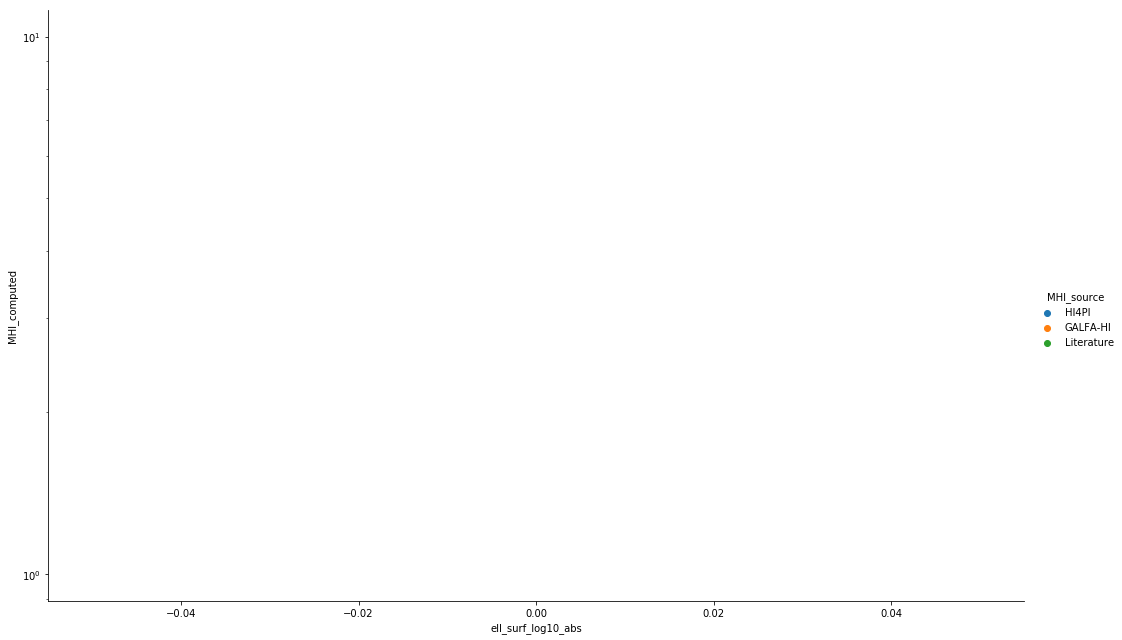

In [108]:
#r_ell, normalized with labels, ylog only scale, split at 0
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")
fg.map(plt.scatter, 'ell_surf_log10_abs', 'MHI_computed').add_legend()
#print(gals_merged.count())
for i, txt in enumerate(gals_merged.GalaxyName):
    #print(i,gals_merged['GalaxyName'][i],txt)
    if((pd.notnull(gals_merged['ell_surf_log10_abs'][i])) & (pd.notnull(gals_merged['MHI_computed'][i]))):
            #print(i,txt,gals_merged['dist_kpc'][i],gals_merged['MHI_computed'][i],gals_merged['GalaxyName'][i])
            #label = txt[0:3]
            if (len(txt) > 7):
                label = txt[0:3]+txt[-4:]
            else:
                label = txt
            plt.annotate(label,(gals_merged['ell_surf_log10_abs'].iat[i],gals_merged['MHI_computed'].iat[i]))
plt.show()

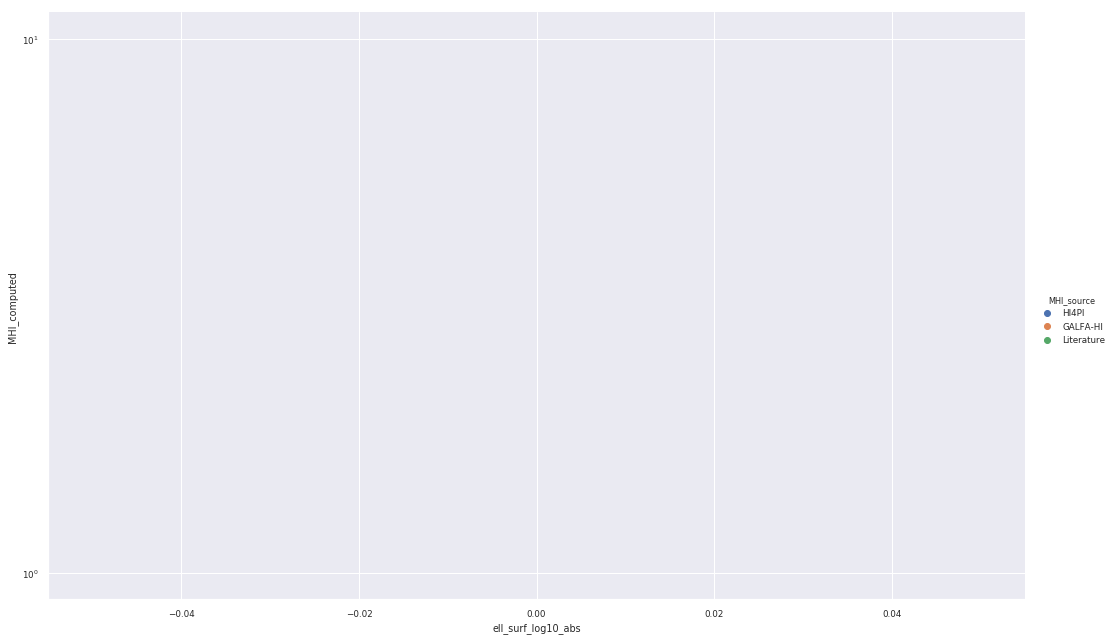

In [423]:
#r_ell, no labels, ylog only scale, split at 0
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")
fg.map(plt.scatter, 'ell_surf_log10_abs', 'MHI_computed').add_legend()
#print(gals_merged.count())
#for i, txt in enumerate(gals_merged.GalaxyName):
    #print(i,gals_merged['GalaxyName'][i],txt)
#    if((pd.notnull(gals_merged['ell_surf_log10_abs'][i])) & (pd.notnull(gals_merged['MHI_computed'][i]))):
#            #print(i,txt,gals_merged['dist_kpc'][i],gals_merged['MHI_computed'][i],gals_merged['GalaxyName'][i])
#            #label = txt[0:3]
#            if (len(txt) > 7):
#                label = txt[0:3]+txt[-4:]
#            else:
#                label = txt
#            plt.annotate(label,(gals_merged['ell_surf_log10_abs'].iat[i],gals_merged['MHI_computed'].iat[i]))
plt.show()

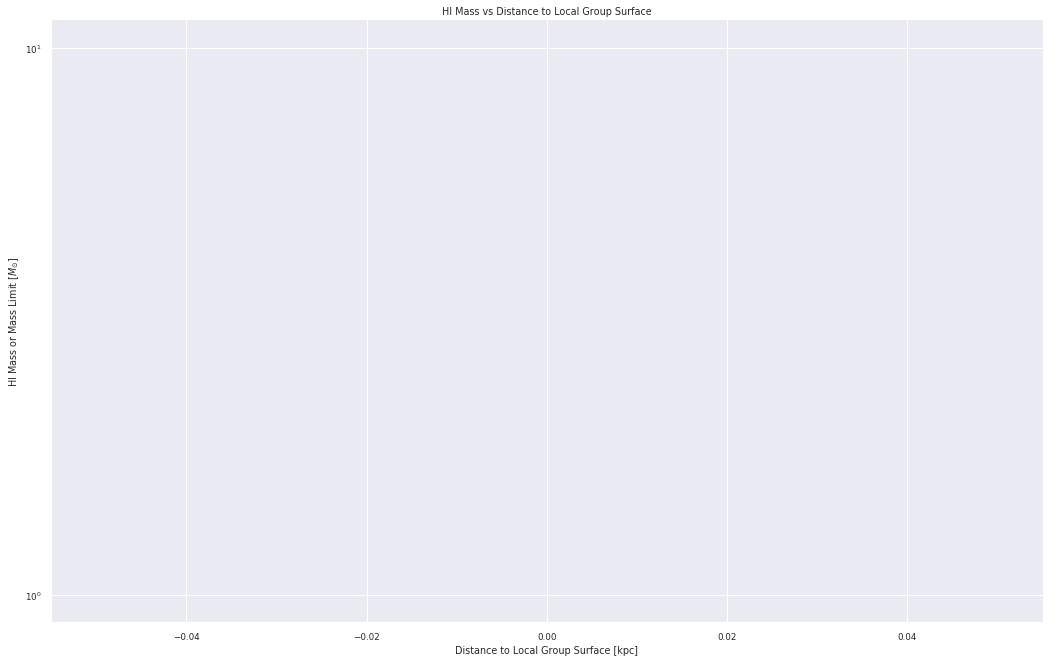

In [424]:
#MHI_computed vs min dist to m31 or mw, whichever is less
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")
#fg.map(plt.scatter, 'min_dist_mw_or_m31', 'MHI_computed').add_legend()
fg = sb.scatterplot(x=gals_merged['ell_surf_log10_abs'], y=gals_merged['MHI_computed'],hue=gals_merged['MHI_source'], style=gals_merged['MHI_source'],markers={"Literature": "s", "HI4PI": "v", "GALFA-HI": "v"})
#print(gals_merged.count())

plt.title("HI Mass vs Distance to Local Group Surface")
plt.ylabel("HI Mass or Mass Limit [$M_{\odot}$]")
plt.xlabel("Distance to Local Group Surface [kpc]")
plt.show()

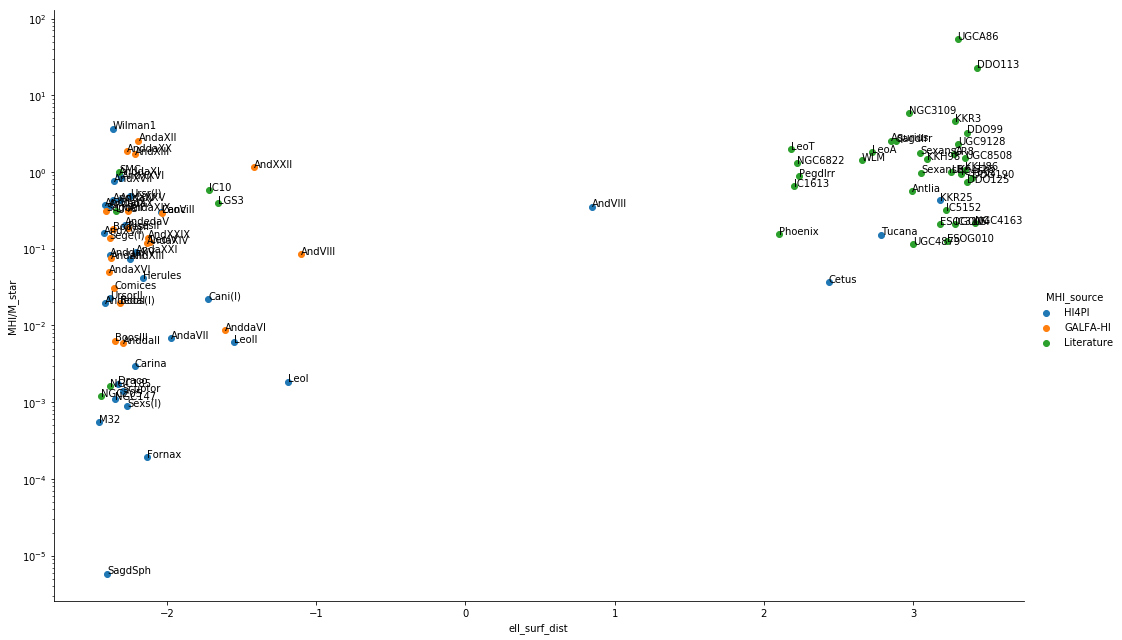

In [109]:
#ell_surf_dist, normalized with labels, ylog only scale
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")
fg.map(plt.scatter, 'ell_surf_dist', 'MHI/M_star').add_legend()
#print(gals_merged.count())
for i, txt in enumerate(gals_merged.GalaxyName):
    #print(i,gals_merged['GalaxyName'][i],txt)
    if((pd.notnull(gals_merged['ell_surf_dist'][i])) & (pd.notnull(gals_merged['MHI/M_star'][i]))):
            #print(i,txt,gals_merged['dist_kpc'][i],gals_merged['MHI_computed'][i],gals_merged['GalaxyName'][i])
            #label = txt[0:3]
            if (len(txt) > 7):
                label = txt[0:3]+txt[-4:]
            else:
                label = txt
            plt.annotate(label,(gals_merged['ell_surf_dist'].iat[i],gals_merged['MHI/M_star'].iat[i]))
plt.show()

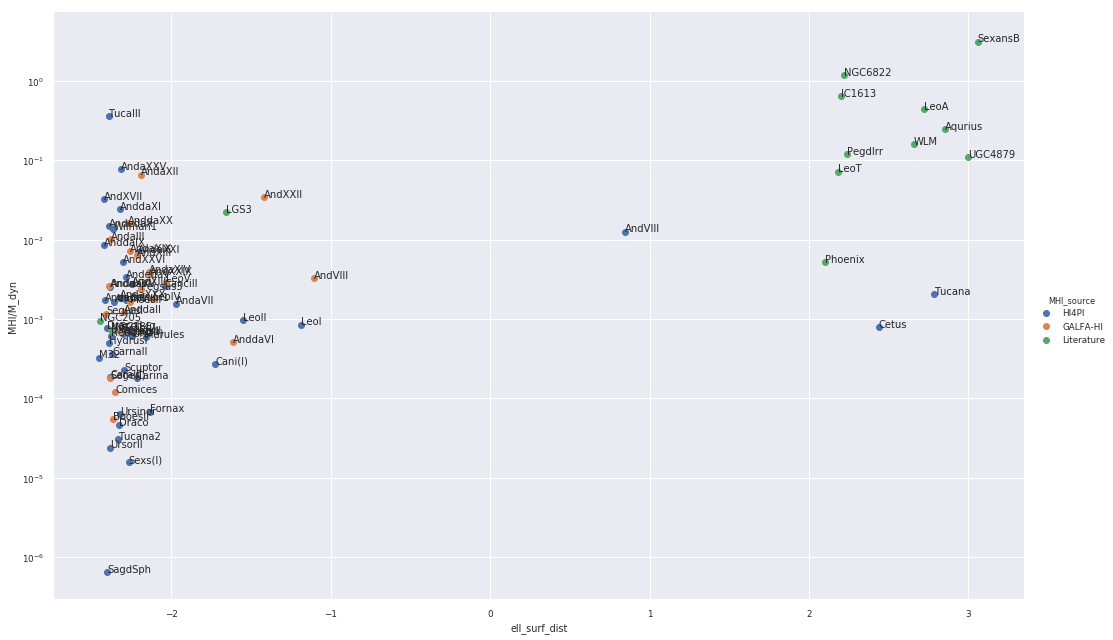

In [426]:
#MHI/M_dyn vs ell_surf_dist, normalized with labels, ylog only scale
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")
fg.map(plt.scatter, 'ell_surf_dist', 'MHI/M_dyn').add_legend()
#print(gals_merged.count())
for i, txt in enumerate(gals_merged.GalaxyName):
    #print(i,gals_merged['GalaxyName'][i],txt)
    if((pd.notnull(gals_merged['ell_surf_dist'][i])) & (pd.notnull(gals_merged['MHI/M_dyn'][i]))):
            #print(i,txt,gals_merged['dist_kpc'][i],gals_merged['MHI_computed'][i],gals_merged['GalaxyName'][i])
            #label = txt[0:3]
            if (len(txt) > 7):
                label = txt[0:3]+txt[-4:]
            else:
                label = txt
            plt.annotate(label,(gals_merged['ell_surf_dist'].iat[i],gals_merged['MHI/M_dyn'].iat[i]))
plt.show()

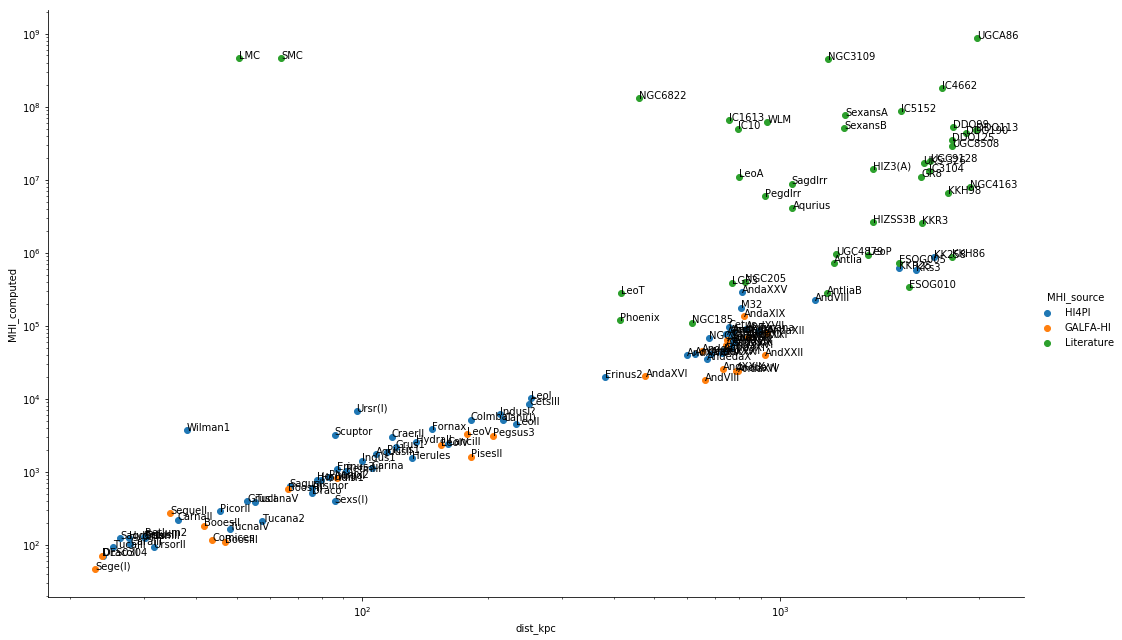

In [102]:
#log log with labels
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="log", yscale="log")
fg.map(plt.scatter, 'dist_kpc', 'MHI_computed').add_legend()
count = 0
for i, txt in enumerate(gals_merged.GalaxyName):
    if((pd.notnull(gals_merged['dist_kpc'][i])) & (pd.notnull(gals_merged['MHI_computed'][i]))):
            if (len(txt) > 7):
                label = txt[0:3]+txt[-4:]
                count = count + 1
            else:
                label = txt
                count = count + 1
            plt.annotate(label,(gals_merged.dist_kpc.iat[i],gals_merged.MHI_computed.iat[i]))
plt.show()

In [103]:
print(count)

136


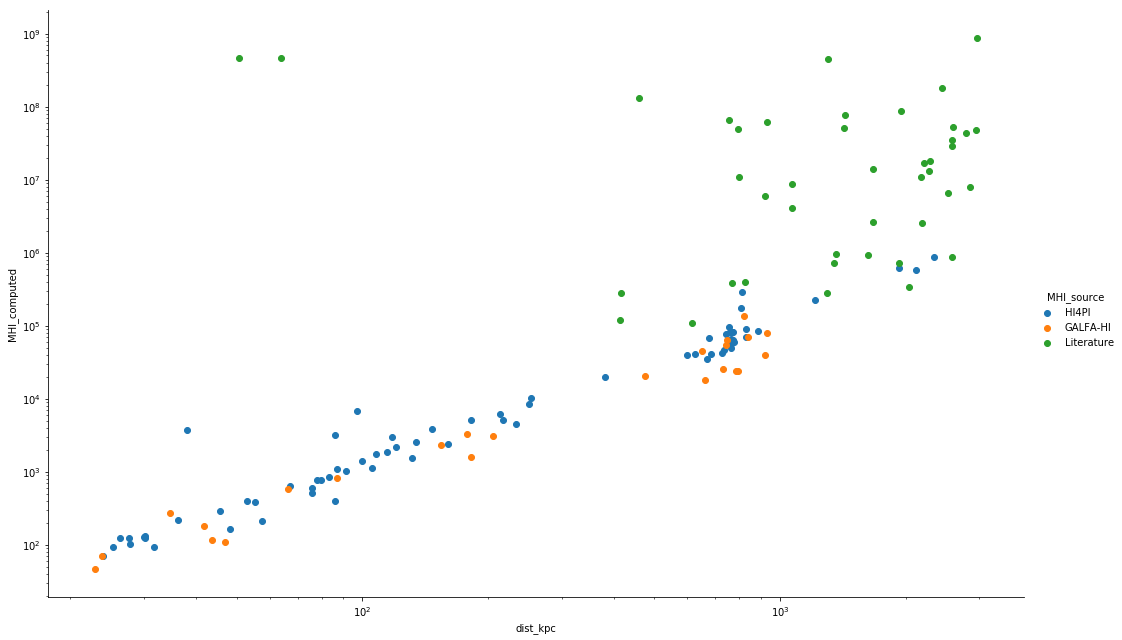

In [104]:
#log log without labels
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="log", yscale="log")
fg.map(plt.scatter, 'dist_kpc', 'MHI_computed').add_legend()
#for i, txt in enumerate(gals_merged.GalaxyName):
#    if((pd.notnull(gals_merged['dist_kpc'][i])) & (pd.notnull(gals_merged['MHI_computed'][i]))):
#            if (len(txt) > 7):
#                label = txt[0:3]+txt[-4:]
#            else:
#                label = txt
#            plt.annotate(label,(gals_merged.dist_kpc.iat[i],gals_merged.MHI_computed.iat[i]))
plt.show()


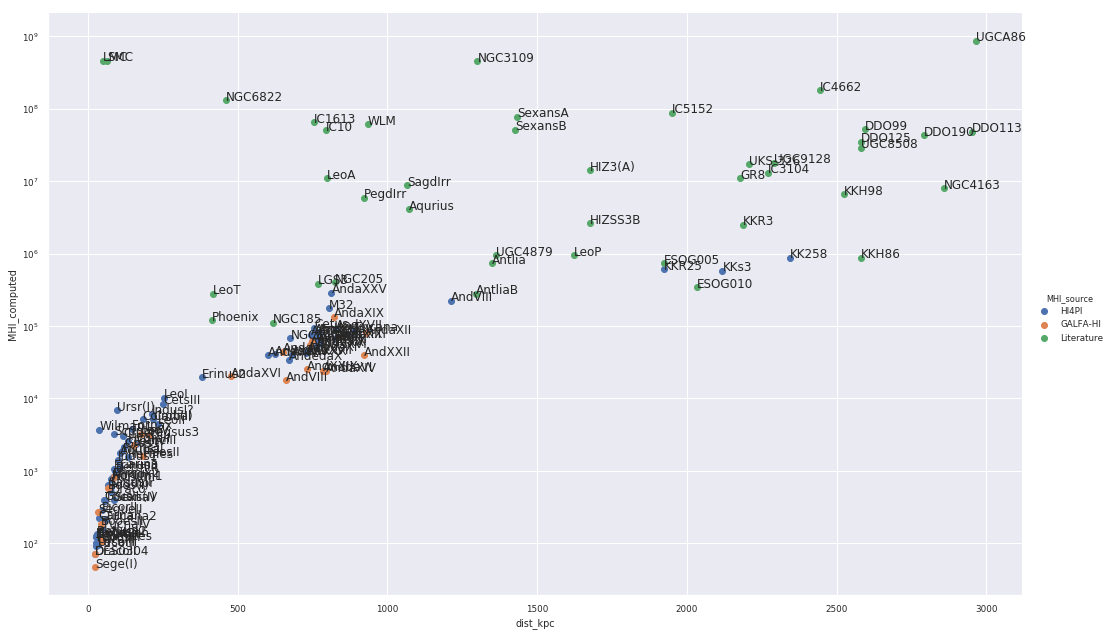

In [391]:
#linear log with labels
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")
fg.map(plt.scatter, 'dist_kpc', 'MHI_computed').add_legend()
for i, txt in enumerate(gals_merged.GalaxyName):
    if((pd.notnull(gals_merged['dist_kpc'][i])) & (pd.notnull(gals_merged['MHI_computed'][i]))):
            if (len(txt) > 7):
                label = txt[0:3]+txt[-4:]
            else:
                label = txt
            plt.annotate(label,(gals_merged.dist_kpc.iat[i],gals_merged.MHI_computed.iat[i]))
plt.show()

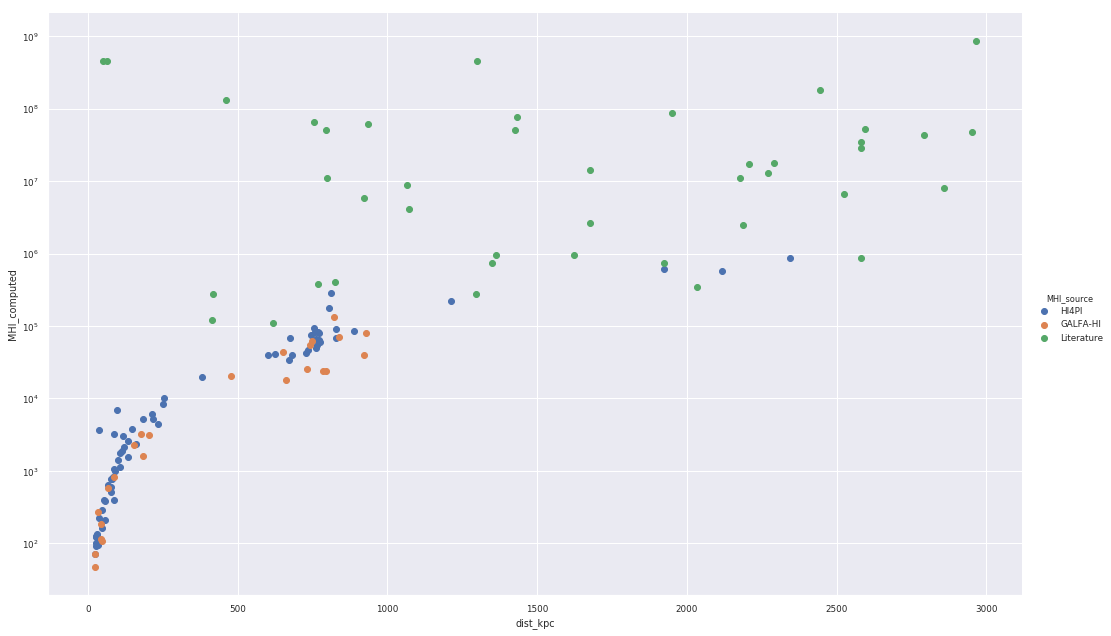

In [392]:
#linear log without labels
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")
fg.map(plt.scatter, 'dist_kpc', 'MHI_computed').add_legend()
plt.show()

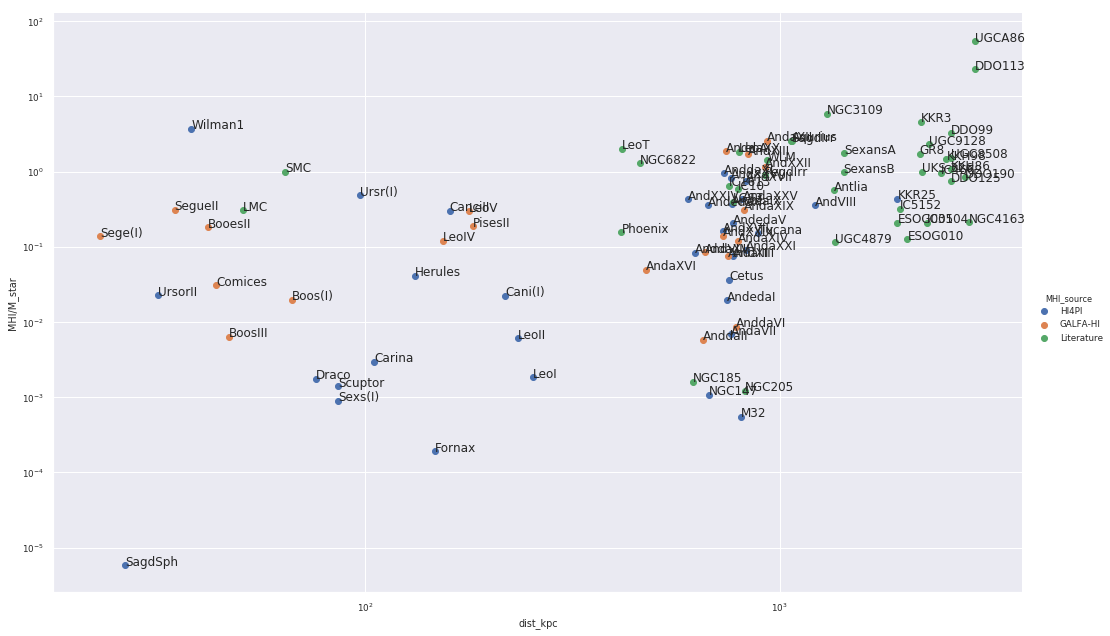

In [393]:
#normalized with labels, log-log scale
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="log", yscale="log")
fg.map(plt.scatter, 'dist_kpc', 'MHI/M_star').add_legend()
#print(gals_merged.count())
count = 0
for i, txt in enumerate(gals_merged.GalaxyName):
    #print(i,gals_merged['GalaxyName'][i],txt)
    if((pd.notnull(gals_merged['dist_kpc'][i])) & (pd.notnull(gals_merged['MHI/M_star'][i]))):
            count = count + 1
            #print(i,txt,gals_merged['dist_kpc'][i],gals_merged['MHI_computed'][i],gals_merged['GalaxyName'][i])
            #label = txt[0:3]
            if (len(txt) > 7):
                label = txt[0:3]+txt[-4:]
            else:
                label = txt
            plt.annotate(label,(gals_merged['dist_kpc'].iat[i],gals_merged['MHI/M_star'].iat[i]))
plt.show()

In [394]:
count

93

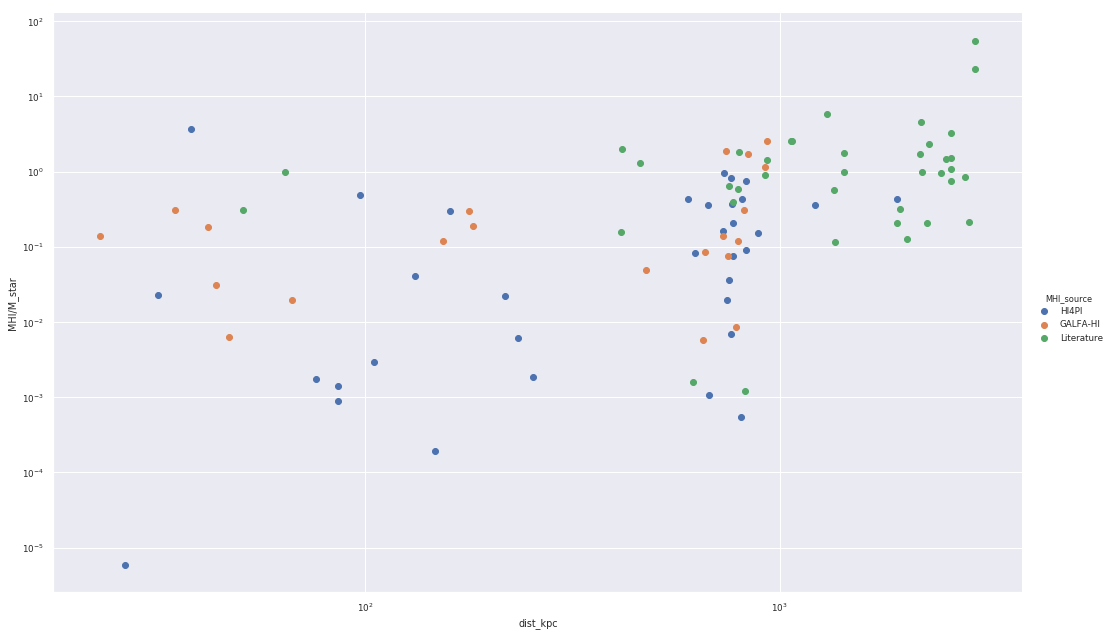

In [395]:
#normalized no labels, log-log scale
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="log", yscale="log")
fg.map(plt.scatter, 'dist_kpc', 'MHI/M_star').add_legend()
plt.show()

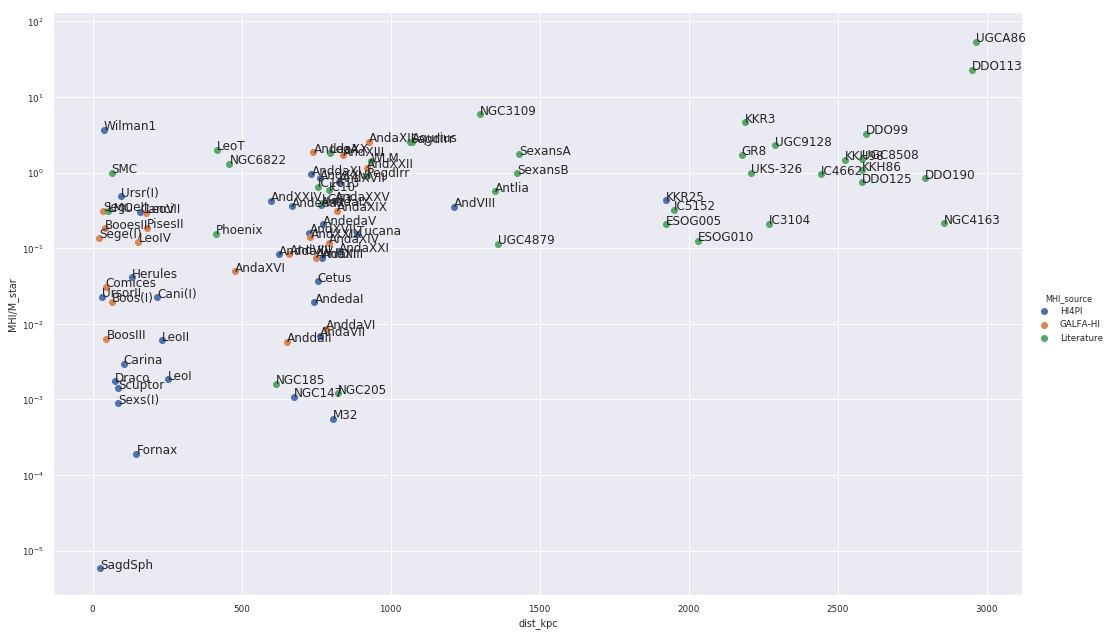

In [396]:
#normalized with labels, ylog only scale
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")
fg.map(plt.scatter, 'dist_kpc', 'MHI/M_star').add_legend()
#print(gals_merged.count())
for i, txt in enumerate(gals_merged.GalaxyName):
    #print(i,gals_merged['GalaxyName'][i],txt)
    if((pd.notnull(gals_merged['dist_kpc'][i])) & (pd.notnull(gals_merged['MHI/M_star'][i]))):
            #print(i,txt,gals_merged['dist_kpc'][i],gals_merged['MHI_computed'][i],gals_merged['GalaxyName'][i])
            #label = txt[0:3]
            if (len(txt) > 7):
                label = txt[0:3]+txt[-4:]
            else:
                label = txt
            plt.annotate(label,(gals_merged['dist_kpc'].iat[i],gals_merged['MHI/M_star'].iat[i]))
plt.show()

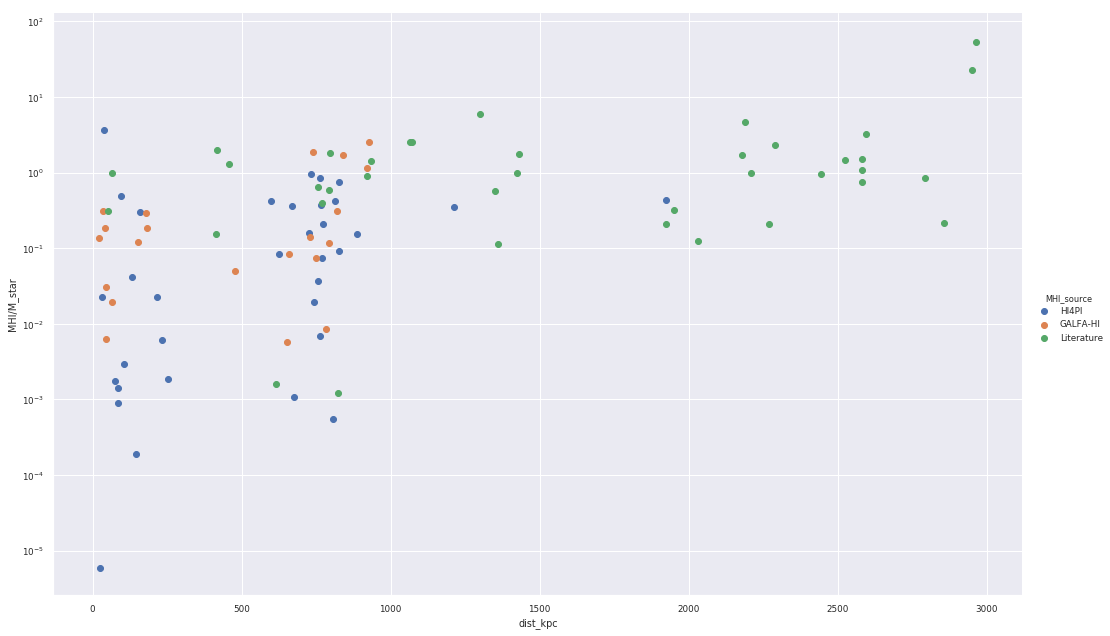

In [397]:
#normalized no labels, ylog only scale
fg = sb.FacetGrid(data=gals_merged, hue='MHI_source', height = 9,aspect=1.61)
fg.set(xscale="linear", yscale="log")
fg.map(plt.scatter, 'dist_kpc', 'MHI/M_star').add_legend()
plt.show()

# Correlations and predictions

In [428]:
gals_merged.columns

Index(['GalaxyName', 'RA_hr', 'RA_min', 'RA_sec', 'Dec_deg', 'Dec_arcmin',
       'Dec_arcsec', 'EB-V', 'm-M', 'm-M_err_pos',
       ...
       'MHI/M_V', 'L_V', 'MHI/L_V', 'r_ell', 'ell_surf_dist', 'mw_dist',
       'm31_dist', 'min_dist_mw_or_m31', 'Closer_MW_M31',
       'ell_surf_log10_abs'],
      dtype='object', length=101)

In [429]:
galaxies = gals_merged[['l','b','dist_pc','min_dist_mw_or_m31','orb_pericenter','orb_apocenter','orb_eccentricity','orb_period','rh(\')','M_V','ell_surf_dist','M_dyn','vsig_s','vrot_s','vsig_g','vrot_g','muVo','vh(km/s)','tau_90','V_GSR','V_LSR','V_LGSR','MHI_computed']]

In [430]:
spearman_matrix = galaxies.corr(method ='spearman') 

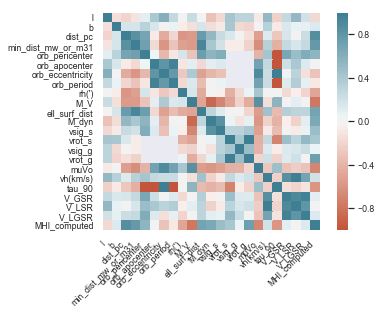

In [431]:
sb.set(font_scale=0.8) 
ax = sb.heatmap(
    spearman_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [432]:
test = gals_merged[(gals_merged['orb_pericenter'].notnull())]

In [433]:
test

GalaxyName  RA_hr  RA_min  RA_sec  Dec_deg  Dec_arcmin  Dec_arcsec  \
3        TucanaIII   23.0    56.0    36.0    -59.0        36.0         0.0   
4          DracoII   15.0    52.0    47.6     64.0        33.0        55.0   
8     TriangulumII    2.0    13.0    17.4     36.0        10.0        42.0   
9      UrsaMajorII    8.0    51.0    30.0     63.0         7.0        48.0   
10        BootesII   13.0    58.0     0.0     12.0        51.0         0.0   
12        Willman1   10.0    49.0    21.0     51.0         3.0         0.0   
13   ComaBerenices   12.0    26.0    59.0     23.0        54.0        15.0   
23           Draco   17.0    20.0    12.4     57.0        54.0        55.0   
39          Fornax    2.0    39.0    59.3    -34.0        26.0        57.0   
135        HydrusI    2.0    29.0    33.3    -79.0        18.0        32.0   
136       CarinaII    7.0    36.0    25.5    -57.0        59.0        57.0   
137      CarinaIII    7.0    38.0    31.1    -57.0        53.0        59.0   

      EB-V    m-M  m-M_err_pos  ...      MHI/M_V           L_V   MHI/L_V  \
3    9.999  17.01         0.16  ...   -38.129106  7.870458e+02  0.116755   
4    0.016  16.90         0.30  ...   -24.345505  1.235947e+03  0.057124   
8    0.081  17.40         0.10  ...   -67.440162  4.487454e+02  0.270515   
9    0.094  17.50         0.30  ...   -22.279074  4.092607e+03  0.022864   
10   0.031  18.10         0.06  ...   -67.452752  1.028016e+03  0.177159   
12   0.014  17.90         0.40  ... -1364.495144  1.028016e+03  3.583734   
13   0.017  18.20         0.20  ...   -27.780454  3.732502e+03  0.030516   
23   0.027  19.40         0.17  ...   -57.606784  2.831392e+05  0.001790   
39   0.021  20.84         0.18  ...  -283.901903  2.032357e+07  0.000188   
135    NaN  17.20         0.04  ...   -26.340519  6.546362e+03  0.018952   
136    NaN  17.79         0.05  ...   -48.910004  5.395106e+03  0.040795   
137    NaN  17.22         0.10  ...   -42.169043  7.798301e+02  0.129779   

          r_ell  ell_surf_dist     mw_dist    m31_dist  min_dist_mw_or_m31  \
3    456.647539      -2.393974   23.286454  783.832686           23.286454   
4    442.994682      -2.400852   26.199691  770.261603           26.199691   
8    421.243003      -2.419506   36.562203  750.391227           36.562203   
9    444.338863      -2.383500   37.927012  766.660880           37.927012   
10   479.977801      -2.365302   39.481059  802.559758           39.481059   
12   458.443729      -2.364719   42.850897  776.230498           42.850897   
13   480.109405      -2.353256   44.859188  798.242970           44.859188   
23   454.592063      -2.329944   75.879649  750.449378           75.879649   
39   579.724126      -2.132038  149.403811  766.060283          149.403811   
135  466.388860      -2.388945   25.729597  793.538643           25.729597   
136  478.917405      -2.369883   37.341072  802.764679           37.341072   
137  470.879577      -2.383588   29.235509  797.307161           29.235509   

     Closer_MW_M31  ell_surf_log10_abs  
3               MW                 NaN  
4               MW                 NaN  
8               MW                 NaN  
9               MW                 NaN  
10              MW                 NaN  
12              MW                 NaN  
13              MW                 NaN  
23              MW                 NaN  
39              MW                 NaN  
135             MW                 NaN  
136             MW                 NaN  
137             MW                 NaN  

[12 rows x 101 columns]

We use spearman correlation rather than Pearson correlation due to non-gaussian distributions. Many of the correlations will be due to known physical relationships, while others will be due to selection effects. Beyond these we may hope to also find real correlations which have not been fully explored and to determine their robustness and their physical origin. We can then use this understanding to predict values in either future observations or simulations, which will have a different set of systematic errors.

# Pair Plots

In [434]:
#Cleaning outliers, but should look into why they are here
gals_merged.loc[gals_merged['GalaxyName'] == 'HIZSS3(A)', 'M_V'] = np.nan
gals_merged.loc[gals_merged['GalaxyName'] == 'HIZSS3B', 'M_V'] = np.nan

#well, we know why this one is this, but I'm taking it out
gals_merged.loc[gals_merged['GalaxyName'] == 'SagittariusSph', 'rh(\')'] = np.nan

In [435]:
#Pare down to intrinsic properties without obvious dependencies (in most cases)
galaxies = gals_merged[['dist_pc','min_dist_mw_or_m31','orb_pericenter','orb_apocenter','orb_eccentricity','orb_period','rh(\')','M_V','ell_surf_dist','M_dyn','vsig_s','vrot_s','vsig_g','vrot_g','muVo','vh(km/s)','tau_90','MHI_computed']]

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


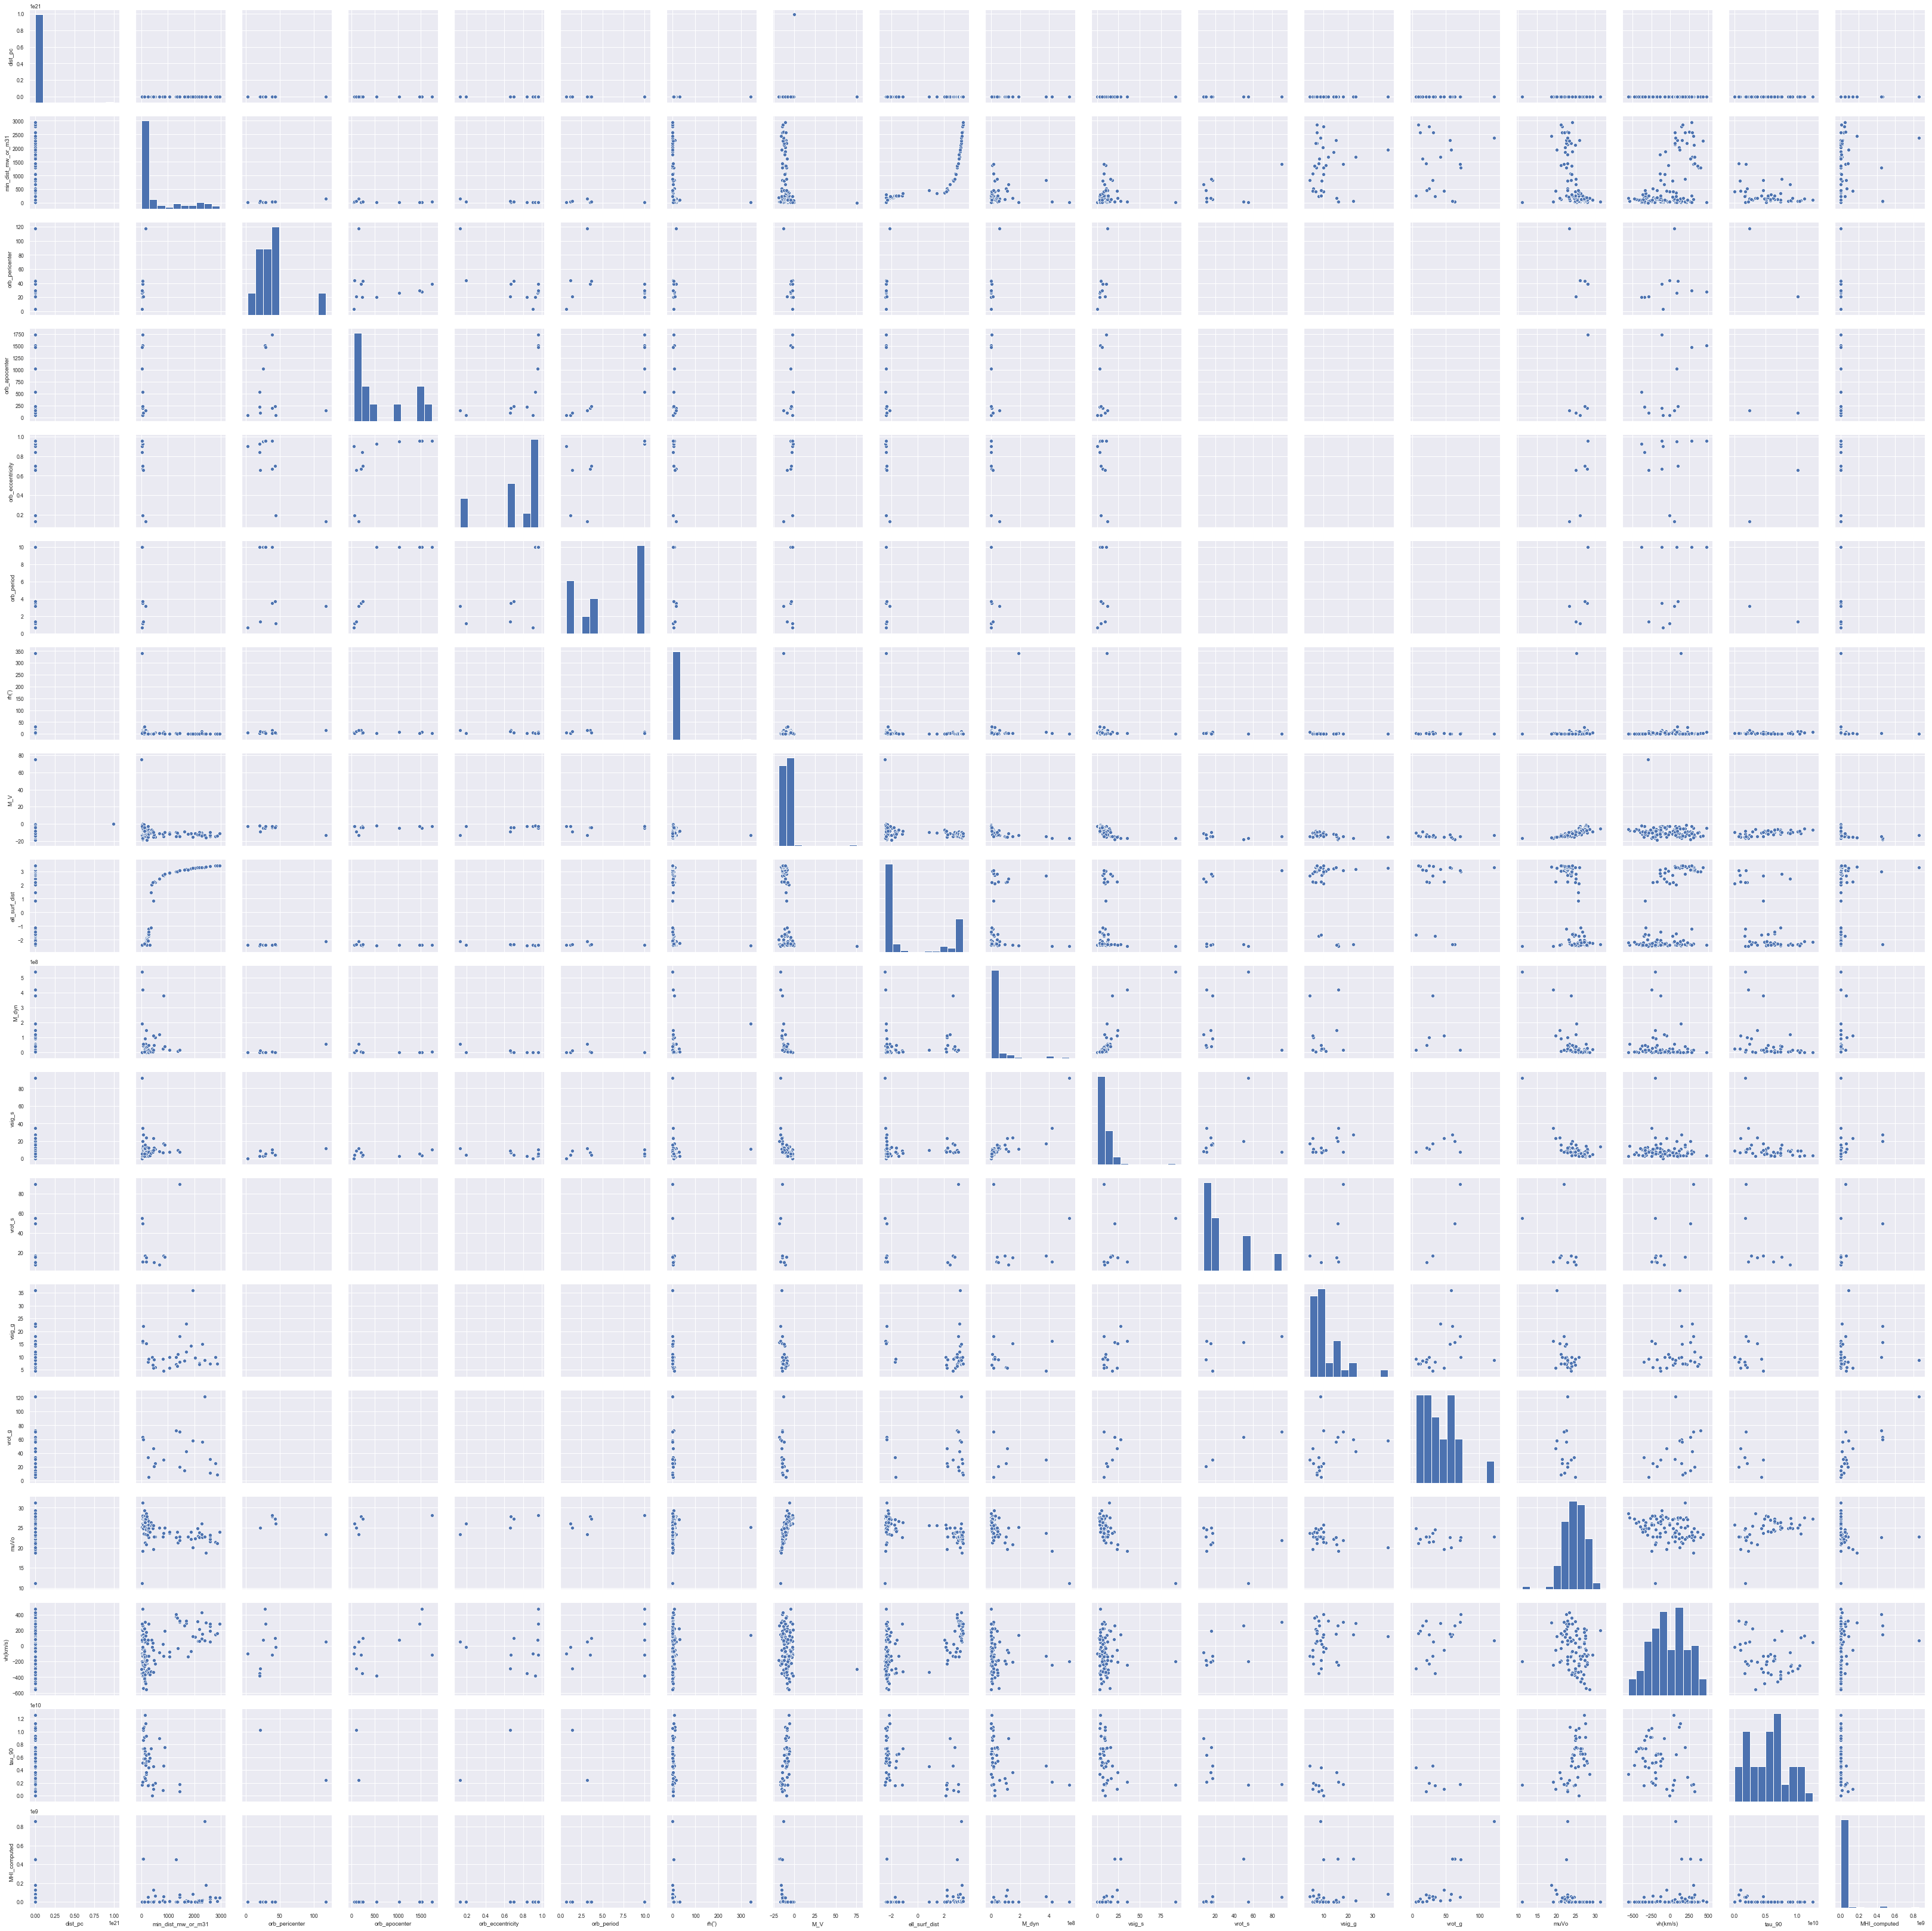

In [436]:
sb.pairplot(galaxies)

In [618]:
gals_merged

GalaxyName  RA_hr  RA_min  RA_sec  Dec_deg  Dec_arcmin  Dec_arcsec  \
0         #TheGalaxy   17.0    45.0    40.0    -29.0         0.0        28.0   
1       #*CanisMajor    7.0    12.0    35.0    -27.0        40.0         0.0   
2    SagittariusdSph   18.0    55.0    19.5    -30.0        32.0        43.0   
3          TucanaIII   23.0    56.0    36.0    -59.0        36.0         0.0   
4            DracoII   15.0    52.0    47.6     64.0        33.0        55.0   
5           Segue(I)   10.0     7.0     4.0     16.0         4.0        55.0   
6         Reticulum2    3.0    35.0    42.1    -54.0         2.0        57.0   
7            CetusII    1.0    17.0    52.8    -17.0        25.0        12.0   
8       TriangulumII    2.0    13.0    17.4     36.0        10.0        42.0   
9        UrsaMajorII    8.0    51.0    30.0     63.0         7.0        48.0   
10          BootesII   13.0    58.0     0.0     12.0        51.0         0.0   
11           SegueII    2.0    19.0    16.0     20.0        10.0        31.0   
12          Willman1   10.0    49.0    21.0     51.0         3.0         0.0   
13     ComaBerenices   12.0    26.0    59.0     23.0        54.0        15.0   
14          TucanaIV    0.0     2.0    55.2    -60.0        51.0         0.0   
15         BootesIII   13.0    57.0    12.0     26.0        48.0         0.0   
16            GrusII   22.0     4.0     4.8    -46.0        26.0        24.0   
17               LMC    5.0    23.0    34.5    -69.0        45.0        22.0   
18           TucanaV   23.0    37.0    24.0    -63.0        16.0        12.0   
19           Tucana2   22.0    51.0    55.1    -58.0        34.0         8.0   
20     SagittariusII   19.0    52.0    40.5    -22.0         4.0         5.0   
21               SMC    0.0    52.0    44.8    -72.0        49.0        43.0   
22         Bootes(I)   14.0     0.0     6.0     14.0        30.0         0.0   
23             Draco   17.0    20.0    12.4     57.0        54.0        55.0   
24         UrsaMinor   15.0     9.0     8.5     67.0        13.0        21.0   
25      HorologiumII    3.0    16.0    32.1    -50.0         1.0         5.0   
26       Horologium1    2.0    55.0    31.7    -54.0         7.0         8.0   
27         Eridanus3    2.0    22.0    45.5    -52.0        17.0         1.0   
28          Phoenix2   23.0    39.0    59.4    -54.0        24.0        22.0   
29          Sculptor    1.0     0.0     9.4    -33.0        42.0        33.0   
..               ...    ...     ...     ...      ...         ...         ...   
110      ESO410-G005    0.0    15.0    31.6    -32.0        10.0        48.0   
111            KKR25   16.0    13.0    48.0     54.0        22.0        16.0   
112      ESO294-G010    0.0    26.0    33.4    -41.0        51.0        19.0   
113           IC5152   22.0     2.0    41.5    -51.0        17.0        47.0   
114            KKH98   23.0    45.0    34.0     38.0        43.0         4.0   
115      UKS2323-326   23.0    26.0    27.5    -32.0        23.0        20.0   
116            KK258   22.0    40.0    43.9    -30.0        47.0        59.0   
117             KKR3   14.0     7.0    10.5     35.0         3.0        37.0   
118             KKs3    2.0    24.0    44.4    -73.0        30.0        51.0   
119              GR8   12.0    58.0    40.4     14.0        13.0         3.0   
120          UGC9128   14.0    15.0    56.5     23.0         3.0        19.0   
121          UGC8508   13.0    30.0    44.4     54.0        54.0        36.0   
122           IC3104   12.0    18.0    46.0    -79.0        43.0        34.0   
123           DDO125   12.0    27.0    40.9     43.0        29.0        44.0   
124           UGCA86    3.0    59.0    48.3     67.0         8.0        19.0   
125            DDO99   11.0    50.0    53.0     38.0        52.0        49.0   
126           IC4662   17.0    47.0     8.8    -64.0        38.0        30.0   
127           DDO190   14.0    24.0    43.4     44.0        31.0        33.0   
128       

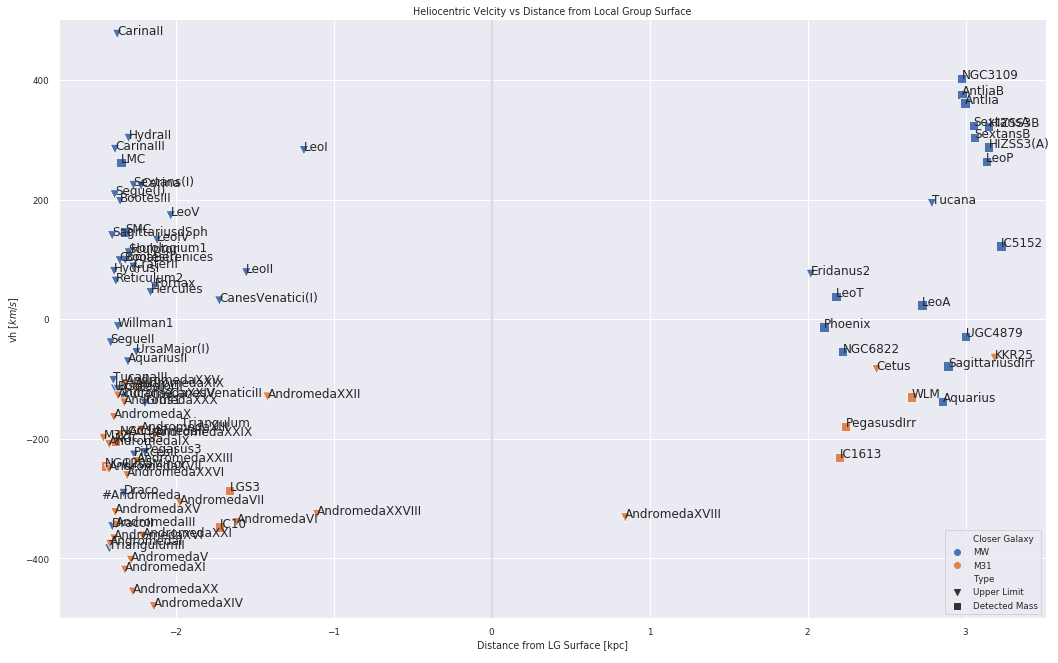

In [437]:
#vh (kms) vs D_LG


font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

plot_df = gals_merged[gals_merged['mw_dist'] < 2000]
plot_df = plot_df[plot_df['vh(km/s)'].notnull()]
plot_df.reset_index(drop=True, inplace=True)
label=[]

LG_model = 'ell_surf_dist'

plot_df.rename(columns = {'Closer_MW_M31':'Closer Galaxy'}, inplace = True)
plot_df.rename(columns = {'MHI_type':'Type'}, inplace = True)

plot_df.replace({'detected_mass': 'Detected Mass', 'upper_limit': 'Upper Limit'},inplace=True)

fg = sb.FacetGrid(data=plot_df, hue='MHI_source', height=9,aspect=1.61)
fg.set(xscale="linear", yscale="linear")

#fg.map(plt.scatter, 'min_dist_mw_or_m31', 'MHI_computed').add_legend()
fg = sb.scatterplot(x=plot_df[LG_model], y=plot_df['vh(km/s)'],hue=plot_df['Closer Galaxy'],style=plot_df['Type'],markers={"Detected Mass": "s", "Upper Limit": "v"},s=90)
#print(gals_merged.count())
count = 0
for i, txt in enumerate(plot_df.GalaxyName):
    label = plot_df["GalaxyName"].iat[i]
    label_x = plot_df[LG_model].iat[i]
    label_y = plot_df['vh(km/s)'].iat[i]
    plt.annotate(label,(label_x,label_y))

plt.ylim(-500,500)
#plt.axvline(250,color='steelblue')
#plt.axvline(300,color='darkorange')

plt.axvline(0,color='lightgray')

plt.title("Heliocentric Velcity vs Distance from Local Group Surface")
plt.ylabel("vh [$km/s$]")
plt.xlabel("Distance from LG Surface [kpc]")
plt.show()

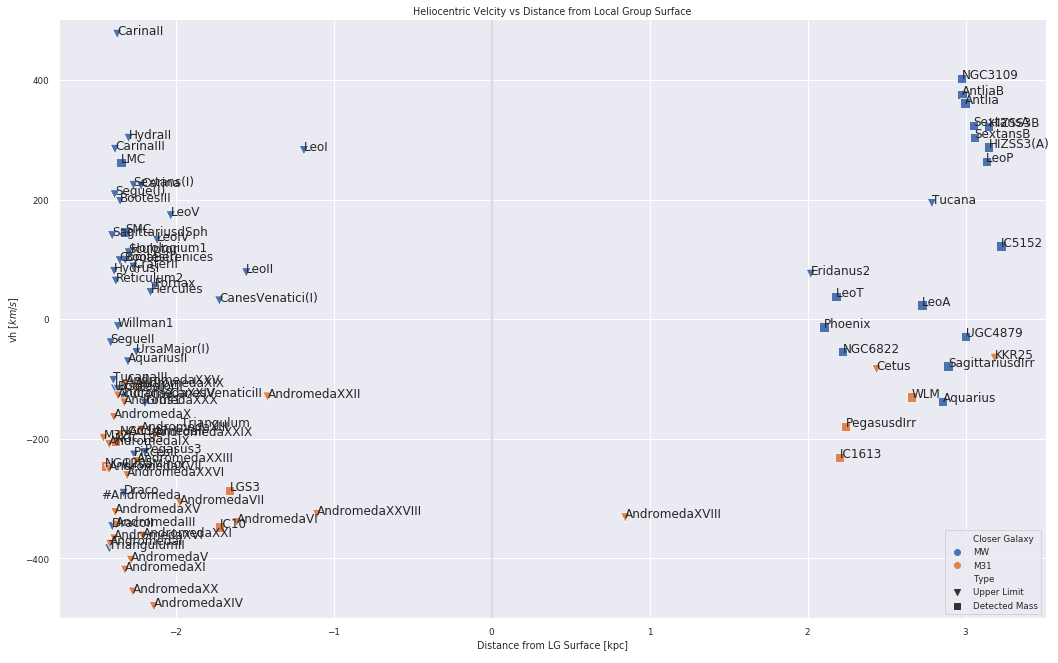

In [438]:
#vh (kms) vs D_LG


font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

plot_df = gals_merged[gals_merged['mw_dist'] < 2000]
plot_df = plot_df[plot_df['vh(km/s)'].notnull()]
plot_df.reset_index(drop=True, inplace=True)
label=[]

LG_model = 'ell_surf_dist'

plot_df.rename(columns = {'Closer_MW_M31':'Closer Galaxy'}, inplace = True)
plot_df.rename(columns = {'MHI_type':'Type'}, inplace = True)

plot_df.replace({'detected_mass': 'Detected Mass', 'upper_limit': 'Upper Limit'},inplace=True)

fg = sb.FacetGrid(data=plot_df, hue='MHI_source', height=9,aspect=1.61)
fg.set(xscale="linear", yscale="linear")

#fg.map(plt.scatter, 'min_dist_mw_or_m31', 'MHI_computed').add_legend()
fg = sb.scatterplot(x=plot_df[LG_model], y=plot_df['vh(km/s)'],hue=plot_df['Closer Galaxy'],style=plot_df['Type'],markers={"Detected Mass": "s", "Upper Limit": "v"},s=90)
#print(gals_merged.count())
count = 0
for i, txt in enumerate(plot_df.GalaxyName):
    label = plot_df["GalaxyName"].iat[i]
    label_x = plot_df[LG_model].iat[i]
    label_y = plot_df['vh(km/s)'].iat[i]
    plt.annotate(label,(label_x,label_y))

plt.ylim(-500,500)
#plt.axvline(250,color='steelblue')
#plt.axvline(300,color='darkorange')

plt.axvline(0,color='lightgray')

plt.title("Heliocentric Velcity vs Distance from Local Group Surface")
plt.ylabel("vh [$km/s$]")
plt.xlabel("Distance from LG Surface [kpc]")
plt.show()

In [439]:
gals_merged.columns

Index(['GalaxyName', 'RA_hr', 'RA_min', 'RA_sec', 'Dec_deg', 'Dec_arcmin',
       'Dec_arcsec', 'EB-V', 'm-M', 'm-M_err_pos',
       ...
       'MHI/M_V', 'L_V', 'MHI/L_V', 'r_ell', 'ell_surf_dist', 'mw_dist',
       'm31_dist', 'min_dist_mw_or_m31', 'Closer_MW_M31',
       'ell_surf_log10_abs'],
      dtype='object', length=101)

# Velocity Plots

Text(0.5, 0, '$v_{h}$ [$km/s$]')

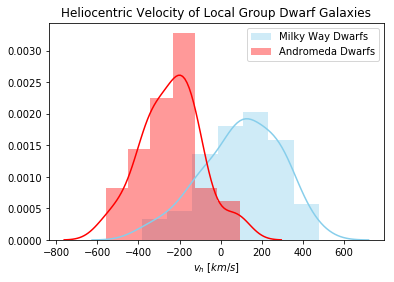

In [110]:
df = gals_merged[gals_merged['vh(km/s)'].notnull()]
 
sb.distplot(df[df['Closer_MW_M31'] == 'MW']['vh(km/s)'] , color="skyblue", label="Milky Way Dwarfs")
sb.distplot(df[df['Closer_MW_M31'] == 'M31']['vh(km/s)'], color="red", label="Andromeda Dwarfs")
plt.legend()
plt.title('Heliocentric Velocity of Local Group Dwarf Galaxies')
plt.xlabel("$v_{h}$ [$km/s$]")


In [111]:
gals_merged.columns

Index(['GalaxyName', 'RA_hr', 'RA_min', 'RA_sec', 'Dec_deg', 'Dec_arcmin',
       'Dec_arcsec', 'EB-V', 'm-M', 'm-M_err_pos',
       ...
       'MHI/M_V', 'L_V', 'MHI/L_V', 'r_ell', 'ell_surf_dist', 'mw_dist',
       'm31_dist', 'min_dist_mw_or_m31', 'Closer_MW_M31',
       'ell_surf_log10_abs'],
      dtype='object', length=117)

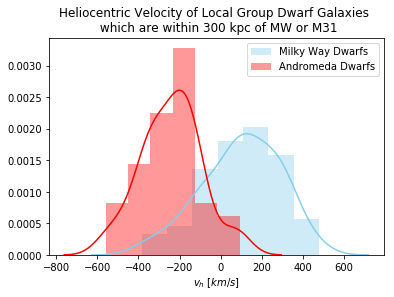

In [112]:
df = gals_merged[gals_merged['vh(km/s)'].notnull()]
#df = df[df['min_dist_mw_or_m31'] < 300]

sb.distplot(df[df['Closer_MW_M31'] == 'MW']['vh(km/s)'] , color="skyblue", label="Milky Way Dwarfs")
sb.distplot(df[df['Closer_MW_M31'] == 'M31']['vh(km/s)'], color="red", label="Andromeda Dwarfs")
plt.title('Heliocentric Velocity of Local Group Dwarf Galaxies \n which are within 300 kpc of MW or M31')
plt.xlabel("$v_{h}$ [$km/s$]")
plt.legend()

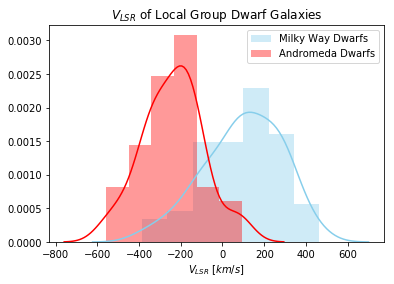

In [113]:
df = gals_merged[gals_merged['V_LSR'].notnull()]
#df = df[df['min_dist_mw_or_m31'] < 500]
df = gals_merged[gals_merged['vh(km/s)'].notnull()]


 
sb.distplot(df[df['Closer_MW_M31'] == 'MW']['V_LSR'] , color="skyblue", label="Milky Way Dwarfs")
sb.distplot(df[df['Closer_MW_M31'] == 'M31']['V_LSR'], color="red", label="Andromeda Dwarfs")
plt.legend()
plt.title('$V_{LSR}$ of Local Group Dwarf Galaxies')
plt.xlabel("$V_{LSR}$ [$km/s$]")
plt.legend()

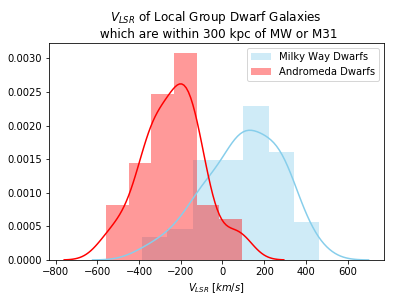

In [115]:
#df = gals_merged[gals_merged['V_LSR'].notnull()]
#df = df[df['min_dist_mw_or_m31'] < 500]
df = gals_merged[gals_merged['vh(km/s)'].notnull()]
#df = df[df['min_dist_mw_or_m31'] < 300]

 
sb.distplot(df[df['Closer_MW_M31'] == 'MW']['V_LSR'] , color="skyblue", label="Milky Way Dwarfs")
sb.distplot(df[df['Closer_MW_M31'] == 'M31']['V_LSR'], color="red", label="Andromeda Dwarfs")
plt.legend()
plt.title('$V_{LSR}$ of Local Group Dwarf Galaxies \n which are within 300 kpc of MW or M31')
plt.xlabel("$V_{LSR}$ [$km/s$]")
plt.legend()

Text(0.5, 0, '$V_{GSR}$ [$km/s$]')

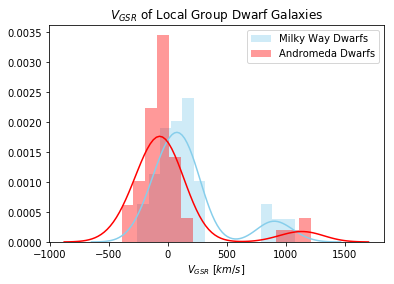

In [116]:
df = gals_merged[gals_merged['V_GSR'].notnull()]
#df = df[df['min_dist_mw_or_m31'] < 500]

 
sb.distplot(df[df['Closer_MW_M31'] == 'MW']['V_GSR'] , color="skyblue", label="Milky Way Dwarfs")
sb.distplot(df[df['Closer_MW_M31'] == 'M31']['V_GSR'], color="red", label="Andromeda Dwarfs")
plt.legend()
plt.title('$V_{GSR}$ of Local Group Dwarf Galaxies')
plt.xlabel("$V_{GSR}$ [$km/s$]")

Text(0.5, 0, '$V_{GSR}$ [$km/s$]')

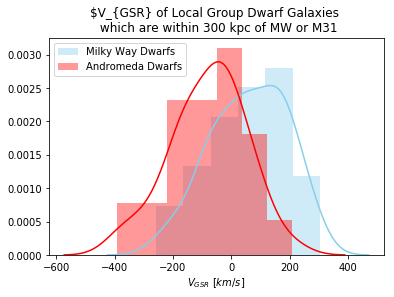

In [117]:
#df = gals_merged[gals_merged['V_GSR'].notnull()]
#df = df[df['min_dist_mw_or_m31'] < 300]
df = gals_merged[gals_merged['vh(km/s)'].notnull()]

 
sb.distplot(df[df['Closer_MW_M31'] == 'MW']['V_GSR'] , color="skyblue", label="Milky Way Dwarfs")
sb.distplot(df[df['Closer_MW_M31'] == 'M31']['V_GSR'], color="red", label="Andromeda Dwarfs")
plt.legend()
plt.title('$V_{GSR} of Local Group Dwarf Galaxies \n which are within 300 kpc of MW or M31')
plt.xlabel("$V_{GSR}$ [$km/s$]")

Text(0.5, 0, '$V_{LGSR}$ [$km/s$]')

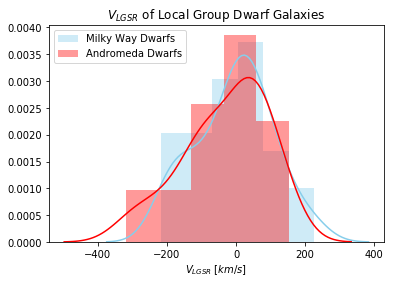

In [118]:
df = gals_merged[gals_merged['V_LGSR'].notnull()]
df = df[df['min_dist_mw_or_m31'] < 300]
df = df[df['vh(km/s)'].notnull()]

sb.distplot(df[df['Closer_MW_M31'] == 'MW']['V_LGSR'] , color="skyblue", label="Milky Way Dwarfs")
sb.distplot(df[df['Closer_MW_M31'] == 'M31']['V_LGSR'], color="red", label="Andromeda Dwarfs")
plt.legend()
plt.title('$V_{LGSR}$ of Local Group Dwarf Galaxies')
plt.xlabel("$V_{LGSR}$ [$km/s$]")

In [119]:
list(df.columns)

['GalaxyName',
 'RA_hr',
 'RA_min',
 'RA_sec',
 'Dec_deg',
 'Dec_arcmin',
 'Dec_arcsec',
 'EB-V',
 'm-M',
 'm-M_err_pos',
 'm-M_err_neg',
 'vh(km/s)',
 'Vmag',
 'Vmag_err_pos',
 'Vmag_err_neg',
 'PA',
 'e=1-b/a',
 'muVo',
 "rh(')",
 'rh_err_pos',
 'rh_err_neg',
 'vsig_s',
 'vsig_err_pos',
 'vsig_err_neg',
 'vrot_s',
 'vrot_s_err_pos',
 'vrot_s_err_neg',
 'MHI',
 'Data',
 'Key',
 'vsig_g',
 'vsig_g_err_pos',
 'vsig_g_err_neg',
 'vrot_g',
 'note',
 'M-m',
 'Notes',
 'ra',
 'dec',
 'vsig_s_upper_limit',
 'orb_pericenter',
 'orb_apocenter',
 'orb_eccentricity',
 'orb_period',
 'orb_period_type',
 'tau_50',
 'tau_90',
 'dist_pc',
 'dist_kpc',
 'dist_mpc',
 'MHI_computed',
 'MHI_source',
 'MHI_type',
 '1sigma',
 'rh_subtable',
 'MHI_method',
 'npix',
 'GUU',
 'GRU',
 'HUU',
 'HRU',
 'GNV',
 'HNV',
 'LIT',
 '1sigma_GUU',
 '1sigma_GRU',
 '1sigma_HUU',
 '1sigma_HRU',
 '1sigma_GNV',
 '1sigma_HNV',
 'M_star',
 'M_dyn_r_h',
 'm-M_err',
 'Vmag_err',
 'vsig_err',
 'MHI_mcconnachie',
 'vsig_g_err',
 

No handles with labels found to put in legend.


Text(0.5, 0, '$W_{50}$')

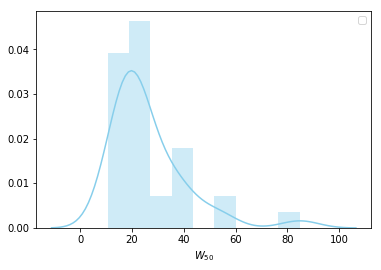

In [120]:
df = gals_merged[gals_merged['vsig_g'].notnull()]
#df = df[df['min_dist_mw_or_m31'] < 300]
#df = df[df['vh(km/s)'].notnull()]
#print(gals_355merged[gals_merged['vsig_g'].notnull()].count())
sb.distplot(2.355*df['vsig_g'] , color="skyblue")
#sb.distplot(df[df['Closer_MW_M31'] == 'M31']['V_LGSR'], color="red", label="Andromeda Dwarfs")
plt.legend()
plt.xlabel('$W_{50}$')

Text(0.5, 0, '$V_{LGSR}$ [$km/s$]')

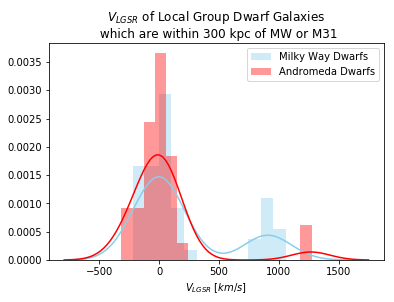

In [121]:
df = gals_merged[gals_merged['V_LGSR'].notnull()]
df = df[df['min_dist_mw_or_m31'] < 300]

 
sb.distplot(df[df['Closer_MW_M31'] == 'MW']['V_LGSR'] , color="skyblue", label="Milky Way Dwarfs")
sb.distplot(df[df['Closer_MW_M31'] == 'M31']['V_LGSR'], color="red", label="Andromeda Dwarfs")
plt.legend()
plt.title('$V_{LGSR}$ of Local Group Dwarf Galaxies\n which are within 300 kpc of MW or M31')
plt.xlabel("$V_{LGSR}$ [$km/s$]")

In [122]:
import scipy.stats
mw_lgsr = gals_merged[gals_merged['Closer_MW_M31'] == 'MW']['V_LGSR']
m31_lgsr = gals_merged[gals_merged['Closer_MW_M31'] == 'M31']['V_LGSR']
ad = scipy.stats.anderson_ksamp([mw_lgsr,m31_lgsr])
ad

Anderson_ksampResult(statistic=4.615060548225099, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.004780550182839681)

2-sample Anderson Darling test puts confidence on two samples being drawn from the same distribution (whose underlying distributions need not be normal). In this case the statistic is 4.225, which is between the 5% and 2.5% level. We can reject the null hypothesis that they are drawn from the same distribution at ~95% confidence

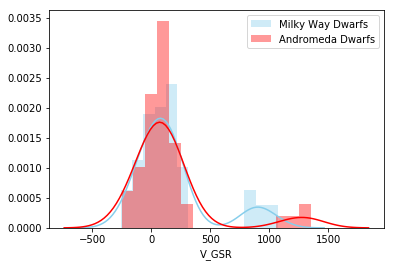

In [126]:
df = gals_merged[gals_merged['V_GSR'].notnull()]
 
sb.distplot(df[df['Closer_MW_M31'] == 'MW']['V_GSR'] , color="skyblue", label="Milky Way Dwarfs")
sb.distplot(df[df['Closer_MW_M31'] == 'M31']['V_GSR']+140, color="red", label="Andromeda Dwarfs")
plt.legend()

# SFH Plots

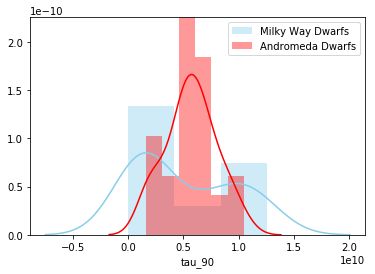

In [127]:
df = gals_merged[gals_merged['tau_90'].notnull()]

sb.distplot(df[df['Closer_MW_M31'] == 'MW']['tau_90'] , color="skyblue", label="Milky Way Dwarfs")
sb.distplot(df[df['Closer_MW_M31'] == 'M31']['tau_90'], color="red", label="Andromeda Dwarfs")
plt.legend()

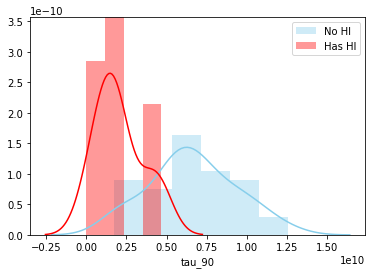

In [128]:
df = gals_merged[gals_merged['MHI_type'].notnull()]
df = gals_merged[gals_merged['tau_90'].notnull()]


sb.distplot(df[df['MHI_type'] == 'upper_limit']['tau_90'] , color="skyblue", label="No HI")
sb.distplot(df[df['MHI_type'] == 'detected_mass']['tau_90'], color="red", label="Has HI")
plt.legend()

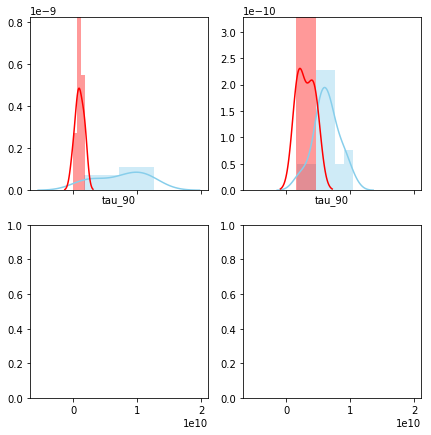

In [129]:
# plot
df = gals_merged[gals_merged['MHI_type'].notnull()]
df = gals_merged[gals_merged['tau_90'].notnull()]
mw = df[df['Closer_MW_M31'] == 'MW']
m31 = df[df['Closer_MW_M31'] == 'M31']

f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sb.distplot(mw[mw['MHI_type'] == 'upper_limit']['tau_90'] , color="skyblue", label="No HI",ax=axes[0, 0])
sb.distplot(mw[mw['MHI_type'] == 'detected_mass']['tau_90'] , color="red", label="Has HI",ax=axes[0, 0])
sb.distplot(m31[m31['MHI_type'] == 'upper_limit']['tau_90'] , color="skyblue", label="No HI",ax=axes[0, 1])
sb.distplot(m31[m31['MHI_type'] == 'detected_mass']['tau_90'] , color="red", label="Has HI",ax=axes[0, 1])


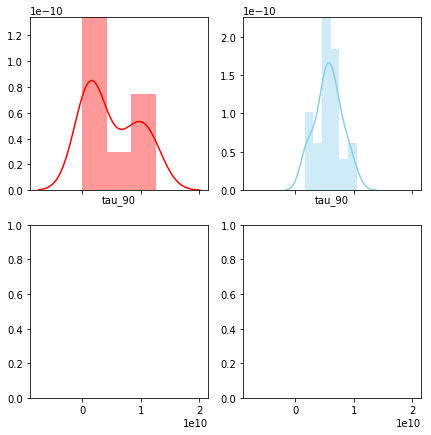

In [130]:
# plot
df = gals_merged[gals_merged['tau_90'].notnull()]
mw = df[df['Closer_MW_M31'] == 'MW']
m31 = df[df['Closer_MW_M31'] == 'M31']

f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sb.distplot(mw['tau_90'] , color="red",ax=axes[0, 0])
sb.distplot(m31['tau_90'] , color="skyblue",ax=axes[0, 1])

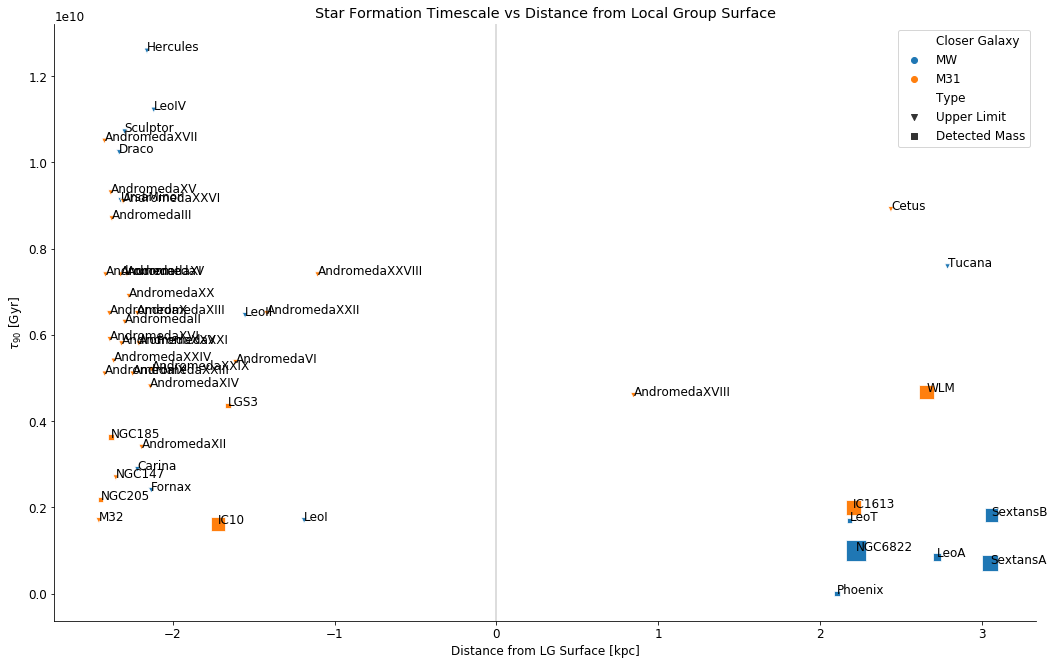

In [131]:
#SFH vs D_LG

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

plot_df = gals_merged[gals_merged['mw_dist'] < 2000]
plot_df = plot_df[plot_df['tau_90'].notnull()]
plot_df.reset_index(drop=True, inplace=True)
label=[]

LG_model = 'ell_surf_dist'


plot_df.rename(columns = {'Closer_MW_M31':'Closer Galaxy'}, inplace = True)
plot_df.rename(columns = {'MHI_type':'Type'}, inplace = True)

plot_df.replace({'detected_mass': 'Detected Mass', 'upper_limit': 'Upper Limit'},inplace=True)

fg = sb.FacetGrid(data=plot_df, hue='MHI_source', height=9,aspect=1.61)
fg.set(xscale="linear", yscale="linear")

#fg.map(plt.scatter, 'min_dist_mw_or_m31', 'MHI_computed').add_legend()
fg = sb.scatterplot(x=plot_df[LG_model], y=plot_df['tau_90'],hue=plot_df['Closer Galaxy'],style=plot_df['Type'],markers={"Detected Mass": "s", "Upper Limit": "v"},s=400*(plot_df['MHI_computed']/max(plot_df['MHI_computed']))+30)
#print(gals_merged.count())
count = 0
for i, txt in enumerate(plot_df.GalaxyName):
    label = plot_df["GalaxyName"].iat[i]
    label_x = plot_df[LG_model].iat[i]
    label_y = plot_df['tau_90'].iat[i]
    plt.annotate(label,(label_x,label_y))

#plt.ylim(-500,500)
#plt.axvline(250,color='steelblue')
#plt.axvline(300,color='darkorange')

plt.axvline(0,color='lightgray')

plt.title("Star Formation Timescale vs Distance from Local Group Surface")
plt.ylabel("$\\tau_{90}$ [Gyr]")
plt.xlabel("Distance from LG Surface [kpc]")
plt.show()

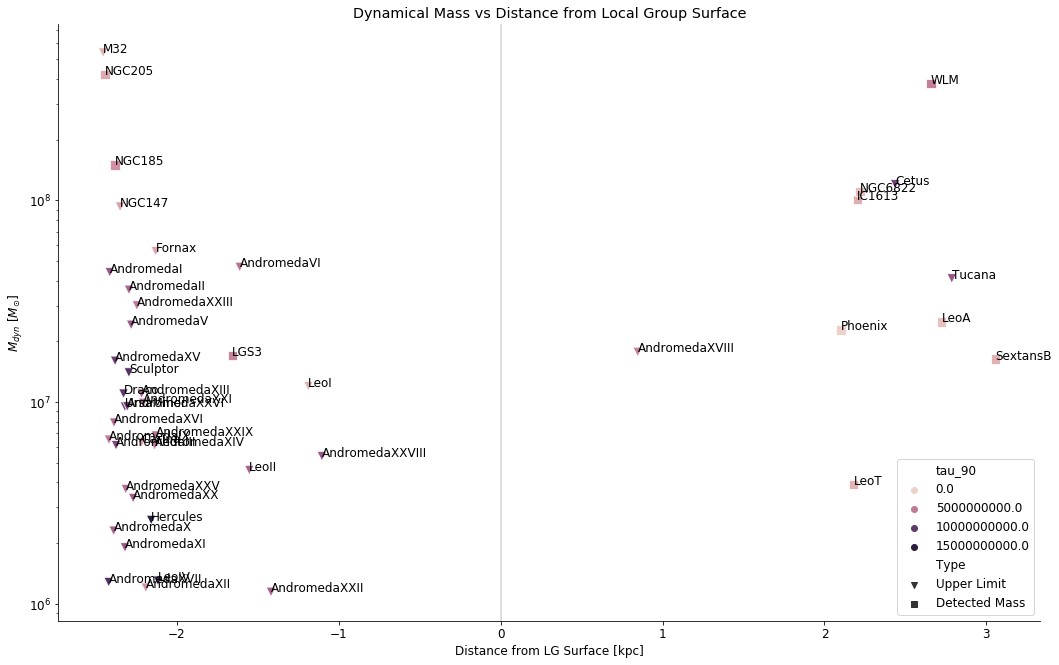

In [132]:
#D_LG vs M_dyn, with SFH

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

plot_df = gals_merged[gals_merged['mw_dist'] < 2000]
plot_df = plot_df[plot_df['tau_90'].notnull()]
plot_df = plot_df[plot_df['M_dyn'].notnull()]
plot_df.reset_index(drop=True, inplace=True)
label=[]

LG_model = 'ell_surf_dist'


plot_df.rename(columns = {'Closer_MW_M31':'Closer Galaxy'}, inplace = True)
plot_df.rename(columns = {'MHI_type':'Type'}, inplace = True)

plot_df.replace({'detected_mass': 'Detected Mass', 'upper_limit': 'Upper Limit'},inplace=True)

fg = sb.FacetGrid(data=plot_df, hue='MHI_source', height=9,aspect=1.61)
fg.set(xscale="linear", yscale="log")

#fg.map(plt.scatter, 'min_dist_mw_or_m31', 'MHI_computed').add_legend()
fg = sb.scatterplot(x=plot_df[LG_model], y=plot_df['M_dyn'],hue=plot_df['tau_90'],style=plot_df['Type'],markers={"Detected Mass": "s", "Upper Limit": "v"},s=90)
#print(gals_merged.count())
count = 0
for i, txt in enumerate(plot_df.GalaxyName):
    label = plot_df["GalaxyName"].iat[i]
    label_x = plot_df[LG_model].iat[i]
    label_y = plot_df['M_dyn'].iat[i]
    plt.annotate(label,(label_x,label_y))

#plt.ylim(-500,500)
#plt.axvline(250,color='steelblue')
#plt.axvline(300,color='darkorange')

plt.axvline(0,color='lightgray')

plt.title('Dynamical Mass vs Distance from Local Group Surface')
plt.ylabel("$M_{dyn}$ [$M_{\\odot}$]")
plt.xlabel("Distance from LG Surface [kpc]")
plt.show()

# Spatial Distribution Plots

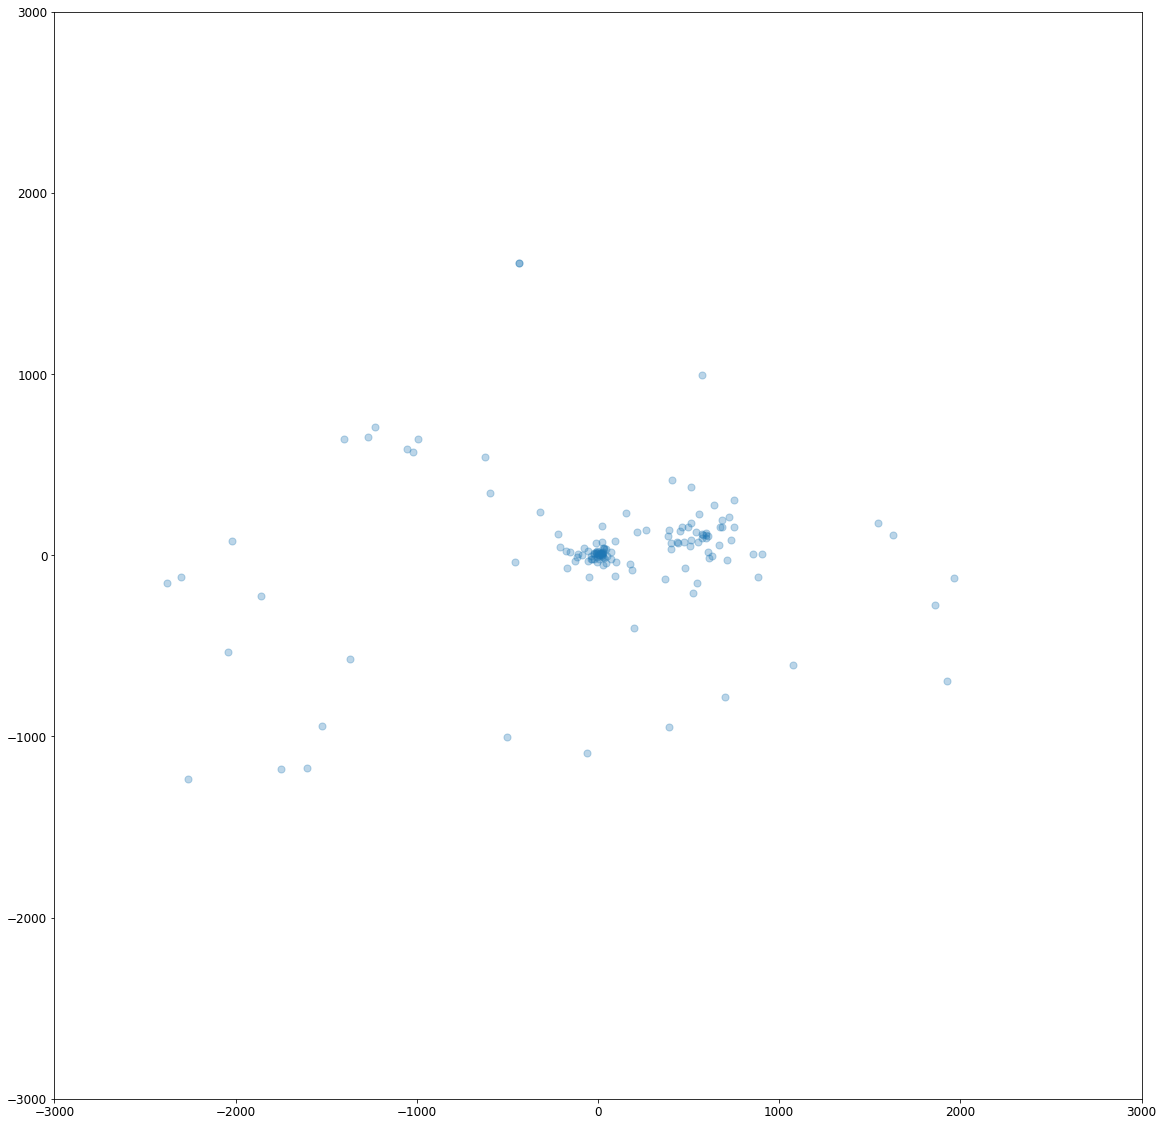

In [133]:
#df = gals_merged[(gals_merged['GalaxyName'] != 'SMC') & (gals_merged['GalaxyName'] != 'SMC')]
df = gals_merged

plt.figure(figsize=(20,20))
plt.xlim(-3000,3000)
plt.ylim(-3000,3000)
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(df['X'],df['Y'],s=50,alpha=0.3)
#for i, txt in enumerate(gals_merged.GalaxyName):
#    if((gals_merged['X'][i] < 3000) & (gals_merged['Y'][i] < 3000)):
#        label = gals_merged["GalaxyName"].iat[i]
#        label_x = gals_merged['X'].iat[i]
#        label_y = gals_merged['Y'].iat[i]
#plt.annotate(gals_merged["GalaxyName"],(gals_merged['X'],gals_merged['Y']))

In [134]:
gals_merged['color'] = np.nan

for i, row in gals_merged.iterrows():
    if(np.isfinite(gals_merged['MHI_computed'][i])):
        gals_merged['color'][i] = 1000*(gals_merged['MHI_computed'][i]/max(gals_merged['MHI_computed']))
    else:
        gals_merged['color'][i] = 0

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


### Zoomed out

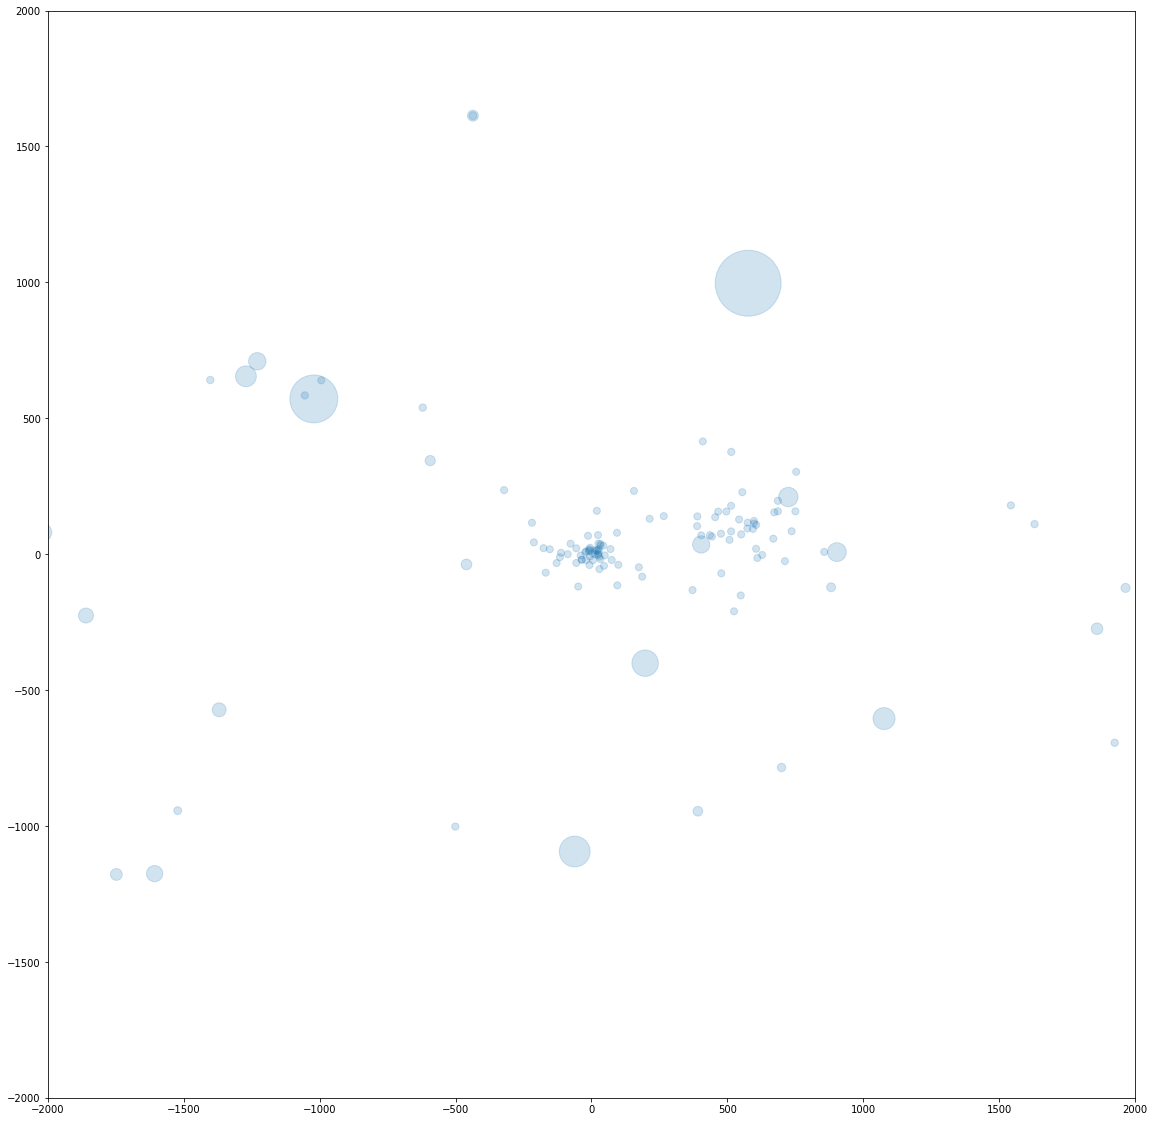

In [106]:
df = gals_merged[(gals_merged['GalaxyName'] != 'SMC') & (gals_merged['GalaxyName'] != 'LMC')]


plt.figure(figsize=(20,20))
plt.xlim(-2000,2000)
plt.ylim(-2000,2000)
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(df['X'],df['Y'],alpha=0.2,s=(50*(df['MHI_computed']/10**7)+50))

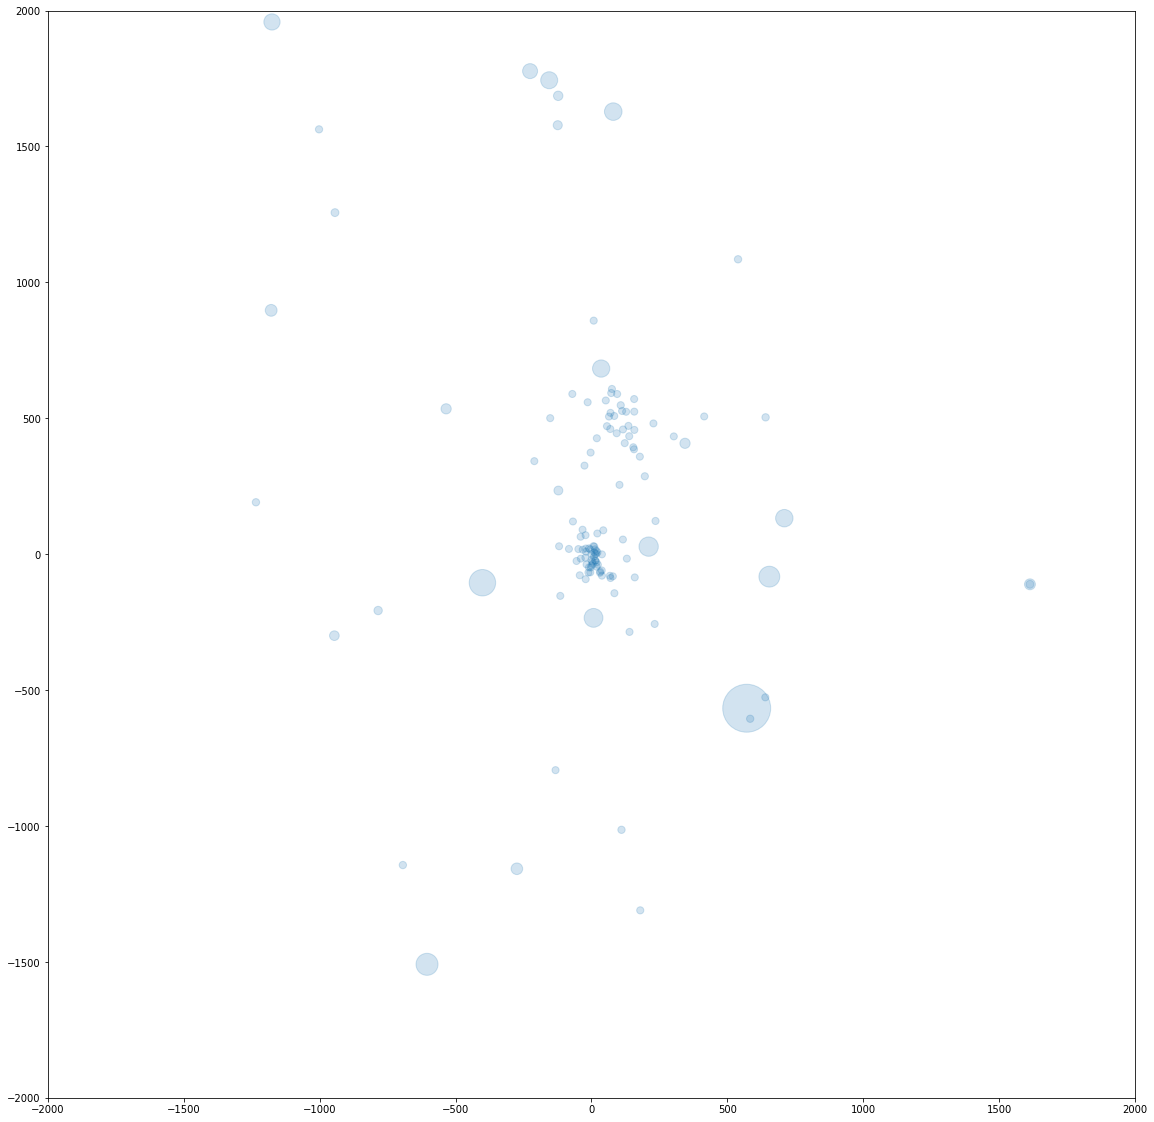

In [107]:
df = gals_merged[(gals_merged['GalaxyName'] != 'SMC') & (gals_merged['GalaxyName'] != 'LMC')]

plt.figure(figsize=(20,20))
plt.xlim(-2000,2000)
plt.ylim(-2000,2000)
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(df['Y'],df['Z'],alpha=0.2,s=(50*(df['MHI_computed']/10**7)+50))

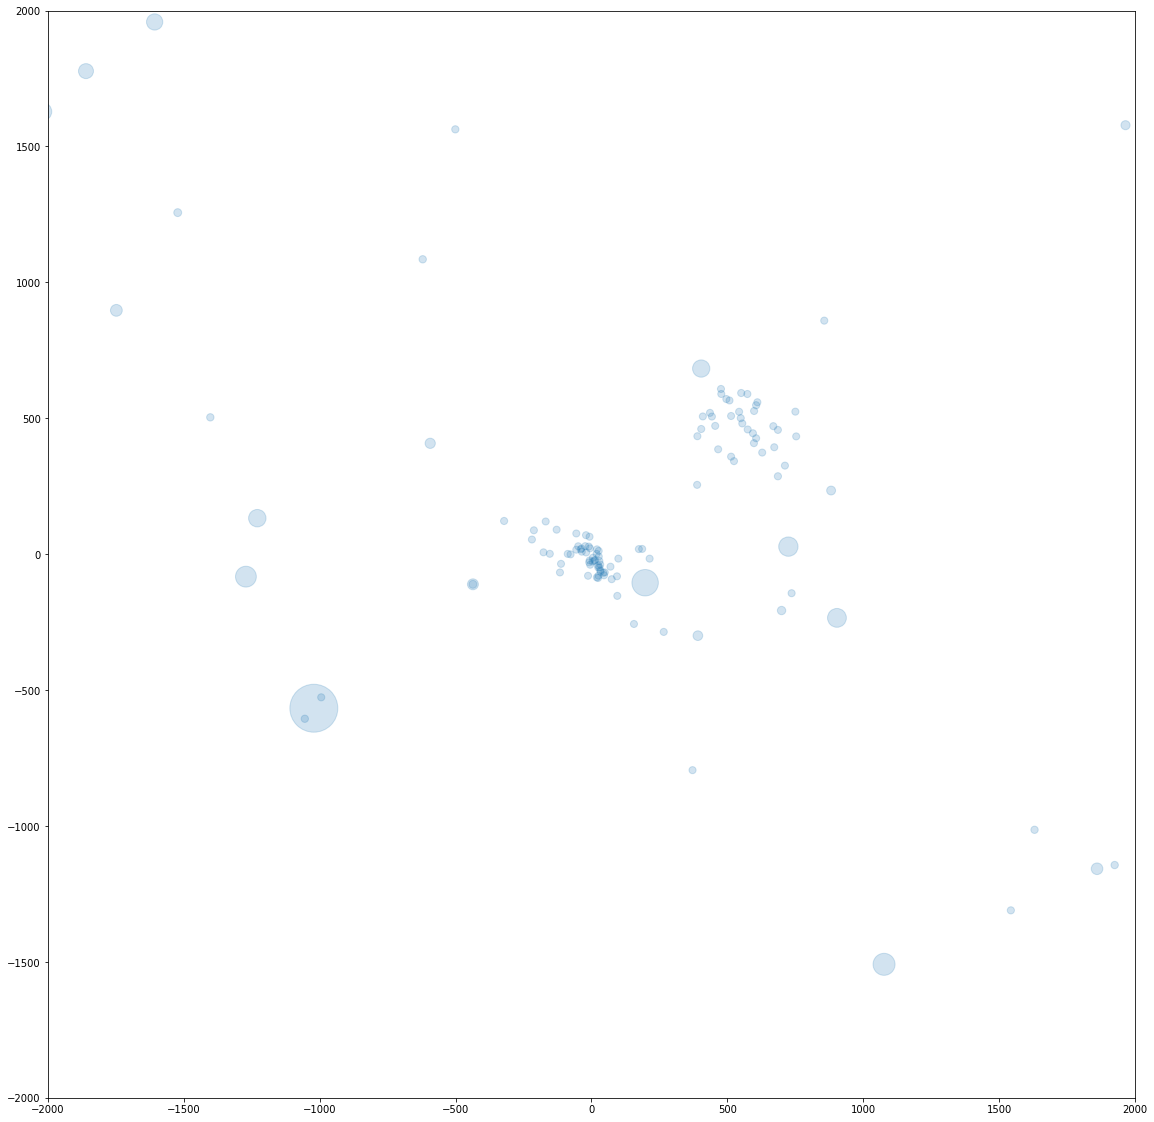

In [108]:
df = gals_merged[(gals_merged['GalaxyName'] != 'SMC') & (gals_merged['GalaxyName'] != 'LMC')]

plt.figure(figsize=(20,20))
plt.xlim(-2000,2000)
plt.ylim(-2000,2000)
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(df['X'],df['Z'],alpha=0.2,s=(50*(df['MHI_computed']/10**7)+50))

### Zoomed in

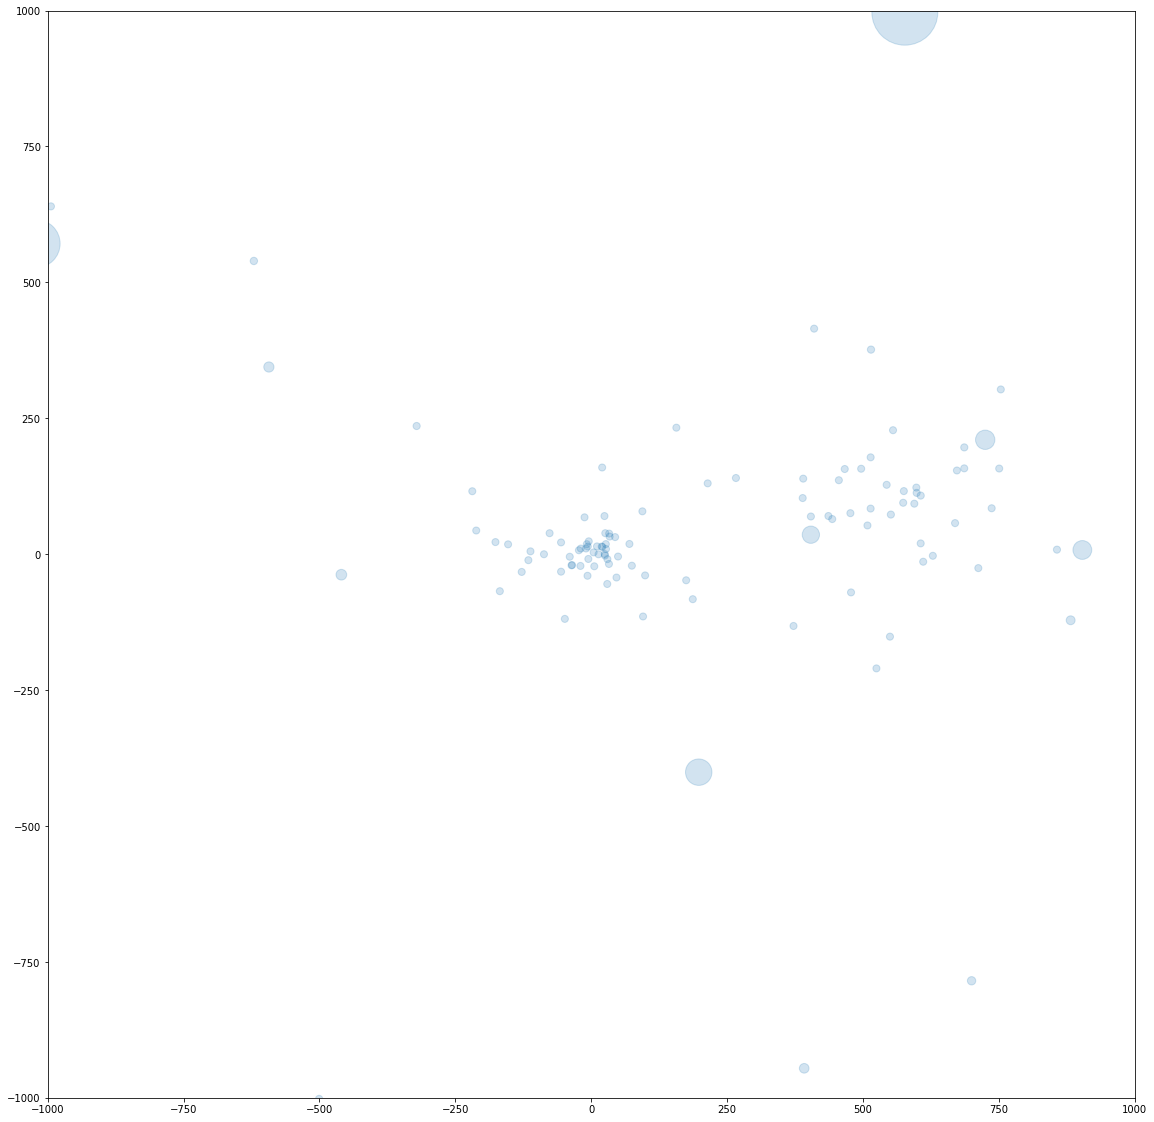

In [109]:
df = gals_merged[(gals_merged['GalaxyName'] != 'SMC') & (gals_merged['GalaxyName'] != 'LMC')]

plt.figure(figsize=(20,20))
plt.xlim(-1000,1000)
plt.ylim(-1000,1000)
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(df['X'],df['Y'],alpha=0.2,s=(50*(df['MHI_computed']/10**7)+50))

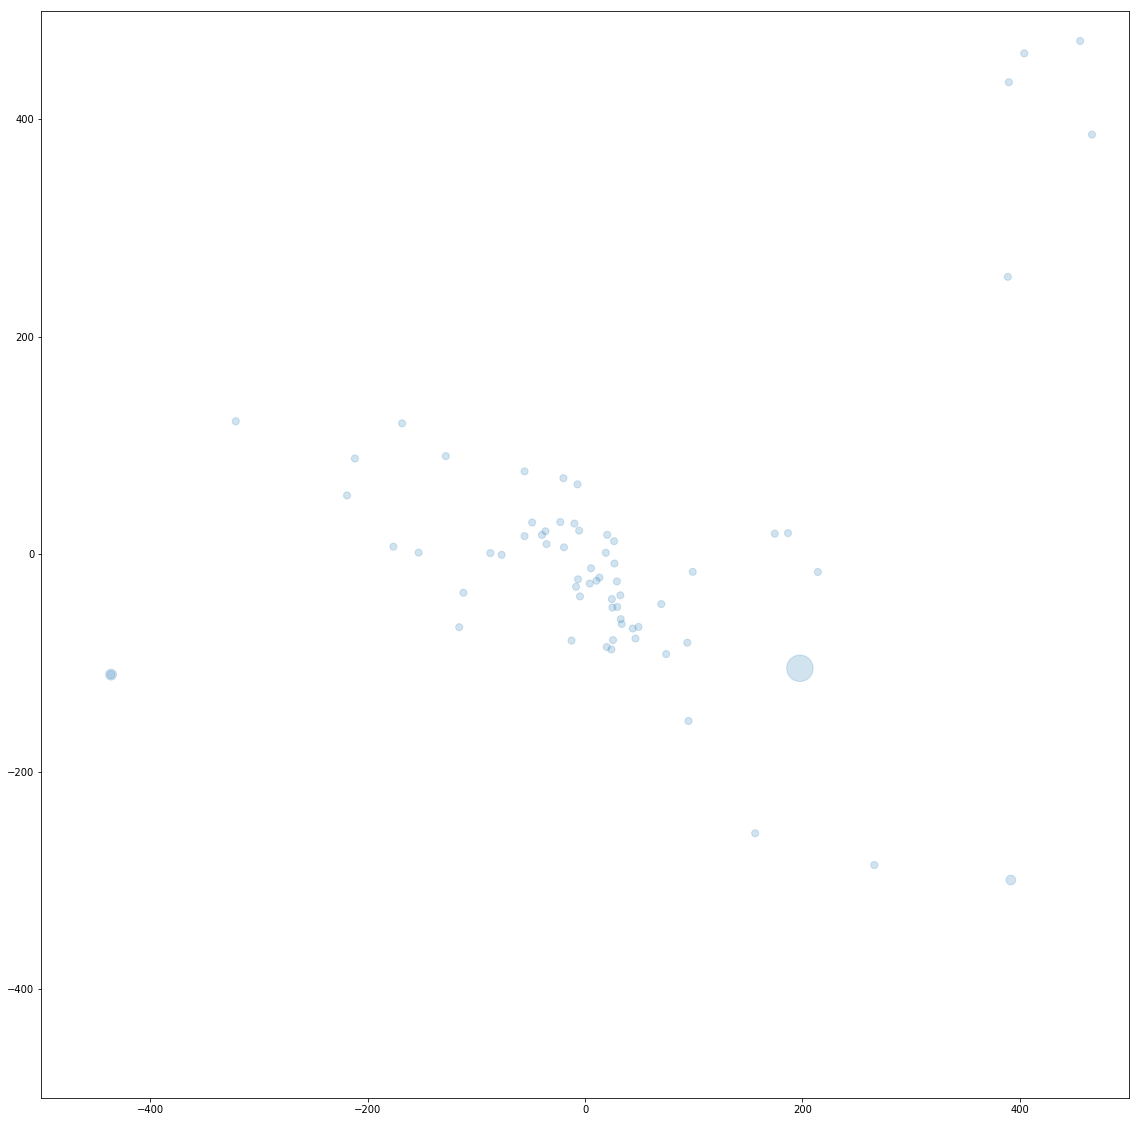

In [110]:
df = gals_merged[(gals_merged['GalaxyName'] != 'SMC') & (gals_merged['GalaxyName'] != 'LMC')]

#print(df[df['MHI_computed'] > 5*10**7]['GalaxyName'])

plt.figure(figsize=(20,20))
scale = 500
plt.xlim(-1*scale,scale)
plt.ylim(-1*scale,scale)
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(df['X'],df['Z'],alpha=0.2,s=(50*(df['MHI_computed']/10**7)+50))

### Andromeda center

578.6318634442164


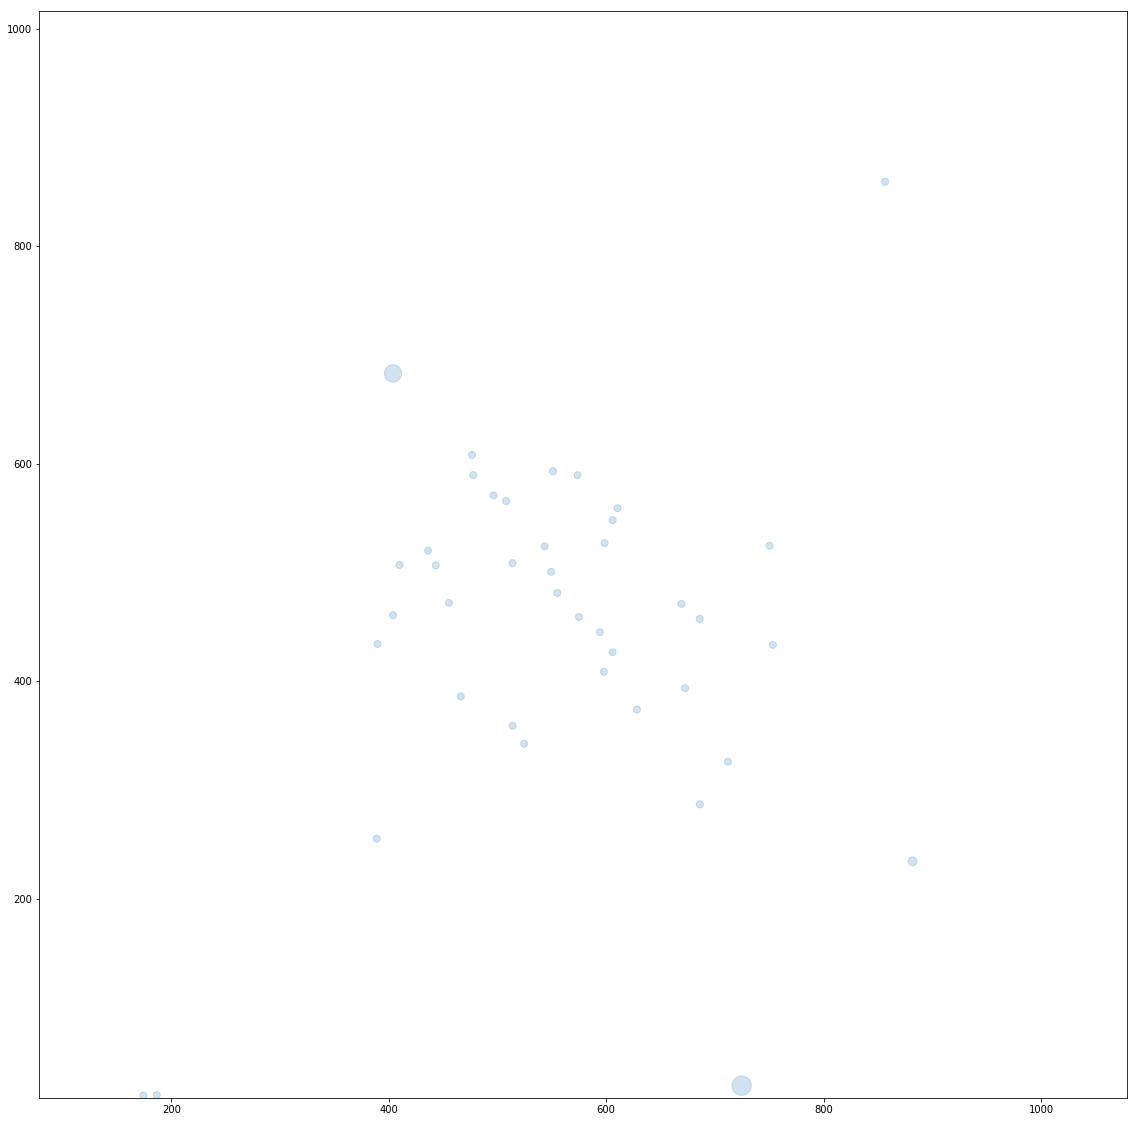

In [111]:
df = gals_merged[(gals_merged['GalaxyName'] != 'SMC') & (gals_merged['GalaxyName'] != 'LMC')]

plt.figure(figsize=(20,20))
scale = 500

axis1 = 'X'
axis2 = 'Z'

print(gals_merged[gals_merged['GalaxyName'] == '#Andromeda'][axis1].item())

andromeda_axis1 = gals_merged[gals_merged['GalaxyName'] == '#Andromeda'][axis1].item()
andromeda_axis2 = gals_merged[gals_merged['GalaxyName'] == '#Andromeda'][axis2].item()

plt.xlim(andromeda_axis1-scale,andromeda_axis1+scale)
plt.ylim(andromeda_axis2-scale,andromeda_axis2+scale)

plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(df[axis1],df[axis2],alpha=0.2,s=(50*(df['MHI_computed']/10**7)+50))

Text(0, 0.5, 'Z')

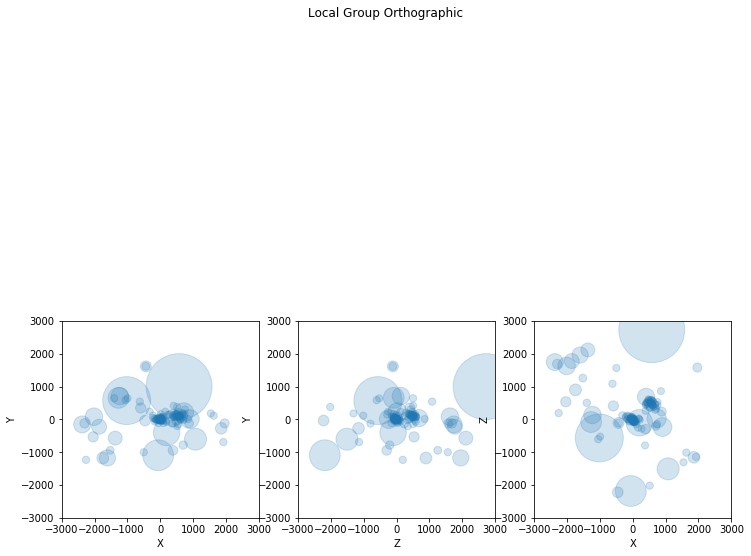

In [112]:
df = gals_merged[(gals_merged['GalaxyName'] != 'SMC') & (gals_merged['GalaxyName'] != 'LMC')]


fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(12,12))
fig.suptitle('Local Group Orthographic')

scale = 3000

ax1.set_xlim(-1*scale,scale)
ax1.set_ylim(-1*scale,scale)

ax1.scatter(df['X'],df['Y'],alpha=0.2,s=(50*(df['MHI_computed']/10**7)+50))
ax1.set_aspect(1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

ax2.set_xlim(-1*scale,scale)
ax2.set_ylim(-1*scale,scale)
ax2.set_xlabel('Z')
ax2.set_ylabel('Y')

ax2.scatter(df['Z'],df['Y'],alpha=0.2,s=(50*(df['MHI_computed']/10**7)+50))
ax2.set_aspect(1)


ax3.set_xlim(-1*scale,scale)
ax3.set_ylim(-1*scale,scale)
ax3.scatter(df['X'],df['Z'],alpha=0.2,s=(50*(df['MHI_computed']/10**7)+50))
ax3.set_aspect(1)
ax3.set_xlabel('X')
ax3.set_ylabel('Z')

Text(0, 0.5, 'Z')

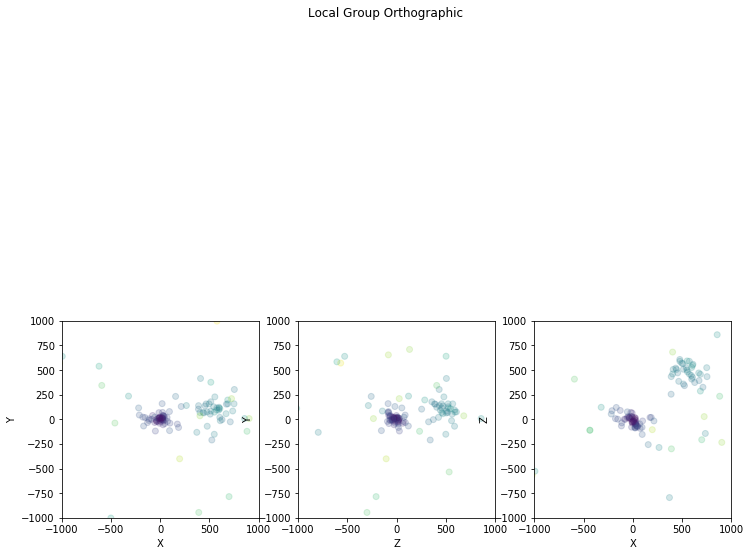

In [113]:
df = gals_merged[(gals_merged['GalaxyName'] != 'SMC') & (gals_merged['GalaxyName'] != 'LMC')]


fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(12,12))
fig.suptitle('Local Group Orthographic')

scale = 1000

ax1.set_xlim(-1*scale,scale)
ax1.set_ylim(-1*scale,scale)

ax1.scatter(df['X'],df['Y'],alpha=0.2,c=(10*(np.log(df['MHI_computed']))),cmap = 'viridis')
ax1.set_aspect(1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

ax2.set_xlim(-1*scale,scale)
ax2.set_ylim(-1*scale,scale)
ax2.set_xlabel('Z')
ax2.set_ylabel('Y')

ax2.scatter(df['Z'],df['Y'],alpha=0.2,c=(10*np.log(df['MHI_computed'])),cmap = 'viridis')
ax2.set_aspect(1)


ax3.set_xlim(-1*scale,scale)
ax3.set_ylim(-1*scale,scale)
ax3.scatter(df['X'],df['Z'],alpha=0.2,c=(10*np.log(df['MHI_computed'])),cmap = 'viridis')
ax3.set_aspect(1)
ax3.set_xlabel('X')
ax3.set_ylabel('Z')

Text(0, 0.5, 'Z')

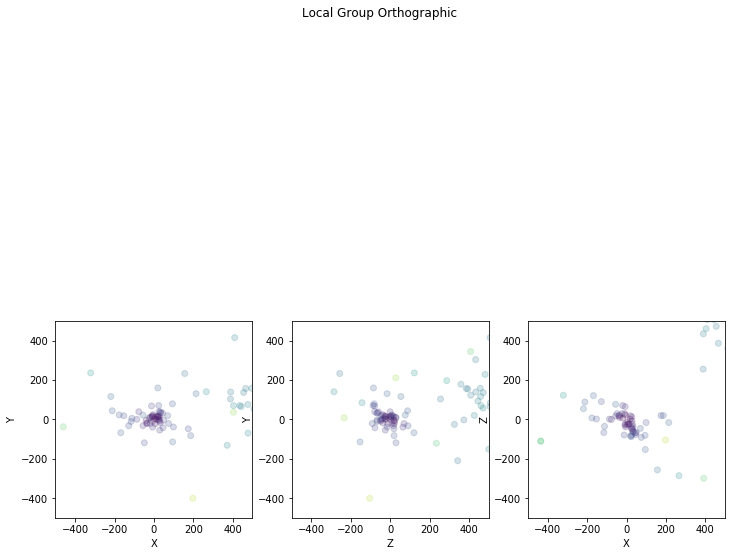

In [114]:
df = gals_merged[(gals_merged['GalaxyName'] != 'SMC') & (gals_merged['GalaxyName'] != 'LMC')]


fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(12,12))
fig.suptitle('Local Group Orthographic')

scale = 500

ax1.set_xlim(-1*scale,scale)
ax1.set_ylim(-1*scale,scale)

ax1.scatter(df['X'],df['Y'],alpha=0.2,c=(10*(np.log(df['MHI_computed']))),cmap = 'viridis')
ax1.set_aspect(1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

ax2.set_xlim(-1*scale,scale)
ax2.set_ylim(-1*scale,scale)
ax2.set_xlabel('Z')
ax2.set_ylabel('Y')

ax2.scatter(df['Z'],df['Y'],alpha=0.2,c=(10*np.log(df['MHI_computed'])),cmap = 'viridis')
ax2.set_aspect(1)


ax3.set_xlim(-1*scale,scale)
ax3.set_ylim(-1*scale,scale)
ax3.scatter(df['X'],df['Z'],alpha=0.2,c=(10*np.log(df['MHI_computed'])),cmap = 'viridis')
ax3.set_aspect(1)
ax3.set_xlabel('X')
ax3.set_ylabel('Z')

Text(0, 0.5, 'Z')

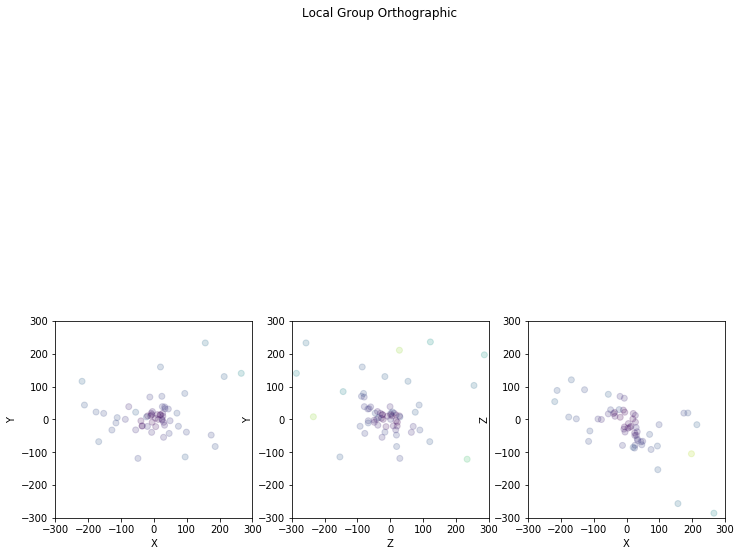

In [115]:
df = gals_merged[(gals_merged['GalaxyName'] != 'SMC') & (gals_merged['GalaxyName'] != 'LMC')]


fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(12,12))
fig.suptitle('Local Group Orthographic')

scale = 300

ax1.set_xlim(-1*scale,scale)
ax1.set_ylim(-1*scale,scale)

ax1.scatter(df['X'],df['Y'],alpha=0.2,c=(10*(np.log(df['MHI_computed']))),cmap = 'viridis')
ax1.set_aspect(1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

ax2.set_xlim(-1*scale,scale)
ax2.set_ylim(-1*scale,scale)
ax2.set_xlabel('Z')
ax2.set_ylabel('Y')

ax2.scatter(df['Z'],df['Y'],alpha=0.2,c=(10*np.log(df['MHI_computed'])),cmap = 'viridis')
ax2.set_aspect(1)


ax3.set_xlim(-1*scale,scale)
ax3.set_ylim(-1*scale,scale)
ax3.scatter(df['X'],df['Z'],alpha=0.2,c=(10*np.log(df['MHI_computed'])),cmap = 'viridis')
ax3.set_aspect(1)
ax3.set_xlabel('X')
ax3.set_ylabel('Z')

Text(0, 0.5, 'Z')

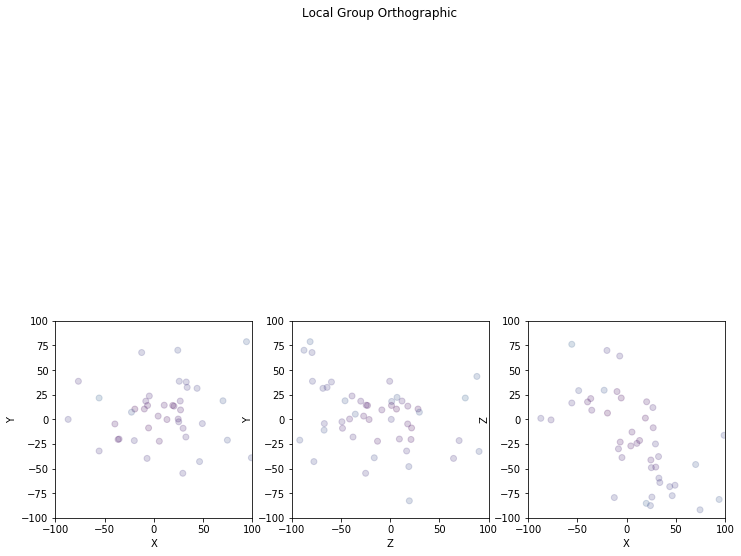

In [116]:
df = gals_merged[(gals_merged['GalaxyName'] != 'SMC') & (gals_merged['GalaxyName'] != 'LMC')]


fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(12,12))
fig.suptitle('Local Group Orthographic')

scale = 100

ax1.set_xlim(-1*scale,scale)
ax1.set_ylim(-1*scale,scale)

ax1.scatter(df['X'],df['Y'],alpha=0.2,c=(10*(np.log(df['MHI_computed']))),cmap = 'viridis')
ax1.set_aspect(1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

ax2.set_xlim(-1*scale,scale)
ax2.set_ylim(-1*scale,scale)
ax2.set_xlabel('Z')
ax2.set_ylabel('Y')

ax2.scatter(df['Z'],df['Y'],alpha=0.2,c=(10*np.log(df['MHI_computed'])),cmap = 'viridis')
ax2.set_aspect(1)


ax3.set_xlim(-1*scale,scale)
ax3.set_ylim(-1*scale,scale)
ax3.scatter(df['X'],df['Z'],alpha=0.2,c=(10*np.log(df['MHI_computed'])),cmap = 'viridis')
ax3.set_aspect(1)
ax3.set_xlabel('X')
ax3.set_ylabel('Z')

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Text(0, 0.5, 'Z')

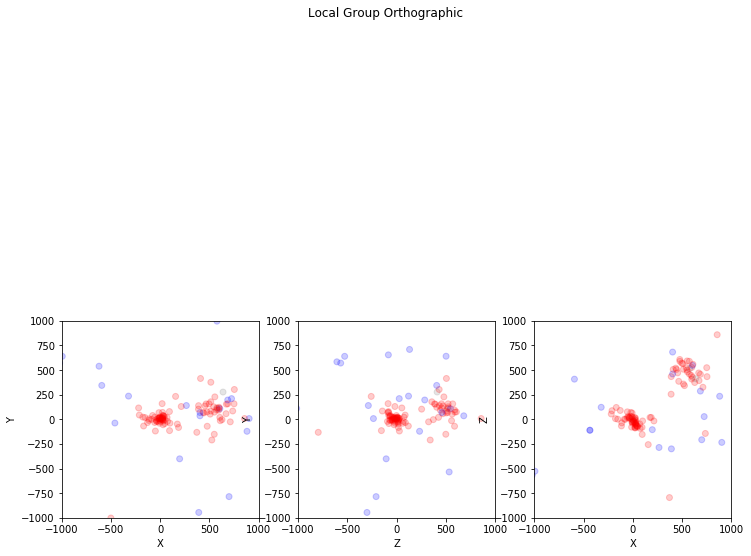

In [117]:
df = gals_merged[(gals_merged['GalaxyName'] != 'SMC') & (gals_merged['GalaxyName'] != 'LMC')]
df.loc[df['MHI_type'] == 'upper_limit', 'MHI_type'] = 'red'
df.loc[df['MHI_type'] == 'detected_mass', 'MHI_type'] = 'blue'
df.loc[df['MHI_type'].isnull(), 'MHI_type'] = 'grey'



fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(12,12))
fig.suptitle('Local Group Orthographic')

scale = 1000

ax1.set_xlim(-1*scale,scale)
ax1.set_ylim(-1*scale,scale)

ax1.scatter(df['X'],df['Y'],alpha=0.2,c=df['MHI_type'])
ax1.set_aspect(1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

ax2.set_xlim(-1*scale,scale)
ax2.set_ylim(-1*scale,scale)
ax2.set_xlabel('Z')
ax2.set_ylabel('Y')

ax2.scatter(df['Z'],df['Y'],alpha=0.2,c=df['MHI_type'])
ax2.set_aspect(1)


ax3.set_xlim(-1*scale,scale)
ax3.set_ylim(-1*scale,scale)
ax3.scatter(df['X'],df['Z'],alpha=0.2,c=df['MHI_type'])
ax3.set_aspect(1)
ax3.set_xlabel('X')
ax3.set_ylabel('Z')

In [195]:
gals_merged[gals_merged['GalaxyName'] == '#TheGalaxy']['X'].item()

-0.0004373441736450129

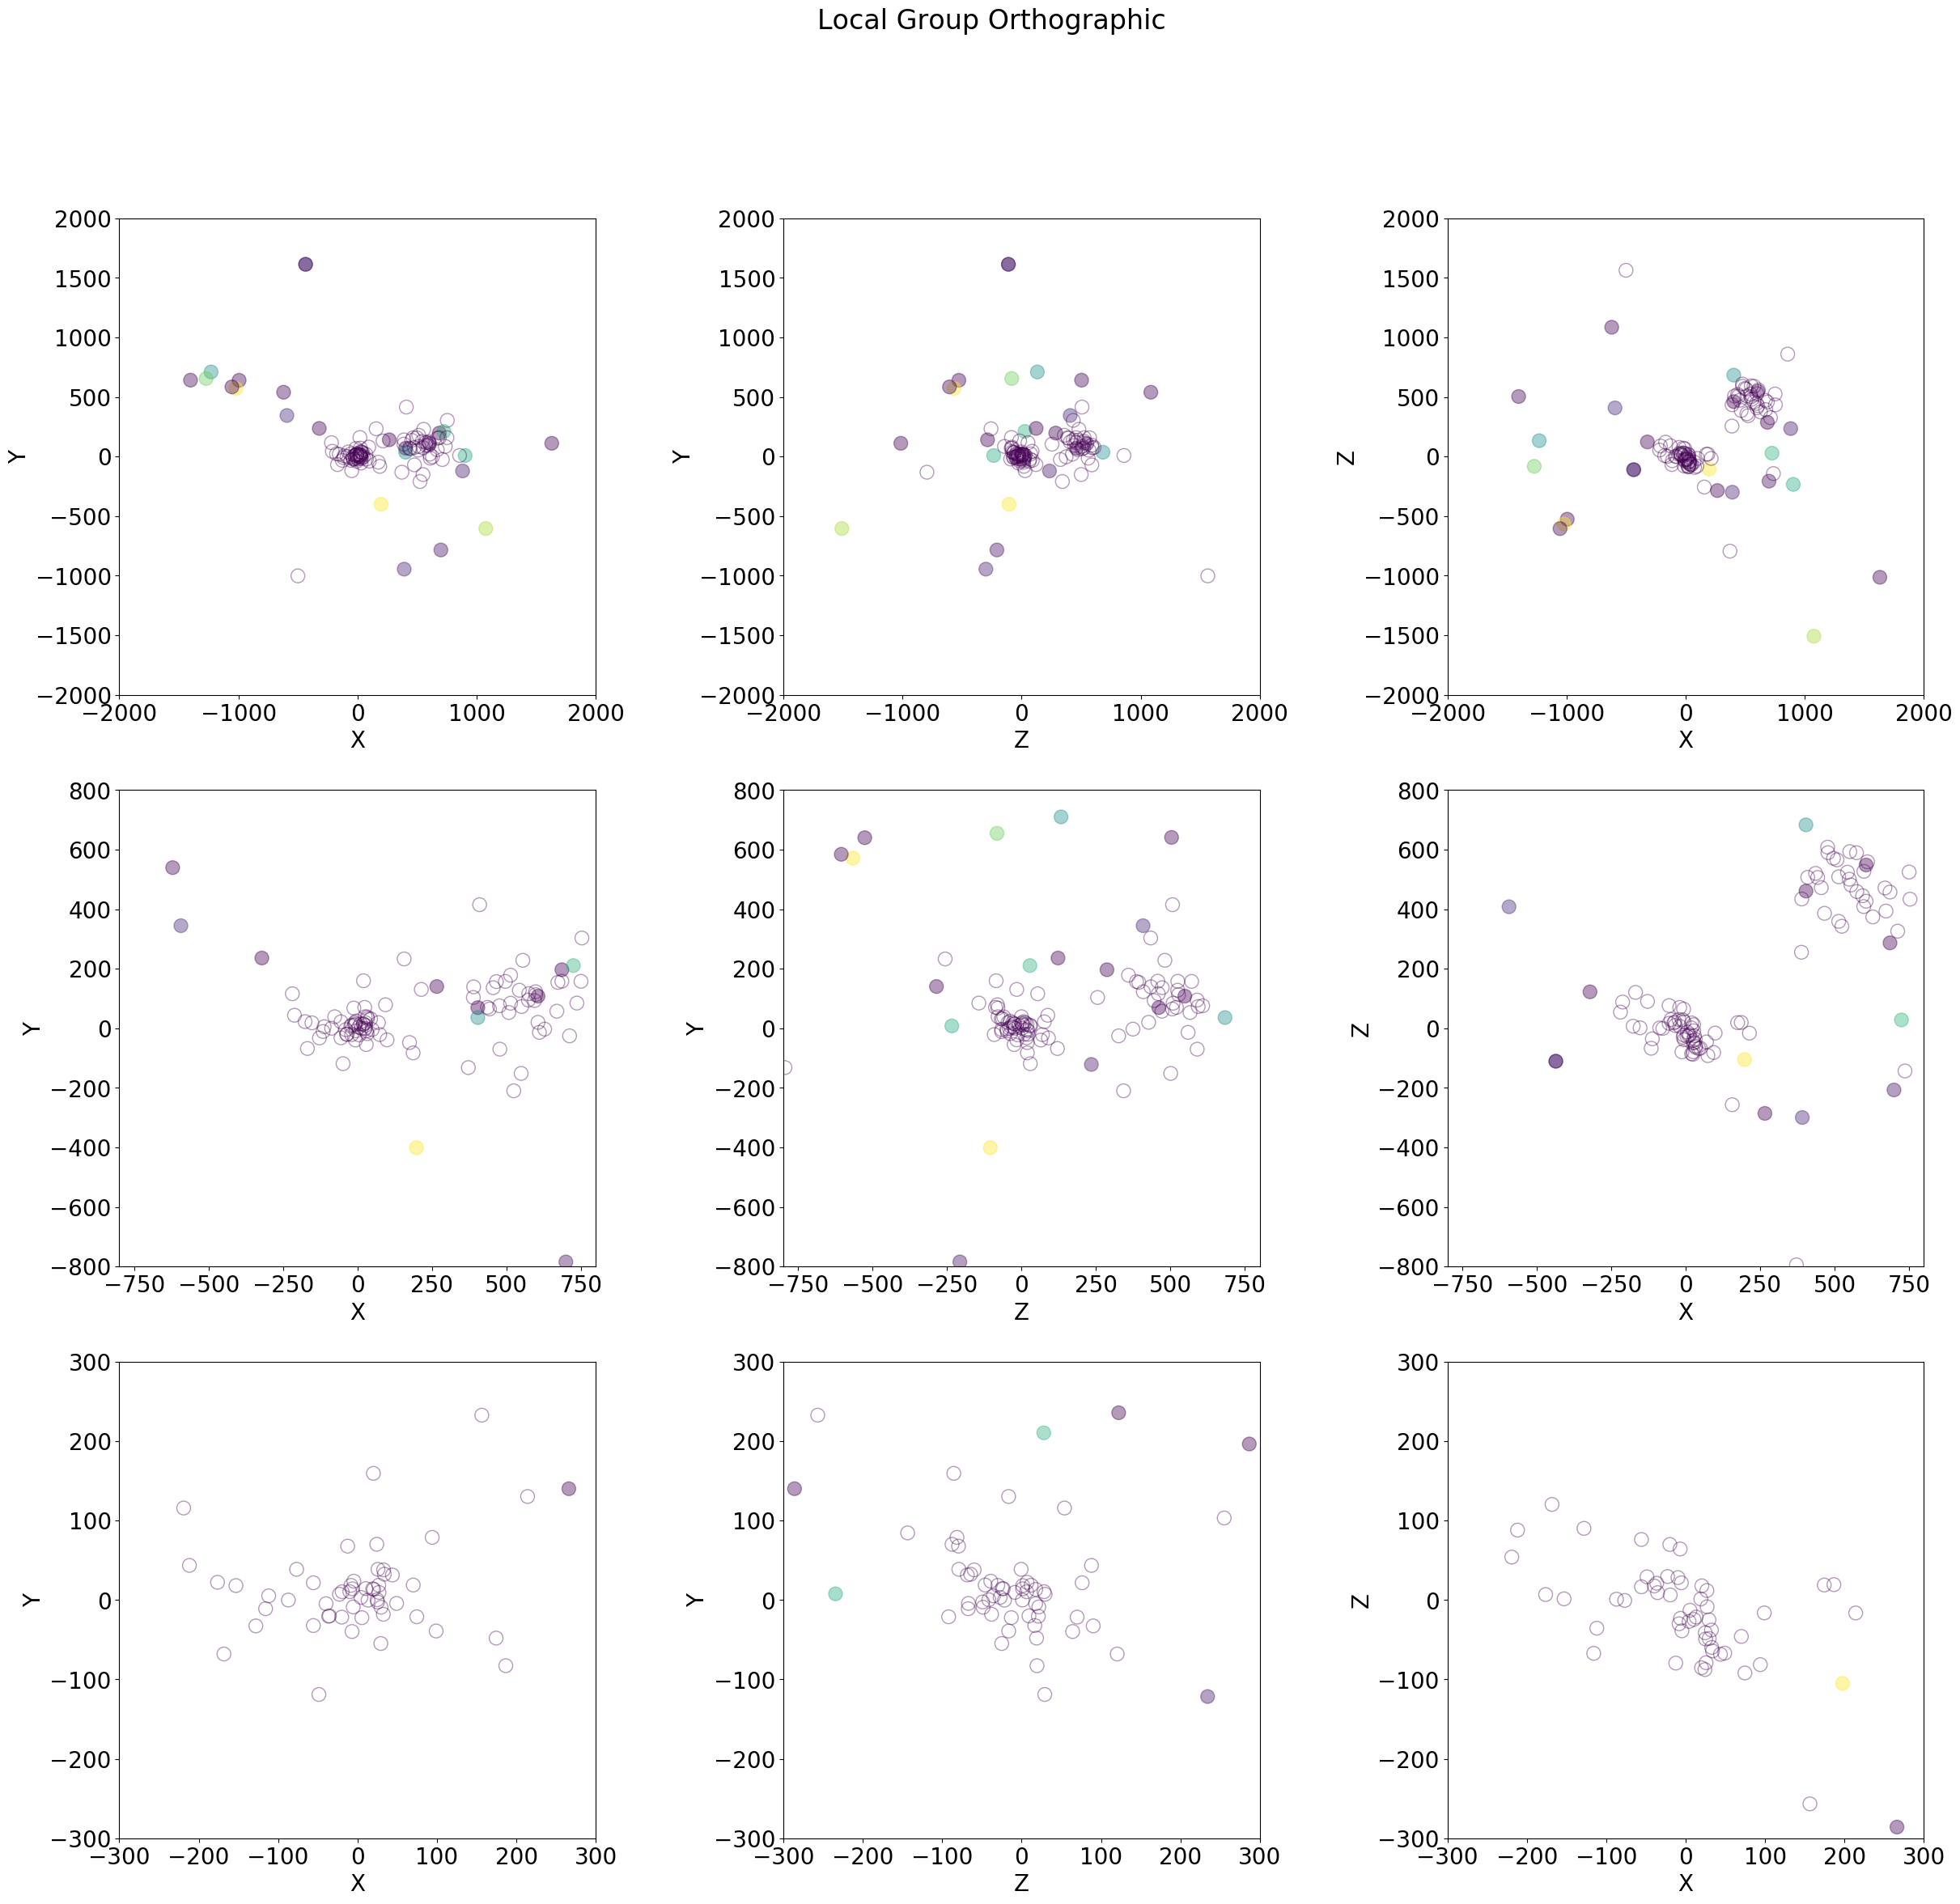

In [216]:
df = gals_merged[(gals_merged['GalaxyName'] != 'SMC') & (gals_merged['GalaxyName'] != 'LMC')]
df = df[df['mw_dist'] < 2000]
df.loc[df['MHI_type'].isnull(), 'MHI_type'] = 'grey'

detected = df[df['MHI_type'] == 'detected_mass']
limits = df[df['MHI_type'] == 'upper_limit']

plt.style.use('default')

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(3, 3,figsize=(30,26))


fig.suptitle('Local Group Orthographic')

scale1 = 2000
scale2 = 800
scale3 = 300
cmap = 'plasma'
use_labels = False
size = 150

detected_color_values = plt.cm.viridis(detected['MHI_computed']/10e7)
limits_color_values = plt.cm.viridis(limits['MHI_computed']/10e7)
alpha_value = 0.4

ax1.set_xlim(-1*scale1,scale1)
ax1.set_ylim(-1*scale1,scale1)
ax1.scatter(detected['X'],detected['Y'],alpha=alpha_value,facecolor=detected_color_values,edgecolor=detected_color_values,s=size)
ax1.scatter(limits['X'],limits['Y'],alpha=alpha_value,facecolor='none',edgecolor = limits_color_values,s=size)
ax1.set_aspect(1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
#ax1.plot(df[df['GalaxyName'] == '#TheGalaxy']['X'],df[df['GalaxyName'] == '#TheGalaxy']['Y'],'ro')
#ax1.annotate('MW',(df[df['GalaxyName'] == '#TheGalaxy']['X'].item(),df[df['GalaxyName'] == '#TheGalaxy']['Y'].item()))

if(use_labels == True):
    for i, txt in enumerate(df['GalaxyName']):
        label = df['GalaxyName'].iat[i]
        label_x = df['X'].iat[i]
        label_y = df['Y'].iat[i]
        if((label_x < scale1) & (label_x > -scale1) & (label_y < scale1) & (label_y > -scale1)):
            ax1.annotate(label,(label_x,label_y))
    

ax2.set_xlim(-1*scale1,scale1)
ax2.set_ylim(-1*scale1,scale1)
ax2.set_xlabel('Z')
ax2.set_ylabel('Y')
ax2.scatter(detected['Z'],detected['Y'],alpha=alpha_value,facecolor=detected_color_values,edgecolor=detected_color_values,s=size)
ax2.scatter(limits['Z'],limits['Y'],alpha=alpha_value,facecolor='none',edgecolor = limits_color_values,s=size)
ax2.set_aspect(1)
if(use_labels == True):
    for i, txt in enumerate(df['GalaxyName']):
        label = df['GalaxyName'].iat[i]
        label_x = df['Z'].iat[i]
        label_y = df['Y'].iat[i]
        if((label_x < scale1) & (label_x > -scale1) & (label_y < scale1) & (label_y > -scale1)):
            ax2.annotate(label,(label_x,label_y))


ax3.set_xlim(-1*scale1,scale1)
ax3.set_ylim(-1*scale1,scale1)
ax3.scatter(detected['X'],detected['Z'],alpha=alpha_value,facecolor=detected_color_values,edgecolor=detected_color_values,s=size)
ax3.scatter(limits['X'],limits['Z'],alpha=alpha_value,facecolor='none',edgecolor = limits_color_values,s=size)
ax3.set_aspect(1)
ax3.set_xlabel('X')
ax3.set_ylabel('Z')
if(use_labels == True):
    for i, txt in enumerate(df['GalaxyName']):
        label = df['GalaxyName'].iat[i]
        label_x = df['X'].iat[i]
        label_y = df['Z'].iat[i]
        if((label_x < scale1) & (label_x > -scale1) & (label_y < scale1) & (label_y > -scale1)):
            ax3.annotate(label,(label_x,label_y))


ax4.set_xlim(-1*scale2,scale2)
ax4.set_ylim(-1*scale2,scale2)
ax4.scatter(detected['X'],detected['Y'],alpha=alpha_value,facecolor=detected_color_values,edgecolor=detected_color_values,s=size)
ax4.scatter(limits['X'],limits['Y'],alpha=alpha_value,facecolor='none',edgecolor = limits_color_values,s=size)
ax4.set_aspect(1)
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
if(use_labels == True):
    for i, txt in enumerate(df['GalaxyName']):
        label = df['GalaxyName'].iat[i]
        label_x = df['X'].iat[i]
        label_y = df['Y'].iat[i]
        if((label_x < scale2) & (label_x > -scale2) & (label_y < scale2) & (label_y > -scale2)):
            ax4.annotate(label,(label_x,label_y))

ax5.set_xlim(-1*scale2,scale2)
ax5.set_ylim(-1*scale2,scale2)
ax5.set_xlabel('Z')
ax5.set_ylabel('Y')
ax5.scatter(detected['Z'],detected['Y'],alpha=alpha_value,facecolor=detected_color_values,edgecolor=detected_color_values,s=size)
ax5.scatter(limits['Z'],limits['Y'],alpha=alpha_value,facecolor='none',edgecolor = limits_color_values,s=size)
ax5.set_aspect(1)
if(use_labels == True):
    for i, txt in enumerate(df['GalaxyName']):
        label = df['GalaxyName'].iat[i]
        label_x = df['Z'].iat[i]
        label_y = df['Y'].iat[i]
        if((label_x < scale2) & (label_x > -scale2) & (label_y < scale2) & (label_y > -scale2)):
            ax5.annotate(label,(label_x,label_y))


ax6.set_xlim(-1*scale2,scale2)
ax6.set_ylim(-1*scale2,scale2)
ax6.scatter(detected['X'],detected['Z'],alpha=alpha_value,facecolor=detected_color_values,edgecolor=detected_color_values,s=size)
ax6.scatter(limits['X'],limits['Z'],alpha=alpha_value,facecolor='none',edgecolor = limits_color_values,s=size)
ax6.set_aspect(1)
ax6.set_xlabel('X')
ax6.set_ylabel('Z')
if(use_labels == True):
    for i, txt in enumerate(df['GalaxyName']):
        label = df['GalaxyName'].iat[i]
        label_x = df['X'].iat[i]
        label_y = df['Z'].iat[i]
        if((label_x < scale2) & (label_x > -scale2) & (label_y < scale2) & (label_y > -scale2)):
            ax6.annotate(label,(label_x,label_y))

ax7.set_xlim(-1*scale3,scale3)
ax7.set_ylim(-1*scale3,scale3)
ax7.scatter(detected['X'],detected['Y'],alpha=alpha_value,facecolor=detected_color_values,edgecolor=detected_color_values,s=size)
ax7.scatter(limits['X'],limits['Y'],alpha=alpha_value,facecolor='none',edgecolor = limits_color_values,s=size)
ax7.set_aspect(1)
ax7.set_xlabel('X')
ax7.set_ylabel('Y')
if(use_labels == True):
    for i, txt in enumerate(df['GalaxyName']):
        label = df['GalaxyName'].iat[i]
        label_x = df['X'].iat[i]
        label_y = df['Y'].iat[i]
        if((label_x < scale3) & (label_x > -scale3) & (label_y < scale3) & (label_y > -scale3)):
            ax7.annotate(label,(label_x,label_y))

ax8.set_xlim(-1*scale3,scale3)
ax8.set_ylim(-1*scale3,scale3)
ax8.set_xlabel('Z')
ax8.set_ylabel('Y')
ax8.scatter(detected['Z'],detected['Y'],alpha=alpha_value,facecolor=detected_color_values,edgecolor=detected_color_values,s=size)
ax8.scatter(limits['Z'],limits['Y'],alpha=alpha_value,facecolor='none',edgecolor = limits_color_values,s=size)
ax8.set_aspect(1)
if(use_labels == True):
    for i, txt in enumerate(df['GalaxyName']):
        label = df['GalaxyName'].iat[i]
        label_x = df['Z'].iat[i]
        label_y = df['Y'].iat[i]
        if((label_x < scale3) & (label_x > -scale3) & (label_y < scale3) & (label_y > -scale3)):
            ax8.annotate(label,(label_x,label_y))


ax9.set_xlim(-1*scale3,scale3)
ax9.set_ylim(-1*scale3,scale3)
ax9.scatter(detected['X'],detected['Z'],alpha=alpha_value,facecolor=detected_color_values,edgecolor=detected_color_values,s=size)
ax9.scatter(limits['X'],limits['Z'],alpha=alpha_value,facecolor='none',edgecolor = limits_color_values,s=size)
ax9.set_aspect(1)
ax9.set_xlabel('X')
ax9.set_ylabel('Z')
if(use_labels == True):
    for i, txt in enumerate(df['GalaxyName']):
        label = df['GalaxyName'].iat[i]
        label_x = df['X'].iat[i]
        label_y = df['Z'].iat[i]
        if((label_x < scale3) & (label_x > -scale3) & (label_y < scale3) & (label_y > -scale3)):
            ax9.annotate(label,(label_x,label_y))

plt.show()

ValueError: 'c' argument has 24 elements, which is not acceptable for use with 'x' with size 21, 'y' with size 21.

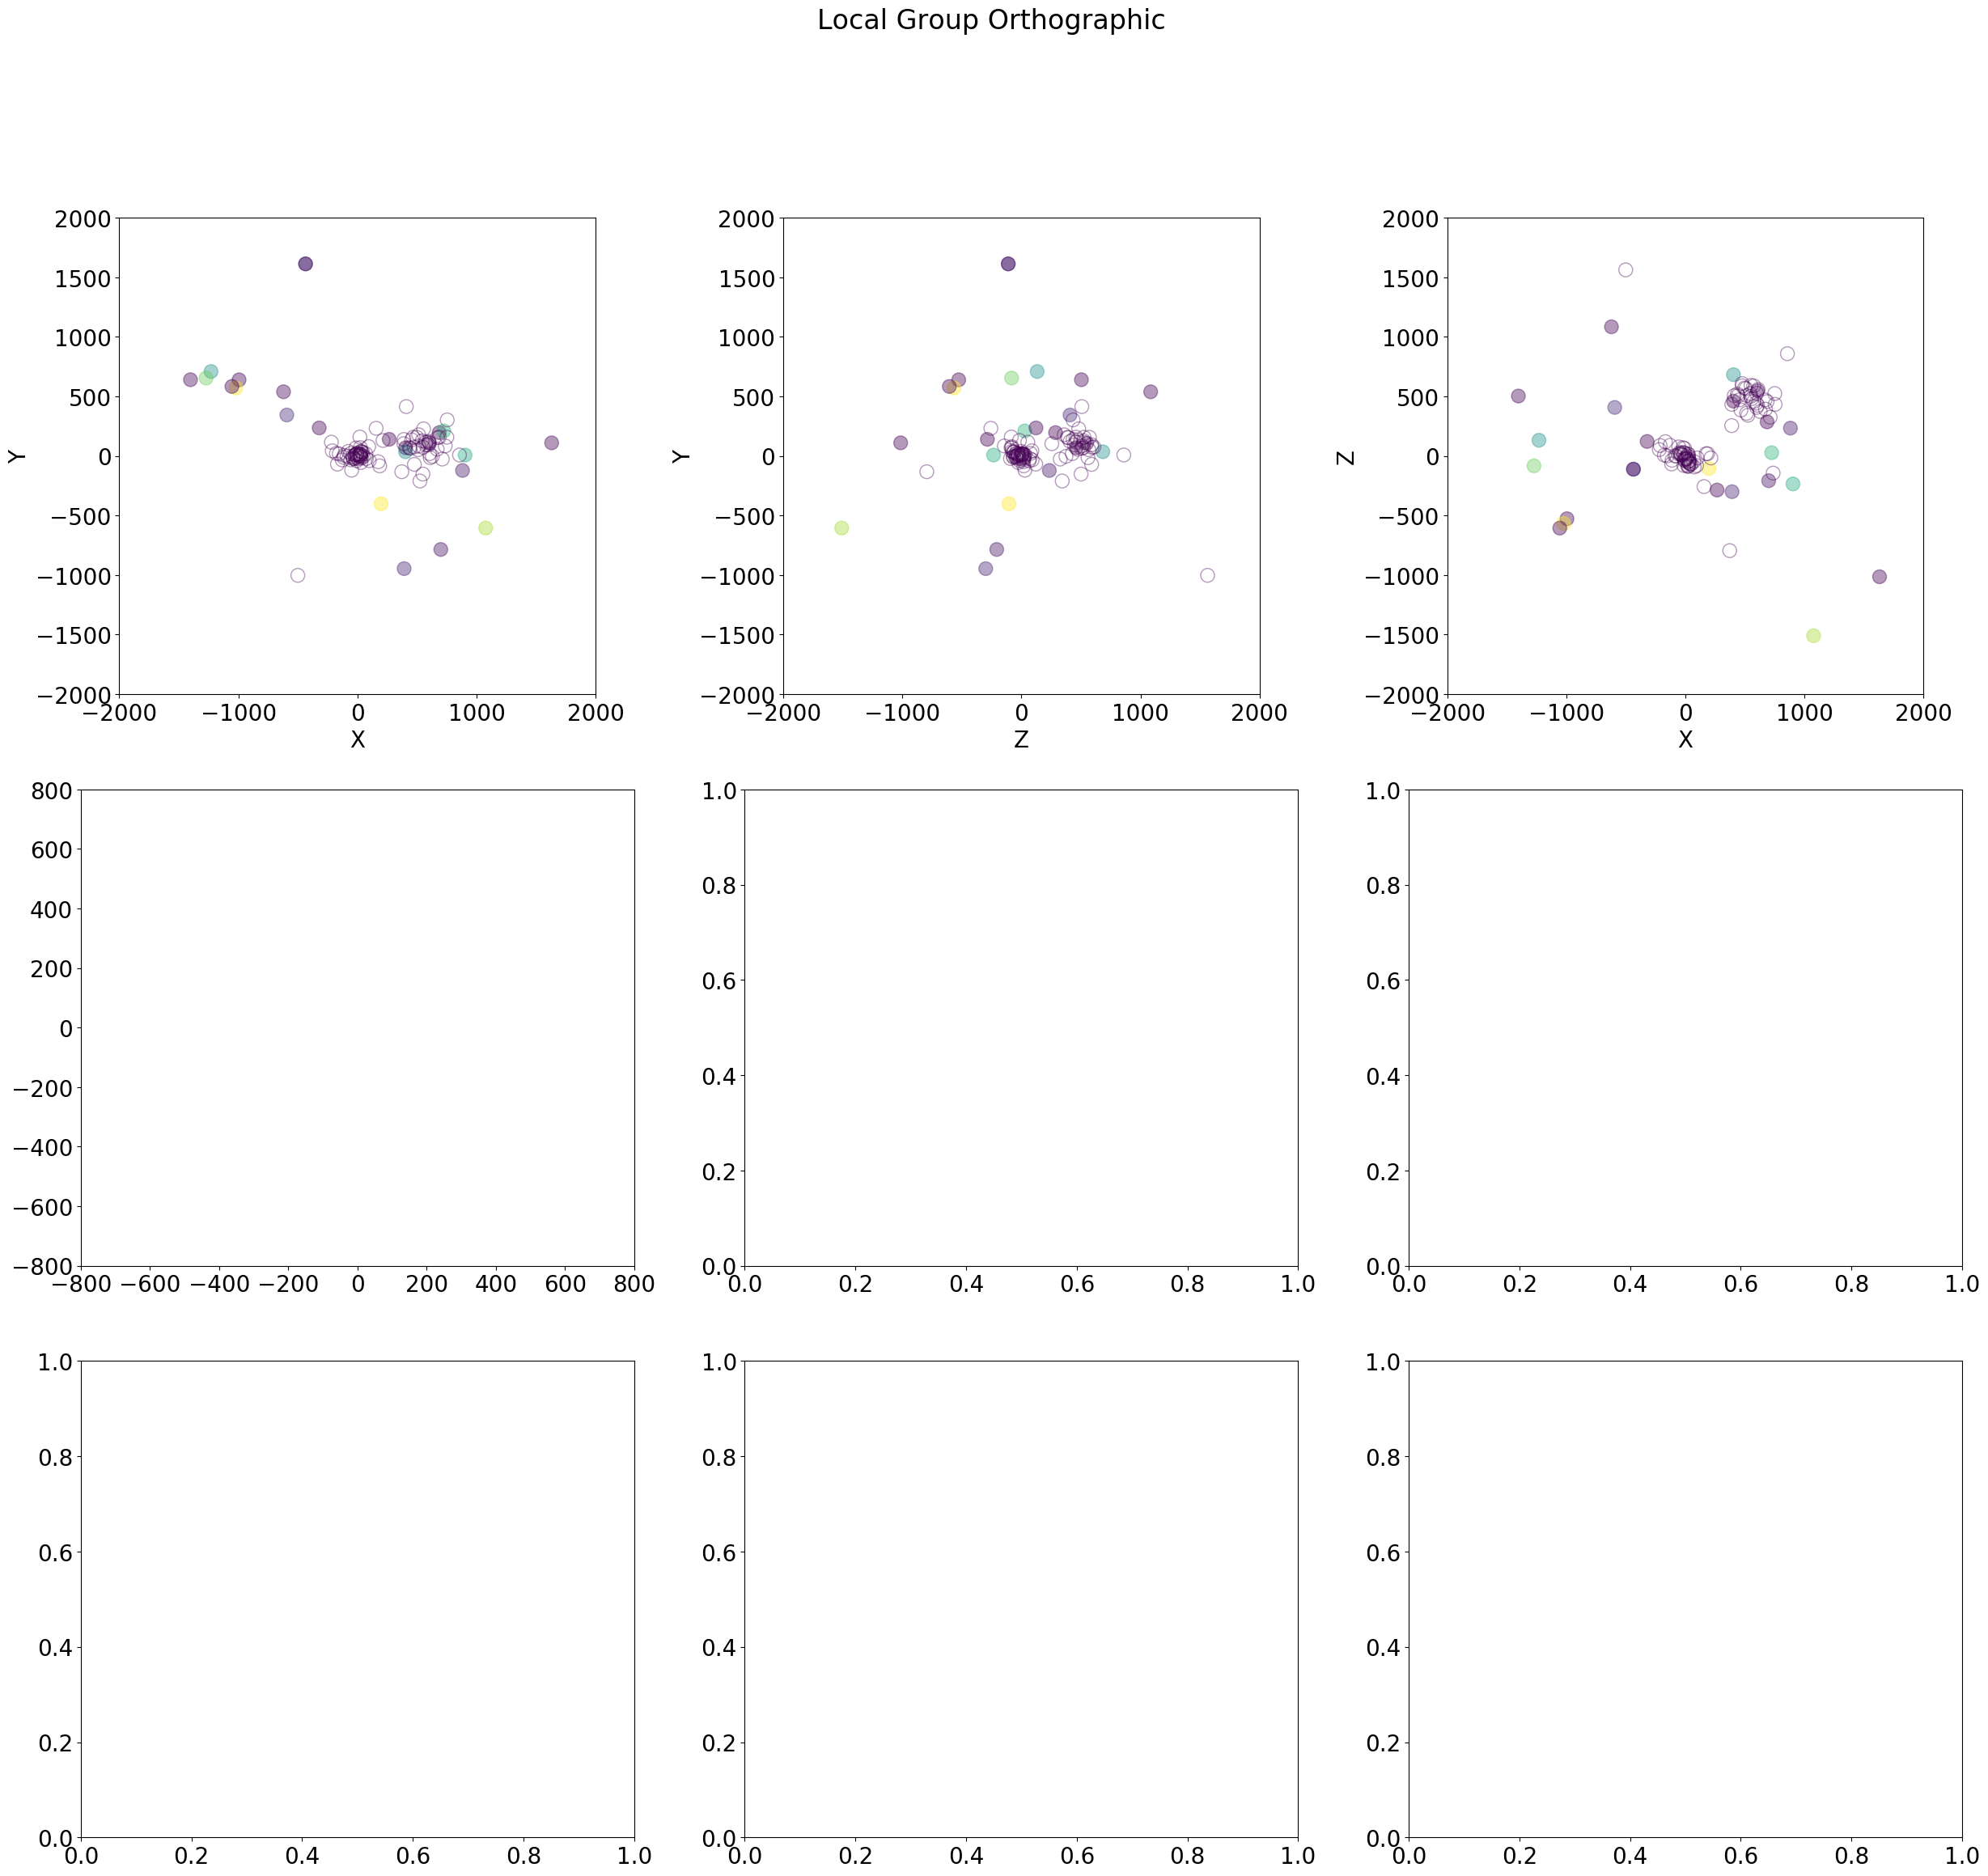

In [217]:
#Limit line of sight distance to scale of box
#TO DO: make color arrays which match based on scale. 
#Should probably be a function that plots at this point
#inputs scale, X axis, Y axis, colorby, annotate

df = gals_merged[(gals_merged['GalaxyName'] != 'SMC') & (gals_merged['GalaxyName'] != 'LMC')]
df = df[df['mw_dist'] < 2000]
df.loc[df['MHI_type'].isnull(), 'MHI_type'] = 'grey'

detected = df[df['MHI_type'] == 'detected_mass']
limits = df[df['MHI_type'] == 'upper_limit']

plt.style.use('default')

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(3, 3,figsize=(30,26))


fig.suptitle('Local Group Orthographic')

scale1 = 2000
scale2 = 800
scale3 = 300
cmap = 'plasma'
use_labels = False
size = 150

detected_color_values = plt.cm.viridis(detected['MHI_computed']/10e7)
limits_color_values = plt.cm.viridis(limits['MHI_computed']/10e7)
alpha_value = 0.4

ax1.set_xlim(-1*scale1,scale1)
ax1.set_ylim(-1*scale1,scale1)
ax1.scatter(detected[(detected['Z'] < scale1) & (detected['Z'] > -scale1)]['X'],detected[(detected['Z'] < scale1) & (detected['Z'] > -scale1)]['Y'],alpha=alpha_value,facecolor=detected_color_values,edgecolor=detected_color_values,s=size)
ax1.scatter(limits[(limits['Z'] < scale1) & (limits['Z'] > -scale1)]['X'],limits[(limits['Z'] < scale1) & (limits['Z'] > -scale1)]['Y'],alpha=alpha_value,facecolor='none',edgecolor = limits_color_values,s=size)
ax1.set_aspect(1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
#ax1.plot(df[df['GalaxyName'] == '#TheGalaxy']['X'],df[df['GalaxyName'] == '#TheGalaxy']['Y'],'ro')
#ax1.annotate('MW',(df[df['GalaxyName'] == '#TheGalaxy']['X'].item(),df[df['GalaxyName'] == '#TheGalaxy']['Y'].item()))

if(use_labels == True):
    for i, txt in enumerate(df['GalaxyName']):
        label = df['GalaxyName'].iat[i]
        label_x = df['X'].iat[i]
        label_y = df['Y'].iat[i]
        if((label_x < scale1) & (label_x > -scale1) & (label_y < scale1) & (label_y > -scale1)):
            ax1.annotate(label,(label_x,label_y))
    

ax2.set_xlim(-1*scale1,scale1)
ax2.set_ylim(-1*scale1,scale1)
ax2.set_xlabel('Z')
ax2.set_ylabel('Y')
ax2.scatter(detected[(detected['X'] < scale1) & (detected['X'] > -scale1)]['Z'],detected[(detected['X'] < scale1) & (detected['X'] > -scale1)]['Y'],alpha=alpha_value,facecolor=detected_color_values,edgecolor=detected_color_values,s=size)
ax2.scatter(limits[(limits['X'] < scale1) & (limits['X'] > -scale1)]['Z'],limits[(limits['X'] < scale1) & (limits['X'] > -scale1)]['Y'],alpha=alpha_value,facecolor='none',edgecolor = limits_color_values,s=size)
ax2.set_aspect(1)
if(use_labels == True):
    for i, txt in enumerate(df['GalaxyName']):
        label = df['GalaxyName'].iat[i]
        label_x = df['Z'].iat[i]
        label_y = df['Y'].iat[i]
        if((label_x < scale1) & (label_x > -scale1) & (label_y < scale1) & (label_y > -scale1)):
            ax2.annotate(label,(label_x,label_y))


ax3.set_xlim(-1*scale1,scale1)
ax3.set_ylim(-1*scale1,scale1)
ax3.scatter(detected[(detected['Y'] < scale1) & (detected['Y'] > -scale1)]['X'],detected[(detected['Y'] < scale1) & (detected['Y'] > -scale1)]['Z'],alpha=alpha_value,facecolor=detected_color_values,edgecolor=detected_color_values,s=size)
ax3.scatter(limits[(limits['Y'] < scale1) & (limits['Y'] > -scale1)]['X'],limits[(limits['Y'] < scale1) & (limits['Y'] > -scale1)]['Z'],alpha=alpha_value,facecolor='none',edgecolor = limits_color_values,s=size)
ax3.set_aspect(1)
ax3.set_xlabel('X')
ax3.set_ylabel('Z')
if(use_labels == True):
    for i, txt in enumerate(df['GalaxyName']):
        label = df['GalaxyName'].iat[i]
        label_x = df['X'].iat[i]
        label_y = df['Z'].iat[i]
        if((label_x < scale1) & (label_x > -scale1) & (label_y < scale1) & (label_y > -scale1)):
            ax3.annotate(label,(label_x,label_y))


ax4.set_xlim(-1*scale2,scale2)
ax4.set_ylim(-1*scale2,scale2)
ax4.scatter(detected[(detected['Z'] < scale2) & (detected['Z'] > -scale2)]['X'],detected[(detected['Z'] < scale2) & (detected['Z'] > -scale2)]['Y'],alpha=alpha_value,facecolor=detected_color_values,edgecolor=detected_color_values,s=size)
ax4.scatter(limits[(limits['Z'] < scale2) & (limits['Z'] > -scale2)]['X'],limits[(limits['Z'] < scale2) & (limits['Z'] > -scale2)]['Y'],alpha=alpha_value,facecolor='none',edgecolor = limits_color_values,s=size)
ax4.set_aspect(1)
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
if(use_labels == True):
    for i, txt in enumerate(df['GalaxyName']):
        label = df['GalaxyName'].iat[i]
        label_x = df['X'].iat[i]
        label_y = df['Y'].iat[i]
        if((label_x < scale2) & (label_x > -scale2) & (label_y < scale2) & (label_y > -scale2)):
            ax4.annotate(label,(label_x,label_y))

ax5.set_xlim(-1*scale2,scale2)
ax5.set_ylim(-1*scale2,scale2)
ax5.set_xlabel('Z')
ax5.set_ylabel('Y')
ax5.scatter(detected[(detected['X'] < scale2) & (detected['X'] > -scale2)]['Z'],detected[(detected['X'] < scale2) & (detected['X'] > -scale2)]['Y'],alpha=alpha_value,facecolor=detected_color_values,edgecolor=detected_color_values,s=size)
ax5.scatter(limits[(limits['X'] < scale2) & (limits['X'] > -scale2)]['Z'],limits[(limits['X'] < scale2) & (limits['X'] > -scale2)]['Y'],alpha=alpha_value,facecolor='none',edgecolor = limits_color_values,s=size)
ax5.set_aspect(1)
if(use_labels == True):
    for i, txt in enumerate(df['GalaxyName']):
        label = df['GalaxyName'].iat[i]
        label_x = df['Z'].iat[i]
        label_y = df['Y'].iat[i]
        if((label_x < scale2) & (label_x > -scale2) & (label_y < scale2) & (label_y > -scale2)):
            ax5.annotate(label,(label_x,label_y))


ax6.set_xlim(-1*scale2,scale2)
ax6.set_ylim(-1*scale2,scale2)
ax6.scatter(detected[(detected['Y'] < scale2) & (detected['Y'] > -scale2)]['X'],detected[(detected['Y'] < scale2) & (detected['Y'] > -scale2)]['Z'],alpha=alpha_value,facecolor=detected_color_values,edgecolor=detected_color_values,s=size)
ax6.scatter(limits[(limits['Y'] < scale2) & (limits['Y'] > -scale2)]['X'],limits[(limits['Y'] < scale2) & (limits['Y'] > -scale2)]['Z'],alpha=alpha_value,facecolor='none',edgecolor = limits_color_values,s=size)
ax6.set_aspect(1)
ax6.set_xlabel('X')
ax6.set_ylabel('Z')
if(use_labels == True):
    for i, txt in enumerate(df['GalaxyName']):
        label = df['GalaxyName'].iat[i]
        label_x = df['X'].iat[i]
        label_y = df['Z'].iat[i]
        if((label_x < scale2) & (label_x > -scale2) & (label_y < scale2) & (label_y > -scale2)):
            ax6.annotate(label,(label_x,label_y))

ax7.set_xlim(-1*scale3,scale3)
ax7.set_ylim(-1*scale3,scale3)
ax7.scatter(detected[(detected['Z'] < scale3) & (detected['Z'] > -scale3)]['X'],detected[(detected['Z'] < scale3) & (detected['Z'] > -scale3)]['Y'],alpha=alpha_value,facecolor=detected_color_values,edgecolor=detected_color_values,s=size)
ax7.scatter(limits[(limits['Z'] < scale3) & (limits['Z'] > -scale3)]['X'],limits[(limits['Z'] < scale3) & (limits['Z'] > -scale3)]['Y'],alpha=alpha_value,facecolor='none',edgecolor = limits_color_values,s=size)
ax7.set_aspect(1)
ax7.set_xlabel('X')
ax7.set_ylabel('Y')
if(use_labels == True):
    for i, txt in enumerate(df['GalaxyName']):
        label = df['GalaxyName'].iat[i]
        label_x = df['X'].iat[i]
        label_y = df['Y'].iat[i]
        if((label_x < scale3) & (label_x > -scale3) & (label_y < scale3) & (label_y > -scale3)):
            ax7.annotate(label,(label_x,label_y))

ax8.set_xlim(-1*scale3,scale3)
ax8.set_ylim(-1*scale3,scale3)
ax8.set_xlabel('Z')
ax8.set_ylabel('Y')
ax8.scatter(detected[(detected['X'] < scale3) & (detected['X'] > -scale3)]['Z'],detected[(detected['X'] < scale3) & (detected['X'] > -scale3)]['Y'],alpha=alpha_value,facecolor=detected_color_values,edgecolor=detected_color_values,s=size)
ax8.scatter(limits[(limits['X'] < scale3) & (limits['X'] > -scale3)]['Z'],limits[(limits['X'] < scale3) & (limits['X'] > -scale3)]['Y'],alpha=alpha_value,facecolor='none',edgecolor = limits_color_values,s=size)
ax8.set_aspect(1)
if(use_labels == True):
    for i, txt in enumerate(df['GalaxyName']):
        label = df['GalaxyName'].iat[i]
        label_x = df['Z'].iat[i]
        label_y = df['Y'].iat[i]
        if((label_x < scale3) & (label_x > -scale3) & (label_y < scale3) & (label_y > -scale3)):
            ax8.annotate(label,(label_x,label_y))


ax9.set_xlim(-1*scale3,scale3)
ax9.set_ylim(-1*scale3,scale3)
ax9.scatter(detected[(detected['Y'] < scale3) & (detected['Y'] > -scale3)]['X'],detected[(detected['Y'] < scale3) & (detected['Y'] > -scale3)]['Z'],alpha=alpha_value,facecolor=detected_color_values,edgecolor=detected_color_values,s=size)
ax9.scatter(limits[(limits['Y'] < scale3) & (limits['Y'] > -scale3)]['X'],limits[(limits['Y'] < scale3) & (limits['Y'] > -scale3)]['Z'],alpha=alpha_value,facecolor='none',edgecolor = limits_color_values,s=size)
ax9.set_aspect(1)
ax9.set_xlabel('X')
ax9.set_ylabel('Z')
if(use_labels == True):
    for i, txt in enumerate(df['GalaxyName']):
        label = df['GalaxyName'].iat[i]
        label_x = df['X'].iat[i]
        label_y = df['Z'].iat[i]
        if((label_x < scale3) & (label_x > -scale3) & (label_y < scale3) & (label_y > -scale3)):
            ax9.annotate(label,(label_x,label_y))

plt.show()

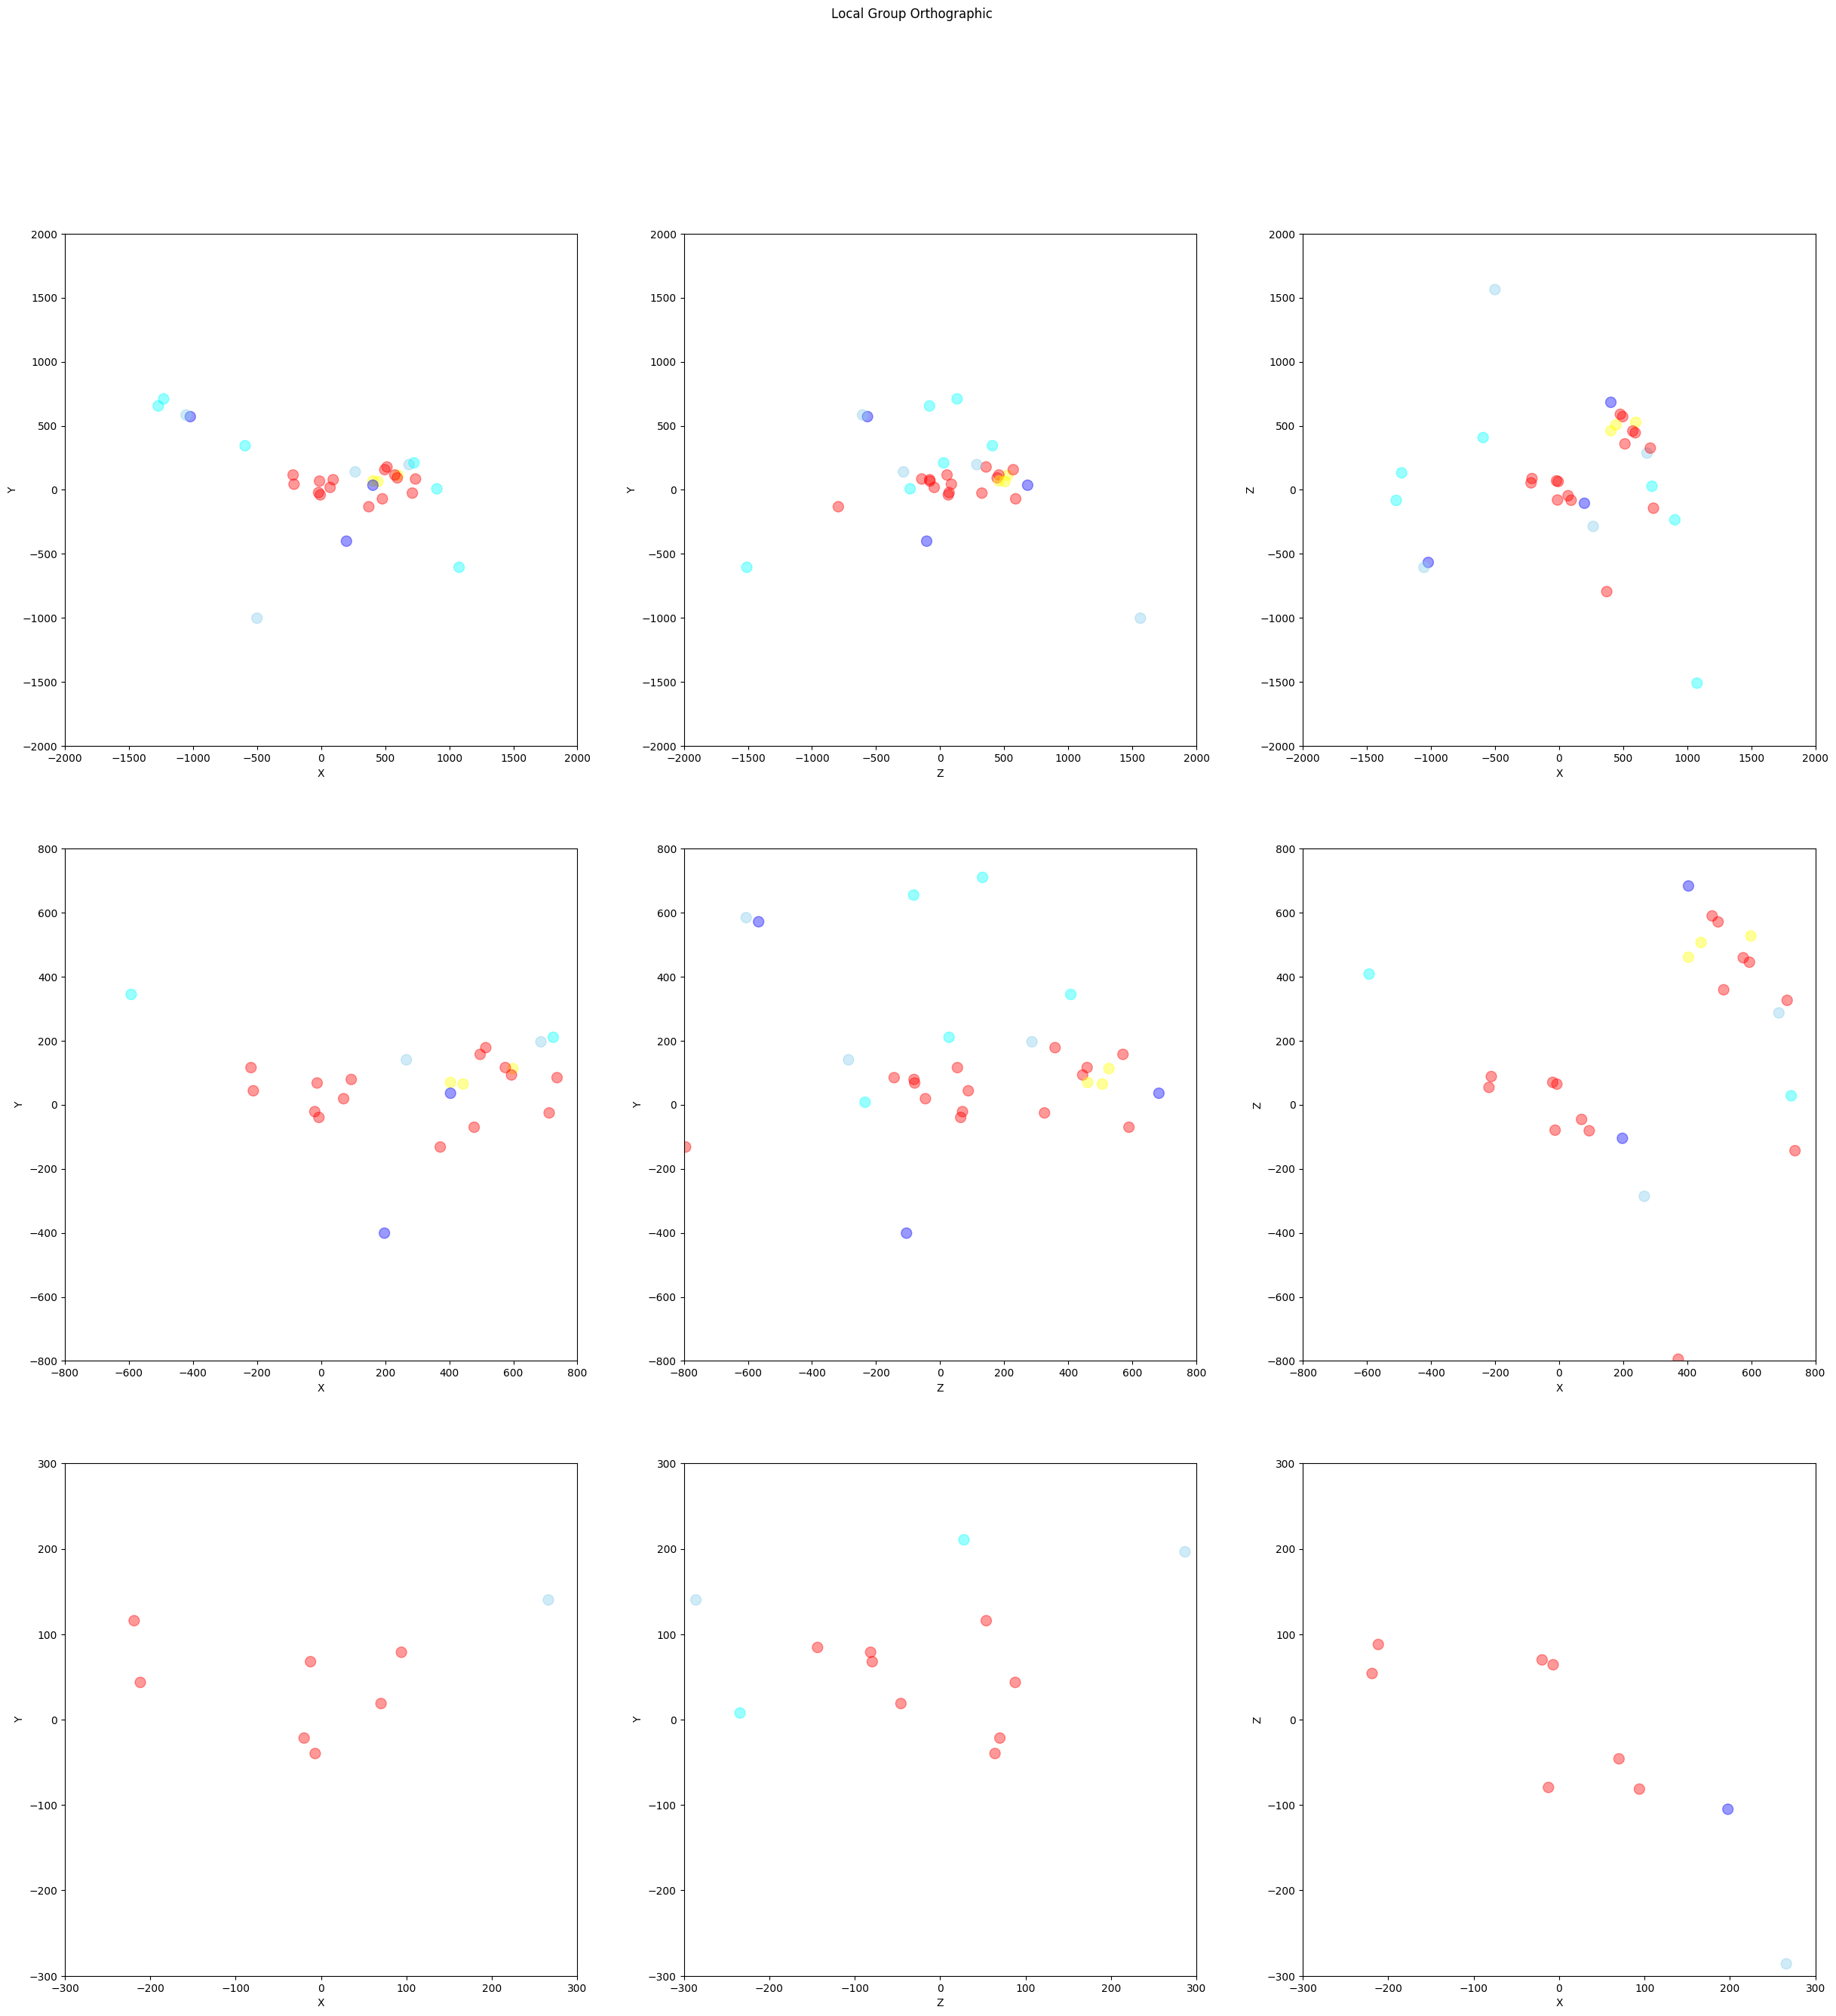

In [206]:
df = gals_merged[(gals_merged['GalaxyName'] != 'SMC') & (gals_merged['GalaxyName'] != 'LMC')]
df = df[df['mw_dist'] < 2000]

df = df[df['GalaxyType'].notnull()]
df = df.reindex()

color_dict = {'unknown':'grey','dSph':'red', 'E2':'yellow', 'dE5':'yellow', 'dTrans':'skyblue','dI':'cyan','Irr':'blue','dE3p':'yellow'}

df['galaxy_type_color'] = df['GalaxyType']
df['galaxy_type_color'] = ['unknown' if x is np.nan else x for x in df['galaxy_type_color']]
df['galaxy_type_color'] = ['unknown' if x is 'nan' else x for x in df['galaxy_type_color']]
df['galaxy_type_color'] = df['galaxy_type_color'].apply(lambda x: color_dict[x])

colors = df['galaxy_type_color']

detected = df[df['MHI_type'] == 'detected_mass']
limits = df[df['MHI_type'] == 'upper_limit']

plt.style.use('default')

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 8}

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(3, 3,figsize=(30,30))


fig.suptitle('Local Group Orthographic')

scale1 = 2000
scale2 = 800
scale3 = 300
cmap = 'plasma'
use_labels = False
size = 100

detected_color_values = plt.cm.viridis(detected['MHI_computed']/10e7)
limits_color_values = plt.cm.viridis(limits['MHI_computed']/10e7)
alpha_value = 0.4
s=50

ax1.set_xlim(-1*scale1,scale1)
ax1.set_ylim(-1*scale1,scale1)
#ax1.scatter(detected['X'],detected['Y'],alpha=alpha_value,facecolor=detected_color_values,edgecolor=detected_color_values)
#ax1.scatter(limits['X'],limits['Y'],alpha=alpha_value,facecolor='none',edgecolor = limits_color_values)
ax1.scatter(df['X'],df['Y'],alpha=alpha_value,color=colors,s=size)
ax1.set_aspect(1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
#ax1.plot(df[df['GalaxyName'] == '#TheGalaxy']['X'],df[df['GalaxyName'] == '#TheGalaxy']['Y'],'ro')
#ax1.annotate('MW',(df[df['GalaxyName'] == '#TheGalaxy']['X'].item(),df[df['GalaxyName'] == '#TheGalaxy']['Y'].item()))

if(use_labels == True):
    for i, txt in enumerate(df['GalaxyName']):
        label = df['GalaxyName'].iat[i]
        label_x = df['X'].iat[i]
        label_y = df['Y'].iat[i]
        if((label_x < scale1) & (label_x > -scale1) & (label_y < scale1) & (label_y > -scale1)):
            ax1.annotate(label,(label_x,label_y))
    

ax2.set_xlim(-1*scale1,scale1)
ax2.set_ylim(-1*scale1,scale1)
ax2.set_xlabel('Z')
ax2.set_ylabel('Y')
ax2.scatter(df['Z'],df['Y'],alpha=alpha_value,color=colors,s=size)
ax2.set_aspect(1)
if(use_labels == True):
    for i, txt in enumerate(df['GalaxyName']):
        label = df['GalaxyName'].iat[i]
        label_x = df['Z'].iat[i]
        label_y = df['Y'].iat[i]
        if((label_x < scale1) & (label_x > -scale1) & (label_y < scale1) & (label_y > -scale1)):
            ax2.annotate(label,(label_x,label_y))


ax3.set_xlim(-1*scale1,scale1)
ax3.set_ylim(-1*scale1,scale1)
ax3.scatter(df['X'],df['Z'],alpha=alpha_value,color=colors,s=size)
ax3.set_aspect(1)
ax3.set_xlabel('X')
ax3.set_ylabel('Z')
if(use_labels == True):
    for i, txt in enumerate(df['GalaxyName']):
        label = df['GalaxyName'].iat[i]
        label_x = df['X'].iat[i]
        label_y = df['Z'].iat[i]
        if((label_x < scale1) & (label_x > -scale1) & (label_y < scale1) & (label_y > -scale1)):
            ax3.annotate(label,(label_x,label_y))


ax4.set_xlim(-1*scale2,scale2)
ax4.set_ylim(-1*scale2,scale2)
ax4.scatter(df['X'],df['Y'],alpha=alpha_value,color=colors,s=size)
ax4.set_aspect(1)
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
if(use_labels == True):
    for i, txt in enumerate(df['GalaxyName']):
        label = df['GalaxyName'].iat[i]
        label_x = df['X'].iat[i]
        label_y = df['Y'].iat[i]
        if((label_x < scale2) & (label_x > -scale2) & (label_y < scale2) & (label_y > -scale2)):
            ax4.annotate(label,(label_x,label_y))

ax5.set_xlim(-1*scale2,scale2)
ax5.set_ylim(-1*scale2,scale2)
ax5.set_xlabel('Z')
ax5.set_ylabel('Y')
ax5.scatter(df['Z'],df['Y'],alpha=alpha_value,color=colors,s=size)
ax5.set_aspect(1)
if(use_labels == True):
    for i, txt in enumerate(df['GalaxyName']):
        label = df['GalaxyName'].iat[i]
        label_x = df['Z'].iat[i]
        label_y = df['Y'].iat[i]
        if((label_x < scale2) & (label_x > -scale2) & (label_y < scale2) & (label_y > -scale2)):
            ax5.annotate(label,(label_x,label_y))


ax6.set_xlim(-1*scale2,scale2)
ax6.set_ylim(-1*scale2,scale2)
ax6.scatter(df['X'],df['Z'],alpha=alpha_value,color=colors,s=size)
ax6.set_aspect(1)
ax6.set_xlabel('X')
ax6.set_ylabel('Z')
if(use_labels == True):
    for i, txt in enumerate(df['GalaxyName']):
        label = df['GalaxyName'].iat[i]
        label_x = df['X'].iat[i]
        label_y = df['Z'].iat[i]
        if((label_x < scale2) & (label_x > -scale2) & (label_y < scale2) & (label_y > -scale2)):
            ax6.annotate(label,(label_x,label_y))

ax7.set_xlim(-1*scale3,scale3)
ax7.set_ylim(-1*scale3,scale3)
ax7.scatter(df['X'],df['Y'],alpha=alpha_value,color=colors,s=size)
ax7.set_aspect(1)
ax7.set_xlabel('X')
ax7.set_ylabel('Y')
if(use_labels == True):
    for i, txt in enumerate(df['GalaxyName']):
        label = df['GalaxyName'].iat[i]
        label_x = df['X'].iat[i]
        label_y = df['Y'].iat[i]
        if((label_x < scale3) & (label_x > -scale3) & (label_y < scale3) & (label_y > -scale3)):
            ax7.annotate(label,(label_x,label_y))

ax8.set_xlim(-1*scale3,scale3)
ax8.set_ylim(-1*scale3,scale3)
ax8.set_xlabel('Z')
ax8.set_ylabel('Y')
ax8.scatter(df['Z'],df['Y'],alpha=alpha_value,color=colors,s=size)
ax8.set_aspect(1)
if(use_labels == True):
    for i, txt in enumerate(df['GalaxyName']):
        label = df['GalaxyName'].iat[i]
        label_x = df['Z'].iat[i]
        label_y = df['Y'].iat[i]
        if((label_x < scale3) & (label_x > -scale3) & (label_y < scale3) & (label_y > -scale3)):
            ax8.annotate(label,(label_x,label_y))


ax9.set_xlim(-1*scale3,scale3)
ax9.set_ylim(-1*scale3,scale3)
ax9.scatter(df['X'],df['Z'],alpha=alpha_value,color=colors,s=size)
ax9.set_aspect(1)
ax9.set_xlabel('X')
ax9.set_ylabel('Z')
if(use_labels == True):
    for i, txt in enumerate(df['GalaxyName']):
        label = df['GalaxyName'].iat[i]
        label_x = df['X'].iat[i]
        label_y = df['Z'].iat[i]
        if((label_x < scale3) & (label_x > -scale3) & (label_y < scale3) & (label_y > -scale3)):
            ax9.annotate(label,(label_x,label_y))

plt.show()

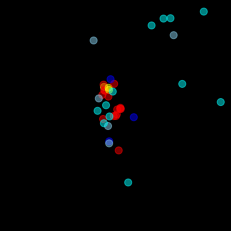

In [208]:
df = gals_merged[(gals_merged['GalaxyName'] != 'SMC') & (gals_merged['GalaxyName'] != 'LMC')]
df = df[df['GalaxyType'].notnull()]
df = df.reindex()

#df.loc[df['MHI_type'] == 'upper_limit', 'MHI_type'] = 'red'
#df.loc[df['MHI_type'] == 'detected_mass', 'MHI_type'] = 'skyblue'
#df.loc[df['MHI_type'].isnull(), 'MHI_type'] = 'grey'


#df.loc[df['MHI_type'] == 'upper_limit', 'MHI_type'] = 'yellow'
#df.loc[df['MHI_type'] == 'detected_mass', 'MHI_type'] = 'yellow'
#df.loc[df['MHI_type'].isnull(), 'MHI_type'] = 'yellow'

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
X = df['X']
Y = df['Y']
Z = df['Z']

scale = 1200

ax.set_xlim(-1*scale,scale)
ax.set_ylim(-1*scale,scale)
ax.set_zlim(-1*scale,scale)

ax.set_aspect(1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.w_xaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
ax.w_yaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
ax.w_zaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))

ax._axis3don = False
cmap='plasma'
#ax.scatter(X, Y, Z,s=20,alpha=1,c=np.log(df['rh(\')']),edgecolor='')

#[nan, 'Irr', 'dSph', 'E2', 'dE5', 'dE3p', 'dTrans', 'dI']
colors = {'unknown':'grey','dSph':'red', 'E2':'yellow', 'dE5':'yellow', 'dTrans':'skyblue','dI':'cyan','Irr':'blue','dE3p':'yellow'}

df['galaxy_type_color'] = df['GalaxyType']
df['galaxy_type_color'] = ['unknown' if x is np.nan else x for x in df['galaxy_type_color']]
df['galaxy_type_color'] = ['unknown' if x is 'nan' else x for x in df['galaxy_type_color']]
df['galaxy_type_color'] = df['galaxy_type_color'].apply(lambda x: colors[x])

plt.style.use('dark_background')

ax.scatter(X, Y, Z,s=50,alpha=0.5,color=df['galaxy_type_color'])

ax.view_init(0, 160)
plt.draw()
plt.pause(.001)

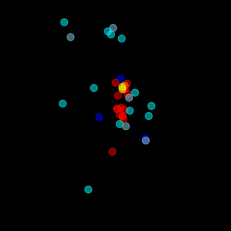

In [100]:
df = gals_merged[(gals_merged['GalaxyName'] != 'SMC') & (gals_merged['GalaxyName'] != 'LMC')]
df = df[df['GalaxyType'].notnull()]
df = df.reindex()

#df.loc[df['MHI_type'] == 'upper_limit', 'MHI_type'] = 'red'
#df.loc[df['MHI_type'] == 'detected_mass', 'MHI_type'] = 'skyblue'
#df.loc[df['MHI_type'].isnull(), 'MHI_type'] = 'grey'


#df.loc[df['MHI_type'] == 'upper_limit', 'MHI_type'] = 'yellow'
#df.loc[df['MHI_type'] == 'detected_mass', 'MHI_type'] = 'yellow'
#df.loc[df['MHI_type'].isnull(), 'MHI_type'] = 'yellow'

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
X = df['X']
Y = df['Y']
Z = df['Z']

scale = 1200

ax.set_xlim(-1*scale,scale)
ax.set_ylim(-1*scale,scale)
ax.set_zlim(-1*scale,scale)

ax.set_aspect(1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.w_xaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
ax.w_yaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
ax.w_zaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))

ax._axis3don = False
cmap='plasma'
#ax.scatter(X, Y, Z,s=20,alpha=1,c=np.log(df['rh(\')']),edgecolor='')

#[nan, 'Irr', 'dSph', 'E2', 'dE5', 'dE3p', 'dTrans', 'dI']
colors = {'unknown':'grey','dSph':'red', 'E2':'yellow', 'dE5':'yellow', 'dTrans':'skyblue','dI':'cyan','Irr':'blue','dE3p':'yellow'}

df['galaxy_type_color'] = df['GalaxyType']
df['galaxy_type_color'] = ['unknown' if x is np.nan else x for x in df['galaxy_type_color']]
df['galaxy_type_color'] = ['unknown' if x is 'nan' else x for x in df['galaxy_type_color']]
df['galaxy_type_color'] = df['galaxy_type_color'].apply(lambda x: colors[x])

plt.style.use('dark_background')

ax.scatter(X, Y, Z,s=50,alpha=0.5,color=df['galaxy_type_color'])

angle1 = np.arange(0,360,0.5)

i=0
for a in angle1:
    i=i+1
    ax.view_init(0, a)
    plt.draw()
    filename = './movies/LG_movie' + str(i) + '.png'
    plt.savefig(filename)
    
plt.show()

In [ ]:
df = gals_merged[(gals_merged['GalaxyName'] != 'SMC') & (gals_merged['GalaxyName'] != 'LMC')]
df = df[df['GalaxyType'].notnull()]
df = df.reindex()

#df.loc[df['MHI_type'] == 'upper_limit', 'MHI_type'] = 'red'
#df.loc[df['MHI_type'] == 'detected_mass', 'MHI_type'] = 'skyblue'
#df.loc[df['MHI_type'].isnull(), 'MHI_type'] = 'grey'


#df.loc[df['MHI_type'] == 'upper_limit', 'MHI_type'] = 'yellow'
#df.loc[df['MHI_type'] == 'detected_mass', 'MHI_type'] = 'yellow'
#df.loc[df['MHI_type'].isnull(), 'MHI_type'] = 'yellow'

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
X = df['X']
Y = df['Y']
Z = df['Z']

scale = 1200

ax.set_xlim(-1*scale,scale)
ax.set_ylim(-1*scale,scale)
ax.set_zlim(-1*scale,scale)

ax.set_aspect(1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.w_xaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
ax.w_yaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))
ax.w_zaxis.set_pane_color((0.8, 0.8, 0.8, 1.0))

ax._axis3don = False
cmap='plasma'
#ax.scatter(X, Y, Z,s=20,alpha=1,c=np.log(df['rh(\')']),edgecolor='')

#[nan, 'Irr', 'dSph', 'E2', 'dE5', 'dE3p', 'dTrans', 'dI']
colors = {'unknown':'grey','dSph':'red', 'E2':'yellow', 'dE5':'yellow', 'dTrans':'skyblue','dI':'cyan','Irr':'blue','dE3p':'yellow'}

df['galaxy_type_color'] = df['GalaxyType']
df['galaxy_type_color'] = ['unknown' if x is np.nan else x for x in df['galaxy_type_color']]
df['galaxy_type_color'] = ['unknown' if x is 'nan' else x for x in df['galaxy_type_color']]
df['galaxy_type_color'] = df['galaxy_type_color'].apply(lambda x: colors[x])

plt.style.use('dark_background')

ax.scatter(X, Y, Z,s=50,alpha=0.5,color=df['galaxy_type_color'])

angle1 = np.arange(0,360,0.5)

#i=0
#for a in angle1:
#    i=i+1
ax.view_init(0, a)
plt.draw()
#filename = './movies/LG_movie' + str(i) + '.png'
#plt.savefig(filename)
    
plt.show()

In [ ]:
import pandas as pd, numpy as np, random
import matplotlib.pyplot as plt, matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import IPython.display as IPdisplay
import glob
from PIL import Image as PIL_Image
from images2gif import writeGif

points = [gals_merged['X'], gals_merged['Y'],gals_merged['Z']]

gif_filename = '3d-phase-diagram-chaos-vs-random'
fig, ax = 

ax.elev = 89.9
ax.azim = 270.1
ax.dist = 11.0

for n in range(0, 100):
    if n >= 20 and n <= 22: ax.set_xlabel('') ax.set_ylabel('') #don't show axis labels while we move around, it looks weird ax.elev = ax.elev-0.5 #start by panning down slowly if n >= 23 and n <= 36: ax.elev = ax.elev-1.0 #pan down faster if n >= 37 and n <= 60: ax.elev = ax.elev-1.5 ax.azim = ax.azim+1.1 #pan down faster and start to rotate if n >= 61 and n <= 64: ax.elev = ax.elev-1.0 ax.azim = ax.azim+1.1 #pan down slower and rotate same speed if n >= 65 and n <= 73: ax.elev = ax.elev-0.5 ax.azim = ax.azim+1.1 #pan down slowly and rotate same speed if n >= 74 and n <= 76:
        ax.elev = ax.elev-0.2
        ax.azim = ax.azim+0.5 #end by panning/rotating slowly to stopping position
    if n = 77: #add axis labels at the end, when the plot isn't moving around
        ax.set_xlabel('Population (t)')
        ax.set_ylabel('Population (t + 1)')
        ax.set_zlabel('Population (t + 2)')
    fig.suptitle(u'3-D Poincaré Plot, chaos vs random', fontsize=12, x=0.5, y=0.85)
    plt.savefig('images/' + gif_filename + '/img' + str(n).zfill(3) + '.png',
                bbox_inches='tight')
    
plt.close()
images = [PIL_Image.open(image) for image in glob.glob('images/' + gif_filename + '/*.png')]
file_path_name = 'images/' + gif_filename + '.gif'
writeGif(file_path_name, images, duration=0.1)
IPdisplay.Image(url=file_path_name)

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


KeyError: ''

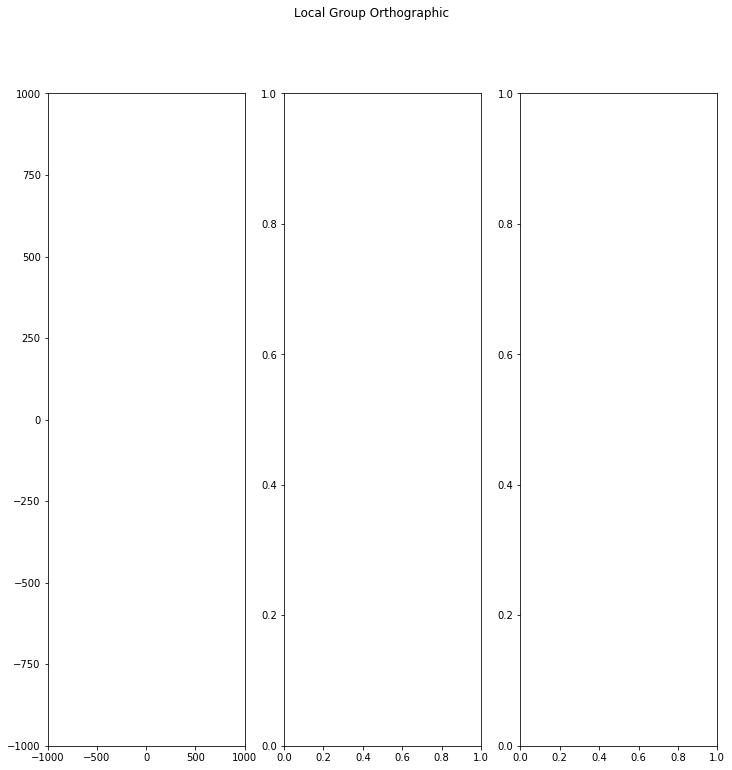

In [118]:
df = gals_merged[(gals_merged['GalaxyName'] != 'SMC') & (gals_merged['GalaxyName'] != 'LMC')]
df.loc[df['MHI_type'] == 'upper_limit', 'MHI_type'] = 'red'
df.loc[df['MHI_type'] == 'detected_mass', 'MHI_type'] = 'blue'
df.loc[df['MHI_type'].isnull(), 'MHI_type'] = 'grey'



fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(12,12))
fig.suptitle('Local Group Orthographic')

scale = 1000

ax1.set_xlim(-1*scale,scale)
ax1.set_ylim(-1*scale,scale)

ax1.scatter(df['X'],df['Y'],alpha=0.2,c=df[''])
ax1.set_aspect(1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

ax2.set_xlim(-1*scale,scale)
ax2.set_ylim(-1*scale,scale)
ax2.set_xlabel('Z')
ax2.set_ylabel('Y')

ax2.scatter(df['Z'],df['Y'],alpha=0.2,c=df['MHI_type'])
ax2.set_aspect(1)


ax3.set_xlim(-1*scale,scale)
ax3.set_ylim(-1*scale,scale)
ax3.scatter(df['X'],df['Z'],alpha=0.2,c=df['MHI_type'])
ax3.set_aspect(1)
ax3.set_xlabel('X')
ax3.set_ylabel('Z')

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Text(0, 0.5, 'Z')

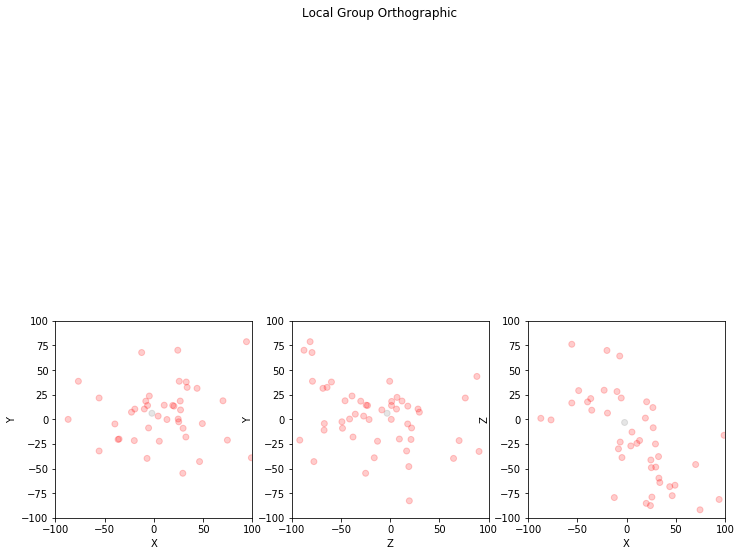

In [119]:
df = gals_merged[(gals_merged['GalaxyName'] != 'SMC') & (gals_merged['GalaxyName'] != 'LMC')]
df.loc[df['MHI_type'] == 'upper_limit', 'MHI_type'] = 'red'
df.loc[df['MHI_type'] == 'detected_mass', 'MHI_type'] = 'blue'
df.loc[df['MHI_type'].isnull(), 'MHI_type'] = 'grey'



fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(12,12))
fig.suptitle('Local Group Orthographic')

scale = 100

ax1.set_xlim(-1*scale,scale)
ax1.set_ylim(-1*scale,scale)

ax1.scatter(df['X'],df['Y'],alpha=0.2,c=df['MHI_type'])
ax1.set_aspect(1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

ax2.set_xlim(-1*scale,scale)
ax2.set_ylim(-1*scale,scale)
ax2.set_xlabel('Z')
ax2.set_ylabel('Y')

ax2.scatter(df['Z'],df['Y'],alpha=0.2,c=df['MHI_type'])
ax2.set_aspect(1)


ax3.set_xlim(-1*scale,scale)
ax3.set_ylim(-1*scale,scale)
ax3.scatter(df['X'],df['Z'],alpha=0.2,c=df['MHI_type'])
ax3.set_aspect(1)
ax3.set_xlabel('X')
ax3.set_ylabel('Z')

Text(0, 0.5, 'Z')

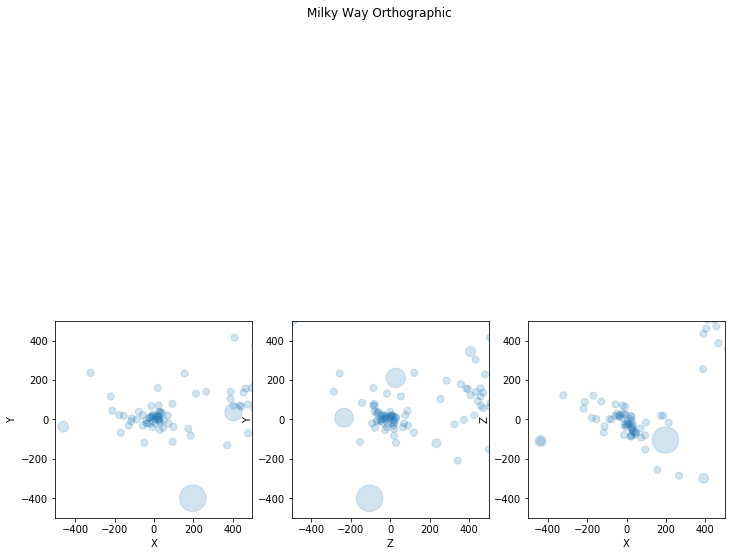

In [120]:
df = gals_merged[(gals_merged['GalaxyName'] != 'SMC') & (gals_merged['GalaxyName'] != 'LMC')]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(12,12))
fig.suptitle('Milky Way Orthographic')

scale = 500

ax1.set_xlim(-1*scale,scale)
ax1.set_ylim(-1*scale,scale)

ax1.scatter(df['X'],df['Y'],alpha=0.2,s=(50*(df['MHI_computed']/10**7)+50))
ax1.set_aspect(1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

ax2.set_xlim(-1*scale,scale)
ax2.set_ylim(-1*scale,scale)
ax2.set_xlabel('Z')
ax2.set_ylabel('Y')

ax2.scatter(df['Z'],df['Y'],alpha=0.2,s=(50*(df['MHI_computed']/10**7)+50))
ax2.set_aspect(1)


ax3.set_xlim(-1*scale,scale)
ax3.set_ylim(-1*scale,scale)
ax3.scatter(df['X'],df['Z'],alpha=0.2,s=(50*(df['MHI_computed']/10**7)+50))
ax3.set_aspect(1)
ax3.set_xlabel('X')
ax3.set_ylabel('Z')

578.6318634442164


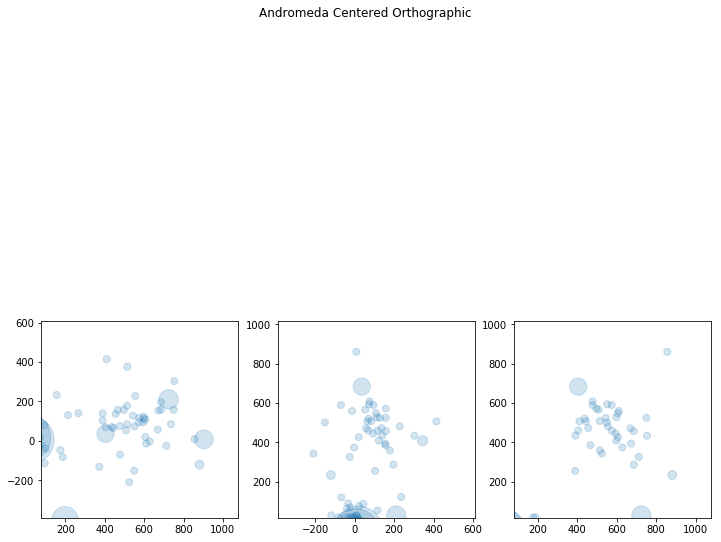

In [121]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(12,12))
fig.suptitle('Andromeda Centered Orthographic')

scale = 500


print(gals_merged[gals_merged['GalaxyName'] == '#Andromeda'][axis1].item())

andromeda_x = gals_merged[gals_merged['GalaxyName'] == '#Andromeda']['X'].item()
andromeda_y = gals_merged[gals_merged['GalaxyName'] == '#Andromeda']['Y'].item()
andromeda_z = gals_merged[gals_merged['GalaxyName'] == '#Andromeda']['Z'].item()

ax1.set_xlim(andromeda_x-scale,andromeda_x+scale)
ax1.set_ylim(andromeda_y-scale,andromeda_y+scale)

ax1.scatter(gals_merged['X'],gals_merged['Y'],alpha=0.2,s=(50*(gals_merged['MHI_computed']/10**7)+50))
ax1.set_aspect(1)

ax2.set_xlim(andromeda_y-scale,andromeda_y+scale)
ax2.set_ylim(andromeda_z-scale,andromeda_z+scale)
ax2.scatter(gals_merged['Y'],gals_merged['Z'],alpha=0.2,s=(50*(gals_merged['MHI_computed']/10**7)+50))
ax2.set_aspect(1)


ax3.set_xlim(andromeda_x-scale,andromeda_x+scale)
ax3.set_ylim(andromeda_z-scale,andromeda_z+scale)
ax3.scatter(gals_merged['X'],gals_merged['Z'],alpha=0.2,s=(50*(gals_merged['MHI_computed']/10**7)+50))
ax3.set_aspect(1)

# Nearest other dwarf

# Classification: has gas or doesn't have gas (limit)

In [396]:
galaxies = gals_merged[['dist_pc','min_dist_mw_or_m31','orb_pericenter','orb_apocenter','orb_eccentricity','orb_period','rh(\')','M_V','ell_surf_dist','M_dyn','vsig_s','vrot_s','muVo','vh(km/s)','MHI_type']]

In [554]:
galaxies = gals_merged[['dist_pc','min_dist_mw_or_m31','orb_pericenter','orb_apocenter','orb_eccentricity','orb_period','rh(\')','M_V','ell_surf_dist','M_dyn','muVo','vh(km/s)','tau_90','MHI_type']]

In [555]:
galaxies.loc[galaxies['MHI_type'] == 'upper_limit', 'MHI_type'] = 0
galaxies.loc[galaxies['MHI_type'] == 'detected_mass', 'MHI_type'] = 1

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [563]:
galaxies = galaxies[galaxies['MHI_type'].notnull()]
galaxies = galaxies[galaxies['tau_90'].notnull()]

In [570]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = galaxies[['dist_pc','min_dist_mw_or_m31','orb_pericenter','orb_apocenter','orb_eccentricity','orb_period','rh(\')','M_V','ell_surf_dist','M_dyn','muVo','vh(km/s)']]
X = np.nan_to_num(X)
X = StandardScaler().fit_transform(X)

y = galaxies['MHI_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train, y_train = make_classification(n_features=12, random_state=42)

clf = LinearSVC(random_state=42, tol=1e-5)
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)

In [571]:
score = clf.score(X_test, y_test)
score

ValueError: Classification metrics can't handle a mix of unknown and binary targets

In [559]:
print(clf.coef_)

[[-0.09916649  0.07224272  1.51373043 -0.82701209 -0.57735664 -0.06036713
  -0.15284417  0.1726932  -0.08230427  0.24525431 -0.05365397  0.05345477
  -1.04213465]]


In [463]:
print(clf.intercept_)

[-0.09785225]


Choose support vector classifier due to this being a classification problem with a small number of samples for which labels exist. Rule of thumb is to have about 10x times the number of features, which we do. The goal is to predict if a dwarf galaxy is detected in HI. Of course the value of the upper limit depends on the physical parameters and therefore.

# ALFALFA Limits

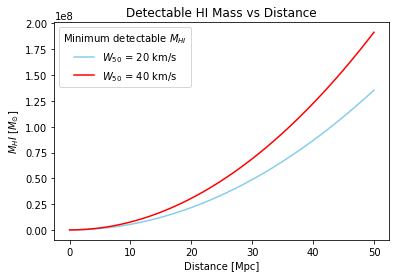

In [278]:
D_Mpc = np.arange(0,50.0,0.01)

M_HI_20 = 2.356e5*(D_Mpc**2)*(20.0/np.sqrt(20.0/20.0))*5*2.3/1000.0
M_HI_40 = 2.356e5*(D_Mpc**2)*(40.0/np.sqrt(40.0/20.0))*5*2.3/1000.0

plt.title('Detectable HI Mass vs Distance')
plt.xlabel('Distance [Mpc]')
plt.ylabel('$M_HI$ [$M_{\odot}$]')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

#plt.plot(D_Mpc*1000.0,M_HI_10)
plt.plot(D_Mpc,M_HI_20,label='$W_{50}$ = 20 km/s',c='skyblue')
plt.plot(D_Mpc,M_HI_40,label='$W_{50}$ = 40 km/s',c='red')
plt.legend(title= 'Minimum detectable $M_{HI}$',loc='upper left')

#plt.fill_between(D_Mpc,M_HI_20,1e7, facecolor = 'skyblue',alpha=0.2)
#plt.fill_between(D_Mpc,M_HI_40,1e7, facecolor='red', alpha=0.2)

In [126]:
df = gals_merged[gals_merged['vsig_g'].notnull()]
len(df)

34

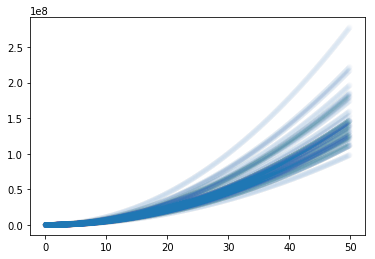

In [264]:
D_Mpc = np.arange(0,50.0,0.05)
df = gals_merged[gals_merged['vsig_g'].notnull()]

HI_masslim = []
D = []

#for each distance, sample a bunch from the distribution of W_50
for i in range(0,len(D_Mpc)-1):
    for j, row in df.iterrows():
        W_50 = 2.355*df['vsig_g'][j]
        D.append(D_Mpc[i])
        HI_masslim.append(2.356e5*(D_Mpc[i]**2)*(W_50/np.sqrt(W_50/20.0))*5*2.3/1000.0)
plt.scatter(D,HI_masslim,alpha=0.01,edgecolor='')


In [164]:
def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins)
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False )

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z, **kwargs )
    return ax

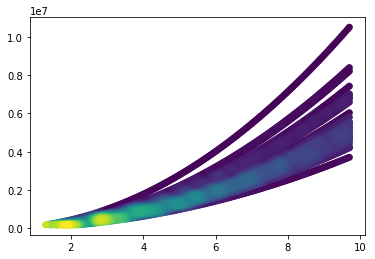

In [165]:
from scipy.interpolate import interpn

D_Mpc = np.arange(0,10.0,0.05)
df = gals_merged[gals_merged['vsig_g'].notnull()]

HI_masslim = []
D = []

#for each distance, sample a bunch from the distribution of W_50
for i in range(0,len(D_Mpc)-1):
    for j, row in df.iterrows():
        W_50 = 2.355*df['vsig_g'][j]
        D.append(D_Mpc[i])
        HI_masslim.append(2.356e5*(D_Mpc[i]**2)*(W_50/np.sqrt(W_50/20.0))*5*2.3/1000.0)
x = np.array(D)
y = np.array(HI_masslim)

density_scatter(x , y, sort = True, bins=[30,30])

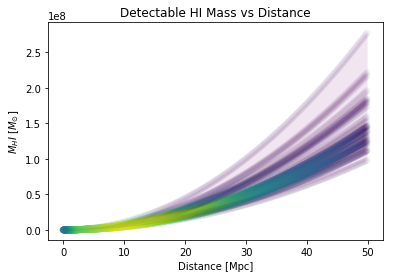

In [279]:
from scipy.stats import gaussian_kde

D_Mpc = np.arange(0,50.0,0.05)
df = gals_merged[gals_merged['vsig_g'].notnull()]

HI_masslim = []
D = []
min_w50 = 2.355*min(df['vsig_g'])
max_w50 = 2.355*max(df['vsig_g'])

MHI_min_w50 = 2.356e5*(D_Mpc**2)*(min_w50/np.sqrt(min_w50/20.0))*5*2.3/1000.0
MHI_max_w50 = 2.356e5*(D_Mpc**2)*(max_w50/np.sqrt(max_w50/20.0))*5*2.3/1000.0

#for each distance, sample a bunch from the distribution of W_50
for i in range(0,len(D_Mpc)-1):
    for j, row in df.iterrows():
        W_50 = 2.355*df['vsig_g'][j]
        D.append(D_Mpc[i])
        HI_masslim.append(2.356e5*(D_Mpc[i]**2)*(W_50/np.sqrt(W_50/20.0))*5*2.3/1000.0)
x = np.array(D)
y = np.array(HI_masslim)

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots()

ax.title('Detectable HI Mass vs Distance')
ax.xlabel('Distance [Mpc]')
ax.ylabel('$M_HI$ [$M_{\odot}$]')

ax.scatter(x, y, c=z, alpha=0.01,s=50, edgecolor='')
ax.plot(D_Mpc,MHI_min_w50,color='purple',alpha=0.01)
ax.plot(D_Mpc,MHI_max_w50,color='purple',alpha=0.01)
ax.fill_between(D_Mpc,MHI_min_w50,MHI_max_w50,facecolor ='purple',alpha=0.1)
plt.show()

(0, 50)

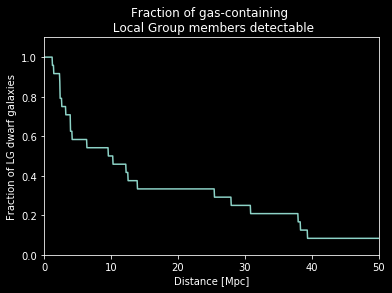

In [402]:
D_Mpc = np.arange(0,50.0,0.05)
df = gals_merged[gals_merged['MHI_type'] == 'detected_mass']
df = df[df['mw_dist'] < 2000]
df = df[(df['GalaxyName'] != 'SMC') & (df['GalaxyName'] != 'LMC')]


df = df.reindex()

frac_detected = np.zeros(len(D_Mpc))

#print(len(df['GalaxyName']))
#assumes all dwarfs at same distance, dwarfs without known vsig_g have W_50 = 20.0

for i in range(0,len(D_Mpc)):
    total = 0
    count = 0
    for j, row in df.iterrows():
        total = total + 1
        if(df['vsig_g'][j] > 0):
            W_50 = 2.355*df['vsig_g'][j]
        else:
            W_50 = 20.0
        #D_gal = 
        HI_masslim = 2.356e5*(D_Mpc[i]**2)*(W_50/np.sqrt(W_50/20.0))*5*2.3/1000.0
        if(df['MHI_computed'][j] > HI_masslim):
            count = count + 1
        #print(HI_masslim,df['MHI_computed'][j],count,total)        
    frac_detected[i] = count/total
       
        
plt.title('Fraction of gas-containing \n Local Group members detectable')
plt.xlabel('Distance [Mpc]')
plt.ylabel('Fraction of LG dwarf galaxies')
plt.plot(D_Mpc,frac_detected)
plt.ylim(0,1.1)
plt.xlim(0,50)

In [ ]:
gals_merged[gals_merged['GalaxyName'] == '#TheGalaxy']['dist_kpc'].item()

-5.441684496167129e+16 -868964500206180.9 -482463935707733.75


(0, 50)

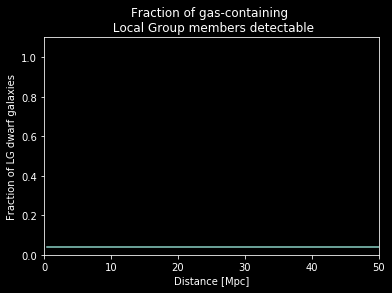

In [422]:
D_Mpc = np.arange(0.5,50.0,0.05)
df = gals_merged[gals_merged['MHI_type'] == 'detected_mass']
df = df[df['mw_dist'] < 2000]
df = df[(df['GalaxyName'] != 'SMC') & (df['GalaxyName'] != 'LMC')]


df = df.reindex()

frac_detected = np.zeros(len(D_Mpc))

#print(len(df['GalaxyName']))
#assumes all dwarfs at same distance, dwarfs without known vsig_g have W_50 = 20.0

mw_x = (gals_merged[gals_merged['GalaxyName'] == '#TheGalaxy']['X'].item())
mw_y = (gals_merged[gals_merged['GalaxyName'] == '#TheGalaxy']['Y'].item())/1000.0
mw_z = (gals_merged[gals_merged['GalaxyName'] == '#TheGalaxy']['Z'].item())/1000.0

print(mw_x,mw_y,mw_z)

for i in range(0,len(D_Mpc)):
    total = 0
    count = 0
    for j, row in df.iterrows():
        total = total + 1
        if(df['vsig_g'][j] > 0):
            W_50 = 2.355*df['vsig_g'][j]
        else:
            W_50 = 20.0
        
        x_dist = (df['X'][j]-mw_x)/1000.0
        y_dist = (df['Y'][j]-mw_y)/1000.0
        z_dist = (df['Z'][j]-mw_z)/1000.0
        
        HI_masslim_x = 2.356e5*(((D_Mpc[i]-x_dist)**2)*(W_50/np.sqrt(W_50/20.0))*5*2.3/1000.0)
        HI_masslim_y = 2.356e5*(((D_Mpc[i]-y_dist)**2)*(W_50/np.sqrt(W_50/20.0))*5*2.3/1000.0)
        HI_masslim_z = 2.356e5*(((D_Mpc[i]-z_dist)**2)*(W_50/np.sqrt(W_50/20.0))*5*2.3/1000.0)

        if(df['MHI_computed'][j] > HI_masslim):
            count = count + 1
        #print(HI_masslim,df['MHI_computed'][j],count,total)        
    frac_detected[i] = count/total
       
        
plt.title('Fraction of gas-containing \n Local Group members detectable')
plt.xlabel('Distance [Mpc]')
plt.ylabel('Fraction of LG dwarf galaxies')
plt.plot(D_Mpc,frac_detected)
plt.ylim(0,1.1)
plt.xlim(0,50)

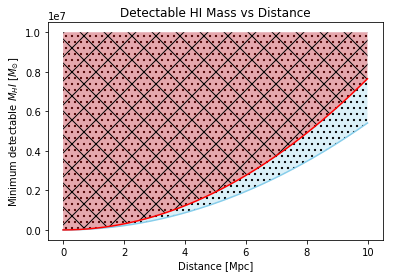

In [289]:
D_Mpc = np.arange(0,10.0,0.01)

M_HI_20 = 2.356e5*(D_Mpc**2)*(20.0/np.sqrt(20.0/20.0))*5*2.3/1000.0
M_HI_40 = 2.356e5*(D_Mpc**2)*(40.0/np.sqrt(40.0/20.0))*5*2.3/1000.0

plt.title('Detectable HI Mass vs Distance')
plt.xlabel('Distance [Mpc]')
plt.ylabel('Minimum detectable $M_HI$ [$M_{\odot}$]')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

#plt.plot(D_Mpc*1000.0,M_HI_10)
plt.plot(D_Mpc,M_HI_20,label='$W_{50}$ = 20 km/s',color='skyblue')
plt.plot(D_Mpc,M_HI_40,label='$W_{50}$ = 40 km/s',color='red')
#plt.legend(loc='upper left')


plt.fill_between(D_Mpc,M_HI_20,1e7, hatch = '..', facecolor = 'skyblue',alpha=0.3)
plt.fill_between(D_Mpc,M_HI_40,1e7, hatch = 'x', facecolor='red', alpha=0.3)

# KMeans experiment

In [146]:
list(gals_merged.columns)

['GalaxyName',
 'RA_hr',
 'RA_min',
 'RA_sec',
 'Dec_deg',
 'Dec_arcmin',
 'Dec_arcsec',
 'EB-V',
 'm-M',
 'm-M_err_pos',
 'm-M_err_neg',
 'vh(km/s)',
 'Vmag',
 'Vmag_err_pos',
 'Vmag_err_neg',
 'PA',
 'e=1-b/a',
 'muVo',
 "rh(')",
 'rh_err_pos',
 'rh_err_neg',
 'vsig_s',
 'vsig_err_pos',
 'vsig_err_neg',
 'vrot_s',
 'vrot_s_err_pos',
 'vrot_s_err_neg',
 'MHI',
 'Data',
 'Key',
 'vsig_g',
 'vsig_g_err_pos',
 'vsig_g_err_neg',
 'vrot_g',
 'note',
 'M-m',
 'Notes',
 'ra',
 'dec',
 'vsig_s_upper_limit',
 'orb_pericenter',
 'orb_apocenter',
 'orb_eccentricity',
 'orb_period',
 'orb_period_type',
 'dist_pc',
 'dist_kpc',
 'dist_mpc',
 'MHI_computed',
 'MHI_source',
 'MHI_type',
 '1sigma',
 'rh_subtable',
 'MHI_method',
 'npix',
 'GUU',
 'GRU',
 'HUU',
 'HRU',
 'GNV',
 'HNV',
 'LIT',
 '1sigma_GUU',
 '1sigma_GRU',
 '1sigma_HUU',
 '1sigma_HRU',
 '1sigma_GNV',
 '1sigma_HNV',
 'M_star',
 'M_dyn_r_h',
 'm-M_err',
 'Vmag_err',
 'vsig_err',
 'MHI_mcconnachie',
 'vsig_g_err',
 'M_dyn',
 'M_dyn_calcu

In [147]:
#galaxies = gals_merged[['dist_pc','min_dist_mw_or_m31','r_per','rh(\')','M-m','dist_kpc','vh(km/s)','MHI_computed']]

In [148]:
galaxies_kmeans = galaxies
galaxies_kmeans.columns

Index(['dist_pc', 'min_dist_mw_or_m31', 'orb_pericenter', 'orb_apocenter',
       'orb_eccentricity', 'orb_period', 'rh(')', 'M_V', 'ell_surf_dist',
       'M_dyn', 'vsig_s', 'vrot_s', 'vsig_g', 'vrot_g', 'muVo', 'vh(km/s)',
       'MHI_computed'],
      dtype='object')

In [150]:
galaxies_kmeans = galaxies_kmeans[galaxies_kmeans['vh(km/s)'] != 999.9]

In [151]:
galaxies_kmeans = galaxies_kmeans.dropna()

In [152]:
galaxies_kmeans = galaxies_kmeans[galaxies_kmeans['MHI_computed'] < 1e8]

In [153]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(galaxies_kmeans)
y_kmeans = kmeans.predict(galaxies_kmeans)

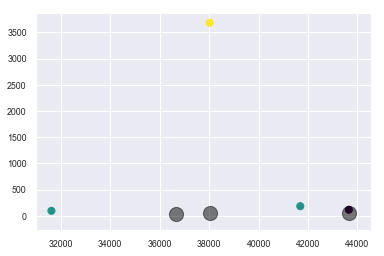

In [155]:
plt.scatter(galaxies_kmeans['dist_pc'],galaxies_kmeans['MHI_computed'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [156]:
plt.scatter(galaxies_kmeans['dist_kpc'],galaxies_kmeans['MHI_computed'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
#plt.yscale('log')
plt.xlabel('dist_kpc')
plt.ylabel('MHI')
plt.title('dist v M_HI')
plt.show()
#ax.labels

KeyError: 'dist_kpc'

In [422]:
plt.scatter(galaxies_kmeans['vh(km/s)_x'],galaxies_kmeans['MHI_computed'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.yscale('log')
plt.xlabel('vh(km/s)_x')
plt.ylabel('MHI')
plt.title('vh(km/s)_x v M_HI')
plt.show()
#ax.labels

KeyError: 'vh(km/s)_x'

In [60]:
galaxies.columns

Index(['GalaxyName', 'RA1', 'RA2', 'RA3', 'Dec1', 'Dec2', 'Dec3', 'M-m',
       'mystery1', 'mystery2', 'vh(km/s)_x', 'mystery3', 'mystery4', 'MHI_x',
       'Data', 'Notes', 'dist_pc', 'dist_kpc', 'dist_mpc', 'MHI_computed',
       'MHI_source', 'MHI_type', 'type_color', 'source_color', 'RA_h', 'RA_m',
       'RA_s', 'Dec_d', 'Dec_m', 'Dec_s', 'Dist', 'sig1', 'sig2', 'vh(km/s)_y',
       'MHI_y', 'r_ell', 'ell_surf_dist'],
      dtype='object')

In [61]:
galaxies[galaxies['MHI_computed'].isnull()]

GalaxyName  RA1  RA2   RA3  Dec1  Dec2  Dec3    M-m  mystery1  \
0         CanisMajor    7   12  35.0   -27    40     0  14.29      0.30   
1    SagittariusdSph   18   55  19.5   -30    32    43  17.10      0.15   
6            CetusII    1   17  52.8   -17    25    12  17.38      0.19   
12     ComaBerenices   12   26  59.0    23    54    15  18.20      0.20   
13          TucanaIV    0    2  55.2   -60    51     0  18.41      0.19   
15            GrusII   22    4   4.8   -46    26    24  18.62      0.21   
17           TucanaV   23   37  24.0   -63    16    12  18.71      0.34   
19     SagittariusII   19   52  40.5   -22     4     5  19.13      0.15   
23         UrsaMinor   15    9   8.5    67    13    21  19.40      0.10   
24      HorologiumII    3   16  32.1   -50     1     5  19.46      0.20   
26         Eridanus3    2   22  45.5   -52    17     1  19.70      0.20   
27          Phoenix2   23   39  59.4   -54    24    22  19.60      0.20   
29        Sextans(I)   10   13   3.0    -1    36    53  19.67      0.10   
30      ReticulumIII    3   45  26.4   -60    27     0  19.81      0.31   
31            Indus1   21    8  49.1   -51     9    56  20.00      0.20   
32      UrsaMajor(I)   10   34  52.8    51    55    12  19.93      0.10   
34         Pictoris1    4   43  47.4   -50    16    59  20.30      0.20   
36          Hercules   16   31   2.0    12    47    30  20.60      0.20   
43          ColumbaI    5   31  26.4   -28     1    48  21.30      0.22   
44          Pegasus3   22   24  22.6     5    25    12  21.56      0.20   
45           IndusI?   20   38  52.8   -46     9    36  21.65      0.16   
46  CanesVenatici(I)   13   28   3.5    33    33    21  21.69      0.10   
60      AndromedaXIX    0   19  32.1    35     2    37  24.57      0.08   
70       AndromedaII    1   16  29.8    33    25     9  24.07      0.06   
81         Eridanus2    3   44  21.1   -43    32     0  22.90      0.20   

    mystery2  ...  Dec_d  Dec_m  Dec_s   Dist  sig1  sig2  vh(km/s)_y  MHI_y  \
0       0.30  ...    -27     40      0  14.29  0.30  0.30        87.0    0.0   
1       0.15  ...    -30     32     43  17.10  0.15  0.15       140.0    0.0   
6       0.19  ...    -17     25     12  17.38  0.19  0.19       999.9    0.0   
12      0.20  ...     23     54     15  18.20  0.20  0.20        98.1    0.0   
13      0.19  ...    -60     51      0  18.41  0.19  0.19       999.9    0.0   
15      0.21  ...    -46     26     24  18.62  0.21  0.21       999.9    0.0   
17      0.34  ...    -63     16     12  18.71  0.34  0.34       999.9    0.0   
19      0.15  ...    -22      4      5  19.13  0.15  0.15       999.9    0.0   
23      0.10  ...     67     13     21  19.40  0.10  0.10      -246.9    0.0   
24      0.20  ...    -50      1      5  19.46  0.20  0.20       999.9    0.0   
26      0.20  ...    -52     17      1  19.70  0.20  0.20       999.9    0.0   
27      0.20  ...    -54     24     22  19.60  0.20  0.20       999.9    0.0   
29      0.10  ...     -1     36     53  19.67  0.10  0.10       224.2    0.0   
30      0.31  ...    -60     27      0  19.81  0.31  0.31       999.9    0.0   
31      0.20  ...    -51      9     56  20.00  0.20  0.20       999.9    0.0   
32      0.10  ...     51     55     12  19.93  0.10  0.10       -55.3    0.0   
34      0.20  ...    -50     16     59  20.30  0.20  0.20       999.9    0.0   
36      0.20  ...     12     47     30  20.60  0.20  0.20        45.2    0.0   
43      0.22  ...    -28      1     48  21.30  0.22  0.22       999.9    0.0   
44      0.20  ...      5     25     12  21.56  0.20  0.20       999.9    0.0   
45      0.16  ...    -46      9     36  21.65  0.16  0.16       999.9    0.0   
46      0.10  ...     33     33     21  21.69  0.10  0.10        30.9    0.0   
60      0.43  ...     35      2     37  24.57  0.08  0.43      -111.6    0.0   
70      0.06  ...     33     25      9  24.07  0.06  0.06      -192.4    0.0   
81      0.20  ...    -43     32      0  22.90  0.20  0.20  

## Google Sheets API

In [2]:
#Google Sheets
from __future__ import print_function
import pickle
import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request

In [ ]:
# The ID and range of a sample spreadsheet.
SAMPLE_SPREADSHEET_ID = '1BxiMVs0XRA5nFMdKvBdBZjgmUUqptlbs74OgvE2upms'
SAMPLE_RANGE_NAME = 'Class Data!A2:E'

In [ ]:
from __future__ import print_function
import pickle
import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request

# If modifying these scopes, delete the file token.pickle.
SCOPES = ['https://www.googleapis.com/auth/spreadsheets.readonly']

# The ID and range of a sample spreadsheet.
SAMPLE_SPREADSHEET_ID = '1BxiMVs0XRA5nFMdKvBdBZjgmUUqptlbs74OgvE2upms'
SAMPLE_RANGE_NAME = 'Class Data!A2:E'

def main():
    """Shows basic usage of the Sheets API.
    Prints values from a sample spreadsheet.
    """
    creds = None
    # The file token.pickle stores the user's access and refresh tokens, and is
    # created automatically when the authorization flow completes for the first
    # time.
    if os.path.exists('token.pickle'):
        with open('token.pickle', 'rb') as token:
            creds = pickle.load(token)
    # If there are no (valid) credentials available, let the user log in.
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(
                'credentials.json', SCOPES)
            creds = flow.run_local_server(port=0)
        # Save the credentials for the next run
        with open('token.pickle', 'wb') as token:
            pickle.dump(creds, token)

    service = build('sheets', 'v4', credentials=creds)

    # Call the Sheets API
    sheet = service.spreadsheets()
    result = sheet.values().get(spreadsheetId=SAMPLE_SPREADSHEET_ID,
                                range=SAMPLE_RANGE_NAME).execute()
    values = result.get('values', [])

    if not values:
        print('No data found.')
    else:
        print('Name, Major:')
        for row in values:
            # Print columns A and E, which correspond to indices 0 and 4.
            print('%s, %s' % (row[0], row[4]))

if __name__ == '__main__':
    main()